# Prep

Setting up some prior functionality

In [2]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.5.1+cu101 True


# Load a model

First we have to decide if our model should be pretrained. 

This greatly depends on the size of a dataset. Smaller datasets rely more on finetuning. 

In [3]:
pretrained = True

if pretrained:
    # Get pretrained weights
    checkpoint = torch.hub.load_state_dict_from_url(
                url='https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth',
                map_location='cpu',
                check_hash=True)

    # Remove class weights
    del checkpoint["model"]["class_embed.weight"]
    del checkpoint["model"]["class_embed.bias"]

    # SaveOGH
    torch.save(checkpoint,
               'detr-r50_no-class-head.pth')

# Dataset

Our dataset should be loadable as a COCO format

This allows us to use the pycocotools to load the data dict for the main python script

In [4]:
# alternatively, implement your own coco-type dataset loader in datasets and add this "key" to datasets/__init__.py
dataset_file = "coco_petct" 

# should lead to a directory with a train2017 and val2017 folder as well as an annotations folder
#dataDir='/COCO_dataset/' 
#dataDir = '/media/storage/Joy/datasets/DETR_MIP/FDG-PET-CT-Lesions/'
# dataDir = '/gpfs/fs0/data/stanford_data/petct/DETR_MIP/FDG-PET-CT-Lesions/'
dataDir = '/gpfs/fs0/data/stanford_data/petct/DETR_MIP2/FDG-PET-CT-Lesions/'

# this int should be the actual number of classes + 1 (for no class)
num_classes = 2

outDir = 'outputs'
resume = "detr-r50_no-class-head.pth" if pretrained else ""

In [5]:
!ls /gpfs/fs0/data/stanford_data/petct/DETR_MIP2/FDG-PET-CT-Lesions/annotations/

detr_test.json	detr_train.json  detr_val.json


In [6]:
!ls $dataDir

annotations  images


In [7]:
data_list = [0,1,2,3,4,5,6,7,8]
new_list = [data_list[i:i+3] for i in range(0, len(data_list), 3)]
new_list

list(range(0,5))

import random
 
# initializing lists
# test_list1 = [6, 4, 8, 9, 10]
# test_list2 = [1, 2, 3, 4, 5]
test_list1 = [{'id':1},{'id':2},{'id':3}]
test_list2 = [{'id':1},{'id':2},{'id':3}]
 
# printing lists
print(f"The original list 1 : {test_list1}")
print(f"The original list 2 : {test_list2}")
 
# Shuffle two lists with same order
# Using zip() + * operator + shuffle()
temp = list(zip(test_list1, test_list2))
random.shuffle(temp)
res1, res2 = zip(*temp)
# res1 and res2 come out as tuples, and so must be converted to lists.
res1, res2 = list(res1), list(res2)
 
# Printing result
print(f"List 1 after shuffle :  {res1}")
print(f"List 2 after shuffle :  {res2}")

The original list 1 : [{'id': 1}, {'id': 2}, {'id': 3}]
The original list 2 : [{'id': 1}, {'id': 2}, {'id': 3}]
List 1 after shuffle :  [{'id': 1}, {'id': 2}, {'id': 3}]
List 2 after shuffle :  [{'id': 1}, {'id': 2}, {'id': 3}]


# Training

We use the main.py script to run our training

In [ ]:
# !python main_petct.py \
#   --dataset_file coco_petct \
#   --coco_petct_path /gpfs/fs0/data/stanford_data/petct/DETR_MIP/FDG-PET-CT-Lesions/ \
#   --output_dir /home/joywu/detr/output \
#   --resume detr-r50_no-class-head.pth \
#   --num_classes 2 \
#   --lr 1e-5 \
#   --lr_backbone 1e-6 \
#   --epochs 1

# changed numpy from 1.22.4 to 1.20.0 to 1.21.6 still didn't work so updated scipy and pycocotools to latest

In [9]:
!/home/joywu/anaconda3/envs/detr_py38/bin/python main_petct.py \
  --dataset_file $dataset_file \
  --coco_petct_path $dataDir \
  --output_dir $outDir \
  --resume $resume \
  --num_classes $num_classes \
  --lr 1e-5 \
  --lr_backbone 1e-6 \
  --epochs 1

Not using distributed mode
git:
  sha: 72a6b3c5bdc73c2884b59ccc99aa85dc1fd39063, status: has uncommited changes, branch: master

Namespace(aux_loss=True, backbone='resnet50', batch_size=2, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, coco_path=None, coco_petct_path='/gpfs/fs0/data/stanford_data/petct/DETR_MIP2/FDG-PET-CT-Lesions/', cross_val=False, dataset_file='coco_petct', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=1, eval=False, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=1e-05, lr_backbone=1e-06, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_classes=2, num_queries=100, num_workers=2, output_dir='outputs', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='detr-r50_no-class-head.pth', seed=42, set_cost_bbox=5, set_cost_class=1, set_cost_giou=2, start_epoch=0, train_split=0.9, val_fold=0, wei

Epoch: [0]  [   40/19488]  eta: 1:03:05  lr: 0.000010  class_error: 100.00  loss: 26.9651 (24.7814)  loss_ce: 0.7497 (0.9412)  loss_bbox: 1.6123 (1.6617)  loss_giou: 1.9749 (1.4415)  loss_ce_0: 0.8803 (1.0298)  loss_bbox_0: 1.4104 (1.7473)  loss_giou_0: 1.9962 (1.5113)  loss_ce_1: 0.8553 (1.0228)  loss_bbox_1: 1.5006 (1.6804)  loss_giou_1: 1.9686 (1.4809)  loss_ce_2: 0.8317 (1.0064)  loss_bbox_2: 1.5126 (1.6723)  loss_giou_2: 1.9522 (1.4560)  loss_ce_3: 0.8102 (0.9950)  loss_bbox_3: 1.5432 (1.6543)  loss_giou_3: 1.9644 (1.4385)  loss_ce_4: 0.7940 (0.9770)  loss_bbox_4: 1.5910 (1.6310)  loss_giou_4: 1.9801 (1.4339)  loss_ce_unscaled: 0.7497 (0.9412)  class_error_unscaled: 100.0000 (49.2626)  loss_bbox_unscaled: 0.3225 (0.3323)  loss_giou_unscaled: 0.9874 (0.7208)  cardinality_error_unscaled: 20.0000 (54.2317)  loss_ce_0_unscaled: 0.8803 (1.0298)  loss_bbox_0_unscaled: 0.2821 (0.3495)  loss_giou_0_unscaled: 0.9981 (0.7557)  cardinality_error_0_unscaled: 72.0000 (78.1829)  loss_ce_1_unsca

Epoch: [0]  [   90/19488]  eta: 1:01:39  lr: 0.000010  class_error: 100.00  loss: 18.8188 (20.5483)  loss_ce: 0.4271 (0.7195)  loss_bbox: 0.5623 (1.1927)  loss_giou: 1.7628 (1.4135)  loss_ce_0: 0.5974 (0.8334)  loss_bbox_0: 0.7577 (1.3248)  loss_giou_0: 1.6629 (1.4661)  loss_ce_1: 0.5543 (0.8168)  loss_bbox_1: 0.6408 (1.2503)  loss_giou_1: 1.8449 (1.4355)  loss_ce_2: 0.5158 (0.7865)  loss_bbox_2: 0.6337 (1.2068)  loss_giou_2: 1.7839 (1.4203)  loss_ce_3: 0.4693 (0.7608)  loss_bbox_3: 0.5901 (1.1897)  loss_giou_3: 1.7614 (1.4100)  loss_ce_4: 0.4393 (0.7461)  loss_bbox_4: 0.5706 (1.1635)  loss_giou_4: 1.7751 (1.4119)  loss_ce_unscaled: 0.4271 (0.7195)  class_error_unscaled: 100.0000 (75.4572)  loss_bbox_unscaled: 0.1125 (0.2385)  loss_giou_unscaled: 0.8814 (0.7067)  cardinality_error_unscaled: 0.5000 (28.3132)  loss_ce_0_unscaled: 0.5974 (0.8334)  loss_bbox_0_unscaled: 0.1515 (0.2650)  loss_giou_0_unscaled: 0.8315 (0.7330)  cardinality_error_0_unscaled: 8.5000 (48.5165)  loss_ce_1_unscale

Epoch: [0]  [  140/19488]  eta: 1:02:08  lr: 0.000010  class_error: 100.00  loss: 17.5810 (18.4498)  loss_ce: 0.4402 (0.6514)  loss_bbox: 0.5769 (0.9548)  loss_giou: 1.8238 (1.3910)  loss_ce_0: 0.4199 (0.7260)  loss_bbox_0: 0.8044 (1.0785)  loss_giou_0: 1.8794 (1.4638)  loss_ce_1: 0.4173 (0.7147)  loss_bbox_1: 0.6145 (1.0094)  loss_giou_1: 1.8039 (1.4130)  loss_ce_2: 0.4124 (0.6896)  loss_bbox_2: 0.6128 (0.9643)  loss_giou_2: 1.7953 (1.3962)  loss_ce_3: 0.3916 (0.6692)  loss_bbox_3: 0.5657 (0.9526)  loss_giou_3: 1.8082 (1.3909)  loss_ce_4: 0.4108 (0.6607)  loss_bbox_4: 0.5516 (0.9323)  loss_giou_4: 1.8342 (1.3914)  loss_ce_unscaled: 0.4402 (0.6514)  class_error_unscaled: 100.0000 (84.1058)  loss_bbox_unscaled: 0.1154 (0.1910)  loss_giou_unscaled: 0.9119 (0.6955)  cardinality_error_unscaled: 1.5000 (19.2766)  loss_ce_0_unscaled: 0.4199 (0.7260)  loss_bbox_0_unscaled: 0.1609 (0.2157)  loss_giou_0_unscaled: 0.9397 (0.7319)  cardinality_error_0_unscaled: 1.5000 (33.5390)  loss_ce_1_unscale

Epoch: [0]  [  190/19488]  eta: 1:00:48  lr: 0.000010  class_error: 100.00  loss: 17.7833 (17.0107)  loss_ce: 0.5701 (0.6464)  loss_bbox: 0.3632 (0.7953)  loss_giou: 1.8300 (1.3448)  loss_ce_0: 0.4233 (0.6591)  loss_bbox_0: 0.5661 (0.9170)  loss_giou_0: 1.8529 (1.4068)  loss_ce_1: 0.4432 (0.6580)  loss_bbox_1: 0.5185 (0.8555)  loss_giou_1: 1.7670 (1.3621)  loss_ce_2: 0.4812 (0.6492)  loss_bbox_2: 0.4723 (0.8099)  loss_giou_2: 1.7186 (1.3580)  loss_ce_3: 0.5099 (0.6420)  loss_bbox_3: 0.3571 (0.7977)  loss_giou_3: 1.8212 (1.3506)  loss_ce_4: 0.5169 (0.6368)  loss_bbox_4: 0.4102 (0.7770)  loss_giou_4: 1.7818 (1.3444)  loss_ce_unscaled: 0.5701 (0.6464)  class_error_unscaled: 100.0000 (88.2666)  loss_bbox_unscaled: 0.0726 (0.1591)  loss_giou_unscaled: 0.9150 (0.6724)  cardinality_error_unscaled: 1.5000 (15.0497)  loss_ce_0_unscaled: 0.4233 (0.6591)  loss_bbox_0_unscaled: 0.1132 (0.1834)  loss_giou_0_unscaled: 0.9265 (0.7034)  cardinality_error_0_unscaled: 1.5000 (25.5812)  loss_ce_1_unscale

Epoch: [0]  [  240/19488]  eta: 1:00:44  lr: 0.000010  class_error: 100.00  loss: 20.1285 (16.4559)  loss_ce: 0.8399 (0.6910)  loss_bbox: 0.4158 (0.7059)  loss_giou: 1.7994 (1.3260)  loss_ce_0: 0.4831 (0.6439)  loss_bbox_0: 0.7135 (0.8343)  loss_giou_0: 1.8705 (1.3798)  loss_ce_1: 0.5962 (0.6540)  loss_bbox_1: 0.5929 (0.7631)  loss_giou_1: 1.8874 (1.3456)  loss_ce_2: 0.6684 (0.6614)  loss_bbox_2: 0.5019 (0.7201)  loss_giou_2: 1.8332 (1.3361)  loss_ce_3: 0.7731 (0.6696)  loss_bbox_3: 0.4477 (0.7084)  loss_giou_3: 1.7975 (1.3331)  loss_ce_4: 0.7700 (0.6673)  loss_bbox_4: 0.3787 (0.6908)  loss_giou_4: 1.8171 (1.3257)  loss_ce_unscaled: 0.8399 (0.6910)  class_error_unscaled: 100.0000 (90.7009)  loss_bbox_unscaled: 0.0832 (0.1412)  loss_giou_unscaled: 0.8997 (0.6630)  cardinality_error_unscaled: 2.0000 (12.7324)  loss_ce_0_unscaled: 0.4831 (0.6439)  loss_bbox_0_unscaled: 0.1427 (0.1669)  loss_giou_0_unscaled: 0.9352 (0.6899)  cardinality_error_0_unscaled: 2.0000 (21.0788)  loss_ce_1_unscale

Epoch: [0]  [  290/19488]  eta: 1:00:17  lr: 0.000010  class_error: 100.00  loss: 19.0738 (16.5911)  loss_ce: 0.9493 (0.7467)  loss_bbox: 0.3277 (0.6453)  loss_giou: 1.7838 (1.3707)  loss_ce_0: 0.7270 (0.6585)  loss_bbox_0: 0.4659 (0.7836)  loss_giou_0: 1.8992 (1.4228)  loss_ce_1: 0.7896 (0.6799)  loss_bbox_1: 0.3496 (0.7010)  loss_giou_1: 1.8462 (1.3932)  loss_ce_2: 0.8102 (0.6995)  loss_bbox_2: 0.3368 (0.6586)  loss_giou_2: 1.8396 (1.3814)  loss_ce_3: 0.9065 (0.7197)  loss_bbox_3: 0.3278 (0.6455)  loss_giou_3: 1.7987 (1.3702)  loss_ce_4: 0.8848 (0.7164)  loss_bbox_4: 0.3342 (0.6326)  loss_giou_4: 1.8250 (1.3655)  loss_ce_unscaled: 0.9493 (0.7467)  class_error_unscaled: 100.0000 (92.2987)  loss_bbox_unscaled: 0.0655 (0.1291)  loss_giou_unscaled: 0.8919 (0.6854)  cardinality_error_unscaled: 2.5000 (11.2491)  loss_ce_0_unscaled: 0.7270 (0.6585)  loss_bbox_0_unscaled: 0.0932 (0.1567)  loss_giou_0_unscaled: 0.9496 (0.7114)  cardinality_error_0_unscaled: 2.5000 (18.1615)  loss_ce_1_unscale

Epoch: [0]  [  340/19488]  eta: 0:59:52  lr: 0.000010  class_error: 100.00  loss: 16.7544 (16.4555)  loss_ce: 0.7911 (0.7695)  loss_bbox: 0.3193 (0.5984)  loss_giou: 1.7762 (1.3799)  loss_ce_0: 0.5851 (0.6647)  loss_bbox_0: 0.4037 (0.7281)  loss_giou_0: 1.7414 (1.4230)  loss_ce_1: 0.6558 (0.6941)  loss_bbox_1: 0.3224 (0.6498)  loss_giou_1: 1.7372 (1.3996)  loss_ce_2: 0.6586 (0.7188)  loss_bbox_2: 0.2982 (0.6110)  loss_giou_2: 1.7998 (1.3891)  loss_ce_3: 0.7565 (0.7448)  loss_bbox_3: 0.3260 (0.6017)  loss_giou_3: 1.6838 (1.3787)  loss_ce_4: 0.7458 (0.7407)  loss_bbox_4: 0.3197 (0.5905)  loss_giou_4: 1.7398 (1.3732)  loss_ce_unscaled: 0.7911 (0.7695)  class_error_unscaled: 100.0000 (93.4279)  loss_bbox_unscaled: 0.0639 (0.1197)  loss_giou_unscaled: 0.8881 (0.6899)  cardinality_error_unscaled: 2.5000 (10.3900)  loss_ce_0_unscaled: 0.5851 (0.6647)  loss_bbox_0_unscaled: 0.0807 (0.1456)  loss_giou_0_unscaled: 0.8707 (0.7115)  cardinality_error_0_unscaled: 2.5000 (16.2889)  loss_ce_1_unscale

Epoch: [0]  [  390/19488]  eta: 0:59:42  lr: 0.000010  class_error: 100.00  loss: 14.8159 (16.2870)  loss_ce: 0.3922 (0.7842)  loss_bbox: 0.2939 (0.5607)  loss_giou: 1.5389 (1.3832)  loss_ce_0: 0.3105 (0.6687)  loss_bbox_0: 0.3664 (0.6841)  loss_giou_0: 1.6399 (1.4203)  loss_ce_1: 0.3686 (0.7042)  loss_bbox_1: 0.3313 (0.6069)  loss_giou_1: 1.6141 (1.3960)  loss_ce_2: 0.3802 (0.7334)  loss_bbox_2: 0.2566 (0.5714)  loss_giou_2: 1.6361 (1.3876)  loss_ce_3: 0.3992 (0.7604)  loss_bbox_3: 0.2838 (0.5632)  loss_giou_3: 1.6752 (1.3793)  loss_ce_4: 0.3913 (0.7559)  loss_bbox_4: 0.3209 (0.5550)  loss_giou_4: 1.5613 (1.3727)  loss_ce_unscaled: 0.3922 (0.7842)  class_error_unscaled: 100.0000 (94.2683)  loss_bbox_unscaled: 0.0588 (0.1121)  loss_giou_unscaled: 0.7695 (0.6916)  cardinality_error_unscaled: 1.0000 (9.6816)  loss_ce_0_unscaled: 0.3105 (0.6687)  loss_bbox_0_unscaled: 0.0733 (0.1368)  loss_giou_0_unscaled: 0.8200 (0.7101)  cardinality_error_0_unscaled: 1.0000 (14.8261)  loss_ce_1_unscaled

Epoch: [0]  [  440/19488]  eta: 0:59:27  lr: 0.000010  class_error: 100.00  loss: 15.1881 (16.0849)  loss_ce: 0.4840 (0.7868)  loss_bbox: 0.2637 (0.5260)  loss_giou: 1.6128 (1.3834)  loss_ce_0: 0.4285 (0.6666)  loss_bbox_0: 0.2428 (0.6416)  loss_giou_0: 1.4723 (1.4192)  loss_ce_1: 0.4171 (0.7065)  loss_bbox_1: 0.2416 (0.5677)  loss_giou_1: 1.5260 (1.3948)  loss_ce_2: 0.4548 (0.7382)  loss_bbox_2: 0.3032 (0.5370)  loss_giou_2: 1.6063 (1.3873)  loss_ce_3: 0.4948 (0.7655)  loss_bbox_3: 0.2736 (0.5288)  loss_giou_3: 1.5258 (1.3783)  loss_ce_4: 0.4798 (0.7620)  loss_bbox_4: 0.2805 (0.5226)  loss_giou_4: 1.5708 (1.3726)  loss_ce_unscaled: 0.4840 (0.7868)  class_error_unscaled: 100.0000 (94.9182)  loss_bbox_unscaled: 0.0527 (0.1052)  loss_giou_unscaled: 0.8064 (0.6917)  cardinality_error_unscaled: 1.5000 (9.1134)  loss_ce_0_unscaled: 0.4285 (0.6666)  loss_bbox_0_unscaled: 0.0486 (0.1283)  loss_giou_0_unscaled: 0.7361 (0.7096)  cardinality_error_0_unscaled: 1.5000 (13.6746)  loss_ce_1_unscaled

Epoch: [0]  [  490/19488]  eta: 0:59:08  lr: 0.000010  class_error: 100.00  loss: 12.7480 (15.9222)  loss_ce: 0.2478 (0.7889)  loss_bbox: 0.2223 (0.4998)  loss_giou: 1.4979 (1.3817)  loss_ce_0: 0.2176 (0.6644)  loss_bbox_0: 0.2303 (0.6104)  loss_giou_0: 1.5599 (1.4191)  loss_ce_1: 0.2253 (0.7082)  loss_bbox_1: 0.1848 (0.5398)  loss_giou_1: 1.3416 (1.3932)  loss_ce_2: 0.2508 (0.7416)  loss_bbox_2: 0.1952 (0.5116)  loss_giou_2: 1.4150 (1.3848)  loss_ce_3: 0.2398 (0.7684)  loss_bbox_3: 0.2321 (0.5033)  loss_giou_3: 1.3700 (1.3745)  loss_ce_4: 0.2427 (0.7661)  loss_bbox_4: 0.2570 (0.4980)  loss_giou_4: 1.5434 (1.3685)  loss_ce_unscaled: 0.2478 (0.7889)  class_error_unscaled: 100.0000 (95.4357)  loss_bbox_unscaled: 0.0445 (0.1000)  loss_giou_unscaled: 0.7489 (0.6909)  cardinality_error_unscaled: 0.5000 (8.7128)  loss_ce_0_unscaled: 0.2176 (0.6644)  loss_bbox_0_unscaled: 0.0461 (0.1221)  loss_giou_0_unscaled: 0.7800 (0.7095)  cardinality_error_0_unscaled: 0.5000 (12.8096)  loss_ce_1_unscaled

Epoch: [0]  [  540/19488]  eta: 0:58:37  lr: 0.000010  class_error: 100.00  loss: 0.2091 (15.5956)  loss_ce: 0.0213 (0.7725)  loss_bbox: 0.0000 (0.4784)  loss_giou: 0.0000 (1.3640)  loss_ce_0: 0.0603 (0.6491)  loss_bbox_0: 0.0000 (0.5854)  loss_giou_0: 0.0000 (1.4053)  loss_ce_1: 0.0415 (0.6940)  loss_bbox_1: 0.0000 (0.5152)  loss_giou_1: 0.0000 (1.3756)  loss_ce_2: 0.0328 (0.7273)  loss_bbox_2: 0.0000 (0.4898)  loss_giou_2: 0.0000 (1.3686)  loss_ce_3: 0.0279 (0.7529)  loss_bbox_3: 0.0000 (0.4817)  loss_giou_3: 0.0000 (1.3571)  loss_ce_4: 0.0253 (0.7504)  loss_bbox_4: 0.0000 (0.4772)  loss_giou_4: 0.0000 (1.3511)  loss_ce_unscaled: 0.0213 (0.7725)  class_error_unscaled: 100.0000 (95.8575)  loss_bbox_unscaled: 0.0000 (0.0957)  loss_giou_unscaled: 0.0000 (0.6820)  cardinality_error_unscaled: 0.0000 (8.1895)  loss_ce_0_unscaled: 0.0603 (0.6491)  loss_bbox_0_unscaled: 0.0000 (0.1171)  loss_giou_0_unscaled: 0.0000 (0.7026)  cardinality_error_0_unscaled: 0.0000 (11.9067)  loss_ce_1_unscaled:

Epoch: [0]  [  590/19488]  eta: 0:58:15  lr: 0.000010  class_error: 100.00  loss: 17.6993 (15.5136)  loss_ce: 1.2207 (0.7918)  loss_bbox: 0.2773 (0.4608)  loss_giou: 1.4843 (1.3510)  loss_ce_0: 0.9421 (0.6595)  loss_bbox_0: 0.3307 (0.5655)  loss_giou_0: 1.7027 (1.3921)  loss_ce_1: 1.0869 (0.7099)  loss_bbox_1: 0.2918 (0.4962)  loss_giou_1: 1.6156 (1.3649)  loss_ce_2: 1.1330 (0.7438)  loss_bbox_2: 0.2810 (0.4719)  loss_giou_2: 1.7056 (1.3569)  loss_ce_3: 1.1509 (0.7699)  loss_bbox_3: 0.2772 (0.4645)  loss_giou_3: 1.6067 (1.3447)  loss_ce_4: 1.1941 (0.7691)  loss_bbox_4: 0.2842 (0.4614)  loss_giou_4: 1.6327 (1.3397)  loss_ce_unscaled: 1.2207 (0.7918)  class_error_unscaled: 100.0000 (96.2080)  loss_bbox_unscaled: 0.0555 (0.0922)  loss_giou_unscaled: 0.7422 (0.6755)  cardinality_error_unscaled: 3.5000 (7.9137)  loss_ce_0_unscaled: 0.9421 (0.6595)  loss_bbox_0_unscaled: 0.0661 (0.1131)  loss_giou_0_unscaled: 0.8514 (0.6961)  cardinality_error_0_unscaled: 3.5000 (11.3164)  loss_ce_1_unscaled

Epoch: [0]  [  640/19488]  eta: 0:58:04  lr: 0.000010  class_error: 100.00  loss: 18.7685 (15.4444)  loss_ce: 0.7217 (0.7986)  loss_bbox: 0.3217 (0.4484)  loss_giou: 1.7069 (1.3488)  loss_ce_0: 0.5670 (0.6614)  loss_bbox_0: 0.3685 (0.5517)  loss_giou_0: 1.8010 (1.3885)  loss_ce_1: 0.6130 (0.7151)  loss_bbox_1: 0.3369 (0.4813)  loss_giou_1: 1.6557 (1.3597)  loss_ce_2: 0.6548 (0.7494)  loss_bbox_2: 0.3477 (0.4587)  loss_giou_2: 1.7519 (1.3539)  loss_ce_3: 0.6770 (0.7747)  loss_bbox_3: 0.3444 (0.4512)  loss_giou_3: 1.7245 (1.3403)  loss_ce_4: 0.6778 (0.7752)  loss_bbox_4: 0.3484 (0.4492)  loss_giou_4: 1.7565 (1.3384)  loss_ce_unscaled: 0.7217 (0.7986)  class_error_unscaled: 100.0000 (96.5038)  loss_bbox_unscaled: 0.0643 (0.0897)  loss_giou_unscaled: 0.8534 (0.6744)  cardinality_error_unscaled: 1.5000 (7.7114)  loss_ce_0_unscaled: 0.5670 (0.6614)  loss_bbox_0_unscaled: 0.0737 (0.1103)  loss_giou_0_unscaled: 0.9005 (0.6942)  cardinality_error_0_unscaled: 1.5000 (10.8456)  loss_ce_1_unscaled

Epoch: [0]  [  690/19488]  eta: 0:57:50  lr: 0.000010  class_error: 100.00  loss: 12.8478 (15.3351)  loss_ce: 0.3716 (0.7978)  loss_bbox: 0.2345 (0.4361)  loss_giou: 1.4926 (1.3458)  loss_ce_0: 0.3089 (0.6595)  loss_bbox_0: 0.2840 (0.5357)  loss_giou_0: 1.5216 (1.3840)  loss_ce_1: 0.3257 (0.7155)  loss_bbox_1: 0.2192 (0.4663)  loss_giou_1: 1.4796 (1.3534)  loss_ce_2: 0.3411 (0.7508)  loss_bbox_2: 0.2688 (0.4457)  loss_giou_2: 1.3632 (1.3485)  loss_ce_3: 0.3614 (0.7734)  loss_bbox_3: 0.2387 (0.4386)  loss_giou_3: 1.4874 (1.3361)  loss_ce_4: 0.3749 (0.7749)  loss_bbox_4: 0.2400 (0.4372)  loss_giou_4: 1.4561 (1.3358)  loss_ce_unscaled: 0.3716 (0.7978)  class_error_unscaled: 100.0000 (96.7547)  loss_bbox_unscaled: 0.0469 (0.0872)  loss_giou_unscaled: 0.7463 (0.6729)  cardinality_error_unscaled: 1.0000 (7.4342)  loss_ce_0_unscaled: 0.3089 (0.6595)  loss_bbox_0_unscaled: 0.0568 (0.1071)  loss_giou_0_unscaled: 0.7608 (0.6920)  cardinality_error_0_unscaled: 1.0000 (10.3205)  loss_ce_1_unscaled

Epoch: [0]  [  740/19488]  eta: 0:57:45  lr: 0.000010  class_error: 100.00  loss: 12.5528 (15.2118)  loss_ce: 0.4150 (0.7902)  loss_bbox: 0.2437 (0.4238)  loss_giou: 1.4436 (1.3427)  loss_ce_0: 0.3617 (0.6557)  loss_bbox_0: 0.2825 (0.5193)  loss_giou_0: 1.6119 (1.3828)  loss_ce_1: 0.3891 (0.7126)  loss_bbox_1: 0.2406 (0.4514)  loss_giou_1: 1.4220 (1.3528)  loss_ce_2: 0.4434 (0.7475)  loss_bbox_2: 0.2429 (0.4322)  loss_giou_2: 1.5219 (1.3470)  loss_ce_3: 0.4154 (0.7665)  loss_bbox_3: 0.2702 (0.4261)  loss_giou_3: 1.4796 (1.3340)  loss_ce_4: 0.4158 (0.7689)  loss_bbox_4: 0.2528 (0.4248)  loss_giou_4: 1.5051 (1.3333)  loss_ce_unscaled: 0.4150 (0.7902)  class_error_unscaled: 100.0000 (96.7443)  loss_bbox_unscaled: 0.0487 (0.0848)  loss_giou_unscaled: 0.7218 (0.6714)  cardinality_error_unscaled: 1.5000 (7.4696)  loss_ce_0_unscaled: 0.3617 (0.6557)  loss_bbox_0_unscaled: 0.0565 (0.1039)  loss_giou_0_unscaled: 0.8060 (0.6914)  cardinality_error_0_unscaled: 1.5000 (10.1100)  loss_ce_1_unscaled

Epoch: [0]  [  790/19488]  eta: 0:57:44  lr: 0.000010  class_error: 100.00  loss: 16.2132 (15.0790)  loss_ce: 0.5425 (0.7830)  loss_bbox: 0.3121 (0.4139)  loss_giou: 1.6875 (1.3359)  loss_ce_0: 0.4661 (0.6503)  loss_bbox_0: 0.4500 (0.5076)  loss_giou_0: 1.7916 (1.3788)  loss_ce_1: 0.5159 (0.7081)  loss_bbox_1: 0.3213 (0.4407)  loss_giou_1: 1.7066 (1.3490)  loss_ce_2: 0.5507 (0.7416)  loss_bbox_2: 0.3451 (0.4218)  loss_giou_2: 1.6463 (1.3400)  loss_ce_3: 0.5356 (0.7590)  loss_bbox_3: 0.3218 (0.4163)  loss_giou_3: 1.7007 (1.3283)  loss_ce_4: 0.5155 (0.7623)  loss_bbox_4: 0.3396 (0.4157)  loss_giou_4: 1.6765 (1.3267)  loss_ce_unscaled: 0.5425 (0.7830)  class_error_unscaled: 100.0000 (96.7928)  loss_bbox_unscaled: 0.0624 (0.0828)  loss_giou_unscaled: 0.8437 (0.6679)  cardinality_error_unscaled: 1.5000 (7.2301)  loss_ce_0_unscaled: 0.4661 (0.6503)  loss_bbox_0_unscaled: 0.0900 (0.1015)  loss_giou_0_unscaled: 0.8958 (0.6894)  cardinality_error_0_unscaled: 1.5000 (9.7023)  loss_ce_1_unscaled:

Epoch: [0]  [  840/19488]  eta: 0:57:44  lr: 0.000010  class_error: 100.00  loss: 12.6138 (14.8246)  loss_ce: 0.2837 (0.7621)  loss_bbox: 0.2341 (0.4014)  loss_giou: 1.4667 (1.3245)  loss_ce_0: 0.2678 (0.6340)  loss_bbox_0: 0.2610 (0.4927)  loss_giou_0: 1.4089 (1.3683)  loss_ce_1: 0.2728 (0.6902)  loss_bbox_1: 0.2244 (0.4274)  loss_giou_1: 1.5106 (1.3370)  loss_ce_2: 0.2727 (0.7223)  loss_bbox_2: 0.2276 (0.4093)  loss_giou_2: 1.5466 (1.3308)  loss_ce_3: 0.2595 (0.7386)  loss_bbox_3: 0.2315 (0.4050)  loss_giou_3: 1.4584 (1.3182)  loss_ce_4: 0.2783 (0.7422)  loss_bbox_4: 0.2558 (0.4039)  loss_giou_4: 1.4974 (1.3164)  loss_ce_unscaled: 0.2837 (0.7621)  class_error_unscaled: 100.0000 (96.6760)  loss_bbox_unscaled: 0.0468 (0.0803)  loss_giou_unscaled: 0.7333 (0.6623)  cardinality_error_unscaled: 1.0000 (7.0464)  loss_ce_0_unscaled: 0.2678 (0.6340)  loss_bbox_0_unscaled: 0.0522 (0.0985)  loss_giou_0_unscaled: 0.7045 (0.6842)  cardinality_error_0_unscaled: 1.0000 (9.3163)  loss_ce_1_unscaled:

Epoch: [0]  [  890/19488]  eta: 0:57:36  lr: 0.000010  class_error: 100.00  loss: 15.8500 (14.7164)  loss_ce: 0.4108 (0.7525)  loss_bbox: 0.2072 (0.3937)  loss_giou: 1.5540 (1.3246)  loss_ce_0: 0.4560 (0.6270)  loss_bbox_0: 0.2575 (0.4831)  loss_giou_0: 1.5360 (1.3640)  loss_ce_1: 0.4128 (0.6832)  loss_bbox_1: 0.2514 (0.4182)  loss_giou_1: 1.4870 (1.3344)  loss_ce_2: 0.4396 (0.7144)  loss_bbox_2: 0.2271 (0.4017)  loss_giou_2: 1.5706 (1.3288)  loss_ce_3: 0.4188 (0.7293)  loss_bbox_3: 0.2239 (0.3982)  loss_giou_3: 1.6556 (1.3176)  loss_ce_4: 0.4179 (0.7335)  loss_bbox_4: 0.2167 (0.3971)  loss_giou_4: 1.5543 (1.3152)  loss_ce_unscaled: 0.4108 (0.7525)  class_error_unscaled: 100.0000 (96.6410)  loss_bbox_unscaled: 0.0414 (0.0787)  loss_giou_unscaled: 0.7770 (0.6623)  cardinality_error_unscaled: 1.0000 (6.8159)  loss_ce_0_unscaled: 0.4560 (0.6270)  loss_bbox_0_unscaled: 0.0515 (0.0966)  loss_giou_0_unscaled: 0.7680 (0.6820)  cardinality_error_0_unscaled: 1.5000 (8.9371)  loss_ce_1_unscaled:

Epoch: [0]  [  940/19488]  eta: 0:57:21  lr: 0.000010  class_error: 66.67  loss: 13.0988 (14.6602)  loss_ce: 0.4410 (0.7465)  loss_bbox: 0.2487 (0.3870)  loss_giou: 1.5778 (1.3255)  loss_ce_0: 0.3980 (0.6240)  loss_bbox_0: 0.3086 (0.4752)  loss_giou_0: 1.6903 (1.3661)  loss_ce_1: 0.4201 (0.6799)  loss_bbox_1: 0.2893 (0.4125)  loss_giou_1: 1.6646 (1.3358)  loss_ce_2: 0.4192 (0.7105)  loss_bbox_2: 0.2463 (0.3964)  loss_giou_2: 1.5627 (1.3313)  loss_ce_3: 0.4188 (0.7237)  loss_bbox_3: 0.2594 (0.3918)  loss_giou_3: 1.5440 (1.3193)  loss_ce_4: 0.4630 (0.7283)  loss_bbox_4: 0.2508 (0.3907)  loss_giou_4: 1.4735 (1.3158)  loss_ce_unscaled: 0.4410 (0.7465)  class_error_unscaled: 100.0000 (96.0535)  loss_bbox_unscaled: 0.0497 (0.0774)  loss_giou_unscaled: 0.7889 (0.6627)  cardinality_error_unscaled: 2.0000 (6.8108)  loss_ce_0_unscaled: 0.3980 (0.6240)  loss_bbox_0_unscaled: 0.0617 (0.0950)  loss_giou_0_unscaled: 0.8452 (0.6830)  cardinality_error_0_unscaled: 1.0000 (8.7508)  loss_ce_1_unscaled: 

Epoch: [0]  [  990/19488]  eta: 0:57:07  lr: 0.000010  class_error: 100.00  loss: 12.2853 (14.5280)  loss_ce: 0.4006 (0.7352)  loss_bbox: 0.2141 (0.3789)  loss_giou: 1.3791 (1.3213)  loss_ce_0: 0.3766 (0.6151)  loss_bbox_0: 0.2641 (0.4655)  loss_giou_0: 1.3999 (1.3642)  loss_ce_1: 0.3933 (0.6702)  loss_bbox_1: 0.2630 (0.4044)  loss_giou_1: 1.3560 (1.3322)  loss_ce_2: 0.3989 (0.6999)  loss_bbox_2: 0.2094 (0.3891)  loss_giou_2: 1.2722 (1.3261)  loss_ce_3: 0.3953 (0.7127)  loss_bbox_3: 0.2291 (0.3846)  loss_giou_3: 1.2956 (1.3161)  loss_ce_4: 0.4204 (0.7174)  loss_bbox_4: 0.2132 (0.3829)  loss_giou_4: 1.3037 (1.3120)  loss_ce_unscaled: 0.4006 (0.7352)  class_error_unscaled: 100.0000 (95.6108)  loss_bbox_unscaled: 0.0428 (0.0758)  loss_giou_unscaled: 0.6895 (0.6607)  cardinality_error_unscaled: 1.5000 (6.8148)  loss_ce_0_unscaled: 0.3766 (0.6151)  loss_bbox_0_unscaled: 0.0528 (0.0931)  loss_giou_0_unscaled: 0.6999 (0.6821)  cardinality_error_0_unscaled: 2.0000 (8.5414)  loss_ce_1_unscaled:

Epoch: [0]  [ 1040/19488]  eta: 0:56:59  lr: 0.000010  class_error: 100.00  loss: 15.1041 (14.4723)  loss_ce: 0.5096 (0.7272)  loss_bbox: 0.2827 (0.3738)  loss_giou: 1.6533 (1.3246)  loss_ce_0: 0.4366 (0.6098)  loss_bbox_0: 0.2690 (0.4599)  loss_giou_0: 1.6663 (1.3672)  loss_ce_1: 0.4705 (0.6639)  loss_bbox_1: 0.2751 (0.3987)  loss_giou_1: 1.6725 (1.3357)  loss_ce_2: 0.4847 (0.6929)  loss_bbox_2: 0.2774 (0.3832)  loss_giou_2: 1.6959 (1.3287)  loss_ce_3: 0.4689 (0.7046)  loss_bbox_3: 0.2774 (0.3794)  loss_giou_3: 1.6390 (1.3193)  loss_ce_4: 0.4751 (0.7097)  loss_bbox_4: 0.3007 (0.3775)  loss_giou_4: 1.6145 (1.3162)  loss_ce_unscaled: 0.5096 (0.7272)  class_error_unscaled: 100.0000 (94.8601)  loss_bbox_unscaled: 0.0565 (0.0748)  loss_giou_unscaled: 0.8266 (0.6623)  cardinality_error_unscaled: 3.5000 (6.9438)  loss_ce_0_unscaled: 0.4366 (0.6098)  loss_bbox_0_unscaled: 0.0538 (0.0920)  loss_giou_0_unscaled: 0.8332 (0.6836)  cardinality_error_0_unscaled: 3.0000 (8.4212)  loss_ce_1_unscaled:

Epoch: [0]  [ 1090/19488]  eta: 0:56:55  lr: 0.000010  class_error: 100.00  loss: 13.1970 (14.2952)  loss_ce: 0.4284 (0.7149)  loss_bbox: 0.2329 (0.3662)  loss_giou: 1.3865 (1.3153)  loss_ce_0: 0.4213 (0.6005)  loss_bbox_0: 0.2528 (0.4494)  loss_giou_0: 1.4311 (1.3563)  loss_ce_1: 0.4424 (0.6535)  loss_bbox_1: 0.2314 (0.3902)  loss_giou_1: 1.3208 (1.3254)  loss_ce_2: 0.4480 (0.6817)  loss_bbox_2: 0.2402 (0.3752)  loss_giou_2: 1.5383 (1.3188)  loss_ce_3: 0.4034 (0.6927)  loss_bbox_3: 0.2352 (0.3712)  loss_giou_3: 1.3566 (1.3094)  loss_ce_4: 0.4175 (0.6978)  loss_bbox_4: 0.2327 (0.3695)  loss_giou_4: 1.3544 (1.3072)  loss_ce_unscaled: 0.4284 (0.7149)  class_error_unscaled: 100.0000 (94.4206)  loss_bbox_unscaled: 0.0466 (0.0732)  loss_giou_unscaled: 0.6932 (0.6577)  cardinality_error_unscaled: 2.0000 (6.9464)  loss_ce_0_unscaled: 0.4213 (0.6005)  loss_bbox_0_unscaled: 0.0506 (0.0899)  loss_giou_0_unscaled: 0.7155 (0.6781)  cardinality_error_0_unscaled: 1.5000 (8.2447)  loss_ce_1_unscaled:

Epoch: [0]  [ 1140/19488]  eta: 0:56:49  lr: 0.000010  class_error: 100.00  loss: 14.7203 (14.1795)  loss_ce: 0.6718 (0.7088)  loss_bbox: 0.2289 (0.3594)  loss_giou: 1.5959 (1.3073)  loss_ce_0: 0.5365 (0.5953)  loss_bbox_0: 0.3254 (0.4423)  loss_giou_0: 1.5836 (1.3511)  loss_ce_1: 0.5614 (0.6477)  loss_bbox_1: 0.2538 (0.3834)  loss_giou_1: 1.5175 (1.3181)  loss_ce_2: 0.5915 (0.6760)  loss_bbox_2: 0.2903 (0.3689)  loss_giou_2: 1.5542 (1.3119)  loss_ce_3: 0.6200 (0.6863)  loss_bbox_3: 0.2348 (0.3647)  loss_giou_3: 1.4825 (1.3032)  loss_ce_4: 0.6520 (0.6920)  loss_bbox_4: 0.2297 (0.3630)  loss_giou_4: 1.4814 (1.3001)  loss_ce_unscaled: 0.6718 (0.7088)  class_error_unscaled: 100.0000 (94.0004)  loss_bbox_unscaled: 0.0458 (0.0719)  loss_giou_unscaled: 0.7980 (0.6537)  cardinality_error_unscaled: 2.0000 (6.9010)  loss_ce_0_unscaled: 0.5365 (0.5953)  loss_bbox_0_unscaled: 0.0651 (0.0885)  loss_giou_0_unscaled: 0.7918 (0.6756)  cardinality_error_0_unscaled: 2.0000 (8.0697)  loss_ce_1_unscaled:

Epoch: [0]  [ 1190/19488]  eta: 0:56:42  lr: 0.000010  class_error: 33.33  loss: 15.2913 (14.1053)  loss_ce: 0.6521 (0.7044)  loss_bbox: 0.2728 (0.3555)  loss_giou: 1.5078 (1.3022)  loss_ce_0: 0.5671 (0.5916)  loss_bbox_0: 0.2996 (0.4396)  loss_giou_0: 1.5984 (1.3478)  loss_ce_1: 0.6358 (0.6438)  loss_bbox_1: 0.2212 (0.3787)  loss_giou_1: 1.4274 (1.3139)  loss_ce_2: 0.6170 (0.6714)  loss_bbox_2: 0.2539 (0.3649)  loss_giou_2: 1.4332 (1.3078)  loss_ce_3: 0.6461 (0.6816)  loss_bbox_3: 0.2769 (0.3609)  loss_giou_3: 1.4755 (1.2986)  loss_ce_4: 0.6450 (0.6875)  loss_bbox_4: 0.2799 (0.3594)  loss_giou_4: 1.4976 (1.2957)  loss_ce_unscaled: 0.6521 (0.7044)  class_error_unscaled: 100.0000 (93.7090)  loss_bbox_unscaled: 0.0546 (0.0711)  loss_giou_unscaled: 0.7539 (0.6511)  cardinality_error_unscaled: 2.5000 (6.9261)  loss_ce_0_unscaled: 0.5671 (0.5916)  loss_bbox_0_unscaled: 0.0599 (0.0879)  loss_giou_0_unscaled: 0.7992 (0.6739)  cardinality_error_0_unscaled: 2.0000 (7.9425)  loss_ce_1_unscaled: 

Epoch: [0]  [ 1240/19488]  eta: 0:56:35  lr: 0.000010  class_error: 18.18  loss: 14.9189 (14.0101)  loss_ce: 0.4770 (0.6990)  loss_bbox: 0.2328 (0.3501)  loss_giou: 1.4654 (1.2965)  loss_ce_0: 0.4127 (0.5870)  loss_bbox_0: 0.2466 (0.4329)  loss_giou_0: 1.5479 (1.3434)  loss_ce_1: 0.4128 (0.6391)  loss_bbox_1: 0.2426 (0.3728)  loss_giou_1: 1.5716 (1.3096)  loss_ce_2: 0.4682 (0.6664)  loss_bbox_2: 0.2435 (0.3593)  loss_giou_2: 1.4435 (1.3030)  loss_ce_3: 0.5114 (0.6759)  loss_bbox_3: 0.2448 (0.3551)  loss_giou_3: 1.4010 (1.2938)  loss_ce_4: 0.4443 (0.6823)  loss_bbox_4: 0.2580 (0.3535)  loss_giou_4: 1.4965 (1.2906)  loss_ce_unscaled: 0.4770 (0.6990)  class_error_unscaled: 100.0000 (93.1398)  loss_bbox_unscaled: 0.0466 (0.0700)  loss_giou_unscaled: 0.7327 (0.6482)  cardinality_error_unscaled: 3.5000 (7.0774)  loss_ce_0_unscaled: 0.4127 (0.5870)  loss_bbox_0_unscaled: 0.0493 (0.0866)  loss_giou_0_unscaled: 0.7740 (0.6717)  cardinality_error_0_unscaled: 2.5000 (7.9081)  loss_ce_1_unscaled: 

Epoch: [0]  [ 1290/19488]  eta: 0:56:24  lr: 0.000010  class_error: 50.00  loss: 14.5649 (13.9274)  loss_ce: 0.4930 (0.6927)  loss_bbox: 0.2729 (0.3451)  loss_giou: 1.6236 (1.2936)  loss_ce_0: 0.4403 (0.5826)  loss_bbox_0: 0.3544 (0.4272)  loss_giou_0: 1.5808 (1.3411)  loss_ce_1: 0.4538 (0.6336)  loss_bbox_1: 0.2945 (0.3681)  loss_giou_1: 1.5926 (1.3079)  loss_ce_2: 0.4502 (0.6606)  loss_bbox_2: 0.2790 (0.3544)  loss_giou_2: 1.6028 (1.2989)  loss_ce_3: 0.4474 (0.6698)  loss_bbox_3: 0.2689 (0.3500)  loss_giou_3: 1.6138 (1.2892)  loss_ce_4: 0.4929 (0.6765)  loss_bbox_4: 0.2722 (0.3486)  loss_giou_4: 1.6114 (1.2875)  loss_ce_unscaled: 0.4930 (0.6927)  class_error_unscaled: 100.0000 (92.7506)  loss_bbox_unscaled: 0.0546 (0.0690)  loss_giou_unscaled: 0.8118 (0.6468)  cardinality_error_unscaled: 2.0000 (7.1448)  loss_ce_0_unscaled: 0.4403 (0.5826)  loss_bbox_0_unscaled: 0.0709 (0.0854)  loss_giou_0_unscaled: 0.7904 (0.6705)  cardinality_error_0_unscaled: 2.0000 (7.8513)  loss_ce_1_unscaled: 

Epoch: [0]  [ 1340/19488]  eta: 0:56:12  lr: 0.000010  class_error: 100.00  loss: 12.2432 (13.7571)  loss_ce: 0.2069 (0.6837)  loss_bbox: 0.2241 (0.3392)  loss_giou: 1.2701 (1.2805)  loss_ce_0: 0.3647 (0.5752)  loss_bbox_0: 0.2678 (0.4197)  loss_giou_0: 1.2851 (1.3263)  loss_ce_1: 0.3121 (0.6253)  loss_bbox_1: 0.2139 (0.3617)  loss_giou_1: 1.2105 (1.2941)  loss_ce_2: 0.2860 (0.6516)  loss_bbox_2: 0.2146 (0.3485)  loss_giou_2: 1.1973 (1.2853)  loss_ce_3: 0.2394 (0.6607)  loss_bbox_3: 0.2128 (0.3441)  loss_giou_3: 1.3518 (1.2766)  loss_ce_4: 0.2081 (0.6675)  loss_bbox_4: 0.2447 (0.3426)  loss_giou_4: 1.3221 (1.2744)  loss_ce_unscaled: 0.2069 (0.6837)  class_error_unscaled: 100.0000 (92.5012)  loss_bbox_unscaled: 0.0448 (0.0678)  loss_giou_unscaled: 0.6350 (0.6402)  cardinality_error_unscaled: 1.0000 (7.0820)  loss_ce_0_unscaled: 0.3647 (0.5752)  loss_bbox_0_unscaled: 0.0536 (0.0839)  loss_giou_0_unscaled: 0.6426 (0.6632)  cardinality_error_0_unscaled: 1.0000 (7.7218)  loss_ce_1_unscaled:

Epoch: [0]  [ 1390/19488]  eta: 0:56:03  lr: 0.000010  class_error: 100.00  loss: 13.9741 (13.7848)  loss_ce: 0.4918 (0.6826)  loss_bbox: 0.1961 (0.3389)  loss_giou: 1.6149 (1.2879)  loss_ce_0: 0.5319 (0.5749)  loss_bbox_0: 0.2662 (0.4198)  loss_giou_0: 1.6166 (1.3325)  loss_ce_1: 0.5460 (0.6244)  loss_bbox_1: 0.2379 (0.3604)  loss_giou_1: 1.6195 (1.3004)  loss_ce_2: 0.4879 (0.6500)  loss_bbox_2: 0.2355 (0.3477)  loss_giou_2: 1.6288 (1.2919)  loss_ce_3: 0.4893 (0.6592)  loss_bbox_3: 0.2328 (0.3428)  loss_giou_3: 1.5760 (1.2830)  loss_ce_4: 0.4764 (0.6664)  loss_bbox_4: 0.2144 (0.3413)  loss_giou_4: 1.5070 (1.2805)  loss_ce_unscaled: 0.4918 (0.6826)  class_error_unscaled: 100.0000 (92.0065)  loss_bbox_unscaled: 0.0392 (0.0678)  loss_giou_unscaled: 0.8075 (0.6440)  cardinality_error_unscaled: 1.5000 (7.1801)  loss_ce_0_unscaled: 0.5319 (0.5749)  loss_bbox_0_unscaled: 0.0532 (0.0840)  loss_giou_0_unscaled: 0.8083 (0.6663)  cardinality_error_0_unscaled: 2.0000 (7.7035)  loss_ce_1_unscaled:

Epoch: [0]  [ 1440/19488]  eta: 0:55:57  lr: 0.000010  class_error: 0.00  loss: 16.0606 (13.7623)  loss_ce: 0.4063 (0.6801)  loss_bbox: 0.2841 (0.3354)  loss_giou: 1.8190 (1.2898)  loss_ce_0: 0.3246 (0.5733)  loss_bbox_0: 0.3275 (0.4150)  loss_giou_0: 1.7681 (1.3338)  loss_ce_1: 0.3396 (0.6225)  loss_bbox_1: 0.2947 (0.3567)  loss_giou_1: 1.7863 (1.3024)  loss_ce_2: 0.3632 (0.6478)  loss_bbox_2: 0.3086 (0.3442)  loss_giou_2: 1.7831 (1.2946)  loss_ce_3: 0.3823 (0.6567)  loss_bbox_3: 0.2737 (0.3399)  loss_giou_3: 1.7498 (1.2850)  loss_ce_4: 0.3993 (0.6641)  loss_bbox_4: 0.2720 (0.3381)  loss_giou_4: 1.7438 (1.2831)  loss_ce_unscaled: 0.4063 (0.6801)  class_error_unscaled: 100.0000 (91.5447)  loss_bbox_unscaled: 0.0568 (0.0671)  loss_giou_unscaled: 0.9095 (0.6449)  cardinality_error_unscaled: 1.5000 (7.2453)  loss_ce_0_unscaled: 0.3246 (0.5733)  loss_bbox_0_unscaled: 0.0655 (0.0830)  loss_giou_0_unscaled: 0.8840 (0.6669)  cardinality_error_0_unscaled: 0.5000 (7.6409)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 1490/19488]  eta: 0:55:43  lr: 0.000010  class_error: 20.00  loss: 13.1522 (13.7305)  loss_ce: 0.3694 (0.6817)  loss_bbox: 0.2571 (0.3320)  loss_giou: 1.4836 (1.2881)  loss_ce_0: 0.2989 (0.5742)  loss_bbox_0: 0.2138 (0.4098)  loss_giou_0: 1.5594 (1.3313)  loss_ce_1: 0.3802 (0.6238)  loss_bbox_1: 0.2226 (0.3524)  loss_giou_1: 1.4532 (1.2993)  loss_ce_2: 0.4423 (0.6493)  loss_bbox_2: 0.1575 (0.3403)  loss_giou_2: 1.3938 (1.2913)  loss_ce_3: 0.3698 (0.6579)  loss_bbox_3: 0.1804 (0.3358)  loss_giou_3: 1.4430 (1.2819)  loss_ce_4: 0.3578 (0.6658)  loss_bbox_4: 0.2252 (0.3343)  loss_giou_4: 1.4378 (1.2811)  loss_ce_unscaled: 0.3694 (0.6817)  class_error_unscaled: 100.0000 (91.3064)  loss_bbox_unscaled: 0.0514 (0.0664)  loss_giou_unscaled: 0.7418 (0.6440)  cardinality_error_unscaled: 1.0000 (7.2985)  loss_ce_0_unscaled: 0.2989 (0.5742)  loss_bbox_0_unscaled: 0.0428 (0.0820)  loss_giou_0_unscaled: 0.7797 (0.6657)  cardinality_error_0_unscaled: 1.0000 (7.5902)  loss_ce_1_unscaled: 

Epoch: [0]  [ 1540/19488]  eta: 0:55:32  lr: 0.000010  class_error: 100.00  loss: 14.6543 (13.6966)  loss_ce: 0.4354 (0.6804)  loss_bbox: 0.2803 (0.3293)  loss_giou: 1.4790 (1.2874)  loss_ce_0: 0.4713 (0.5737)  loss_bbox_0: 0.3319 (0.4065)  loss_giou_0: 1.5352 (1.3296)  loss_ce_1: 0.4602 (0.6227)  loss_bbox_1: 0.2755 (0.3488)  loss_giou_1: 1.5049 (1.2978)  loss_ce_2: 0.4286 (0.6479)  loss_bbox_2: 0.2661 (0.3371)  loss_giou_2: 1.4896 (1.2890)  loss_ce_3: 0.4429 (0.6562)  loss_bbox_3: 0.2886 (0.3322)  loss_giou_3: 1.5232 (1.2813)  loss_ce_4: 0.4190 (0.6644)  loss_bbox_4: 0.2680 (0.3313)  loss_giou_4: 1.4903 (1.2811)  loss_ce_unscaled: 0.4354 (0.6804)  class_error_unscaled: 100.0000 (91.0501)  loss_bbox_unscaled: 0.0561 (0.0659)  loss_giou_unscaled: 0.7395 (0.6437)  cardinality_error_unscaled: 1.5000 (7.2745)  loss_ce_0_unscaled: 0.4713 (0.5737)  loss_bbox_0_unscaled: 0.0664 (0.0813)  loss_giou_0_unscaled: 0.7676 (0.6648)  cardinality_error_0_unscaled: 1.0000 (7.4961)  loss_ce_1_unscaled:

Epoch: [0]  [ 1590/19488]  eta: 0:55:22  lr: 0.000010  class_error: 100.00  loss: 10.0904 (13.6156)  loss_ce: 0.2939 (0.6771)  loss_bbox: 0.1855 (0.3259)  loss_giou: 1.1889 (1.2813)  loss_ce_0: 0.3057 (0.5709)  loss_bbox_0: 0.2157 (0.4018)  loss_giou_0: 1.3315 (1.3234)  loss_ce_1: 0.3018 (0.6199)  loss_bbox_1: 0.1643 (0.3446)  loss_giou_1: 1.0513 (1.2915)  loss_ce_2: 0.3047 (0.6446)  loss_bbox_2: 0.1725 (0.3331)  loss_giou_2: 1.1627 (1.2823)  loss_ce_3: 0.2938 (0.6527)  loss_bbox_3: 0.1664 (0.3284)  loss_giou_3: 1.1325 (1.2745)  loss_ce_4: 0.2955 (0.6612)  loss_bbox_4: 0.1998 (0.3275)  loss_giou_4: 1.2042 (1.2750)  loss_ce_unscaled: 0.2939 (0.6771)  class_error_unscaled: 100.0000 (90.6820)  loss_bbox_unscaled: 0.0371 (0.0652)  loss_giou_unscaled: 0.5944 (0.6407)  cardinality_error_unscaled: 1.0000 (7.3589)  loss_ce_0_unscaled: 0.3057 (0.5709)  loss_bbox_0_unscaled: 0.0431 (0.0804)  loss_giou_0_unscaled: 0.6657 (0.6617)  cardinality_error_0_unscaled: 1.0000 (7.4786)  loss_ce_1_unscaled:

Epoch: [0]  [ 1640/19488]  eta: 0:55:14  lr: 0.000010  class_error: 0.00  loss: 12.9999 (13.5839)  loss_ce: 0.3849 (0.6738)  loss_bbox: 0.2236 (0.3231)  loss_giou: 1.4106 (1.2810)  loss_ce_0: 0.3503 (0.5687)  loss_bbox_0: 0.2679 (0.4001)  loss_giou_0: 1.4949 (1.3232)  loss_ce_1: 0.3800 (0.6172)  loss_bbox_1: 0.2333 (0.3421)  loss_giou_1: 1.4297 (1.2918)  loss_ce_2: 0.3514 (0.6415)  loss_bbox_2: 0.2319 (0.3304)  loss_giou_2: 1.4257 (1.2827)  loss_ce_3: 0.3978 (0.6494)  loss_bbox_3: 0.2373 (0.3255)  loss_giou_3: 1.3994 (1.2748)  loss_ce_4: 0.3998 (0.6581)  loss_bbox_4: 0.2284 (0.3249)  loss_giou_4: 1.3916 (1.2756)  loss_ce_unscaled: 0.3849 (0.6738)  class_error_unscaled: 100.0000 (90.1167)  loss_bbox_unscaled: 0.0447 (0.0646)  loss_giou_unscaled: 0.7053 (0.6405)  cardinality_error_unscaled: 3.0000 (7.5232)  loss_ce_0_unscaled: 0.3503 (0.5687)  loss_bbox_0_unscaled: 0.0536 (0.0800)  loss_giou_0_unscaled: 0.7475 (0.6616)  cardinality_error_0_unscaled: 3.0000 (7.5299)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 1690/19488]  eta: 0:55:07  lr: 0.000010  class_error: 100.00  loss: 13.6320 (13.5381)  loss_ce: 0.4958 (0.6721)  loss_bbox: 0.2165 (0.3200)  loss_giou: 1.4116 (1.2797)  loss_ce_0: 0.4915 (0.5677)  loss_bbox_0: 0.2359 (0.3951)  loss_giou_0: 1.5605 (1.3203)  loss_ce_1: 0.4404 (0.6159)  loss_bbox_1: 0.2006 (0.3382)  loss_giou_1: 1.3109 (1.2889)  loss_ce_2: 0.4480 (0.6397)  loss_bbox_2: 0.1921 (0.3267)  loss_giou_2: 1.3634 (1.2803)  loss_ce_3: 0.4752 (0.6476)  loss_bbox_3: 0.2093 (0.3222)  loss_giou_3: 1.3735 (1.2722)  loss_ce_4: 0.4914 (0.6564)  loss_bbox_4: 0.1870 (0.3218)  loss_giou_4: 1.3645 (1.2732)  loss_ce_unscaled: 0.4958 (0.6721)  class_error_unscaled: 100.0000 (89.6310)  loss_bbox_unscaled: 0.0433 (0.0640)  loss_giou_unscaled: 0.7058 (0.6399)  cardinality_error_unscaled: 3.0000 (7.6251)  loss_ce_0_unscaled: 0.4915 (0.5677)  loss_bbox_0_unscaled: 0.0472 (0.0790)  loss_giou_0_unscaled: 0.7802 (0.6602)  cardinality_error_0_unscaled: 3.0000 (7.5639)  loss_ce_1_unscaled:

Epoch: [0]  [ 1740/19488]  eta: 0:54:58  lr: 0.000010  class_error: 100.00  loss: 19.5708 (13.5334)  loss_ce: 1.0075 (0.6719)  loss_bbox: 0.3732 (0.3186)  loss_giou: 1.8916 (1.2811)  loss_ce_0: 0.8247 (0.5680)  loss_bbox_0: 0.4139 (0.3936)  loss_giou_0: 1.8859 (1.3202)  loss_ce_1: 0.9428 (0.6158)  loss_bbox_1: 0.3794 (0.3366)  loss_giou_1: 1.9062 (1.2896)  loss_ce_2: 0.9466 (0.6394)  loss_bbox_2: 0.3780 (0.3254)  loss_giou_2: 1.9204 (1.2814)  loss_ce_3: 0.9414 (0.6471)  loss_bbox_3: 0.3616 (0.3206)  loss_giou_3: 1.8720 (1.2737)  loss_ce_4: 1.0010 (0.6563)  loss_bbox_4: 0.3402 (0.3203)  loss_giou_4: 1.9066 (1.2739)  loss_ce_unscaled: 1.0075 (0.6719)  class_error_unscaled: 100.0000 (89.3164)  loss_bbox_unscaled: 0.0746 (0.0637)  loss_giou_unscaled: 0.9458 (0.6405)  cardinality_error_unscaled: 2.0000 (7.6671)  loss_ce_0_unscaled: 0.8247 (0.5680)  loss_bbox_0_unscaled: 0.0828 (0.0787)  loss_giou_0_unscaled: 0.9430 (0.6601)  cardinality_error_0_unscaled: 2.0000 (7.5514)  loss_ce_1_unscaled:

Epoch: [0]  [ 1790/19488]  eta: 0:54:47  lr: 0.000010  class_error: 0.00  loss: 13.4762 (13.4731)  loss_ce: 0.3794 (0.6686)  loss_bbox: 0.2253 (0.3159)  loss_giou: 1.5019 (1.2771)  loss_ce_0: 0.3555 (0.5660)  loss_bbox_0: 0.2521 (0.3901)  loss_giou_0: 1.4516 (1.3159)  loss_ce_1: 0.3737 (0.6133)  loss_bbox_1: 0.1907 (0.3337)  loss_giou_1: 1.4981 (1.2852)  loss_ce_2: 0.4019 (0.6362)  loss_bbox_2: 0.2254 (0.3226)  loss_giou_2: 1.5717 (1.2776)  loss_ce_3: 0.4047 (0.6438)  loss_bbox_3: 0.1884 (0.3174)  loss_giou_3: 1.4925 (1.2692)  loss_ce_4: 0.3586 (0.6530)  loss_bbox_4: 0.2196 (0.3175)  loss_giou_4: 1.4829 (1.2700)  loss_ce_unscaled: 0.3794 (0.6686)  class_error_unscaled: 100.0000 (89.1004)  loss_bbox_unscaled: 0.0451 (0.0632)  loss_giou_unscaled: 0.7510 (0.6385)  cardinality_error_unscaled: 0.5000 (7.6971)  loss_ce_0_unscaled: 0.3555 (0.5660)  loss_bbox_0_unscaled: 0.0504 (0.0780)  loss_giou_0_unscaled: 0.7258 (0.6580)  cardinality_error_0_unscaled: 0.5000 (7.5327)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 1840/19488]  eta: 0:54:38  lr: 0.000010  class_error: 100.00  loss: 8.7109 (13.4369)  loss_ce: 0.3330 (0.6691)  loss_bbox: 0.1515 (0.3134)  loss_giou: 1.0598 (1.2729)  loss_ce_0: 0.3154 (0.5669)  loss_bbox_0: 0.2273 (0.3866)  loss_giou_0: 1.4389 (1.3114)  loss_ce_1: 0.3315 (0.6141)  loss_bbox_1: 0.1035 (0.3308)  loss_giou_1: 0.9825 (1.2815)  loss_ce_2: 0.3445 (0.6365)  loss_bbox_2: 0.1269 (0.3203)  loss_giou_2: 1.0742 (1.2741)  loss_ce_3: 0.3202 (0.6441)  loss_bbox_3: 0.1133 (0.3148)  loss_giou_3: 0.6351 (1.2664)  loss_ce_4: 0.3309 (0.6536)  loss_bbox_4: 0.0951 (0.3147)  loss_giou_4: 0.8745 (1.2657)  loss_ce_unscaled: 0.3330 (0.6691)  class_error_unscaled: 100.0000 (89.0261)  loss_bbox_unscaled: 0.0303 (0.0627)  loss_giou_unscaled: 0.5299 (0.6364)  cardinality_error_unscaled: 0.5000 (7.6917)  loss_ce_0_unscaled: 0.3154 (0.5669)  loss_bbox_0_unscaled: 0.0455 (0.0773)  loss_giou_0_unscaled: 0.7194 (0.6557)  cardinality_error_0_unscaled: 0.5000 (7.4921)  loss_ce_1_unscaled: 

Epoch: [0]  [ 1890/19488]  eta: 0:54:28  lr: 0.000010  class_error: 100.00  loss: 15.9458 (13.4146)  loss_ce: 0.4580 (0.6699)  loss_bbox: 0.2949 (0.3114)  loss_giou: 1.5712 (1.2697)  loss_ce_0: 0.3842 (0.5682)  loss_bbox_0: 0.3960 (0.3845)  loss_giou_0: 1.6055 (1.3093)  loss_ce_1: 0.4275 (0.6153)  loss_bbox_1: 0.3434 (0.3290)  loss_giou_1: 1.6510 (1.2787)  loss_ce_2: 0.4544 (0.6373)  loss_bbox_2: 0.3263 (0.3181)  loss_giou_2: 1.6127 (1.2715)  loss_ce_3: 0.4646 (0.6450)  loss_bbox_3: 0.2984 (0.3125)  loss_giou_3: 1.6158 (1.2642)  loss_ce_4: 0.4546 (0.6545)  loss_bbox_4: 0.2887 (0.3126)  loss_giou_4: 1.6038 (1.2629)  loss_ce_unscaled: 0.4580 (0.6699)  class_error_unscaled: 90.0000 (88.6329)  loss_bbox_unscaled: 0.0590 (0.0623)  loss_giou_unscaled: 0.7856 (0.6349)  cardinality_error_unscaled: 6.5000 (7.7631)  loss_ce_0_unscaled: 0.3842 (0.5682)  loss_bbox_0_unscaled: 0.0792 (0.0769)  loss_giou_0_unscaled: 0.8028 (0.6547)  cardinality_error_0_unscaled: 5.0000 (7.4995)  loss_ce_1_unscaled: 

Epoch: [0]  [ 1940/19488]  eta: 0:54:21  lr: 0.000010  class_error: 50.00  loss: 9.3835 (13.3969)  loss_ce: 0.2554 (0.6702)  loss_bbox: 0.1154 (0.3091)  loss_giou: 1.0421 (1.2684)  loss_ce_0: 0.2366 (0.5691)  loss_bbox_0: 0.1466 (0.3819)  loss_giou_0: 1.3377 (1.3080)  loss_ce_1: 0.2370 (0.6161)  loss_bbox_1: 0.1174 (0.3265)  loss_giou_1: 1.3735 (1.2779)  loss_ce_2: 0.2348 (0.6375)  loss_bbox_2: 0.1291 (0.3158)  loss_giou_2: 1.2095 (1.2703)  loss_ce_3: 0.2397 (0.6452)  loss_bbox_3: 0.1344 (0.3104)  loss_giou_3: 1.1809 (1.2636)  loss_ce_4: 0.2493 (0.6549)  loss_bbox_4: 0.1271 (0.3104)  loss_giou_4: 0.9641 (1.2618)  loss_ce_unscaled: 0.2554 (0.6702)  class_error_unscaled: 100.0000 (88.2257)  loss_bbox_unscaled: 0.0231 (0.0618)  loss_giou_unscaled: 0.5210 (0.6342)  cardinality_error_unscaled: 2.0000 (7.8766)  loss_ce_0_unscaled: 0.2366 (0.5691)  loss_bbox_0_unscaled: 0.0293 (0.0764)  loss_giou_0_unscaled: 0.6688 (0.6540)  cardinality_error_0_unscaled: 2.0000 (7.5309)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 1990/19488]  eta: 0:54:09  lr: 0.000010  class_error: 100.00  loss: 17.1632 (13.4077)  loss_ce: 0.5878 (0.6714)  loss_bbox: 0.2490 (0.3078)  loss_giou: 1.7068 (1.2700)  loss_ce_0: 0.5533 (0.5714)  loss_bbox_0: 0.3366 (0.3804)  loss_giou_0: 1.7114 (1.3087)  loss_ce_1: 0.5713 (0.6181)  loss_bbox_1: 0.3838 (0.3251)  loss_giou_1: 1.7089 (1.2789)  loss_ce_2: 0.5654 (0.6392)  loss_bbox_2: 0.3650 (0.3150)  loss_giou_2: 1.7295 (1.2721)  loss_ce_3: 0.5801 (0.6462)  loss_bbox_3: 0.3165 (0.3092)  loss_giou_3: 1.7142 (1.2653)  loss_ce_4: 0.5860 (0.6561)  loss_bbox_4: 0.2939 (0.3093)  loss_giou_4: 1.7904 (1.2634)  loss_ce_unscaled: 0.5878 (0.6714)  class_error_unscaled: 100.0000 (88.2685)  loss_bbox_unscaled: 0.0498 (0.0616)  loss_giou_unscaled: 0.8534 (0.6350)  cardinality_error_unscaled: 2.5000 (7.8300)  loss_ce_0_unscaled: 0.5533 (0.5714)  loss_bbox_0_unscaled: 0.0673 (0.0761)  loss_giou_0_unscaled: 0.8557 (0.6544)  cardinality_error_0_unscaled: 2.5000 (7.4749)  loss_ce_1_unscaled:

Epoch: [0]  [ 2040/19488]  eta: 0:53:59  lr: 0.000010  class_error: 100.00  loss: 13.9702 (13.3221)  loss_ce: 0.3531 (0.6661)  loss_bbox: 0.2171 (0.3053)  loss_giou: 1.4509 (1.2635)  loss_ce_0: 0.3226 (0.5674)  loss_bbox_0: 0.1896 (0.3771)  loss_giou_0: 1.3511 (1.3021)  loss_ce_1: 0.4081 (0.6136)  loss_bbox_1: 0.2014 (0.3219)  loss_giou_1: 1.3890 (1.2714)  loss_ce_2: 0.3576 (0.6340)  loss_bbox_2: 0.2505 (0.3122)  loss_giou_2: 1.3579 (1.2660)  loss_ce_3: 0.3600 (0.6410)  loss_bbox_3: 0.1979 (0.3065)  loss_giou_3: 1.4043 (1.2589)  loss_ce_4: 0.3466 (0.6510)  loss_bbox_4: 0.1975 (0.3067)  loss_giou_4: 1.4397 (1.2571)  loss_ce_unscaled: 0.3531 (0.6661)  class_error_unscaled: 100.0000 (88.1530)  loss_bbox_unscaled: 0.0434 (0.0611)  loss_giou_unscaled: 0.7255 (0.6318)  cardinality_error_unscaled: 2.0000 (7.7825)  loss_ce_0_unscaled: 0.3226 (0.5674)  loss_bbox_0_unscaled: 0.0379 (0.0754)  loss_giou_0_unscaled: 0.6756 (0.6510)  cardinality_error_0_unscaled: 2.0000 (7.4150)  loss_ce_1_unscaled:

Epoch: [0]  [ 2090/19488]  eta: 0:53:49  lr: 0.000010  class_error: 100.00  loss: 16.7815 (13.3211)  loss_ce: 0.7323 (0.6689)  loss_bbox: 0.2802 (0.3037)  loss_giou: 1.7429 (1.2629)  loss_ce_0: 0.8047 (0.5703)  loss_bbox_0: 0.3497 (0.3752)  loss_giou_0: 1.7145 (1.3009)  loss_ce_1: 0.7409 (0.6165)  loss_bbox_1: 0.2889 (0.3202)  loss_giou_1: 1.6438 (1.2697)  loss_ce_2: 0.7224 (0.6363)  loss_bbox_2: 0.3319 (0.3109)  loss_giou_2: 1.6102 (1.2645)  loss_ce_3: 0.7625 (0.6435)  loss_bbox_3: 0.3308 (0.3048)  loss_giou_3: 1.6508 (1.2579)  loss_ce_4: 0.7769 (0.6536)  loss_bbox_4: 0.2885 (0.3050)  loss_giou_4: 1.6400 (1.2562)  loss_ce_unscaled: 0.7323 (0.6689)  class_error_unscaled: 100.0000 (88.1115)  loss_bbox_unscaled: 0.0560 (0.0607)  loss_giou_unscaled: 0.8714 (0.6314)  cardinality_error_unscaled: 2.5000 (7.7281)  loss_ce_0_unscaled: 0.8047 (0.5703)  loss_bbox_0_unscaled: 0.0699 (0.0750)  loss_giou_0_unscaled: 0.8572 (0.6504)  cardinality_error_0_unscaled: 2.5000 (7.3515)  loss_ce_1_unscaled:

Epoch: [0]  [ 2140/19488]  eta: 0:53:39  lr: 0.000010  class_error: 100.00  loss: 13.5859 (13.2552)  loss_ce: 0.5958 (0.6650)  loss_bbox: 0.2025 (0.3015)  loss_giou: 1.3525 (1.2577)  loss_ce_0: 0.4977 (0.5677)  loss_bbox_0: 0.2385 (0.3726)  loss_giou_0: 1.4154 (1.2957)  loss_ce_1: 0.5555 (0.6133)  loss_bbox_1: 0.1864 (0.3176)  loss_giou_1: 1.4409 (1.2645)  loss_ce_2: 0.5895 (0.6329)  loss_bbox_2: 0.1927 (0.3084)  loss_giou_2: 1.3776 (1.2590)  loss_ce_3: 0.5900 (0.6398)  loss_bbox_3: 0.1776 (0.3024)  loss_giou_3: 1.3900 (1.2529)  loss_ce_4: 0.5504 (0.6497)  loss_bbox_4: 0.1814 (0.3028)  loss_giou_4: 1.3894 (1.2516)  loss_ce_unscaled: 0.5958 (0.6650)  class_error_unscaled: 100.0000 (88.0328)  loss_bbox_unscaled: 0.0405 (0.0603)  loss_giou_unscaled: 0.6762 (0.6288)  cardinality_error_unscaled: 2.0000 (7.6716)  loss_ce_0_unscaled: 0.4977 (0.5677)  loss_bbox_0_unscaled: 0.0477 (0.0745)  loss_giou_0_unscaled: 0.7077 (0.6478)  cardinality_error_0_unscaled: 2.0000 (7.2938)  loss_ce_1_unscaled:

Epoch: [0]  [ 2190/19488]  eta: 0:53:30  lr: 0.000010  class_error: 100.00  loss: 13.4039 (13.2369)  loss_ce: 0.6816 (0.6652)  loss_bbox: 0.2536 (0.2996)  loss_giou: 1.4461 (1.2556)  loss_ce_0: 0.6348 (0.5684)  loss_bbox_0: 0.3947 (0.3704)  loss_giou_0: 1.4976 (1.2951)  loss_ce_1: 0.6528 (0.6142)  loss_bbox_1: 0.2960 (0.3157)  loss_giou_1: 1.2906 (1.2633)  loss_ce_2: 0.6914 (0.6332)  loss_bbox_2: 0.2624 (0.3064)  loss_giou_2: 1.5106 (1.2575)  loss_ce_3: 0.7082 (0.6401)  loss_bbox_3: 0.2673 (0.3005)  loss_giou_3: 1.4520 (1.2509)  loss_ce_4: 0.7174 (0.6498)  loss_bbox_4: 0.3218 (0.3008)  loss_giou_4: 1.4834 (1.2500)  loss_ce_unscaled: 0.6816 (0.6652)  class_error_unscaled: 100.0000 (87.7614)  loss_bbox_unscaled: 0.0507 (0.0599)  loss_giou_unscaled: 0.7230 (0.6278)  cardinality_error_unscaled: 1.5000 (7.7125)  loss_ce_0_unscaled: 0.6348 (0.5684)  loss_bbox_0_unscaled: 0.0789 (0.0741)  loss_giou_0_unscaled: 0.7488 (0.6476)  cardinality_error_0_unscaled: 2.0000 (7.2905)  loss_ce_1_unscaled:

Epoch: [0]  [ 2240/19488]  eta: 0:53:21  lr: 0.000010  class_error: 100.00  loss: 6.3881 (13.1907)  loss_ce: 0.1582 (0.6634)  loss_bbox: 0.0661 (0.2979)  loss_giou: 0.7713 (1.2513)  loss_ce_0: 0.2280 (0.5677)  loss_bbox_0: 0.1054 (0.3680)  loss_giou_0: 1.1594 (1.2914)  loss_ce_1: 0.1846 (0.6133)  loss_bbox_1: 0.1196 (0.3137)  loss_giou_1: 0.7122 (1.2589)  loss_ce_2: 0.1638 (0.6315)  loss_bbox_2: 0.0543 (0.3046)  loss_giou_2: 0.5039 (1.2531)  loss_ce_3: 0.1648 (0.6385)  loss_bbox_3: 0.0500 (0.2985)  loss_giou_3: 0.4804 (1.2461)  loss_ce_4: 0.1615 (0.6482)  loss_bbox_4: 0.0318 (0.2989)  loss_giou_4: 0.5136 (1.2456)  loss_ce_unscaled: 0.1582 (0.6634)  class_error_unscaled: 100.0000 (87.5790)  loss_bbox_unscaled: 0.0132 (0.0596)  loss_giou_unscaled: 0.3857 (0.6256)  cardinality_error_unscaled: 0.5000 (7.7452)  loss_ce_0_unscaled: 0.2280 (0.5677)  loss_bbox_0_unscaled: 0.0211 (0.0736)  loss_giou_0_unscaled: 0.5797 (0.6457)  cardinality_error_0_unscaled: 0.5000 (7.2914)  loss_ce_1_unscaled: 

Epoch: [0]  [ 2290/19488]  eta: 0:53:11  lr: 0.000010  class_error: 100.00  loss: 14.7221 (13.1855)  loss_ce: 0.6705 (0.6661)  loss_bbox: 0.2774 (0.2964)  loss_giou: 1.5029 (1.2492)  loss_ce_0: 0.5468 (0.5705)  loss_bbox_0: 0.3547 (0.3665)  loss_giou_0: 1.6569 (1.2896)  loss_ce_1: 0.5541 (0.6160)  loss_bbox_1: 0.3038 (0.3121)  loss_giou_1: 1.5040 (1.2571)  loss_ce_2: 0.6879 (0.6343)  loss_bbox_2: 0.2683 (0.3029)  loss_giou_2: 1.4402 (1.2506)  loss_ce_3: 0.6414 (0.6413)  loss_bbox_3: 0.2629 (0.2971)  loss_giou_3: 1.3945 (1.2437)  loss_ce_4: 0.6520 (0.6510)  loss_bbox_4: 0.3004 (0.2974)  loss_giou_4: 1.4449 (1.2435)  loss_ce_unscaled: 0.6705 (0.6661)  class_error_unscaled: 100.0000 (87.6556)  loss_bbox_unscaled: 0.0555 (0.0593)  loss_giou_unscaled: 0.7515 (0.6246)  cardinality_error_unscaled: 1.0000 (7.6711)  loss_ce_0_unscaled: 0.5468 (0.5705)  loss_bbox_0_unscaled: 0.0709 (0.0733)  loss_giou_0_unscaled: 0.8284 (0.6448)  cardinality_error_0_unscaled: 1.5000 (7.2108)  loss_ce_1_unscaled:

Epoch: [0]  [ 2340/19488]  eta: 0:53:04  lr: 0.000010  class_error: 100.00  loss: 12.1649 (13.1086)  loss_ce: 0.2693 (0.6609)  loss_bbox: 0.2077 (0.2945)  loss_giou: 1.1666 (1.2431)  loss_ce_0: 0.2360 (0.5664)  loss_bbox_0: 0.3242 (0.3637)  loss_giou_0: 1.4812 (1.2845)  loss_ce_1: 0.2692 (0.6114)  loss_bbox_1: 0.2185 (0.3098)  loss_giou_1: 1.3601 (1.2515)  loss_ce_2: 0.2778 (0.6295)  loss_bbox_2: 0.1897 (0.3007)  loss_giou_2: 1.3391 (1.2452)  loss_ce_3: 0.2398 (0.6362)  loss_bbox_3: 0.2116 (0.2949)  loss_giou_3: 0.9744 (1.2374)  loss_ce_4: 0.2838 (0.6460)  loss_bbox_4: 0.2206 (0.2953)  loss_giou_4: 0.9613 (1.2375)  loss_ce_unscaled: 0.2693 (0.6609)  class_error_unscaled: 100.0000 (87.5325)  loss_bbox_unscaled: 0.0415 (0.0589)  loss_giou_unscaled: 0.5833 (0.6216)  cardinality_error_unscaled: 0.5000 (7.6301)  loss_ce_0_unscaled: 0.2360 (0.5664)  loss_bbox_0_unscaled: 0.0648 (0.0727)  loss_giou_0_unscaled: 0.7406 (0.6422)  cardinality_error_0_unscaled: 0.5000 (7.1636)  loss_ce_1_unscaled:

Epoch: [0]  [ 2390/19488]  eta: 0:52:56  lr: 0.000010  class_error: 6.25  loss: 14.7187 (13.1232)  loss_ce: 0.4482 (0.6616)  loss_bbox: 0.3270 (0.2937)  loss_giou: 1.5492 (1.2449)  loss_ce_0: 0.3973 (0.5674)  loss_bbox_0: 0.3485 (0.3629)  loss_giou_0: 1.6803 (1.2882)  loss_ce_1: 0.4286 (0.6126)  loss_bbox_1: 0.2746 (0.3086)  loss_giou_1: 1.6973 (1.2543)  loss_ce_2: 0.4524 (0.6302)  loss_bbox_2: 0.3072 (0.3000)  loss_giou_2: 1.6095 (1.2475)  loss_ce_3: 0.4474 (0.6369)  loss_bbox_3: 0.2902 (0.2941)  loss_giou_3: 1.6171 (1.2396)  loss_ce_4: 0.4400 (0.6466)  loss_bbox_4: 0.2994 (0.2944)  loss_giou_4: 1.5874 (1.2396)  loss_ce_unscaled: 0.4482 (0.6616)  class_error_unscaled: 100.0000 (87.2624)  loss_bbox_unscaled: 0.0654 (0.0587)  loss_giou_unscaled: 0.7746 (0.6225)  cardinality_error_unscaled: 2.0000 (7.6495)  loss_ce_0_unscaled: 0.3973 (0.5674)  loss_bbox_0_unscaled: 0.0697 (0.0726)  loss_giou_0_unscaled: 0.8401 (0.6441)  cardinality_error_0_unscaled: 2.0000 (7.1606)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 2440/19488]  eta: 0:52:49  lr: 0.000010  class_error: 100.00  loss: 11.6953 (13.0792)  loss_ce: 0.3332 (0.6572)  loss_bbox: 0.1089 (0.2919)  loss_giou: 1.3275 (1.2439)  loss_ce_0: 0.2895 (0.5642)  loss_bbox_0: 0.1514 (0.3599)  loss_giou_0: 1.4200 (1.2869)  loss_ce_1: 0.3385 (0.6090)  loss_bbox_1: 0.1292 (0.3064)  loss_giou_1: 1.3151 (1.2530)  loss_ce_2: 0.3063 (0.6261)  loss_bbox_2: 0.1610 (0.2980)  loss_giou_2: 1.4162 (1.2463)  loss_ce_3: 0.2938 (0.6327)  loss_bbox_3: 0.1724 (0.2923)  loss_giou_3: 1.4118 (1.2382)  loss_ce_4: 0.3163 (0.6424)  loss_bbox_4: 0.1563 (0.2924)  loss_giou_4: 1.3350 (1.2384)  loss_ce_unscaled: 0.3332 (0.6572)  class_error_unscaled: 100.0000 (87.0399)  loss_bbox_unscaled: 0.0218 (0.0584)  loss_giou_unscaled: 0.6637 (0.6220)  cardinality_error_unscaled: 1.5000 (7.6700)  loss_ce_0_unscaled: 0.2895 (0.5642)  loss_bbox_0_unscaled: 0.0303 (0.0720)  loss_giou_0_unscaled: 0.7100 (0.6434)  cardinality_error_0_unscaled: 1.0000 (7.1546)  loss_ce_1_unscaled:

Epoch: [0]  [ 2490/19488]  eta: 0:52:40  lr: 0.000010  class_error: 100.00  loss: 8.9736 (13.0408)  loss_ce: 0.3310 (0.6544)  loss_bbox: 0.0739 (0.2899)  loss_giou: 0.9441 (1.2417)  loss_ce_0: 0.3258 (0.5624)  loss_bbox_0: 0.0851 (0.3571)  loss_giou_0: 0.9483 (1.2847)  loss_ce_1: 0.3487 (0.6072)  loss_bbox_1: 0.0635 (0.3043)  loss_giou_1: 0.9951 (1.2512)  loss_ce_2: 0.3232 (0.6239)  loss_bbox_2: 0.0716 (0.2961)  loss_giou_2: 0.9762 (1.2444)  loss_ce_3: 0.3555 (0.6301)  loss_bbox_3: 0.0853 (0.2904)  loss_giou_3: 0.9346 (1.2363)  loss_ce_4: 0.3205 (0.6399)  loss_bbox_4: 0.0941 (0.2904)  loss_giou_4: 0.9595 (1.2364)  loss_ce_unscaled: 0.3310 (0.6544)  class_error_unscaled: 100.0000 (86.8149)  loss_bbox_unscaled: 0.0148 (0.0580)  loss_giou_unscaled: 0.4721 (0.6209)  cardinality_error_unscaled: 1.0000 (7.7152)  loss_ce_0_unscaled: 0.3258 (0.5624)  loss_bbox_0_unscaled: 0.0170 (0.0714)  loss_giou_0_unscaled: 0.4742 (0.6424)  cardinality_error_0_unscaled: 1.0000 (7.1640)  loss_ce_1_unscaled: 

Epoch: [0]  [ 2540/19488]  eta: 0:52:31  lr: 0.000010  class_error: 100.00  loss: 13.5101 (13.0352)  loss_ce: 0.4214 (0.6549)  loss_bbox: 0.2589 (0.2894)  loss_giou: 1.4278 (1.2406)  loss_ce_0: 0.4051 (0.5634)  loss_bbox_0: 0.2972 (0.3562)  loss_giou_0: 1.4057 (1.2835)  loss_ce_1: 0.4157 (0.6079)  loss_bbox_1: 0.2997 (0.3035)  loss_giou_1: 1.4142 (1.2507)  loss_ce_2: 0.4179 (0.6241)  loss_bbox_2: 0.2834 (0.2955)  loss_giou_2: 1.4573 (1.2442)  loss_ce_3: 0.4060 (0.6304)  loss_bbox_3: 0.2565 (0.2897)  loss_giou_3: 1.4807 (1.2357)  loss_ce_4: 0.4071 (0.6404)  loss_bbox_4: 0.2657 (0.2898)  loss_giou_4: 1.3706 (1.2352)  loss_ce_unscaled: 0.4214 (0.6549)  class_error_unscaled: 100.0000 (86.5306)  loss_bbox_unscaled: 0.0518 (0.0579)  loss_giou_unscaled: 0.7139 (0.6203)  cardinality_error_unscaled: 1.0000 (7.7393)  loss_ce_0_unscaled: 0.4051 (0.5634)  loss_bbox_0_unscaled: 0.0594 (0.0712)  loss_giou_0_unscaled: 0.7028 (0.6418)  cardinality_error_0_unscaled: 1.0000 (7.1633)  loss_ce_1_unscaled:

Epoch: [0]  [ 2590/19488]  eta: 0:52:18  lr: 0.000010  class_error: 100.00  loss: 9.8697 (13.0117)  loss_ce: 0.3375 (0.6545)  loss_bbox: 0.2233 (0.2880)  loss_giou: 1.2110 (1.2384)  loss_ce_0: 0.3023 (0.5637)  loss_bbox_0: 0.2177 (0.3546)  loss_giou_0: 1.1131 (1.2812)  loss_ce_1: 0.3607 (0.6080)  loss_bbox_1: 0.2183 (0.3020)  loss_giou_1: 1.3254 (1.2490)  loss_ce_2: 0.3570 (0.6239)  loss_bbox_2: 0.2033 (0.2940)  loss_giou_2: 1.4928 (1.2421)  loss_ce_3: 0.3471 (0.6300)  loss_bbox_3: 0.1354 (0.2883)  loss_giou_3: 1.2880 (1.2333)  loss_ce_4: 0.3610 (0.6401)  loss_bbox_4: 0.1788 (0.2883)  loss_giou_4: 1.1272 (1.2325)  loss_ce_unscaled: 0.3375 (0.6545)  class_error_unscaled: 100.0000 (86.4294)  loss_bbox_unscaled: 0.0447 (0.0576)  loss_giou_unscaled: 0.6055 (0.6192)  cardinality_error_unscaled: 1.0000 (7.7335)  loss_ce_0_unscaled: 0.3023 (0.5637)  loss_bbox_0_unscaled: 0.0435 (0.0709)  loss_giou_0_unscaled: 0.5565 (0.6406)  cardinality_error_0_unscaled: 0.5000 (7.1389)  loss_ce_1_unscaled: 

Epoch: [0]  [ 2640/19488]  eta: 0:52:09  lr: 0.000010  class_error: 100.00  loss: 16.1666 (13.0371)  loss_ce: 0.7780 (0.6590)  loss_bbox: 0.2491 (0.2876)  loss_giou: 1.5187 (1.2385)  loss_ce_0: 0.6251 (0.5681)  loss_bbox_0: 0.3188 (0.3538)  loss_giou_0: 1.7172 (1.2815)  loss_ce_1: 0.6821 (0.6123)  loss_bbox_1: 0.3271 (0.3017)  loss_giou_1: 1.7375 (1.2496)  loss_ce_2: 0.6758 (0.6279)  loss_bbox_2: 0.2818 (0.2938)  loss_giou_2: 1.6675 (1.2426)  loss_ce_3: 0.7052 (0.6342)  loss_bbox_3: 0.2596 (0.2879)  loss_giou_3: 1.5625 (1.2337)  loss_ce_4: 0.7719 (0.6442)  loss_bbox_4: 0.2517 (0.2878)  loss_giou_4: 1.6165 (1.2329)  loss_ce_unscaled: 0.7780 (0.6590)  class_error_unscaled: 100.0000 (86.3640)  loss_bbox_unscaled: 0.0498 (0.0575)  loss_giou_unscaled: 0.7593 (0.6192)  cardinality_error_unscaled: 2.5000 (7.7067)  loss_ce_0_unscaled: 0.6251 (0.5681)  loss_bbox_0_unscaled: 0.0638 (0.0708)  loss_giou_0_unscaled: 0.8586 (0.6407)  cardinality_error_0_unscaled: 2.5000 (7.1157)  loss_ce_1_unscaled:

Epoch: [0]  [ 2690/19488]  eta: 0:51:59  lr: 0.000010  class_error: 100.00  loss: 12.5386 (13.0081)  loss_ce: 0.4830 (0.6562)  loss_bbox: 0.1981 (0.2864)  loss_giou: 1.3657 (1.2369)  loss_ce_0: 0.4307 (0.5662)  loss_bbox_0: 0.2857 (0.3526)  loss_giou_0: 1.4987 (1.2810)  loss_ce_1: 0.4543 (0.6101)  loss_bbox_1: 0.1904 (0.3003)  loss_giou_1: 1.2910 (1.2485)  loss_ce_2: 0.4506 (0.6255)  loss_bbox_2: 0.1834 (0.2924)  loss_giou_2: 1.1654 (1.2412)  loss_ce_3: 0.4650 (0.6316)  loss_bbox_3: 0.1853 (0.2869)  loss_giou_3: 1.4455 (1.2324)  loss_ce_4: 0.4705 (0.6416)  loss_bbox_4: 0.1684 (0.2867)  loss_giou_4: 1.3526 (1.2316)  loss_ce_unscaled: 0.4830 (0.6562)  class_error_unscaled: 100.0000 (86.0947)  loss_bbox_unscaled: 0.0396 (0.0573)  loss_giou_unscaled: 0.6829 (0.6184)  cardinality_error_unscaled: 0.5000 (7.7404)  loss_ce_0_unscaled: 0.4307 (0.5662)  loss_bbox_0_unscaled: 0.0571 (0.0705)  loss_giou_0_unscaled: 0.7494 (0.6405)  cardinality_error_0_unscaled: 0.5000 (7.1228)  loss_ce_1_unscaled:

Epoch: [0]  [ 2740/19488]  eta: 0:51:50  lr: 0.000010  class_error: 100.00  loss: 12.6187 (12.9933)  loss_ce: 0.4062 (0.6551)  loss_bbox: 0.1710 (0.2854)  loss_giou: 1.2862 (1.2356)  loss_ce_0: 0.4001 (0.5657)  loss_bbox_0: 0.2407 (0.3509)  loss_giou_0: 1.4308 (1.2810)  loss_ce_1: 0.4005 (0.6095)  loss_bbox_1: 0.2032 (0.2992)  loss_giou_1: 1.4289 (1.2484)  loss_ce_2: 0.3909 (0.6248)  loss_bbox_2: 0.1846 (0.2917)  loss_giou_2: 1.3215 (1.2405)  loss_ce_3: 0.3912 (0.6308)  loss_bbox_3: 0.1820 (0.2861)  loss_giou_3: 1.3461 (1.2315)  loss_ce_4: 0.3956 (0.6407)  loss_bbox_4: 0.1677 (0.2858)  loss_giou_4: 1.3270 (1.2305)  loss_ce_unscaled: 0.4062 (0.6551)  class_error_unscaled: 100.0000 (86.0140)  loss_bbox_unscaled: 0.0342 (0.0571)  loss_giou_unscaled: 0.6431 (0.6178)  cardinality_error_unscaled: 1.5000 (7.7716)  loss_ce_0_unscaled: 0.4001 (0.5657)  loss_bbox_0_unscaled: 0.0481 (0.0702)  loss_giou_0_unscaled: 0.7154 (0.6405)  cardinality_error_0_unscaled: 2.5000 (7.1374)  loss_ce_1_unscaled:

Epoch: [0]  [ 2790/19488]  eta: 0:51:43  lr: 0.000010  class_error: 100.00  loss: 12.9006 (12.9773)  loss_ce: 0.3755 (0.6523)  loss_bbox: 0.1743 (0.2845)  loss_giou: 1.3323 (1.2360)  loss_ce_0: 0.3237 (0.5639)  loss_bbox_0: 0.2451 (0.3497)  loss_giou_0: 1.5642 (1.2828)  loss_ce_1: 0.4113 (0.6075)  loss_bbox_1: 0.2047 (0.2980)  loss_giou_1: 1.4949 (1.2490)  loss_ce_2: 0.3429 (0.6224)  loss_bbox_2: 0.1986 (0.2906)  loss_giou_2: 1.3744 (1.2410)  loss_ce_3: 0.3587 (0.6283)  loss_bbox_3: 0.1865 (0.2851)  loss_giou_3: 1.3795 (1.2319)  loss_ce_4: 0.3601 (0.6381)  loss_bbox_4: 0.1729 (0.2849)  loss_giou_4: 1.3909 (1.2310)  loss_ce_unscaled: 0.3755 (0.6523)  class_error_unscaled: 77.7778 (85.6753)  loss_bbox_unscaled: 0.0349 (0.0569)  loss_giou_unscaled: 0.6661 (0.6180)  cardinality_error_unscaled: 2.0000 (7.8013)  loss_ce_0_unscaled: 0.3237 (0.5639)  loss_bbox_0_unscaled: 0.0490 (0.0699)  loss_giou_0_unscaled: 0.7821 (0.6414)  cardinality_error_0_unscaled: 2.5000 (7.1698)  loss_ce_1_unscaled: 

Epoch: [0]  [ 2840/19488]  eta: 0:51:34  lr: 0.000010  class_error: 100.00  loss: 12.4922 (12.9596)  loss_ce: 0.3840 (0.6510)  loss_bbox: 0.2330 (0.2832)  loss_giou: 1.5017 (1.2353)  loss_ce_0: 0.3450 (0.5632)  loss_bbox_0: 0.2704 (0.3479)  loss_giou_0: 1.4838 (1.2830)  loss_ce_1: 0.3835 (0.6067)  loss_bbox_1: 0.2280 (0.2967)  loss_giou_1: 1.3345 (1.2484)  loss_ce_2: 0.3780 (0.6214)  loss_bbox_2: 0.2073 (0.2893)  loss_giou_2: 1.4270 (1.2402)  loss_ce_3: 0.3500 (0.6271)  loss_bbox_3: 0.2222 (0.2838)  loss_giou_3: 1.4262 (1.2313)  loss_ce_4: 0.3946 (0.6370)  loss_bbox_4: 0.2351 (0.2836)  loss_giou_4: 1.5017 (1.2305)  loss_ce_unscaled: 0.3840 (0.6510)  class_error_unscaled: 90.9091 (85.5429)  loss_bbox_unscaled: 0.0466 (0.0566)  loss_giou_unscaled: 0.7509 (0.6177)  cardinality_error_unscaled: 7.5000 (7.7703)  loss_ce_0_unscaled: 0.3450 (0.5632)  loss_bbox_0_unscaled: 0.0541 (0.0696)  loss_giou_0_unscaled: 0.7419 (0.6415)  cardinality_error_0_unscaled: 7.5000 (7.1484)  loss_ce_1_unscaled: 

Epoch: [0]  [ 2890/19488]  eta: 0:51:25  lr: 0.000010  class_error: 100.00  loss: 13.5728 (12.9440)  loss_ce: 0.4101 (0.6475)  loss_bbox: 0.2533 (0.2829)  loss_giou: 1.4523 (1.2361)  loss_ce_0: 0.3958 (0.5607)  loss_bbox_0: 0.2575 (0.3472)  loss_giou_0: 1.5108 (1.2842)  loss_ce_1: 0.3890 (0.6041)  loss_bbox_1: 0.2440 (0.2966)  loss_giou_1: 1.4219 (1.2493)  loss_ce_2: 0.3798 (0.6183)  loss_bbox_2: 0.2045 (0.2891)  loss_giou_2: 1.4674 (1.2408)  loss_ce_3: 0.4040 (0.6239)  loss_bbox_3: 0.2092 (0.2834)  loss_giou_3: 1.4528 (1.2319)  loss_ce_4: 0.4056 (0.6336)  loss_bbox_4: 0.2582 (0.2833)  loss_giou_4: 1.4355 (1.2312)  loss_ce_unscaled: 0.4101 (0.6475)  class_error_unscaled: 100.0000 (85.3300)  loss_bbox_unscaled: 0.0507 (0.0566)  loss_giou_unscaled: 0.7262 (0.6180)  cardinality_error_unscaled: 2.5000 (7.8059)  loss_ce_0_unscaled: 0.3958 (0.5607)  loss_bbox_0_unscaled: 0.0515 (0.0694)  loss_giou_0_unscaled: 0.7554 (0.6421)  cardinality_error_0_unscaled: 2.0000 (7.1813)  loss_ce_1_unscaled:

Epoch: [0]  [ 2940/19488]  eta: 0:51:14  lr: 0.000010  class_error: 100.00  loss: 13.8446 (12.9042)  loss_ce: 0.4906 (0.6454)  loss_bbox: 0.2664 (0.2818)  loss_giou: 1.4632 (1.2330)  loss_ce_0: 0.4393 (0.5595)  loss_bbox_0: 0.2776 (0.3456)  loss_giou_0: 1.5760 (1.2802)  loss_ce_1: 0.4539 (0.6024)  loss_bbox_1: 0.2236 (0.2954)  loss_giou_1: 1.5488 (1.2457)  loss_ce_2: 0.4723 (0.6163)  loss_bbox_2: 0.2441 (0.2876)  loss_giou_2: 1.3885 (1.2371)  loss_ce_3: 0.4642 (0.6222)  loss_bbox_3: 0.2824 (0.2822)  loss_giou_3: 1.3765 (1.2283)  loss_ce_4: 0.4810 (0.6315)  loss_bbox_4: 0.2938 (0.2822)  loss_giou_4: 1.4753 (1.2279)  loss_ce_unscaled: 0.4906 (0.6454)  class_error_unscaled: 100.0000 (85.3633)  loss_bbox_unscaled: 0.0533 (0.0564)  loss_giou_unscaled: 0.7316 (0.6165)  cardinality_error_unscaled: 1.5000 (7.7305)  loss_ce_0_unscaled: 0.4393 (0.5595)  loss_bbox_0_unscaled: 0.0555 (0.0691)  loss_giou_0_unscaled: 0.7880 (0.6401)  cardinality_error_0_unscaled: 1.0000 (7.1119)  loss_ce_1_unscaled:

Epoch: [0]  [ 2990/19488]  eta: 0:51:08  lr: 0.000010  class_error: 100.00  loss: 8.5190 (12.8749)  loss_ce: 0.2707 (0.6439)  loss_bbox: 0.0855 (0.2807)  loss_giou: 1.0637 (1.2306)  loss_ce_0: 0.2839 (0.5588)  loss_bbox_0: 0.1120 (0.3440)  loss_giou_0: 1.3188 (1.2774)  loss_ce_1: 0.3343 (0.6014)  loss_bbox_1: 0.0559 (0.2941)  loss_giou_1: 0.7923 (1.2433)  loss_ce_2: 0.2920 (0.6149)  loss_bbox_2: 0.0832 (0.2864)  loss_giou_2: 1.1407 (1.2351)  loss_ce_3: 0.2435 (0.6208)  loss_bbox_3: 0.0759 (0.2811)  loss_giou_3: 0.9251 (1.2261)  loss_ce_4: 0.2841 (0.6301)  loss_bbox_4: 0.0765 (0.2809)  loss_giou_4: 1.0720 (1.2255)  loss_ce_unscaled: 0.2707 (0.6439)  class_error_unscaled: 100.0000 (85.1811)  loss_bbox_unscaled: 0.0171 (0.0561)  loss_giou_unscaled: 0.5319 (0.6153)  cardinality_error_unscaled: 0.5000 (7.7508)  loss_ce_0_unscaled: 0.2839 (0.5588)  loss_bbox_0_unscaled: 0.0224 (0.0688)  loss_giou_0_unscaled: 0.6594 (0.6387)  cardinality_error_0_unscaled: 0.5000 (7.1070)  loss_ce_1_unscaled: 

Epoch: [0]  [ 3040/19488]  eta: 0:50:59  lr: 0.000010  class_error: 100.00  loss: 12.9845 (12.8614)  loss_ce: 0.4913 (0.6429)  loss_bbox: 0.1617 (0.2798)  loss_giou: 1.2891 (1.2300)  loss_ce_0: 0.3962 (0.5584)  loss_bbox_0: 0.2508 (0.3427)  loss_giou_0: 1.3830 (1.2772)  loss_ce_1: 0.4159 (0.6008)  loss_bbox_1: 0.1552 (0.2930)  loss_giou_1: 1.3201 (1.2427)  loss_ce_2: 0.4744 (0.6142)  loss_bbox_2: 0.1603 (0.2852)  loss_giou_2: 1.3164 (1.2346)  loss_ce_3: 0.4727 (0.6199)  loss_bbox_3: 0.1651 (0.2801)  loss_giou_3: 1.3190 (1.2255)  loss_ce_4: 0.5026 (0.6294)  loss_bbox_4: 0.1671 (0.2800)  loss_giou_4: 1.3228 (1.2248)  loss_ce_unscaled: 0.4913 (0.6429)  class_error_unscaled: 100.0000 (84.9304)  loss_bbox_unscaled: 0.0323 (0.0560)  loss_giou_unscaled: 0.6446 (0.6150)  cardinality_error_unscaled: 3.5000 (7.8168)  loss_ce_0_unscaled: 0.3962 (0.5584)  loss_bbox_0_unscaled: 0.0502 (0.0685)  loss_giou_0_unscaled: 0.6915 (0.6386)  cardinality_error_0_unscaled: 1.0000 (7.1396)  loss_ce_1_unscaled:

Epoch: [0]  [ 3090/19488]  eta: 0:50:50  lr: 0.000010  class_error: 16.67  loss: 11.4795 (12.8444)  loss_ce: 0.3993 (0.6417)  loss_bbox: 0.1753 (0.2789)  loss_giou: 1.2992 (1.2290)  loss_ce_0: 0.3293 (0.5578)  loss_bbox_0: 0.2507 (0.3416)  loss_giou_0: 1.4691 (1.2764)  loss_ce_1: 0.4323 (0.6000)  loss_bbox_1: 0.1850 (0.2921)  loss_giou_1: 1.4325 (1.2420)  loss_ce_2: 0.3693 (0.6132)  loss_bbox_2: 0.1869 (0.2844)  loss_giou_2: 1.3755 (1.2340)  loss_ce_3: 0.4194 (0.6188)  loss_bbox_3: 0.1676 (0.2792)  loss_giou_3: 1.3512 (1.2243)  loss_ce_4: 0.4476 (0.6282)  loss_bbox_4: 0.1589 (0.2791)  loss_giou_4: 1.2919 (1.2236)  loss_ce_unscaled: 0.3993 (0.6417)  class_error_unscaled: 100.0000 (84.8057)  loss_bbox_unscaled: 0.0351 (0.0558)  loss_giou_unscaled: 0.6496 (0.6145)  cardinality_error_unscaled: 2.5000 (7.8298)  loss_ce_0_unscaled: 0.3293 (0.5578)  loss_bbox_0_unscaled: 0.0501 (0.0683)  loss_giou_0_unscaled: 0.7345 (0.6382)  cardinality_error_0_unscaled: 3.5000 (7.1506)  loss_ce_1_unscaled: 

Epoch: [0]  [ 3140/19488]  eta: 0:50:41  lr: 0.000010  class_error: 100.00  loss: 12.0776 (12.8330)  loss_ce: 0.3963 (0.6412)  loss_bbox: 0.1405 (0.2783)  loss_giou: 1.1144 (1.2277)  loss_ce_0: 0.3494 (0.5576)  loss_bbox_0: 0.1849 (0.3408)  loss_giou_0: 1.4845 (1.2757)  loss_ce_1: 0.3604 (0.5998)  loss_bbox_1: 0.1613 (0.2914)  loss_giou_1: 1.1781 (1.2414)  loss_ce_2: 0.3577 (0.6128)  loss_bbox_2: 0.1354 (0.2839)  loss_giou_2: 1.1837 (1.2331)  loss_ce_3: 0.3594 (0.6183)  loss_bbox_3: 0.1679 (0.2787)  loss_giou_3: 1.1671 (1.2235)  loss_ce_4: 0.4045 (0.6277)  loss_bbox_4: 0.1654 (0.2785)  loss_giou_4: 1.1384 (1.2225)  loss_ce_unscaled: 0.3963 (0.6412)  class_error_unscaled: 100.0000 (84.7109)  loss_bbox_unscaled: 0.0281 (0.0557)  loss_giou_unscaled: 0.5572 (0.6139)  cardinality_error_unscaled: 0.5000 (7.8392)  loss_ce_0_unscaled: 0.3494 (0.5576)  loss_bbox_0_unscaled: 0.0370 (0.0682)  loss_giou_0_unscaled: 0.7423 (0.6379)  cardinality_error_0_unscaled: 0.5000 (7.1504)  loss_ce_1_unscaled:

Epoch: [0]  [ 3190/19488]  eta: 0:50:31  lr: 0.000010  class_error: 16.67  loss: 15.9862 (12.8240)  loss_ce: 0.4835 (0.6413)  loss_bbox: 0.2863 (0.2777)  loss_giou: 1.6921 (1.2269)  loss_ce_0: 0.4555 (0.5582)  loss_bbox_0: 0.2804 (0.3398)  loss_giou_0: 1.7688 (1.2746)  loss_ce_1: 0.4638 (0.6003)  loss_bbox_1: 0.2843 (0.2907)  loss_giou_1: 1.6298 (1.2403)  loss_ce_2: 0.4663 (0.6130)  loss_bbox_2: 0.2960 (0.2831)  loss_giou_2: 1.6953 (1.2320)  loss_ce_3: 0.4717 (0.6185)  loss_bbox_3: 0.2379 (0.2781)  loss_giou_3: 1.6773 (1.2222)  loss_ce_4: 0.4830 (0.6279)  loss_bbox_4: 0.2749 (0.2778)  loss_giou_4: 1.6331 (1.2217)  loss_ce_unscaled: 0.4835 (0.6413)  class_error_unscaled: 100.0000 (84.6599)  loss_bbox_unscaled: 0.0573 (0.0555)  loss_giou_unscaled: 0.8461 (0.6134)  cardinality_error_unscaled: 3.0000 (7.8358)  loss_ce_0_unscaled: 0.4555 (0.5582)  loss_bbox_0_unscaled: 0.0561 (0.0680)  loss_giou_0_unscaled: 0.8844 (0.6373)  cardinality_error_0_unscaled: 3.5000 (7.1507)  loss_ce_1_unscaled: 

Epoch: [0]  [ 3240/19488]  eta: 0:50:21  lr: 0.000010  class_error: 100.00  loss: 13.7403 (12.8015)  loss_ce: 0.4346 (0.6389)  loss_bbox: 0.1778 (0.2770)  loss_giou: 1.4361 (1.2263)  loss_ce_0: 0.4333 (0.5565)  loss_bbox_0: 0.2052 (0.3383)  loss_giou_0: 1.4787 (1.2746)  loss_ce_1: 0.4272 (0.5983)  loss_bbox_1: 0.1987 (0.2896)  loss_giou_1: 1.4839 (1.2397)  loss_ce_2: 0.4884 (0.6106)  loss_bbox_2: 0.2090 (0.2823)  loss_giou_2: 1.4119 (1.2316)  loss_ce_3: 0.4120 (0.6160)  loss_bbox_3: 0.2031 (0.2771)  loss_giou_3: 1.4666 (1.2214)  loss_ce_4: 0.4081 (0.6255)  loss_bbox_4: 0.1677 (0.2769)  loss_giou_4: 1.3996 (1.2210)  loss_ce_unscaled: 0.4346 (0.6389)  class_error_unscaled: 100.0000 (84.5271)  loss_bbox_unscaled: 0.0356 (0.0554)  loss_giou_unscaled: 0.7180 (0.6131)  cardinality_error_unscaled: 1.5000 (7.8334)  loss_ce_0_unscaled: 0.4333 (0.5565)  loss_bbox_0_unscaled: 0.0410 (0.0677)  loss_giou_0_unscaled: 0.7393 (0.6373)  cardinality_error_0_unscaled: 1.5000 (7.1496)  loss_ce_1_unscaled:

Epoch: [0]  [ 3290/19488]  eta: 0:50:11  lr: 0.000010  class_error: 100.00  loss: 9.0615 (12.7962)  loss_ce: 0.2019 (0.6397)  loss_bbox: 0.0611 (0.2762)  loss_giou: 0.8804 (1.2257)  loss_ce_0: 0.2398 (0.5575)  loss_bbox_0: 0.0739 (0.3371)  loss_giou_0: 1.1858 (1.2733)  loss_ce_1: 0.2144 (0.5994)  loss_bbox_1: 0.0806 (0.2887)  loss_giou_1: 1.0675 (1.2385)  loss_ce_2: 0.2090 (0.6114)  loss_bbox_2: 0.1015 (0.2815)  loss_giou_2: 0.9587 (1.2309)  loss_ce_3: 0.2132 (0.6170)  loss_bbox_3: 0.0774 (0.2763)  loss_giou_3: 0.9992 (1.2207)  loss_ce_4: 0.1915 (0.6264)  loss_bbox_4: 0.0681 (0.2760)  loss_giou_4: 0.8554 (1.2199)  loss_ce_unscaled: 0.2019 (0.6397)  class_error_unscaled: 100.0000 (84.5461)  loss_bbox_unscaled: 0.0122 (0.0552)  loss_giou_unscaled: 0.4402 (0.6129)  cardinality_error_unscaled: 1.0000 (7.8137)  loss_ce_0_unscaled: 0.2398 (0.5575)  loss_bbox_0_unscaled: 0.0148 (0.0674)  loss_giou_0_unscaled: 0.5929 (0.6367)  cardinality_error_0_unscaled: 1.0000 (7.1284)  loss_ce_1_unscaled: 

Epoch: [0]  [ 3340/19488]  eta: 0:50:01  lr: 0.000010  class_error: 100.00  loss: 6.3566 (12.7706)  loss_ce: 0.1734 (0.6382)  loss_bbox: 0.0593 (0.2748)  loss_giou: 0.7916 (1.2239)  loss_ce_0: 0.1795 (0.5569)  loss_bbox_0: 0.1006 (0.3353)  loss_giou_0: 0.8801 (1.2717)  loss_ce_1: 0.1736 (0.5986)  loss_bbox_1: 0.1124 (0.2872)  loss_giou_1: 0.8788 (1.2367)  loss_ce_2: 0.1640 (0.6103)  loss_bbox_2: 0.0764 (0.2801)  loss_giou_2: 0.6048 (1.2294)  loss_ce_3: 0.1575 (0.6157)  loss_bbox_3: 0.0794 (0.2749)  loss_giou_3: 0.7714 (1.2192)  loss_ce_4: 0.1593 (0.6251)  loss_bbox_4: 0.0563 (0.2746)  loss_giou_4: 0.6984 (1.2182)  loss_ce_unscaled: 0.1734 (0.6382)  class_error_unscaled: 100.0000 (84.4876)  loss_bbox_unscaled: 0.0119 (0.0550)  loss_giou_unscaled: 0.3958 (0.6119)  cardinality_error_unscaled: 0.5000 (7.8146)  loss_ce_0_unscaled: 0.1795 (0.5569)  loss_bbox_0_unscaled: 0.0201 (0.0671)  loss_giou_0_unscaled: 0.4400 (0.6358)  cardinality_error_0_unscaled: 0.5000 (7.1253)  loss_ce_1_unscaled: 

Epoch: [0]  [ 3390/19488]  eta: 0:49:50  lr: 0.000010  class_error: 7.69  loss: 12.1233 (12.7429)  loss_ce: 0.3735 (0.6353)  loss_bbox: 0.1387 (0.2741)  loss_giou: 1.3289 (1.2226)  loss_ce_0: 0.3677 (0.5547)  loss_bbox_0: 0.2147 (0.3346)  loss_giou_0: 1.4176 (1.2703)  loss_ce_1: 0.4157 (0.5961)  loss_bbox_1: 0.1394 (0.2863)  loss_giou_1: 1.2950 (1.2356)  loss_ce_2: 0.4243 (0.6075)  loss_bbox_2: 0.1587 (0.2794)  loss_giou_2: 1.2524 (1.2283)  loss_ce_3: 0.4099 (0.6129)  loss_bbox_3: 0.1385 (0.2741)  loss_giou_3: 1.3873 (1.2180)  loss_ce_4: 0.3692 (0.6223)  loss_bbox_4: 0.1278 (0.2737)  loss_giou_4: 1.2351 (1.2171)  loss_ce_unscaled: 0.3735 (0.6353)  class_error_unscaled: 100.0000 (84.3483)  loss_bbox_unscaled: 0.0277 (0.0548)  loss_giou_unscaled: 0.6644 (0.6113)  cardinality_error_unscaled: 1.5000 (7.8169)  loss_ce_0_unscaled: 0.3677 (0.5547)  loss_bbox_0_unscaled: 0.0429 (0.0669)  loss_giou_0_unscaled: 0.7088 (0.6351)  cardinality_error_0_unscaled: 1.5000 (7.1240)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 3440/19488]  eta: 0:49:42  lr: 0.000010  class_error: 87.50  loss: 14.7666 (12.7230)  loss_ce: 0.4757 (0.6343)  loss_bbox: 0.1720 (0.2731)  loss_giou: 1.3402 (1.2208)  loss_ce_0: 0.4409 (0.5544)  loss_bbox_0: 0.2918 (0.3337)  loss_giou_0: 1.5590 (1.2689)  loss_ce_1: 0.4606 (0.5956)  loss_bbox_1: 0.2242 (0.2853)  loss_giou_1: 1.3890 (1.2337)  loss_ce_2: 0.4639 (0.6068)  loss_bbox_2: 0.2391 (0.2786)  loss_giou_2: 1.5022 (1.2268)  loss_ce_3: 0.4948 (0.6120)  loss_bbox_3: 0.1916 (0.2732)  loss_giou_3: 1.2421 (1.2162)  loss_ce_4: 0.5004 (0.6215)  loss_bbox_4: 0.1758 (0.2728)  loss_giou_4: 1.4434 (1.2153)  loss_ce_unscaled: 0.4757 (0.6343)  class_error_unscaled: 100.0000 (84.2834)  loss_bbox_unscaled: 0.0344 (0.0546)  loss_giou_unscaled: 0.6701 (0.6104)  cardinality_error_unscaled: 1.5000 (7.7948)  loss_ce_0_unscaled: 0.4409 (0.5544)  loss_bbox_0_unscaled: 0.0584 (0.0667)  loss_giou_0_unscaled: 0.7795 (0.6344)  cardinality_error_0_unscaled: 1.5000 (7.0958)  loss_ce_1_unscaled: 

Epoch: [0]  [ 3490/19488]  eta: 0:49:32  lr: 0.000010  class_error: 60.00  loss: 12.9364 (12.7209)  loss_ce: 0.4713 (0.6331)  loss_bbox: 0.1618 (0.2725)  loss_giou: 1.3461 (1.2218)  loss_ce_0: 0.4512 (0.5536)  loss_bbox_0: 0.2539 (0.3331)  loss_giou_0: 1.4637 (1.2703)  loss_ce_1: 0.5107 (0.5950)  loss_bbox_1: 0.2032 (0.2849)  loss_giou_1: 1.3842 (1.2347)  loss_ce_2: 0.5156 (0.6058)  loss_bbox_2: 0.1547 (0.2778)  loss_giou_2: 1.4080 (1.2283)  loss_ce_3: 0.4966 (0.6110)  loss_bbox_3: 0.1800 (0.2725)  loss_giou_3: 1.3038 (1.2176)  loss_ce_4: 0.4734 (0.6204)  loss_bbox_4: 0.1708 (0.2721)  loss_giou_4: 1.2188 (1.2162)  loss_ce_unscaled: 0.4713 (0.6331)  class_error_unscaled: 60.0000 (84.0329)  loss_bbox_unscaled: 0.0324 (0.0545)  loss_giou_unscaled: 0.6730 (0.6109)  cardinality_error_unscaled: 4.0000 (7.8879)  loss_ce_0_unscaled: 0.4512 (0.5536)  loss_bbox_0_unscaled: 0.0508 (0.0666)  loss_giou_0_unscaled: 0.7319 (0.6352)  cardinality_error_0_unscaled: 4.0000 (7.1425)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 3540/19488]  eta: 0:49:23  lr: 0.000010  class_error: 100.00  loss: 11.0370 (12.6879)  loss_ce: 0.2479 (0.6305)  loss_bbox: 0.1475 (0.2713)  loss_giou: 1.0795 (1.2197)  loss_ce_0: 0.2510 (0.5517)  loss_bbox_0: 0.1749 (0.3318)  loss_giou_0: 1.2766 (1.2684)  loss_ce_1: 0.2622 (0.5928)  loss_bbox_1: 0.1654 (0.2838)  loss_giou_1: 1.2949 (1.2327)  loss_ce_2: 0.2225 (0.6035)  loss_bbox_2: 0.1511 (0.2768)  loss_giou_2: 1.1782 (1.2264)  loss_ce_3: 0.2256 (0.6085)  loss_bbox_3: 0.1450 (0.2713)  loss_giou_3: 1.0533 (1.2154)  loss_ce_4: 0.2644 (0.6180)  loss_bbox_4: 0.1518 (0.2709)  loss_giou_4: 1.0762 (1.2142)  loss_ce_unscaled: 0.2479 (0.6305)  class_error_unscaled: 100.0000 (83.8479)  loss_bbox_unscaled: 0.0295 (0.0543)  loss_giou_unscaled: 0.5397 (0.6099)  cardinality_error_unscaled: 0.5000 (7.9369)  loss_ce_0_unscaled: 0.2510 (0.5517)  loss_bbox_0_unscaled: 0.0350 (0.0664)  loss_giou_0_unscaled: 0.6383 (0.6342)  cardinality_error_0_unscaled: 0.5000 (7.1738)  loss_ce_1_unscaled:

Epoch: [0]  [ 3590/19488]  eta: 0:49:15  lr: 0.000010  class_error: 75.00  loss: 14.0089 (12.6689)  loss_ce: 0.5419 (0.6296)  loss_bbox: 0.2245 (0.2702)  loss_giou: 1.4440 (1.2182)  loss_ce_0: 0.4822 (0.5513)  loss_bbox_0: 0.2790 (0.3311)  loss_giou_0: 1.3969 (1.2667)  loss_ce_1: 0.5420 (0.5922)  loss_bbox_1: 0.2629 (0.2830)  loss_giou_1: 1.4943 (1.2310)  loss_ce_2: 0.5569 (0.6026)  loss_bbox_2: 0.2480 (0.2761)  loss_giou_2: 1.4754 (1.2250)  loss_ce_3: 0.5450 (0.6075)  loss_bbox_3: 0.2301 (0.2704)  loss_giou_3: 1.5053 (1.2143)  loss_ce_4: 0.5547 (0.6170)  loss_bbox_4: 0.2219 (0.2698)  loss_giou_4: 1.4510 (1.2129)  loss_ce_unscaled: 0.5419 (0.6296)  class_error_unscaled: 100.0000 (83.8246)  loss_bbox_unscaled: 0.0449 (0.0540)  loss_giou_unscaled: 0.7220 (0.6091)  cardinality_error_unscaled: 2.5000 (7.9255)  loss_ce_0_unscaled: 0.4822 (0.5513)  loss_bbox_0_unscaled: 0.0558 (0.0662)  loss_giou_0_unscaled: 0.6984 (0.6334)  cardinality_error_0_unscaled: 2.5000 (7.1683)  loss_ce_1_unscaled: 

Epoch: [0]  [ 3640/19488]  eta: 0:49:05  lr: 0.000010  class_error: 0.00  loss: 12.1680 (12.6384)  loss_ce: 0.3316 (0.6266)  loss_bbox: 0.2309 (0.2695)  loss_giou: 1.3964 (1.2165)  loss_ce_0: 0.3042 (0.5491)  loss_bbox_0: 0.2378 (0.3300)  loss_giou_0: 1.4818 (1.2651)  loss_ce_1: 0.3148 (0.5899)  loss_bbox_1: 0.2356 (0.2821)  loss_giou_1: 1.3661 (1.2293)  loss_ce_2: 0.3129 (0.6000)  loss_bbox_2: 0.2218 (0.2751)  loss_giou_2: 1.4786 (1.2234)  loss_ce_3: 0.3417 (0.6049)  loss_bbox_3: 0.2326 (0.2694)  loss_giou_3: 1.3424 (1.2127)  loss_ce_4: 0.3462 (0.6142)  loss_bbox_4: 0.2361 (0.2689)  loss_giou_4: 1.4545 (1.2115)  loss_ce_unscaled: 0.3316 (0.6266)  class_error_unscaled: 57.1429 (83.5769)  loss_bbox_unscaled: 0.0462 (0.0539)  loss_giou_unscaled: 0.6982 (0.6083)  cardinality_error_unscaled: 1.5000 (7.9346)  loss_ce_0_unscaled: 0.3042 (0.5491)  loss_bbox_0_unscaled: 0.0476 (0.0660)  loss_giou_0_unscaled: 0.7409 (0.6326)  cardinality_error_0_unscaled: 4.0000 (7.1847)  loss_ce_1_unscaled: 0.

Epoch: [0]  [ 3690/19488]  eta: 0:48:55  lr: 0.000010  class_error: 100.00  loss: 12.4213 (12.6166)  loss_ce: 0.4589 (0.6251)  loss_bbox: 0.1997 (0.2685)  loss_giou: 1.1601 (1.2154)  loss_ce_0: 0.4138 (0.5481)  loss_bbox_0: 0.2251 (0.3285)  loss_giou_0: 1.2447 (1.2635)  loss_ce_1: 0.4296 (0.5886)  loss_bbox_1: 0.1949 (0.2810)  loss_giou_1: 1.1518 (1.2278)  loss_ce_2: 0.4341 (0.5986)  loss_bbox_2: 0.1846 (0.2741)  loss_giou_2: 1.4025 (1.2225)  loss_ce_3: 0.4321 (0.6034)  loss_bbox_3: 0.1965 (0.2685)  loss_giou_3: 1.1819 (1.2118)  loss_ce_4: 0.4235 (0.6127)  loss_bbox_4: 0.1892 (0.2680)  loss_giou_4: 1.2549 (1.2104)  loss_ce_unscaled: 0.4589 (0.6251)  class_error_unscaled: 100.0000 (83.4981)  loss_bbox_unscaled: 0.0399 (0.0537)  loss_giou_unscaled: 0.5800 (0.6077)  cardinality_error_unscaled: 1.5000 (7.9132)  loss_ce_0_unscaled: 0.4138 (0.5481)  loss_bbox_0_unscaled: 0.0450 (0.0657)  loss_giou_0_unscaled: 0.6224 (0.6317)  cardinality_error_0_unscaled: 1.5000 (7.1638)  loss_ce_1_unscaled:

Epoch: [0]  [ 3740/19488]  eta: 0:48:48  lr: 0.000010  class_error: 100.00  loss: 13.0866 (12.6069)  loss_ce: 0.2991 (0.6234)  loss_bbox: 0.2242 (0.2679)  loss_giou: 1.3817 (1.2162)  loss_ce_0: 0.2499 (0.5468)  loss_bbox_0: 0.2180 (0.3276)  loss_giou_0: 1.4661 (1.2642)  loss_ce_1: 0.2747 (0.5873)  loss_bbox_1: 0.2390 (0.2804)  loss_giou_1: 1.4367 (1.2283)  loss_ce_2: 0.3138 (0.5971)  loss_bbox_2: 0.2048 (0.2735)  loss_giou_2: 1.4302 (1.2230)  loss_ce_3: 0.3035 (0.6018)  loss_bbox_3: 0.2106 (0.2679)  loss_giou_3: 1.3661 (1.2122)  loss_ce_4: 0.2724 (0.6111)  loss_bbox_4: 0.2049 (0.2674)  loss_giou_4: 1.4167 (1.2109)  loss_ce_unscaled: 0.2991 (0.6234)  class_error_unscaled: 100.0000 (83.2005)  loss_bbox_unscaled: 0.0448 (0.0536)  loss_giou_unscaled: 0.6909 (0.6081)  cardinality_error_unscaled: 1.5000 (7.9531)  loss_ce_0_unscaled: 0.2499 (0.5468)  loss_bbox_0_unscaled: 0.0436 (0.0655)  loss_giou_0_unscaled: 0.7330 (0.6321)  cardinality_error_0_unscaled: 1.0000 (7.1938)  loss_ce_1_unscaled:

Epoch: [0]  [ 3790/19488]  eta: 0:48:40  lr: 0.000010  class_error: 0.00  loss: 13.7997 (12.6108)  loss_ce: 0.4862 (0.6236)  loss_bbox: 0.2314 (0.2676)  loss_giou: 1.4840 (1.2167)  loss_ce_0: 0.4313 (0.5472)  loss_bbox_0: 0.2835 (0.3270)  loss_giou_0: 1.5431 (1.2647)  loss_ce_1: 0.4855 (0.5877)  loss_bbox_1: 0.2371 (0.2801)  loss_giou_1: 1.4861 (1.2289)  loss_ce_2: 0.4803 (0.5976)  loss_bbox_2: 0.2601 (0.2732)  loss_giou_2: 1.4949 (1.2238)  loss_ce_3: 0.4833 (0.6020)  loss_bbox_3: 0.2380 (0.2678)  loss_giou_3: 1.5079 (1.2128)  loss_ce_4: 0.4886 (0.6115)  loss_bbox_4: 0.2354 (0.2670)  loss_giou_4: 1.4697 (1.2115)  loss_ce_unscaled: 0.4862 (0.6236)  class_error_unscaled: 50.0000 (82.9376)  loss_bbox_unscaled: 0.0463 (0.0535)  loss_giou_unscaled: 0.7420 (0.6083)  cardinality_error_unscaled: 6.0000 (8.0174)  loss_ce_0_unscaled: 0.4313 (0.5472)  loss_bbox_0_unscaled: 0.0567 (0.0654)  loss_giou_0_unscaled: 0.7715 (0.6323)  cardinality_error_0_unscaled: 9.5000 (7.2584)  loss_ce_1_unscaled: 0.

Epoch: [0]  [ 3840/19488]  eta: 0:48:31  lr: 0.000010  class_error: 100.00  loss: 13.1746 (12.5924)  loss_ce: 0.4373 (0.6219)  loss_bbox: 0.2511 (0.2670)  loss_giou: 1.4663 (1.2158)  loss_ce_0: 0.3954 (0.5460)  loss_bbox_0: 0.2698 (0.3262)  loss_giou_0: 1.4568 (1.2640)  loss_ce_1: 0.4042 (0.5864)  loss_bbox_1: 0.2898 (0.2794)  loss_giou_1: 1.3933 (1.2280)  loss_ce_2: 0.4106 (0.5961)  loss_bbox_2: 0.2547 (0.2726)  loss_giou_2: 1.4574 (1.2228)  loss_ce_3: 0.4107 (0.6004)  loss_bbox_3: 0.2542 (0.2671)  loss_giou_3: 1.4635 (1.2120)  loss_ce_4: 0.4047 (0.6098)  loss_bbox_4: 0.2558 (0.2664)  loss_giou_4: 1.4446 (1.2106)  loss_ce_unscaled: 0.4373 (0.6219)  class_error_unscaled: 50.0000 (82.7476)  loss_bbox_unscaled: 0.0502 (0.0534)  loss_giou_unscaled: 0.7331 (0.6079)  cardinality_error_unscaled: 4.5000 (8.0303)  loss_ce_0_unscaled: 0.3954 (0.5460)  loss_bbox_0_unscaled: 0.0540 (0.0652)  loss_giou_0_unscaled: 0.7284 (0.6320)  cardinality_error_0_unscaled: 9.0000 (7.2835)  loss_ce_1_unscaled: 

Epoch: [0]  [ 3890/19488]  eta: 0:48:23  lr: 0.000010  class_error: 91.67  loss: 10.5464 (12.5580)  loss_ce: 0.3424 (0.6191)  loss_bbox: 0.1685 (0.2658)  loss_giou: 0.9965 (1.2135)  loss_ce_0: 0.3377 (0.5436)  loss_bbox_0: 0.1193 (0.3246)  loss_giou_0: 0.8917 (1.2621)  loss_ce_1: 0.3228 (0.5840)  loss_bbox_1: 0.1711 (0.2782)  loss_giou_1: 0.8751 (1.2264)  loss_ce_2: 0.3550 (0.5935)  loss_bbox_2: 0.1852 (0.2713)  loss_giou_2: 1.1819 (1.2210)  loss_ce_3: 0.3330 (0.5977)  loss_bbox_3: 0.1650 (0.2660)  loss_giou_3: 0.9713 (1.2102)  loss_ce_4: 0.3510 (0.6070)  loss_bbox_4: 0.1735 (0.2652)  loss_giou_4: 0.9283 (1.2087)  loss_ce_unscaled: 0.3424 (0.6191)  class_error_unscaled: 100.0000 (82.6058)  loss_bbox_unscaled: 0.0337 (0.0532)  loss_giou_unscaled: 0.4982 (0.6068)  cardinality_error_unscaled: 2.0000 (8.0233)  loss_ce_0_unscaled: 0.3377 (0.5436)  loss_bbox_0_unscaled: 0.0239 (0.0649)  loss_giou_0_unscaled: 0.4458 (0.6310)  cardinality_error_0_unscaled: 2.5000 (7.2895)  loss_ce_1_unscaled: 

Epoch: [0]  [ 3940/19488]  eta: 0:48:14  lr: 0.000010  class_error: 36.84  loss: 11.8099 (12.5310)  loss_ce: 0.3985 (0.6175)  loss_bbox: 0.1869 (0.2650)  loss_giou: 1.3205 (1.2111)  loss_ce_0: 0.3260 (0.5425)  loss_bbox_0: 0.2009 (0.3236)  loss_giou_0: 1.3597 (1.2598)  loss_ce_1: 0.3646 (0.5829)  loss_bbox_1: 0.2359 (0.2772)  loss_giou_1: 1.4022 (1.2240)  loss_ce_2: 0.3763 (0.5923)  loss_bbox_2: 0.2296 (0.2704)  loss_giou_2: 1.3865 (1.2185)  loss_ce_3: 0.3898 (0.5964)  loss_bbox_3: 0.2397 (0.2652)  loss_giou_3: 1.2084 (1.2079)  loss_ce_4: 0.4074 (0.6056)  loss_bbox_4: 0.1784 (0.2644)  loss_giou_4: 1.3502 (1.2065)  loss_ce_unscaled: 0.3985 (0.6175)  class_error_unscaled: 100.0000 (82.5345)  loss_bbox_unscaled: 0.0374 (0.0530)  loss_giou_unscaled: 0.6602 (0.6055)  cardinality_error_unscaled: 1.5000 (8.0047)  loss_ce_0_unscaled: 0.3260 (0.5425)  loss_bbox_0_unscaled: 0.0402 (0.0647)  loss_giou_0_unscaled: 0.6799 (0.6299)  cardinality_error_0_unscaled: 1.0000 (7.2801)  loss_ce_1_unscaled: 

Epoch: [0]  [ 3990/19488]  eta: 0:48:06  lr: 0.000010  class_error: 100.00  loss: 8.6687 (12.5035)  loss_ce: 0.2818 (0.6155)  loss_bbox: 0.0981 (0.2639)  loss_giou: 1.0417 (1.2094)  loss_ce_0: 0.2725 (0.5410)  loss_bbox_0: 0.1210 (0.3224)  loss_giou_0: 1.1501 (1.2586)  loss_ce_1: 0.3085 (0.5812)  loss_bbox_1: 0.0987 (0.2761)  loss_giou_1: 1.0696 (1.2223)  loss_ce_2: 0.2920 (0.5904)  loss_bbox_2: 0.1146 (0.2694)  loss_giou_2: 1.1243 (1.2166)  loss_ce_3: 0.2916 (0.5945)  loss_bbox_3: 0.1047 (0.2642)  loss_giou_3: 1.1113 (1.2059)  loss_ce_4: 0.2852 (0.6037)  loss_bbox_4: 0.0907 (0.2634)  loss_giou_4: 1.0299 (1.2049)  loss_ce_unscaled: 0.2818 (0.6155)  class_error_unscaled: 100.0000 (82.3689)  loss_bbox_unscaled: 0.0196 (0.0528)  loss_giou_unscaled: 0.5209 (0.6047)  cardinality_error_unscaled: 0.5000 (8.0080)  loss_ce_0_unscaled: 0.2725 (0.5410)  loss_bbox_0_unscaled: 0.0242 (0.0645)  loss_giou_0_unscaled: 0.5750 (0.6293)  cardinality_error_0_unscaled: 1.0000 (7.2866)  loss_ce_1_unscaled: 

Epoch: [0]  [ 4040/19488]  eta: 0:47:58  lr: 0.000010  class_error: 100.00  loss: 12.8518 (12.4966)  loss_ce: 0.3585 (0.6148)  loss_bbox: 0.2403 (0.2634)  loss_giou: 1.5493 (1.2094)  loss_ce_0: 0.3779 (0.5405)  loss_bbox_0: 0.2979 (0.3218)  loss_giou_0: 1.6029 (1.2589)  loss_ce_1: 0.4229 (0.5808)  loss_bbox_1: 0.2486 (0.2756)  loss_giou_1: 1.3063 (1.2221)  loss_ce_2: 0.3979 (0.5898)  loss_bbox_2: 0.2380 (0.2688)  loss_giou_2: 1.3362 (1.2167)  loss_ce_3: 0.3664 (0.5937)  loss_bbox_3: 0.2391 (0.2638)  loss_giou_3: 1.2768 (1.2057)  loss_ce_4: 0.3764 (0.6031)  loss_bbox_4: 0.2341 (0.2628)  loss_giou_4: 1.4456 (1.2051)  loss_ce_unscaled: 0.3585 (0.6148)  class_error_unscaled: 100.0000 (82.1923)  loss_bbox_unscaled: 0.0481 (0.0527)  loss_giou_unscaled: 0.7746 (0.6047)  cardinality_error_unscaled: 2.0000 (8.0418)  loss_ce_0_unscaled: 0.3779 (0.5405)  loss_bbox_0_unscaled: 0.0596 (0.0644)  loss_giou_0_unscaled: 0.8014 (0.6294)  cardinality_error_0_unscaled: 2.5000 (7.3159)  loss_ce_1_unscaled:

Epoch: [0]  [ 4090/19488]  eta: 0:47:49  lr: 0.000010  class_error: 100.00  loss: 13.0755 (12.4906)  loss_ce: 0.3363 (0.6136)  loss_bbox: 0.1767 (0.2631)  loss_giou: 1.4529 (1.2096)  loss_ce_0: 0.3403 (0.5396)  loss_bbox_0: 0.2389 (0.3215)  loss_giou_0: 1.5666 (1.2595)  loss_ce_1: 0.3936 (0.5800)  loss_bbox_1: 0.2059 (0.2752)  loss_giou_1: 1.4168 (1.2221)  loss_ce_2: 0.3492 (0.5888)  loss_bbox_2: 0.2353 (0.2685)  loss_giou_2: 1.3979 (1.2168)  loss_ce_3: 0.3354 (0.5927)  loss_bbox_3: 0.1897 (0.2635)  loss_giou_3: 1.4230 (1.2060)  loss_ce_4: 0.3363 (0.6021)  loss_bbox_4: 0.1862 (0.2626)  loss_giou_4: 1.4439 (1.2052)  loss_ce_unscaled: 0.3363 (0.6136)  class_error_unscaled: 66.6667 (81.9818)  loss_bbox_unscaled: 0.0353 (0.0526)  loss_giou_unscaled: 0.7265 (0.6048)  cardinality_error_unscaled: 3.5000 (8.0669)  loss_ce_0_unscaled: 0.3403 (0.5396)  loss_bbox_0_unscaled: 0.0478 (0.0643)  loss_giou_0_unscaled: 0.7833 (0.6297)  cardinality_error_0_unscaled: 6.0000 (7.3460)  loss_ce_1_unscaled: 

Epoch: [0]  [ 4140/19488]  eta: 0:47:40  lr: 0.000010  class_error: 100.00  loss: 8.3721 (12.4526)  loss_ce: 0.1857 (0.6107)  loss_bbox: 0.1129 (0.2619)  loss_giou: 1.0375 (1.2070)  loss_ce_0: 0.2114 (0.5373)  loss_bbox_0: 0.1218 (0.3199)  loss_giou_0: 0.7810 (1.2573)  loss_ce_1: 0.2035 (0.5775)  loss_bbox_1: 0.1416 (0.2739)  loss_giou_1: 0.8607 (1.2195)  loss_ce_2: 0.2051 (0.5863)  loss_bbox_2: 0.1197 (0.2674)  loss_giou_2: 0.9923 (1.2144)  loss_ce_3: 0.1871 (0.5901)  loss_bbox_3: 0.1082 (0.2625)  loss_giou_3: 0.7532 (1.2034)  loss_ce_4: 0.1834 (0.5993)  loss_bbox_4: 0.0995 (0.2615)  loss_giou_4: 0.6528 (1.2028)  loss_ce_unscaled: 0.1857 (0.6107)  class_error_unscaled: 100.0000 (81.8570)  loss_bbox_unscaled: 0.0226 (0.0524)  loss_giou_unscaled: 0.5188 (0.6035)  cardinality_error_unscaled: 1.0000 (8.0443)  loss_ce_0_unscaled: 0.2114 (0.5373)  loss_bbox_0_unscaled: 0.0244 (0.0640)  loss_giou_0_unscaled: 0.3905 (0.6287)  cardinality_error_0_unscaled: 1.0000 (7.3302)  loss_ce_1_unscaled: 

Epoch: [0]  [ 4190/19488]  eta: 0:47:32  lr: 0.000010  class_error: 100.00  loss: 10.9149 (12.4543)  loss_ce: 0.4385 (0.6115)  loss_bbox: 0.1676 (0.2614)  loss_giou: 1.1861 (1.2066)  loss_ce_0: 0.3588 (0.5384)  loss_bbox_0: 0.2062 (0.3193)  loss_giou_0: 1.4015 (1.2573)  loss_ce_1: 0.4256 (0.5785)  loss_bbox_1: 0.2326 (0.2734)  loss_giou_1: 1.2877 (1.2191)  loss_ce_2: 0.4151 (0.5872)  loss_bbox_2: 0.1892 (0.2671)  loss_giou_2: 1.2179 (1.2142)  loss_ce_3: 0.4181 (0.5910)  loss_bbox_3: 0.1942 (0.2620)  loss_giou_3: 1.1253 (1.2035)  loss_ce_4: 0.4303 (0.6002)  loss_bbox_4: 0.1728 (0.2609)  loss_giou_4: 1.1415 (1.2026)  loss_ce_unscaled: 0.4385 (0.6115)  class_error_unscaled: 100.0000 (81.7786)  loss_bbox_unscaled: 0.0335 (0.0523)  loss_giou_unscaled: 0.5931 (0.6033)  cardinality_error_unscaled: 1.0000 (8.0561)  loss_ce_0_unscaled: 0.3588 (0.5384)  loss_bbox_0_unscaled: 0.0412 (0.0639)  loss_giou_0_unscaled: 0.7008 (0.6286)  cardinality_error_0_unscaled: 1.0000 (7.3416)  loss_ce_1_unscaled:

Epoch: [0]  [ 4240/19488]  eta: 0:47:23  lr: 0.000010  class_error: 100.00  loss: 10.6909 (12.4353)  loss_ce: 0.4142 (0.6105)  loss_bbox: 0.1227 (0.2605)  loss_giou: 1.3751 (1.2052)  loss_ce_0: 0.4361 (0.5379)  loss_bbox_0: 0.1552 (0.3181)  loss_giou_0: 1.3750 (1.2556)  loss_ce_1: 0.4271 (0.5777)  loss_bbox_1: 0.1779 (0.2725)  loss_giou_1: 1.3083 (1.2178)  loss_ce_2: 0.4284 (0.5864)  loss_bbox_2: 0.1289 (0.2661)  loss_giou_2: 1.2251 (1.2128)  loss_ce_3: 0.4363 (0.5901)  loss_bbox_3: 0.1376 (0.2611)  loss_giou_3: 1.3179 (1.2024)  loss_ce_4: 0.3816 (0.5993)  loss_bbox_4: 0.1606 (0.2601)  loss_giou_4: 1.1313 (1.2011)  loss_ce_unscaled: 0.4142 (0.6105)  class_error_unscaled: 100.0000 (81.7275)  loss_bbox_unscaled: 0.0245 (0.0521)  loss_giou_unscaled: 0.6875 (0.6026)  cardinality_error_unscaled: 1.5000 (8.0551)  loss_ce_0_unscaled: 0.4361 (0.5379)  loss_bbox_0_unscaled: 0.0310 (0.0636)  loss_giou_0_unscaled: 0.6875 (0.6278)  cardinality_error_0_unscaled: 2.5000 (7.3474)  loss_ce_1_unscaled:

Epoch: [0]  [ 4290/19488]  eta: 0:47:15  lr: 0.000010  class_error: 0.00  loss: 14.4360 (12.4154)  loss_ce: 0.3923 (0.6095)  loss_bbox: 0.2787 (0.2597)  loss_giou: 1.5238 (1.2037)  loss_ce_0: 0.4159 (0.5373)  loss_bbox_0: 0.3087 (0.3169)  loss_giou_0: 1.5719 (1.2538)  loss_ce_1: 0.4129 (0.5770)  loss_bbox_1: 0.2655 (0.2716)  loss_giou_1: 1.6103 (1.2162)  loss_ce_2: 0.4252 (0.5856)  loss_bbox_2: 0.2695 (0.2653)  loss_giou_2: 1.6741 (1.2112)  loss_ce_3: 0.4205 (0.5892)  loss_bbox_3: 0.2462 (0.2604)  loss_giou_3: 1.6205 (1.2008)  loss_ce_4: 0.4085 (0.5984)  loss_bbox_4: 0.2789 (0.2592)  loss_giou_4: 1.5294 (1.1995)  loss_ce_unscaled: 0.3923 (0.6095)  class_error_unscaled: 100.0000 (81.6341)  loss_bbox_unscaled: 0.0557 (0.0519)  loss_giou_unscaled: 0.7619 (0.6019)  cardinality_error_unscaled: 1.5000 (8.0664)  loss_ce_0_unscaled: 0.4159 (0.5373)  loss_bbox_0_unscaled: 0.0617 (0.0634)  loss_giou_0_unscaled: 0.7860 (0.6269)  cardinality_error_0_unscaled: 1.0000 (7.3751)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 4340/19488]  eta: 0:47:05  lr: 0.000010  class_error: 33.33  loss: 10.6598 (12.3804)  loss_ce: 0.3539 (0.6070)  loss_bbox: 0.1458 (0.2586)  loss_giou: 1.1336 (1.2009)  loss_ce_0: 0.3641 (0.5352)  loss_bbox_0: 0.1926 (0.3155)  loss_giou_0: 1.3901 (1.2517)  loss_ce_1: 0.3667 (0.5748)  loss_bbox_1: 0.1730 (0.2705)  loss_giou_1: 1.3702 (1.2139)  loss_ce_2: 0.3448 (0.5833)  loss_bbox_2: 0.1558 (0.2642)  loss_giou_2: 1.2986 (1.2090)  loss_ce_3: 0.3495 (0.5868)  loss_bbox_3: 0.1672 (0.2594)  loss_giou_3: 1.1792 (1.1983)  loss_ce_4: 0.3384 (0.5959)  loss_bbox_4: 0.1791 (0.2582)  loss_giou_4: 1.3390 (1.1972)  loss_ce_unscaled: 0.3539 (0.6070)  class_error_unscaled: 100.0000 (81.4706)  loss_bbox_unscaled: 0.0292 (0.0517)  loss_giou_unscaled: 0.5668 (0.6005)  cardinality_error_unscaled: 3.0000 (8.0822)  loss_ce_0_unscaled: 0.3641 (0.5352)  loss_bbox_0_unscaled: 0.0385 (0.0631)  loss_giou_0_unscaled: 0.6951 (0.6259)  cardinality_error_0_unscaled: 5.0000 (7.4065)  loss_ce_1_unscaled: 

Epoch: [0]  [ 4390/19488]  eta: 0:46:55  lr: 0.000010  class_error: 9.09  loss: 13.1339 (12.3558)  loss_ce: 0.3839 (0.6050)  loss_bbox: 0.2200 (0.2578)  loss_giou: 1.3450 (1.1992)  loss_ce_0: 0.3577 (0.5337)  loss_bbox_0: 0.2546 (0.3145)  loss_giou_0: 1.4743 (1.2502)  loss_ce_1: 0.3736 (0.5730)  loss_bbox_1: 0.2702 (0.2697)  loss_giou_1: 1.4308 (1.2128)  loss_ce_2: 0.3693 (0.5814)  loss_bbox_2: 0.2460 (0.2634)  loss_giou_2: 1.3051 (1.2077)  loss_ce_3: 0.3843 (0.5849)  loss_bbox_3: 0.2198 (0.2587)  loss_giou_3: 1.3865 (1.1970)  loss_ce_4: 0.3770 (0.5939)  loss_bbox_4: 0.2100 (0.2573)  loss_giou_4: 1.3716 (1.1956)  loss_ce_unscaled: 0.3839 (0.6050)  class_error_unscaled: 50.0000 (81.3251)  loss_bbox_unscaled: 0.0440 (0.0516)  loss_giou_unscaled: 0.6725 (0.5996)  cardinality_error_unscaled: 5.0000 (8.1044)  loss_ce_0_unscaled: 0.3577 (0.5337)  loss_bbox_0_unscaled: 0.0509 (0.0629)  loss_giou_0_unscaled: 0.7371 (0.6251)  cardinality_error_0_unscaled: 8.0000 (7.4452)  loss_ce_1_unscaled: 0.

Epoch: [0]  [ 4440/19488]  eta: 0:46:45  lr: 0.000010  class_error: 28.57  loss: 11.5961 (12.3361)  loss_ce: 0.3672 (0.6035)  loss_bbox: 0.1729 (0.2570)  loss_giou: 1.4522 (1.1982)  loss_ce_0: 0.3401 (0.5326)  loss_bbox_0: 0.2441 (0.3134)  loss_giou_0: 1.5783 (1.2490)  loss_ce_1: 0.3552 (0.5717)  loss_bbox_1: 0.1500 (0.2688)  loss_giou_1: 1.4983 (1.2113)  loss_ce_2: 0.3726 (0.5800)  loss_bbox_2: 0.1620 (0.2627)  loss_giou_2: 1.3399 (1.2069)  loss_ce_3: 0.3450 (0.5835)  loss_bbox_3: 0.1841 (0.2579)  loss_giou_3: 1.4364 (1.1961)  loss_ce_4: 0.3514 (0.5925)  loss_bbox_4: 0.1708 (0.2564)  loss_giou_4: 1.4011 (1.1945)  loss_ce_unscaled: 0.3672 (0.6035)  class_error_unscaled: 80.0000 (81.2247)  loss_bbox_unscaled: 0.0346 (0.0514)  loss_giou_unscaled: 0.7261 (0.5991)  cardinality_error_unscaled: 1.0000 (8.0859)  loss_ce_0_unscaled: 0.3401 (0.5326)  loss_bbox_0_unscaled: 0.0488 (0.0627)  loss_giou_0_unscaled: 0.7891 (0.6245)  cardinality_error_0_unscaled: 3.5000 (7.4577)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 4490/19488]  eta: 0:46:36  lr: 0.000010  class_error: 100.00  loss: 11.5985 (12.3249)  loss_ce: 0.5533 (0.6022)  loss_bbox: 0.1650 (0.2565)  loss_giou: 1.2900 (1.1982)  loss_ce_0: 0.5152 (0.5316)  loss_bbox_0: 0.1912 (0.3127)  loss_giou_0: 1.5300 (1.2488)  loss_ce_1: 0.5207 (0.5707)  loss_bbox_1: 0.1722 (0.2682)  loss_giou_1: 1.4235 (1.2115)  loss_ce_2: 0.5572 (0.5788)  loss_bbox_2: 0.1538 (0.2620)  loss_giou_2: 1.1842 (1.2067)  loss_ce_3: 0.5587 (0.5823)  loss_bbox_3: 0.1911 (0.2573)  loss_giou_3: 1.2409 (1.1956)  loss_ce_4: 0.5562 (0.5913)  loss_bbox_4: 0.1763 (0.2559)  loss_giou_4: 1.4062 (1.1946)  loss_ce_unscaled: 0.5533 (0.6022)  class_error_unscaled: 83.3333 (81.0377)  loss_bbox_unscaled: 0.0330 (0.0513)  loss_giou_unscaled: 0.6450 (0.5991)  cardinality_error_unscaled: 2.5000 (8.1264)  loss_ce_0_unscaled: 0.5152 (0.5316)  loss_bbox_0_unscaled: 0.0382 (0.0625)  loss_giou_0_unscaled: 0.7650 (0.6244)  cardinality_error_0_unscaled: 4.5000 (7.5222)  loss_ce_1_unscaled: 

Epoch: [0]  [ 4540/19488]  eta: 0:46:28  lr: 0.000010  class_error: 100.00  loss: 14.5171 (12.3068)  loss_ce: 0.4027 (0.6004)  loss_bbox: 0.2135 (0.2559)  loss_giou: 1.5280 (1.1972)  loss_ce_0: 0.3368 (0.5302)  loss_bbox_0: 0.1985 (0.3120)  loss_giou_0: 1.6394 (1.2479)  loss_ce_1: 0.4088 (0.5692)  loss_bbox_1: 0.1783 (0.2677)  loss_giou_1: 1.3872 (1.2107)  loss_ce_2: 0.4218 (0.5772)  loss_bbox_2: 0.2256 (0.2616)  loss_giou_2: 1.5315 (1.2057)  loss_ce_3: 0.4032 (0.5806)  loss_bbox_3: 0.2001 (0.2570)  loss_giou_3: 1.4424 (1.1948)  loss_ce_4: 0.3926 (0.5896)  loss_bbox_4: 0.2034 (0.2555)  loss_giou_4: 1.4559 (1.1936)  loss_ce_unscaled: 0.4027 (0.6004)  class_error_unscaled: 100.0000 (80.9316)  loss_bbox_unscaled: 0.0427 (0.0512)  loss_giou_unscaled: 0.7640 (0.5986)  cardinality_error_unscaled: 2.5000 (8.1343)  loss_ce_0_unscaled: 0.3368 (0.5302)  loss_bbox_0_unscaled: 0.0397 (0.0624)  loss_giou_0_unscaled: 0.8197 (0.6240)  cardinality_error_0_unscaled: 2.0000 (7.5436)  loss_ce_1_unscaled:

Epoch: [0]  [ 4590/19488]  eta: 0:46:18  lr: 0.000010  class_error: 100.00  loss: 0.4649 (12.2684)  loss_ce: 0.0795 (0.5980)  loss_bbox: 0.0000 (0.2548)  loss_giou: 0.0000 (1.1942)  loss_ce_0: 0.0741 (0.5283)  loss_bbox_0: 0.0000 (0.3108)  loss_giou_0: 0.0000 (1.2449)  loss_ce_1: 0.0807 (0.5671)  loss_bbox_1: 0.0000 (0.2666)  loss_giou_1: 0.0000 (1.2075)  loss_ce_2: 0.0746 (0.5750)  loss_bbox_2: 0.0000 (0.2606)  loss_giou_2: 0.0000 (1.2027)  loss_ce_3: 0.0806 (0.5783)  loss_bbox_3: 0.0000 (0.2558)  loss_giou_3: 0.0000 (1.1915)  loss_ce_4: 0.0754 (0.5872)  loss_bbox_4: 0.0000 (0.2546)  loss_giou_4: 0.0000 (1.1903)  loss_ce_unscaled: 0.0795 (0.5980)  class_error_unscaled: 100.0000 (80.9570)  loss_bbox_unscaled: 0.0000 (0.0510)  loss_giou_unscaled: 0.0000 (0.5971)  cardinality_error_unscaled: 0.0000 (8.1219)  loss_ce_0_unscaled: 0.0741 (0.5283)  loss_bbox_0_unscaled: 0.0000 (0.0622)  loss_giou_0_unscaled: 0.0000 (0.6224)  cardinality_error_0_unscaled: 0.0000 (7.5325)  loss_ce_1_unscaled: 

Epoch: [0]  [ 4640/19488]  eta: 0:46:08  lr: 0.000010  class_error: 100.00  loss: 10.7388 (12.2508)  loss_ce: 0.3084 (0.5971)  loss_bbox: 0.2138 (0.2542)  loss_giou: 1.2739 (1.1928)  loss_ce_0: 0.3051 (0.5279)  loss_bbox_0: 0.1854 (0.3098)  loss_giou_0: 1.3386 (1.2435)  loss_ce_1: 0.3379 (0.5666)  loss_bbox_1: 0.2188 (0.2659)  loss_giou_1: 1.3307 (1.2061)  loss_ce_2: 0.3321 (0.5744)  loss_bbox_2: 0.2133 (0.2598)  loss_giou_2: 1.2353 (1.2011)  loss_ce_3: 0.3220 (0.5775)  loss_bbox_3: 0.2149 (0.2550)  loss_giou_3: 1.2145 (1.1897)  loss_ce_4: 0.3186 (0.5865)  loss_bbox_4: 0.2108 (0.2539)  loss_giou_4: 1.1607 (1.1888)  loss_ce_unscaled: 0.3084 (0.5971)  class_error_unscaled: 100.0000 (80.9331)  loss_bbox_unscaled: 0.0428 (0.0508)  loss_giou_unscaled: 0.6369 (0.5964)  cardinality_error_unscaled: 1.5000 (8.1210)  loss_ce_0_unscaled: 0.3051 (0.5279)  loss_bbox_0_unscaled: 0.0371 (0.0620)  loss_giou_0_unscaled: 0.6693 (0.6218)  cardinality_error_0_unscaled: 1.0000 (7.5370)  loss_ce_1_unscaled:

Epoch: [0]  [ 4690/19488]  eta: 0:45:58  lr: 0.000010  class_error: 100.00  loss: 11.6652 (12.2348)  loss_ce: 0.3829 (0.5974)  loss_bbox: 0.2065 (0.2533)  loss_giou: 1.3536 (1.1905)  loss_ce_0: 0.3166 (0.5284)  loss_bbox_0: 0.2458 (0.3088)  loss_giou_0: 1.3620 (1.2415)  loss_ce_1: 0.3577 (0.5670)  loss_bbox_1: 0.2196 (0.2651)  loss_giou_1: 1.4707 (1.2040)  loss_ce_2: 0.3705 (0.5745)  loss_bbox_2: 0.2510 (0.2590)  loss_giou_2: 1.3504 (1.1990)  loss_ce_3: 0.3615 (0.5777)  loss_bbox_3: 0.2304 (0.2542)  loss_giou_3: 1.3514 (1.1876)  loss_ce_4: 0.3638 (0.5868)  loss_bbox_4: 0.2261 (0.2531)  loss_giou_4: 1.4092 (1.1868)  loss_ce_unscaled: 0.3829 (0.5974)  class_error_unscaled: 66.6667 (80.9175)  loss_bbox_unscaled: 0.0413 (0.0507)  loss_giou_unscaled: 0.6768 (0.5952)  cardinality_error_unscaled: 1.5000 (8.1084)  loss_ce_0_unscaled: 0.3166 (0.5284)  loss_bbox_0_unscaled: 0.0492 (0.0618)  loss_giou_0_unscaled: 0.6810 (0.6208)  cardinality_error_0_unscaled: 3.0000 (7.5296)  loss_ce_1_unscaled: 

Epoch: [0]  [ 4740/19488]  eta: 0:45:49  lr: 0.000010  class_error: 100.00  loss: 12.7566 (12.2235)  loss_ce: 0.3422 (0.5953)  loss_bbox: 0.2364 (0.2529)  loss_giou: 1.4829 (1.1912)  loss_ce_0: 0.3191 (0.5269)  loss_bbox_0: 0.2493 (0.3080)  loss_giou_0: 1.5479 (1.2417)  loss_ce_1: 0.3496 (0.5653)  loss_bbox_1: 0.2317 (0.2647)  loss_giou_1: 1.5451 (1.2045)  loss_ce_2: 0.3259 (0.5726)  loss_bbox_2: 0.2657 (0.2586)  loss_giou_2: 1.5254 (1.1993)  loss_ce_3: 0.3367 (0.5757)  loss_bbox_3: 0.2491 (0.2537)  loss_giou_3: 1.4975 (1.1882)  loss_ce_4: 0.3356 (0.5848)  loss_bbox_4: 0.2569 (0.2527)  loss_giou_4: 1.4255 (1.1875)  loss_ce_unscaled: 0.3422 (0.5953)  class_error_unscaled: 52.6316 (80.7140)  loss_bbox_unscaled: 0.0473 (0.0506)  loss_giou_unscaled: 0.7415 (0.5956)  cardinality_error_unscaled: 2.5000 (8.1413)  loss_ce_0_unscaled: 0.3191 (0.5269)  loss_bbox_0_unscaled: 0.0499 (0.0616)  loss_giou_0_unscaled: 0.7739 (0.6208)  cardinality_error_0_unscaled: 10.5000 (7.5697)  loss_ce_1_unscaled:

Epoch: [0]  [ 4790/19488]  eta: 0:45:39  lr: 0.000010  class_error: 5.88  loss: 12.7003 (12.2148)  loss_ce: 0.4503 (0.5945)  loss_bbox: 0.1968 (0.2525)  loss_giou: 1.3564 (1.1907)  loss_ce_0: 0.4223 (0.5264)  loss_bbox_0: 0.2403 (0.3074)  loss_giou_0: 1.3918 (1.2409)  loss_ce_1: 0.4809 (0.5647)  loss_bbox_1: 0.2144 (0.2643)  loss_giou_1: 1.2249 (1.2043)  loss_ce_2: 0.4399 (0.5720)  loss_bbox_2: 0.1895 (0.2581)  loss_giou_2: 1.2013 (1.1989)  loss_ce_3: 0.4407 (0.5750)  loss_bbox_3: 0.1830 (0.2532)  loss_giou_3: 1.2977 (1.1879)  loss_ce_4: 0.4562 (0.5841)  loss_bbox_4: 0.1874 (0.2526)  loss_giou_4: 1.4113 (1.1874)  loss_ce_unscaled: 0.4503 (0.5945)  class_error_unscaled: 100.0000 (80.5844)  loss_bbox_unscaled: 0.0394 (0.0505)  loss_giou_unscaled: 0.6782 (0.5954)  cardinality_error_unscaled: 1.5000 (8.1630)  loss_ce_0_unscaled: 0.4223 (0.5264)  loss_bbox_0_unscaled: 0.0481 (0.0615)  loss_giou_0_unscaled: 0.6959 (0.6204)  cardinality_error_0_unscaled: 1.5000 (7.5909)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 4840/19488]  eta: 0:45:29  lr: 0.000010  class_error: 100.00  loss: 12.9557 (12.1979)  loss_ce: 0.2546 (0.5930)  loss_bbox: 0.1580 (0.2518)  loss_giou: 1.2405 (1.1898)  loss_ce_0: 0.2697 (0.5253)  loss_bbox_0: 0.2158 (0.3064)  loss_giou_0: 1.4259 (1.2399)  loss_ce_1: 0.2824 (0.5633)  loss_bbox_1: 0.1766 (0.2637)  loss_giou_1: 1.3476 (1.2036)  loss_ce_2: 0.2834 (0.5706)  loss_bbox_2: 0.1716 (0.2574)  loss_giou_2: 1.2568 (1.1982)  loss_ce_3: 0.2650 (0.5736)  loss_bbox_3: 0.1840 (0.2527)  loss_giou_3: 1.3218 (1.1872)  loss_ce_4: 0.2540 (0.5827)  loss_bbox_4: 0.1693 (0.2521)  loss_giou_4: 1.2778 (1.1866)  loss_ce_unscaled: 0.2546 (0.5930)  class_error_unscaled: 100.0000 (80.5024)  loss_bbox_unscaled: 0.0316 (0.0504)  loss_giou_unscaled: 0.6202 (0.5949)  cardinality_error_unscaled: 1.0000 (8.1826)  loss_ce_0_unscaled: 0.2697 (0.5253)  loss_bbox_0_unscaled: 0.0432 (0.0613)  loss_giou_0_unscaled: 0.7129 (0.6200)  cardinality_error_0_unscaled: 1.5000 (7.6162)  loss_ce_1_unscaled:

Epoch: [0]  [ 4890/19488]  eta: 0:45:20  lr: 0.000010  class_error: 71.43  loss: 10.4917 (12.1855)  loss_ce: 0.3196 (0.5921)  loss_bbox: 0.1178 (0.2517)  loss_giou: 1.1097 (1.1886)  loss_ce_0: 0.2967 (0.5249)  loss_bbox_0: 0.2104 (0.3060)  loss_giou_0: 1.1468 (1.2388)  loss_ce_1: 0.3037 (0.5625)  loss_bbox_1: 0.1548 (0.2633)  loss_giou_1: 1.0778 (1.2028)  loss_ce_2: 0.3128 (0.5698)  loss_bbox_2: 0.1397 (0.2571)  loss_giou_2: 0.9079 (1.1971)  loss_ce_3: 0.3046 (0.5727)  loss_bbox_3: 0.1311 (0.2523)  loss_giou_3: 1.0284 (1.1864)  loss_ce_4: 0.3252 (0.5818)  loss_bbox_4: 0.1500 (0.2518)  loss_giou_4: 0.9947 (1.1858)  loss_ce_unscaled: 0.3196 (0.5921)  class_error_unscaled: 100.0000 (80.4465)  loss_bbox_unscaled: 0.0236 (0.0503)  loss_giou_unscaled: 0.5548 (0.5943)  cardinality_error_unscaled: 1.0000 (8.2016)  loss_ce_0_unscaled: 0.2967 (0.5249)  loss_bbox_0_unscaled: 0.0421 (0.0612)  loss_giou_0_unscaled: 0.5734 (0.6194)  cardinality_error_0_unscaled: 1.0000 (7.6401)  loss_ce_1_unscaled: 

Epoch: [0]  [ 4940/19488]  eta: 0:45:10  lr: 0.000010  class_error: 33.33  loss: 10.6557 (12.1550)  loss_ce: 0.3538 (0.5903)  loss_bbox: 0.0621 (0.2508)  loss_giou: 1.1427 (1.1862)  loss_ce_0: 0.2541 (0.5237)  loss_bbox_0: 0.2054 (0.3047)  loss_giou_0: 1.3720 (1.2362)  loss_ce_1: 0.3539 (0.5611)  loss_bbox_1: 0.0696 (0.2623)  loss_giou_1: 1.1626 (1.2001)  loss_ce_2: 0.3078 (0.5683)  loss_bbox_2: 0.0557 (0.2560)  loss_giou_2: 1.1702 (1.1944)  loss_ce_3: 0.3409 (0.5711)  loss_bbox_3: 0.0658 (0.2514)  loss_giou_3: 1.2584 (1.1839)  loss_ce_4: 0.3545 (0.5801)  loss_bbox_4: 0.0910 (0.2509)  loss_giou_4: 1.2550 (1.1834)  loss_ce_unscaled: 0.3538 (0.5903)  class_error_unscaled: 100.0000 (80.4682)  loss_bbox_unscaled: 0.0124 (0.0502)  loss_giou_unscaled: 0.5713 (0.5931)  cardinality_error_unscaled: 1.5000 (8.1647)  loss_ce_0_unscaled: 0.2541 (0.5237)  loss_bbox_0_unscaled: 0.0411 (0.0609)  loss_giou_0_unscaled: 0.6860 (0.6181)  cardinality_error_0_unscaled: 1.0000 (7.6115)  loss_ce_1_unscaled: 

Epoch: [0]  [ 4990/19488]  eta: 0:45:01  lr: 0.000010  class_error: 100.00  loss: 14.0070 (12.1348)  loss_ce: 0.5046 (0.5890)  loss_bbox: 0.2401 (0.2503)  loss_giou: 1.5999 (1.1843)  loss_ce_0: 0.4657 (0.5230)  loss_bbox_0: 0.2533 (0.3042)  loss_giou_0: 1.5783 (1.2343)  loss_ce_1: 0.5024 (0.5600)  loss_bbox_1: 0.2630 (0.2618)  loss_giou_1: 1.5446 (1.1983)  loss_ce_2: 0.4874 (0.5671)  loss_bbox_2: 0.2368 (0.2556)  loss_giou_2: 1.5363 (1.1927)  loss_ce_3: 0.4837 (0.5699)  loss_bbox_3: 0.2586 (0.2509)  loss_giou_3: 1.5579 (1.1822)  loss_ce_4: 0.4992 (0.5789)  loss_bbox_4: 0.2582 (0.2506)  loss_giou_4: 1.5431 (1.1817)  loss_ce_unscaled: 0.5046 (0.5890)  class_error_unscaled: 100.0000 (80.4628)  loss_bbox_unscaled: 0.0480 (0.0501)  loss_giou_unscaled: 0.8000 (0.5922)  cardinality_error_unscaled: 2.0000 (8.1438)  loss_ce_0_unscaled: 0.4657 (0.5230)  loss_bbox_0_unscaled: 0.0507 (0.0608)  loss_giou_0_unscaled: 0.7892 (0.6172)  cardinality_error_0_unscaled: 2.0000 (7.5945)  loss_ce_1_unscaled:

Epoch: [0]  [ 5040/19488]  eta: 0:44:52  lr: 0.000010  class_error: 100.00  loss: 12.8838 (12.1118)  loss_ce: 0.4311 (0.5879)  loss_bbox: 0.1840 (0.2496)  loss_giou: 1.2616 (1.1822)  loss_ce_0: 0.3956 (0.5223)  loss_bbox_0: 0.2354 (0.3032)  loss_giou_0: 1.4543 (1.2322)  loss_ce_1: 0.4000 (0.5591)  loss_bbox_1: 0.2197 (0.2611)  loss_giou_1: 1.4444 (1.1964)  loss_ce_2: 0.4318 (0.5662)  loss_bbox_2: 0.1742 (0.2548)  loss_giou_2: 1.4681 (1.1907)  loss_ce_3: 0.4607 (0.5690)  loss_bbox_3: 0.1980 (0.2502)  loss_giou_3: 1.2867 (1.1799)  loss_ce_4: 0.4379 (0.5778)  loss_bbox_4: 0.1913 (0.2498)  loss_giou_4: 1.2586 (1.1796)  loss_ce_unscaled: 0.4311 (0.5879)  class_error_unscaled: 100.0000 (80.4030)  loss_bbox_unscaled: 0.0368 (0.0499)  loss_giou_unscaled: 0.6308 (0.5911)  cardinality_error_unscaled: 3.0000 (8.1478)  loss_ce_0_unscaled: 0.3956 (0.5223)  loss_bbox_0_unscaled: 0.0471 (0.0606)  loss_giou_0_unscaled: 0.7272 (0.6161)  cardinality_error_0_unscaled: 1.0000 (7.6172)  loss_ce_1_unscaled:

Epoch: [0]  [ 5090/19488]  eta: 0:44:44  lr: 0.000010  class_error: 14.29  loss: 12.9505 (12.1180)  loss_ce: 0.3790 (0.5871)  loss_bbox: 0.2309 (0.2493)  loss_giou: 1.5344 (1.1836)  loss_ce_0: 0.3709 (0.5219)  loss_bbox_0: 0.2530 (0.3028)  loss_giou_0: 1.4021 (1.2341)  loss_ce_1: 0.3482 (0.5586)  loss_bbox_1: 0.2468 (0.2609)  loss_giou_1: 1.5626 (1.1985)  loss_ce_2: 0.3776 (0.5656)  loss_bbox_2: 0.2321 (0.2547)  loss_giou_2: 1.5825 (1.1928)  loss_ce_3: 0.3707 (0.5683)  loss_bbox_3: 0.2601 (0.2501)  loss_giou_3: 1.5635 (1.1819)  loss_ce_4: 0.3977 (0.5771)  loss_bbox_4: 0.2455 (0.2496)  loss_giou_4: 1.5723 (1.1812)  loss_ce_unscaled: 0.3790 (0.5871)  class_error_unscaled: 40.0000 (80.1730)  loss_bbox_unscaled: 0.0462 (0.0499)  loss_giou_unscaled: 0.7672 (0.5918)  cardinality_error_unscaled: 2.5000 (8.1786)  loss_ce_0_unscaled: 0.3709 (0.5219)  loss_bbox_0_unscaled: 0.0506 (0.0606)  loss_giou_0_unscaled: 0.7010 (0.6171)  cardinality_error_0_unscaled: 5.0000 (7.6554)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 5140/19488]  eta: 0:44:34  lr: 0.000010  class_error: 100.00  loss: 13.3328 (12.1039)  loss_ce: 0.3363 (0.5861)  loss_bbox: 0.0851 (0.2487)  loss_giou: 1.0491 (1.1828)  loss_ce_0: 0.3383 (0.5212)  loss_bbox_0: 0.1005 (0.3018)  loss_giou_0: 1.3057 (1.2335)  loss_ce_1: 0.3284 (0.5578)  loss_bbox_1: 0.0877 (0.2603)  loss_giou_1: 1.0713 (1.1977)  loss_ce_2: 0.3188 (0.5647)  loss_bbox_2: 0.0853 (0.2540)  loss_giou_2: 1.0917 (1.1921)  loss_ce_3: 0.3144 (0.5674)  loss_bbox_3: 0.0904 (0.2495)  loss_giou_3: 1.0777 (1.1811)  loss_ce_4: 0.3362 (0.5761)  loss_bbox_4: 0.0784 (0.2490)  loss_giou_4: 0.8597 (1.1803)  loss_ce_unscaled: 0.3363 (0.5861)  class_error_unscaled: 100.0000 (80.1198)  loss_bbox_unscaled: 0.0170 (0.0497)  loss_giou_unscaled: 0.5246 (0.5914)  cardinality_error_unscaled: 4.0000 (8.1903)  loss_ce_0_unscaled: 0.3383 (0.5212)  loss_bbox_0_unscaled: 0.0201 (0.0604)  loss_giou_0_unscaled: 0.6528 (0.6168)  cardinality_error_0_unscaled: 4.5000 (7.6654)  loss_ce_1_unscaled:

Epoch: [0]  [ 5190/19488]  eta: 0:44:24  lr: 0.000010  class_error: 100.00  loss: 0.0248 (12.0720)  loss_ce: 0.0046 (0.5839)  loss_bbox: 0.0000 (0.2479)  loss_giou: 0.0000 (1.1804)  loss_ce_0: 0.0035 (0.5194)  loss_bbox_0: 0.0000 (0.3007)  loss_giou_0: 0.0000 (1.2311)  loss_ce_1: 0.0031 (0.5558)  loss_bbox_1: 0.0000 (0.2595)  loss_giou_1: 0.0000 (1.1953)  loss_ce_2: 0.0040 (0.5627)  loss_bbox_2: 0.0000 (0.2532)  loss_giou_2: 0.0000 (1.1894)  loss_ce_3: 0.0050 (0.5654)  loss_bbox_3: 0.0000 (0.2487)  loss_giou_3: 0.0000 (1.1786)  loss_ce_4: 0.0047 (0.5740)  loss_bbox_4: 0.0000 (0.2481)  loss_giou_4: 0.0000 (1.1779)  loss_ce_unscaled: 0.0046 (0.5839)  class_error_unscaled: 100.0000 (80.0823)  loss_bbox_unscaled: 0.0000 (0.0496)  loss_giou_unscaled: 0.0000 (0.5902)  cardinality_error_unscaled: 0.0000 (8.1722)  loss_ce_0_unscaled: 0.0035 (0.5194)  loss_bbox_0_unscaled: 0.0000 (0.0601)  loss_giou_0_unscaled: 0.0000 (0.6155)  cardinality_error_0_unscaled: 0.0000 (7.6541)  loss_ce_1_unscaled: 

Epoch: [0]  [ 5240/19488]  eta: 0:44:13  lr: 0.000010  class_error: 5.88  loss: 10.1476 (12.0536)  loss_ce: 0.3523 (0.5843)  loss_bbox: 0.1594 (0.2470)  loss_giou: 1.0417 (1.1776)  loss_ce_0: 0.3259 (0.5201)  loss_bbox_0: 0.1499 (0.2996)  loss_giou_0: 1.2936 (1.2284)  loss_ce_1: 0.3255 (0.5564)  loss_bbox_1: 0.1646 (0.2586)  loss_giou_1: 1.2438 (1.1927)  loss_ce_2: 0.3195 (0.5632)  loss_bbox_2: 0.2058 (0.2522)  loss_giou_2: 1.3234 (1.1869)  loss_ce_3: 0.3493 (0.5658)  loss_bbox_3: 0.1272 (0.2478)  loss_giou_3: 1.1270 (1.1760)  loss_ce_4: 0.3536 (0.5745)  loss_bbox_4: 0.1617 (0.2472)  loss_giou_4: 0.9776 (1.1752)  loss_ce_unscaled: 0.3523 (0.5843)  class_error_unscaled: 100.0000 (80.0981)  loss_bbox_unscaled: 0.0319 (0.0494)  loss_giou_unscaled: 0.5209 (0.5888)  cardinality_error_unscaled: 1.0000 (8.1551)  loss_ce_0_unscaled: 0.3259 (0.5201)  loss_bbox_0_unscaled: 0.0300 (0.0599)  loss_giou_0_unscaled: 0.6468 (0.6142)  cardinality_error_0_unscaled: 1.0000 (7.6474)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 5290/19488]  eta: 0:44:05  lr: 0.000010  class_error: 100.00  loss: 13.9662 (12.0574)  loss_ce: 0.5413 (0.5844)  loss_bbox: 0.2777 (0.2469)  loss_giou: 1.4190 (1.1782)  loss_ce_0: 0.5117 (0.5205)  loss_bbox_0: 0.2901 (0.2993)  loss_giou_0: 1.5708 (1.2289)  loss_ce_1: 0.5129 (0.5566)  loss_bbox_1: 0.2607 (0.2584)  loss_giou_1: 1.5644 (1.1934)  loss_ce_2: 0.5006 (0.5632)  loss_bbox_2: 0.2566 (0.2522)  loss_giou_2: 1.5847 (1.1876)  loss_ce_3: 0.5185 (0.5659)  loss_bbox_3: 0.2549 (0.2477)  loss_giou_3: 1.4936 (1.1766)  loss_ce_4: 0.5421 (0.5746)  loss_bbox_4: 0.2688 (0.2471)  loss_giou_4: 1.4135 (1.1759)  loss_ce_unscaled: 0.5413 (0.5844)  class_error_unscaled: 100.0000 (80.0200)  loss_bbox_unscaled: 0.0555 (0.0494)  loss_giou_unscaled: 0.7095 (0.5891)  cardinality_error_unscaled: 2.5000 (8.1455)  loss_ce_0_unscaled: 0.5117 (0.5205)  loss_bbox_0_unscaled: 0.0580 (0.0599)  loss_giou_0_unscaled: 0.7854 (0.6144)  cardinality_error_0_unscaled: 3.0000 (7.6487)  loss_ce_1_unscaled:

Epoch: [0]  [ 5340/19488]  eta: 0:43:55  lr: 0.000010  class_error: 50.00  loss: 13.9799 (12.0692)  loss_ce: 0.3572 (0.5841)  loss_bbox: 0.2501 (0.2471)  loss_giou: 1.6880 (1.1801)  loss_ce_0: 0.3633 (0.5207)  loss_bbox_0: 0.2871 (0.2994)  loss_giou_0: 1.6495 (1.2307)  loss_ce_1: 0.3688 (0.5565)  loss_bbox_1: 0.2197 (0.2585)  loss_giou_1: 1.5615 (1.1956)  loss_ce_2: 0.3661 (0.5630)  loss_bbox_2: 0.2156 (0.2524)  loss_giou_2: 1.6393 (1.1897)  loss_ce_3: 0.3728 (0.5657)  loss_bbox_3: 0.2714 (0.2478)  loss_giou_3: 1.4470 (1.1785)  loss_ce_4: 0.3646 (0.5744)  loss_bbox_4: 0.2489 (0.2473)  loss_giou_4: 1.4857 (1.1777)  loss_ce_unscaled: 0.3572 (0.5841)  class_error_unscaled: 60.0000 (79.7903)  loss_bbox_unscaled: 0.0500 (0.0494)  loss_giou_unscaled: 0.8440 (0.5900)  cardinality_error_unscaled: 3.0000 (8.1788)  loss_ce_0_unscaled: 0.3633 (0.5207)  loss_bbox_0_unscaled: 0.0574 (0.0599)  loss_giou_0_unscaled: 0.8247 (0.6154)  cardinality_error_0_unscaled: 6.0000 (7.6890)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 5390/19488]  eta: 0:43:46  lr: 0.000010  class_error: 100.00  loss: 11.7656 (12.0586)  loss_ce: 0.2700 (0.5833)  loss_bbox: 0.1990 (0.2467)  loss_giou: 1.4177 (1.1795)  loss_ce_0: 0.2640 (0.5204)  loss_bbox_0: 0.2332 (0.2988)  loss_giou_0: 1.3323 (1.2296)  loss_ce_1: 0.2885 (0.5561)  loss_bbox_1: 0.1620 (0.2581)  loss_giou_1: 1.3302 (1.1945)  loss_ce_2: 0.3064 (0.5624)  loss_bbox_2: 0.1772 (0.2520)  loss_giou_2: 1.2900 (1.1889)  loss_ce_3: 0.3036 (0.5651)  loss_bbox_3: 0.1917 (0.2473)  loss_giou_3: 1.3225 (1.1779)  loss_ce_4: 0.2685 (0.5737)  loss_bbox_4: 0.2034 (0.2470)  loss_giou_4: 1.3980 (1.1771)  loss_ce_unscaled: 0.2700 (0.5833)  class_error_unscaled: 100.0000 (79.7417)  loss_bbox_unscaled: 0.0398 (0.0493)  loss_giou_unscaled: 0.7088 (0.5898)  cardinality_error_unscaled: 2.0000 (8.1534)  loss_ce_0_unscaled: 0.2640 (0.5204)  loss_bbox_0_unscaled: 0.0466 (0.0598)  loss_giou_0_unscaled: 0.6662 (0.6148)  cardinality_error_0_unscaled: 2.0000 (7.6817)  loss_ce_1_unscaled:

Epoch: [0]  [ 5440/19488]  eta: 0:43:36  lr: 0.000010  class_error: 60.87  loss: 11.5177 (12.0463)  loss_ce: 0.3552 (0.5824)  loss_bbox: 0.1640 (0.2462)  loss_giou: 1.1306 (1.1792)  loss_ce_0: 0.2727 (0.5198)  loss_bbox_0: 0.2157 (0.2980)  loss_giou_0: 1.4744 (1.2291)  loss_ce_1: 0.3708 (0.5554)  loss_bbox_1: 0.2114 (0.2575)  loss_giou_1: 1.4020 (1.1938)  loss_ce_2: 0.3519 (0.5615)  loss_bbox_2: 0.1886 (0.2514)  loss_giou_2: 1.2723 (1.1882)  loss_ce_3: 0.3310 (0.5642)  loss_bbox_3: 0.1717 (0.2467)  loss_giou_3: 1.0871 (1.1771)  loss_ce_4: 0.3287 (0.5728)  loss_bbox_4: 0.1674 (0.2463)  loss_giou_4: 1.2477 (1.1767)  loss_ce_unscaled: 0.3552 (0.5824)  class_error_unscaled: 100.0000 (79.6520)  loss_bbox_unscaled: 0.0328 (0.0492)  loss_giou_unscaled: 0.5653 (0.5896)  cardinality_error_unscaled: 1.5000 (8.1507)  loss_ce_0_unscaled: 0.2727 (0.5198)  loss_bbox_0_unscaled: 0.0431 (0.0596)  loss_giou_0_unscaled: 0.7372 (0.6145)  cardinality_error_0_unscaled: 1.5000 (7.6916)  loss_ce_1_unscaled: 

Epoch: [0]  [ 5490/19488]  eta: 0:43:27  lr: 0.000010  class_error: 100.00  loss: 11.3870 (12.0280)  loss_ce: 0.3204 (0.5815)  loss_bbox: 0.1769 (0.2454)  loss_giou: 1.2744 (1.1776)  loss_ce_0: 0.3195 (0.5192)  loss_bbox_0: 0.2213 (0.2972)  loss_giou_0: 1.3042 (1.2273)  loss_ce_1: 0.3123 (0.5547)  loss_bbox_1: 0.2116 (0.2568)  loss_giou_1: 1.1587 (1.1924)  loss_ce_2: 0.3218 (0.5608)  loss_bbox_2: 0.1984 (0.2506)  loss_giou_2: 1.2292 (1.1868)  loss_ce_3: 0.3302 (0.5634)  loss_bbox_3: 0.1560 (0.2459)  loss_giou_3: 1.2145 (1.1756)  loss_ce_4: 0.3528 (0.5720)  loss_bbox_4: 0.1860 (0.2456)  loss_giou_4: 1.1310 (1.1752)  loss_ce_unscaled: 0.3204 (0.5815)  class_error_unscaled: 100.0000 (79.5727)  loss_bbox_unscaled: 0.0354 (0.0491)  loss_giou_unscaled: 0.6372 (0.5888)  cardinality_error_unscaled: 2.0000 (8.1449)  loss_ce_0_unscaled: 0.3195 (0.5192)  loss_bbox_0_unscaled: 0.0443 (0.0594)  loss_giou_0_unscaled: 0.6521 (0.6136)  cardinality_error_0_unscaled: 2.0000 (7.6941)  loss_ce_1_unscaled:

Epoch: [0]  [ 5540/19488]  eta: 0:43:18  lr: 0.000010  class_error: 28.57  loss: 12.6898 (12.0240)  loss_ce: 0.3735 (0.5803)  loss_bbox: 0.2087 (0.2453)  loss_giou: 1.3735 (1.1787)  loss_ce_0: 0.3558 (0.5185)  loss_bbox_0: 0.2574 (0.2965)  loss_giou_0: 1.5284 (1.2277)  loss_ce_1: 0.3653 (0.5537)  loss_bbox_1: 0.2254 (0.2565)  loss_giou_1: 1.4025 (1.1930)  loss_ce_2: 0.3677 (0.5598)  loss_bbox_2: 0.2504 (0.2503)  loss_giou_2: 1.4694 (1.1874)  loss_ce_3: 0.3818 (0.5623)  loss_bbox_3: 0.2244 (0.2456)  loss_giou_3: 1.3636 (1.1762)  loss_ce_4: 0.3700 (0.5709)  loss_bbox_4: 0.2229 (0.2453)  loss_giou_4: 1.4430 (1.1760)  loss_ce_unscaled: 0.3735 (0.5803)  class_error_unscaled: 60.0000 (79.4469)  loss_bbox_unscaled: 0.0417 (0.0491)  loss_giou_unscaled: 0.6867 (0.5893)  cardinality_error_unscaled: 2.5000 (8.1532)  loss_ce_0_unscaled: 0.3558 (0.5185)  loss_bbox_0_unscaled: 0.0515 (0.0593)  loss_giou_0_unscaled: 0.7642 (0.6138)  cardinality_error_0_unscaled: 7.5000 (7.7086)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 5590/19488]  eta: 0:43:08  lr: 0.000010  class_error: 40.00  loss: 14.6551 (12.0290)  loss_ce: 0.3698 (0.5798)  loss_bbox: 0.2656 (0.2454)  loss_giou: 1.7165 (1.1802)  loss_ce_0: 0.3686 (0.5184)  loss_bbox_0: 0.2736 (0.2963)  loss_giou_0: 1.6839 (1.2286)  loss_ce_1: 0.3765 (0.5536)  loss_bbox_1: 0.2475 (0.2563)  loss_giou_1: 1.7063 (1.1939)  loss_ce_2: 0.3662 (0.5595)  loss_bbox_2: 0.2817 (0.2501)  loss_giou_2: 1.6535 (1.1886)  loss_ce_3: 0.3602 (0.5619)  loss_bbox_3: 0.2922 (0.2457)  loss_giou_3: 1.7146 (1.1776)  loss_ce_4: 0.3562 (0.5705)  loss_bbox_4: 0.2772 (0.2452)  loss_giou_4: 1.7036 (1.1772)  loss_ce_unscaled: 0.3698 (0.5798)  class_error_unscaled: 91.1765 (79.3754)  loss_bbox_unscaled: 0.0531 (0.0491)  loss_giou_unscaled: 0.8583 (0.5901)  cardinality_error_unscaled: 1.0000 (8.1396)  loss_ce_0_unscaled: 0.3686 (0.5184)  loss_bbox_0_unscaled: 0.0547 (0.0593)  loss_giou_0_unscaled: 0.8419 (0.6143)  cardinality_error_0_unscaled: 3.0000 (7.7122)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 5640/19488]  eta: 0:42:58  lr: 0.000010  class_error: 100.00  loss: 12.9973 (12.0292)  loss_ce: 0.3166 (0.5793)  loss_bbox: 0.2466 (0.2455)  loss_giou: 1.4130 (1.1812)  loss_ce_0: 0.3038 (0.5181)  loss_bbox_0: 0.2787 (0.2960)  loss_giou_0: 1.5235 (1.2292)  loss_ce_1: 0.3275 (0.5533)  loss_bbox_1: 0.2471 (0.2560)  loss_giou_1: 1.4541 (1.1943)  loss_ce_2: 0.3154 (0.5591)  loss_bbox_2: 0.2578 (0.2500)  loss_giou_2: 1.4494 (1.1891)  loss_ce_3: 0.3159 (0.5614)  loss_bbox_3: 0.2594 (0.2456)  loss_giou_3: 1.4716 (1.1781)  loss_ce_4: 0.3097 (0.5701)  loss_bbox_4: 0.2304 (0.2451)  loss_giou_4: 1.4248 (1.1777)  loss_ce_unscaled: 0.3166 (0.5793)  class_error_unscaled: 55.5556 (79.2998)  loss_bbox_unscaled: 0.0493 (0.0491)  loss_giou_unscaled: 0.7065 (0.5906)  cardinality_error_unscaled: 1.5000 (8.1150)  loss_ce_0_unscaled: 0.3038 (0.5181)  loss_bbox_0_unscaled: 0.0557 (0.0592)  loss_giou_0_unscaled: 0.7617 (0.6146)  cardinality_error_0_unscaled: 2.5000 (7.7110)  loss_ce_1_unscaled: 

Epoch: [0]  [ 5690/19488]  eta: 0:42:49  lr: 0.000010  class_error: 100.00  loss: 14.0284 (12.0351)  loss_ce: 0.4596 (0.5799)  loss_bbox: 0.3327 (0.2460)  loss_giou: 1.5262 (1.1817)  loss_ce_0: 0.4570 (0.5190)  loss_bbox_0: 0.2744 (0.2959)  loss_giou_0: 1.6508 (1.2292)  loss_ce_1: 0.4758 (0.5540)  loss_bbox_1: 0.2923 (0.2559)  loss_giou_1: 1.4790 (1.1943)  loss_ce_2: 0.4635 (0.5598)  loss_bbox_2: 0.2592 (0.2499)  loss_giou_2: 1.5047 (1.1890)  loss_ce_3: 0.4341 (0.5621)  loss_bbox_3: 0.3264 (0.2457)  loss_giou_3: 1.4020 (1.1786)  loss_ce_4: 0.4360 (0.5707)  loss_bbox_4: 0.3396 (0.2452)  loss_giou_4: 1.5110 (1.1779)  loss_ce_unscaled: 0.4596 (0.5799)  class_error_unscaled: 100.0000 (79.2777)  loss_bbox_unscaled: 0.0665 (0.0492)  loss_giou_unscaled: 0.7631 (0.5908)  cardinality_error_unscaled: 1.5000 (8.0928)  loss_ce_0_unscaled: 0.4570 (0.5190)  loss_bbox_0_unscaled: 0.0549 (0.0592)  loss_giou_0_unscaled: 0.8254 (0.6146)  cardinality_error_0_unscaled: 1.5000 (7.6977)  loss_ce_1_unscaled:

Epoch: [0]  [ 5740/19488]  eta: 0:42:39  lr: 0.000010  class_error: 0.00  loss: 11.7697 (11.9998)  loss_ce: 0.2749 (0.5777)  loss_bbox: 0.1162 (0.2450)  loss_giou: 1.2112 (1.1789)  loss_ce_0: 0.2732 (0.5172)  loss_bbox_0: 0.1260 (0.2946)  loss_giou_0: 1.1827 (1.2263)  loss_ce_1: 0.2735 (0.5520)  loss_bbox_1: 0.1197 (0.2549)  loss_giou_1: 1.5144 (1.1917)  loss_ce_2: 0.2742 (0.5578)  loss_bbox_2: 0.1171 (0.2488)  loss_giou_2: 1.1999 (1.1862)  loss_ce_3: 0.2953 (0.5600)  loss_bbox_3: 0.1304 (0.2447)  loss_giou_3: 1.4584 (1.1761)  loss_ce_4: 0.2597 (0.5685)  loss_bbox_4: 0.1170 (0.2442)  loss_giou_4: 1.2826 (1.1754)  loss_ce_unscaled: 0.2749 (0.5777)  class_error_unscaled: 100.0000 (79.2013)  loss_bbox_unscaled: 0.0232 (0.0490)  loss_giou_unscaled: 0.6056 (0.5894)  cardinality_error_unscaled: 0.5000 (8.0699)  loss_ce_0_unscaled: 0.2732 (0.5172)  loss_bbox_0_unscaled: 0.0252 (0.0589)  loss_giou_0_unscaled: 0.5913 (0.6131)  cardinality_error_0_unscaled: 1.0000 (7.6799)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 5790/19488]  eta: 0:42:29  lr: 0.000010  class_error: 100.00  loss: 0.0245 (11.9827)  loss_ce: 0.0042 (0.5764)  loss_bbox: 0.0000 (0.2446)  loss_giou: 0.0000 (1.1778)  loss_ce_0: 0.0030 (0.5164)  loss_bbox_0: 0.0000 (0.2939)  loss_giou_0: 0.0000 (1.2250)  loss_ce_1: 0.0041 (0.5511)  loss_bbox_1: 0.0000 (0.2542)  loss_giou_1: 0.0000 (1.1903)  loss_ce_2: 0.0039 (0.5568)  loss_bbox_2: 0.0000 (0.2482)  loss_giou_2: 0.0000 (1.1848)  loss_ce_3: 0.0048 (0.5589)  loss_bbox_3: 0.0000 (0.2442)  loss_giou_3: 0.0000 (1.1749)  loss_ce_4: 0.0044 (0.5674)  loss_bbox_4: 0.0000 (0.2437)  loss_giou_4: 0.0000 (1.1742)  loss_ce_unscaled: 0.0042 (0.5764)  class_error_unscaled: 100.0000 (79.1125)  loss_bbox_unscaled: 0.0000 (0.0489)  loss_giou_unscaled: 0.0000 (0.5889)  cardinality_error_unscaled: 0.0000 (8.0761)  loss_ce_0_unscaled: 0.0030 (0.5164)  loss_bbox_0_unscaled: 0.0000 (0.0588)  loss_giou_0_unscaled: 0.0000 (0.6125)  cardinality_error_0_unscaled: 0.0000 (7.6853)  loss_ce_1_unscaled: 

Epoch: [0]  [ 5840/19488]  eta: 0:42:20  lr: 0.000010  class_error: 100.00  loss: 10.3915 (11.9683)  loss_ce: 0.3215 (0.5751)  loss_bbox: 0.1162 (0.2442)  loss_giou: 1.1741 (1.1769)  loss_ce_0: 0.3371 (0.5155)  loss_bbox_0: 0.1114 (0.2934)  loss_giou_0: 1.2167 (1.2241)  loss_ce_1: 0.3032 (0.5500)  loss_bbox_1: 0.1252 (0.2539)  loss_giou_1: 1.0846 (1.1896)  loss_ce_2: 0.2907 (0.5556)  loss_bbox_2: 0.1234 (0.2478)  loss_giou_2: 1.1967 (1.1840)  loss_ce_3: 0.3334 (0.5577)  loss_bbox_3: 0.1376 (0.2438)  loss_giou_3: 1.1456 (1.1739)  loss_ce_4: 0.2995 (0.5661)  loss_bbox_4: 0.1151 (0.2433)  loss_giou_4: 1.1926 (1.1733)  loss_ce_unscaled: 0.3215 (0.5751)  class_error_unscaled: 100.0000 (79.0417)  loss_bbox_unscaled: 0.0232 (0.0488)  loss_giou_unscaled: 0.5871 (0.5885)  cardinality_error_unscaled: 2.0000 (8.0783)  loss_ce_0_unscaled: 0.3371 (0.5155)  loss_bbox_0_unscaled: 0.0223 (0.0587)  loss_giou_0_unscaled: 0.6083 (0.6121)  cardinality_error_0_unscaled: 3.5000 (7.6861)  loss_ce_1_unscaled:

Epoch: [0]  [ 5890/19488]  eta: 0:42:10  lr: 0.000010  class_error: 100.00  loss: 10.4290 (11.9704)  loss_ce: 0.3149 (0.5755)  loss_bbox: 0.1890 (0.2442)  loss_giou: 1.1439 (1.1771)  loss_ce_0: 0.3073 (0.5162)  loss_bbox_0: 0.1733 (0.2929)  loss_giou_0: 1.1450 (1.2244)  loss_ce_1: 0.3226 (0.5507)  loss_bbox_1: 0.1893 (0.2536)  loss_giou_1: 1.2267 (1.1897)  loss_ce_2: 0.3337 (0.5562)  loss_bbox_2: 0.1801 (0.2474)  loss_giou_2: 1.2416 (1.1838)  loss_ce_3: 0.3229 (0.5582)  loss_bbox_3: 0.1897 (0.2436)  loss_giou_3: 1.2214 (1.1741)  loss_ce_4: 0.3151 (0.5665)  loss_bbox_4: 0.1831 (0.2430)  loss_giou_4: 1.1170 (1.1732)  loss_ce_unscaled: 0.3149 (0.5755)  class_error_unscaled: 75.0000 (78.9800)  loss_bbox_unscaled: 0.0378 (0.0488)  loss_giou_unscaled: 0.5719 (0.5886)  cardinality_error_unscaled: 2.0000 (8.0740)  loss_ce_0_unscaled: 0.3073 (0.5162)  loss_bbox_0_unscaled: 0.0347 (0.0586)  loss_giou_0_unscaled: 0.5725 (0.6122)  cardinality_error_0_unscaled: 4.0000 (7.6815)  loss_ce_1_unscaled: 

Epoch: [0]  [ 5940/19488]  eta: 0:42:01  lr: 0.000010  class_error: 100.00  loss: 10.1054 (11.9573)  loss_ce: 0.3136 (0.5741)  loss_bbox: 0.1238 (0.2437)  loss_giou: 1.1801 (1.1772)  loss_ce_0: 0.2434 (0.5152)  loss_bbox_0: 0.1269 (0.2922)  loss_giou_0: 1.3359 (1.2239)  loss_ce_1: 0.3097 (0.5495)  loss_bbox_1: 0.1110 (0.2531)  loss_giou_1: 1.1720 (1.1892)  loss_ce_2: 0.3252 (0.5548)  loss_bbox_2: 0.1419 (0.2469)  loss_giou_2: 1.1760 (1.1833)  loss_ce_3: 0.3060 (0.5568)  loss_bbox_3: 0.1442 (0.2431)  loss_giou_3: 1.3434 (1.1737)  loss_ce_4: 0.3318 (0.5652)  loss_bbox_4: 0.1132 (0.2424)  loss_giou_4: 1.1252 (1.1728)  loss_ce_unscaled: 0.3136 (0.5741)  class_error_unscaled: 100.0000 (78.8702)  loss_bbox_unscaled: 0.0248 (0.0487)  loss_giou_unscaled: 0.5901 (0.5886)  cardinality_error_unscaled: 1.0000 (8.0983)  loss_ce_0_unscaled: 0.2434 (0.5152)  loss_bbox_0_unscaled: 0.0254 (0.0584)  loss_giou_0_unscaled: 0.6679 (0.6119)  cardinality_error_0_unscaled: 1.0000 (7.7047)  loss_ce_1_unscaled:

Epoch: [0]  [ 5990/19488]  eta: 0:41:50  lr: 0.000010  class_error: 100.00  loss: 11.1661 (11.9403)  loss_ce: 0.3308 (0.5730)  loss_bbox: 0.1386 (0.2432)  loss_giou: 1.3759 (1.1764)  loss_ce_0: 0.3703 (0.5145)  loss_bbox_0: 0.1492 (0.2913)  loss_giou_0: 1.3176 (1.2225)  loss_ce_1: 0.3439 (0.5485)  loss_bbox_1: 0.1312 (0.2525)  loss_giou_1: 1.3258 (1.1880)  loss_ce_2: 0.3606 (0.5538)  loss_bbox_2: 0.1206 (0.2461)  loss_giou_2: 1.3029 (1.1819)  loss_ce_3: 0.3448 (0.5558)  loss_bbox_3: 0.1194 (0.2424)  loss_giou_3: 1.2508 (1.1725)  loss_ce_4: 0.3672 (0.5641)  loss_bbox_4: 0.1153 (0.2417)  loss_giou_4: 1.3187 (1.1718)  loss_ce_unscaled: 0.3308 (0.5730)  class_error_unscaled: 100.0000 (78.8542)  loss_bbox_unscaled: 0.0277 (0.0486)  loss_giou_unscaled: 0.6879 (0.5882)  cardinality_error_unscaled: 1.0000 (8.0840)  loss_ce_0_unscaled: 0.3703 (0.5145)  loss_bbox_0_unscaled: 0.0298 (0.0583)  loss_giou_0_unscaled: 0.6588 (0.6113)  cardinality_error_0_unscaled: 1.0000 (7.7061)  loss_ce_1_unscaled:

Epoch: [0]  [ 6040/19488]  eta: 0:41:41  lr: 0.000010  class_error: 100.00  loss: 8.2079 (11.9314)  loss_ce: 0.2051 (0.5723)  loss_bbox: 0.1091 (0.2431)  loss_giou: 0.9449 (1.1762)  loss_ce_0: 0.1404 (0.5141)  loss_bbox_0: 0.0756 (0.2907)  loss_giou_0: 1.0218 (1.2217)  loss_ce_1: 0.1755 (0.5480)  loss_bbox_1: 0.0927 (0.2522)  loss_giou_1: 1.0904 (1.1872)  loss_ce_2: 0.2043 (0.5533)  loss_bbox_2: 0.1150 (0.2458)  loss_giou_2: 1.0219 (1.1814)  loss_ce_3: 0.1618 (0.5552)  loss_bbox_3: 0.0865 (0.2420)  loss_giou_3: 0.9689 (1.1720)  loss_ce_4: 0.2041 (0.5635)  loss_bbox_4: 0.0810 (0.2413)  loss_giou_4: 0.9446 (1.1713)  loss_ce_unscaled: 0.2051 (0.5723)  class_error_unscaled: 100.0000 (78.8281)  loss_bbox_unscaled: 0.0218 (0.0486)  loss_giou_unscaled: 0.4725 (0.5881)  cardinality_error_unscaled: 0.5000 (8.0478)  loss_ce_0_unscaled: 0.1404 (0.5141)  loss_bbox_0_unscaled: 0.0151 (0.0581)  loss_giou_0_unscaled: 0.5109 (0.6109)  cardinality_error_0_unscaled: 0.5000 (7.6813)  loss_ce_1_unscaled: 

Epoch: [0]  [ 6090/19488]  eta: 0:41:31  lr: 0.000010  class_error: 100.00  loss: 10.7516 (11.9117)  loss_ce: 0.2945 (0.5719)  loss_bbox: 0.1315 (0.2423)  loss_giou: 1.0652 (1.1741)  loss_ce_0: 0.2717 (0.5137)  loss_bbox_0: 0.1640 (0.2899)  loss_giou_0: 1.1864 (1.2197)  loss_ce_1: 0.2767 (0.5477)  loss_bbox_1: 0.1584 (0.2514)  loss_giou_1: 1.1359 (1.1850)  loss_ce_2: 0.2536 (0.5529)  loss_bbox_2: 0.1208 (0.2450)  loss_giou_2: 1.0430 (1.1791)  loss_ce_3: 0.2703 (0.5549)  loss_bbox_3: 0.1421 (0.2413)  loss_giou_3: 0.9993 (1.1698)  loss_ce_4: 0.2910 (0.5631)  loss_bbox_4: 0.1284 (0.2405)  loss_giou_4: 1.0612 (1.1692)  loss_ce_unscaled: 0.2945 (0.5719)  class_error_unscaled: 100.0000 (78.8472)  loss_bbox_unscaled: 0.0263 (0.0485)  loss_giou_unscaled: 0.5326 (0.5870)  cardinality_error_unscaled: 1.5000 (8.0117)  loss_ce_0_unscaled: 0.2717 (0.5137)  loss_bbox_0_unscaled: 0.0328 (0.0580)  loss_giou_0_unscaled: 0.5932 (0.6098)  cardinality_error_0_unscaled: 1.5000 (7.6568)  loss_ce_1_unscaled:

Epoch: [0]  [ 6140/19488]  eta: 0:41:21  lr: 0.000010  class_error: 100.00  loss: 13.9325 (11.9064)  loss_ce: 0.4130 (0.5714)  loss_bbox: 0.1914 (0.2421)  loss_giou: 1.4593 (1.1744)  loss_ce_0: 0.4091 (0.5135)  loss_bbox_0: 0.2526 (0.2893)  loss_giou_0: 1.4718 (1.2197)  loss_ce_1: 0.4380 (0.5474)  loss_bbox_1: 0.2381 (0.2510)  loss_giou_1: 1.3267 (1.1849)  loss_ce_2: 0.4421 (0.5525)  loss_bbox_2: 0.2378 (0.2445)  loss_giou_2: 1.3259 (1.1788)  loss_ce_3: 0.4553 (0.5546)  loss_bbox_3: 0.2287 (0.2408)  loss_giou_3: 1.3053 (1.1696)  loss_ce_4: 0.4497 (0.5627)  loss_bbox_4: 0.1907 (0.2400)  loss_giou_4: 1.3847 (1.1690)  loss_ce_unscaled: 0.4130 (0.5714)  class_error_unscaled: 75.0000 (78.7853)  loss_bbox_unscaled: 0.0383 (0.0484)  loss_giou_unscaled: 0.7297 (0.5872)  cardinality_error_unscaled: 2.0000 (7.9878)  loss_ce_0_unscaled: 0.4091 (0.5135)  loss_bbox_0_unscaled: 0.0505 (0.0579)  loss_giou_0_unscaled: 0.7359 (0.6098)  cardinality_error_0_unscaled: 2.5000 (7.6443)  loss_ce_1_unscaled: 

Epoch: [0]  [ 6190/19488]  eta: 0:41:12  lr: 0.000010  class_error: 75.00  loss: 12.4450 (11.8871)  loss_ce: 0.4265 (0.5700)  loss_bbox: 0.2182 (0.2416)  loss_giou: 1.3026 (1.1733)  loss_ce_0: 0.4147 (0.5125)  loss_bbox_0: 0.2378 (0.2884)  loss_giou_0: 1.2957 (1.2181)  loss_ce_1: 0.3980 (0.5462)  loss_bbox_1: 0.1956 (0.2504)  loss_giou_1: 1.1898 (1.1837)  loss_ce_2: 0.3904 (0.5512)  loss_bbox_2: 0.2072 (0.2439)  loss_giou_2: 1.2087 (1.1773)  loss_ce_3: 0.4134 (0.5533)  loss_bbox_3: 0.1882 (0.2402)  loss_giou_3: 1.2978 (1.1682)  loss_ce_4: 0.4078 (0.5614)  loss_bbox_4: 0.2136 (0.2395)  loss_giou_4: 1.3065 (1.1677)  loss_ce_unscaled: 0.4265 (0.5700)  class_error_unscaled: 85.7143 (78.6934)  loss_bbox_unscaled: 0.0436 (0.0483)  loss_giou_unscaled: 0.6513 (0.5867)  cardinality_error_unscaled: 1.0000 (7.9927)  loss_ce_0_unscaled: 0.4147 (0.5125)  loss_bbox_0_unscaled: 0.0476 (0.0577)  loss_giou_0_unscaled: 0.6478 (0.6091)  cardinality_error_0_unscaled: 2.5000 (7.6549)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 6240/19488]  eta: 0:41:03  lr: 0.000010  class_error: 0.00  loss: 10.3266 (11.8830)  loss_ce: 0.2305 (0.5703)  loss_bbox: 0.0977 (0.2411)  loss_giou: 1.2251 (1.1727)  loss_ce_0: 0.2117 (0.5129)  loss_bbox_0: 0.1090 (0.2879)  loss_giou_0: 1.1820 (1.2176)  loss_ce_1: 0.2423 (0.5466)  loss_bbox_1: 0.1166 (0.2500)  loss_giou_1: 1.2725 (1.1831)  loss_ce_2: 0.2434 (0.5516)  loss_bbox_2: 0.1127 (0.2435)  loss_giou_2: 1.1462 (1.1768)  loss_ce_3: 0.2330 (0.5535)  loss_bbox_3: 0.0983 (0.2398)  loss_giou_3: 1.1139 (1.1675)  loss_ce_4: 0.2214 (0.5615)  loss_bbox_4: 0.0961 (0.2391)  loss_giou_4: 1.1935 (1.1673)  loss_ce_unscaled: 0.2305 (0.5703)  class_error_unscaled: 100.0000 (78.5877)  loss_bbox_unscaled: 0.0195 (0.0482)  loss_giou_unscaled: 0.6126 (0.5864)  cardinality_error_unscaled: 1.0000 (7.9953)  loss_ce_0_unscaled: 0.2117 (0.5129)  loss_bbox_0_unscaled: 0.0218 (0.0576)  loss_giou_0_unscaled: 0.5910 (0.6088)  cardinality_error_0_unscaled: 1.0000 (7.6522)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 6290/19488]  eta: 0:40:54  lr: 0.000010  class_error: 100.00  loss: 13.2053 (11.8735)  loss_ce: 0.3941 (0.5694)  loss_bbox: 0.1568 (0.2407)  loss_giou: 1.4377 (1.1724)  loss_ce_0: 0.3879 (0.5123)  loss_bbox_0: 0.2298 (0.2873)  loss_giou_0: 1.4513 (1.2174)  loss_ce_1: 0.4111 (0.5459)  loss_bbox_1: 0.1891 (0.2495)  loss_giou_1: 1.3791 (1.1827)  loss_ce_2: 0.4089 (0.5509)  loss_bbox_2: 0.1736 (0.2430)  loss_giou_2: 1.4248 (1.1765)  loss_ce_3: 0.3879 (0.5528)  loss_bbox_3: 0.1818 (0.2393)  loss_giou_3: 1.5053 (1.1671)  loss_ce_4: 0.4153 (0.5607)  loss_bbox_4: 0.1716 (0.2386)  loss_giou_4: 1.4100 (1.1670)  loss_ce_unscaled: 0.3941 (0.5694)  class_error_unscaled: 81.2500 (78.5311)  loss_bbox_unscaled: 0.0314 (0.0481)  loss_giou_unscaled: 0.7189 (0.5862)  cardinality_error_unscaled: 2.5000 (8.0079)  loss_ce_0_unscaled: 0.3879 (0.5123)  loss_bbox_0_unscaled: 0.0460 (0.0575)  loss_giou_0_unscaled: 0.7257 (0.6087)  cardinality_error_0_unscaled: 1.5000 (7.6597)  loss_ce_1_unscaled: 

Epoch: [0]  [ 6340/19488]  eta: 0:40:44  lr: 0.000010  class_error: 0.00  loss: 12.6862 (11.8679)  loss_ce: 0.3627 (0.5692)  loss_bbox: 0.1886 (0.2404)  loss_giou: 1.5029 (1.1721)  loss_ce_0: 0.3403 (0.5123)  loss_bbox_0: 0.2849 (0.2868)  loss_giou_0: 1.5442 (1.2171)  loss_ce_1: 0.3559 (0.5458)  loss_bbox_1: 0.2615 (0.2492)  loss_giou_1: 1.5268 (1.1823)  loss_ce_2: 0.3625 (0.5507)  loss_bbox_2: 0.2039 (0.2426)  loss_giou_2: 1.4510 (1.1761)  loss_ce_3: 0.3647 (0.5525)  loss_bbox_3: 0.1913 (0.2389)  loss_giou_3: 1.4809 (1.1665)  loss_ce_4: 0.3526 (0.5604)  loss_bbox_4: 0.1941 (0.2382)  loss_giou_4: 1.4784 (1.1665)  loss_ce_unscaled: 0.3627 (0.5692)  class_error_unscaled: 60.0000 (78.4101)  loss_bbox_unscaled: 0.0377 (0.0481)  loss_giou_unscaled: 0.7515 (0.5860)  cardinality_error_unscaled: 4.0000 (8.0182)  loss_ce_0_unscaled: 0.3403 (0.5123)  loss_bbox_0_unscaled: 0.0570 (0.0574)  loss_giou_0_unscaled: 0.7721 (0.6086)  cardinality_error_0_unscaled: 4.0000 (7.6661)  loss_ce_1_unscaled: 0.

Epoch: [0]  [ 6390/19488]  eta: 0:40:35  lr: 0.000010  class_error: 100.00  loss: 7.4481 (11.8517)  loss_ce: 0.1931 (0.5676)  loss_bbox: 0.0884 (0.2400)  loss_giou: 0.9899 (1.1712)  loss_ce_0: 0.1988 (0.5112)  loss_bbox_0: 0.0968 (0.2863)  loss_giou_0: 0.8974 (1.2159)  loss_ce_1: 0.2304 (0.5445)  loss_bbox_1: 0.0814 (0.2487)  loss_giou_1: 0.8998 (1.1814)  loss_ce_2: 0.2159 (0.5493)  loss_bbox_2: 0.1409 (0.2423)  loss_giou_2: 0.9537 (1.1753)  loss_ce_3: 0.2039 (0.5512)  loss_bbox_3: 0.1021 (0.2385)  loss_giou_3: 0.7950 (1.1655)  loss_ce_4: 0.2033 (0.5589)  loss_bbox_4: 0.0987 (0.2378)  loss_giou_4: 1.1759 (1.1659)  loss_ce_unscaled: 0.1931 (0.5676)  class_error_unscaled: 75.0000 (78.2773)  loss_bbox_unscaled: 0.0177 (0.0480)  loss_giou_unscaled: 0.4949 (0.5856)  cardinality_error_unscaled: 1.5000 (8.0415)  loss_ce_0_unscaled: 0.1988 (0.5112)  loss_bbox_0_unscaled: 0.0194 (0.0573)  loss_giou_0_unscaled: 0.4487 (0.6080)  cardinality_error_0_unscaled: 1.5000 (7.6848)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 6440/19488]  eta: 0:40:25  lr: 0.000010  class_error: 100.00  loss: 12.9708 (11.8437)  loss_ce: 0.4184 (0.5661)  loss_bbox: 0.1938 (0.2398)  loss_giou: 1.5560 (1.1715)  loss_ce_0: 0.3827 (0.5100)  loss_bbox_0: 0.2467 (0.2859)  loss_giou_0: 1.5834 (1.2161)  loss_ce_1: 0.4037 (0.5432)  loss_bbox_1: 0.1989 (0.2484)  loss_giou_1: 1.5320 (1.1816)  loss_ce_2: 0.4171 (0.5479)  loss_bbox_2: 0.2317 (0.2422)  loss_giou_2: 1.5722 (1.1756)  loss_ce_3: 0.3907 (0.5497)  loss_bbox_3: 0.2109 (0.2384)  loss_giou_3: 1.6230 (1.1659)  loss_ce_4: 0.3937 (0.5575)  loss_bbox_4: 0.2056 (0.2377)  loss_giou_4: 1.5150 (1.1661)  loss_ce_unscaled: 0.4184 (0.5661)  class_error_unscaled: 50.0000 (78.1629)  loss_bbox_unscaled: 0.0388 (0.0480)  loss_giou_unscaled: 0.7780 (0.5858)  cardinality_error_unscaled: 2.0000 (8.0383)  loss_ce_0_unscaled: 0.3827 (0.5100)  loss_bbox_0_unscaled: 0.0493 (0.0572)  loss_giou_0_unscaled: 0.7917 (0.6080)  cardinality_error_0_unscaled: 3.5000 (7.6910)  loss_ce_1_unscaled: 

Epoch: [0]  [ 6490/19488]  eta: 0:40:16  lr: 0.000010  class_error: 88.89  loss: 0.0012 (11.8121)  loss_ce: 0.0002 (0.5644)  loss_bbox: 0.0000 (0.2390)  loss_giou: 0.0000 (1.1687)  loss_ce_0: 0.0003 (0.5085)  loss_bbox_0: 0.0000 (0.2849)  loss_giou_0: 0.0000 (1.2134)  loss_ce_1: 0.0002 (0.5416)  loss_bbox_1: 0.0000 (0.2476)  loss_giou_1: 0.0000 (1.1791)  loss_ce_2: 0.0002 (0.5463)  loss_bbox_2: 0.0000 (0.2412)  loss_giou_2: 0.0000 (1.1728)  loss_ce_3: 0.0002 (0.5481)  loss_bbox_3: 0.0000 (0.2375)  loss_giou_3: 0.0000 (1.1632)  loss_ce_4: 0.0002 (0.5558)  loss_bbox_4: 0.0000 (0.2368)  loss_giou_4: 0.0000 (1.1634)  loss_ce_unscaled: 0.0002 (0.5644)  class_error_unscaled: 100.0000 (78.1636)  loss_bbox_unscaled: 0.0000 (0.0478)  loss_giou_unscaled: 0.0000 (0.5844)  cardinality_error_unscaled: 0.0000 (8.0285)  loss_ce_0_unscaled: 0.0003 (0.5085)  loss_bbox_0_unscaled: 0.0000 (0.0570)  loss_giou_0_unscaled: 0.0000 (0.6067)  cardinality_error_0_unscaled: 0.0000 (7.6887)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 6540/19488]  eta: 0:40:06  lr: 0.000010  class_error: 0.00  loss: 12.1927 (11.7958)  loss_ce: 0.3302 (0.5633)  loss_bbox: 0.1336 (0.2383)  loss_giou: 1.2882 (1.1676)  loss_ce_0: 0.2938 (0.5076)  loss_bbox_0: 0.1635 (0.2841)  loss_giou_0: 1.3252 (1.2125)  loss_ce_1: 0.3417 (0.5407)  loss_bbox_1: 0.1167 (0.2468)  loss_giou_1: 1.2882 (1.1781)  loss_ce_2: 0.3509 (0.5453)  loss_bbox_2: 0.1093 (0.2405)  loss_giou_2: 1.3747 (1.1718)  loss_ce_3: 0.3431 (0.5471)  loss_bbox_3: 0.1344 (0.2369)  loss_giou_3: 1.1533 (1.1621)  loss_ce_4: 0.3372 (0.5547)  loss_bbox_4: 0.1306 (0.2362)  loss_giou_4: 1.1860 (1.1623)  loss_ce_unscaled: 0.3302 (0.5633)  class_error_unscaled: 75.0000 (78.1014)  loss_bbox_unscaled: 0.0267 (0.0477)  loss_giou_unscaled: 0.6441 (0.5838)  cardinality_error_unscaled: 1.5000 (8.0200)  loss_ce_0_unscaled: 0.2938 (0.5076)  loss_bbox_0_unscaled: 0.0327 (0.0568)  loss_giou_0_unscaled: 0.6626 (0.6062)  cardinality_error_0_unscaled: 1.5000 (7.6841)  loss_ce_1_unscaled: 0.

Epoch: [0]  [ 6590/19488]  eta: 0:39:56  lr: 0.000010  class_error: 100.00  loss: 15.0882 (11.7828)  loss_ce: 0.4442 (0.5621)  loss_bbox: 0.1854 (0.2380)  loss_giou: 1.3808 (1.1669)  loss_ce_0: 0.4405 (0.5067)  loss_bbox_0: 0.2516 (0.2837)  loss_giou_0: 1.4059 (1.2118)  loss_ce_1: 0.4913 (0.5398)  loss_bbox_1: 0.2253 (0.2464)  loss_giou_1: 1.3953 (1.1770)  loss_ce_2: 0.4996 (0.5443)  loss_bbox_2: 0.2056 (0.2401)  loss_giou_2: 1.3802 (1.1710)  loss_ce_3: 0.4896 (0.5460)  loss_bbox_3: 0.1852 (0.2366)  loss_giou_3: 1.4041 (1.1615)  loss_ce_4: 0.4913 (0.5536)  loss_bbox_4: 0.1720 (0.2358)  loss_giou_4: 1.3704 (1.1616)  loss_ce_unscaled: 0.4442 (0.5621)  class_error_unscaled: 100.0000 (78.0455)  loss_bbox_unscaled: 0.0371 (0.0476)  loss_giou_unscaled: 0.6904 (0.5834)  cardinality_error_unscaled: 2.0000 (8.0022)  loss_ce_0_unscaled: 0.4405 (0.5067)  loss_bbox_0_unscaled: 0.0503 (0.0567)  loss_giou_0_unscaled: 0.7029 (0.6059)  cardinality_error_0_unscaled: 2.0000 (7.6692)  loss_ce_1_unscaled:

Epoch: [0]  [ 6640/19488]  eta: 0:39:47  lr: 0.000010  class_error: 50.00  loss: 8.5666 (11.7703)  loss_ce: 0.2595 (0.5609)  loss_bbox: 0.0880 (0.2376)  loss_giou: 0.9959 (1.1661)  loss_ce_0: 0.2408 (0.5059)  loss_bbox_0: 0.0816 (0.2831)  loss_giou_0: 1.1817 (1.2112)  loss_ce_1: 0.2259 (0.5388)  loss_bbox_1: 0.0878 (0.2461)  loss_giou_1: 1.0295 (1.1764)  loss_ce_2: 0.2081 (0.5433)  loss_bbox_2: 0.0676 (0.2397)  loss_giou_2: 0.9647 (1.1703)  loss_ce_3: 0.2284 (0.5449)  loss_bbox_3: 0.0689 (0.2362)  loss_giou_3: 1.0330 (1.1607)  loss_ce_4: 0.2535 (0.5525)  loss_bbox_4: 0.0859 (0.2354)  loss_giou_4: 0.9957 (1.1610)  loss_ce_unscaled: 0.2595 (0.5609)  class_error_unscaled: 100.0000 (77.9243)  loss_bbox_unscaled: 0.0176 (0.0475)  loss_giou_unscaled: 0.4980 (0.5831)  cardinality_error_unscaled: 1.5000 (8.0053)  loss_ce_0_unscaled: 0.2408 (0.5059)  loss_bbox_0_unscaled: 0.0163 (0.0566)  loss_giou_0_unscaled: 0.5908 (0.6056)  cardinality_error_0_unscaled: 1.5000 (7.6875)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 6690/19488]  eta: 0:39:38  lr: 0.000010  class_error: 2.56  loss: 9.4609 (11.7625)  loss_ce: 0.2375 (0.5606)  loss_bbox: 0.1552 (0.2371)  loss_giou: 1.0441 (1.1655)  loss_ce_0: 0.3347 (0.5057)  loss_bbox_0: 0.1486 (0.2827)  loss_giou_0: 1.1608 (1.2107)  loss_ce_1: 0.2874 (0.5386)  loss_bbox_1: 0.1310 (0.2457)  loss_giou_1: 1.1390 (1.1758)  loss_ce_2: 0.2491 (0.5430)  loss_bbox_2: 0.1441 (0.2394)  loss_giou_2: 1.0830 (1.1698)  loss_ce_3: 0.2331 (0.5446)  loss_bbox_3: 0.1200 (0.2357)  loss_giou_3: 1.1800 (1.1602)  loss_ce_4: 0.2344 (0.5522)  loss_bbox_4: 0.1596 (0.2349)  loss_giou_4: 1.1112 (1.1604)  loss_ce_unscaled: 0.2375 (0.5606)  class_error_unscaled: 84.2105 (77.8636)  loss_bbox_unscaled: 0.0310 (0.0474)  loss_giou_unscaled: 0.5220 (0.5827)  cardinality_error_unscaled: 2.5000 (7.9918)  loss_ce_0_unscaled: 0.3347 (0.5057)  loss_bbox_0_unscaled: 0.0297 (0.0565)  loss_giou_0_unscaled: 0.5804 (0.6053)  cardinality_error_0_unscaled: 2.0000 (7.6806)  loss_ce_1_unscaled: 0.2

Epoch: [0]  [ 6740/19488]  eta: 0:39:29  lr: 0.000010  class_error: 0.00  loss: 10.9312 (11.7578)  loss_ce: 0.2738 (0.5607)  loss_bbox: 0.1547 (0.2367)  loss_giou: 1.3116 (1.1650)  loss_ce_0: 0.2925 (0.5061)  loss_bbox_0: 0.1722 (0.2821)  loss_giou_0: 1.2771 (1.2099)  loss_ce_1: 0.3140 (0.5389)  loss_bbox_1: 0.1524 (0.2453)  loss_giou_1: 1.3121 (1.1754)  loss_ce_2: 0.2921 (0.5432)  loss_bbox_2: 0.1481 (0.2389)  loss_giou_2: 1.2947 (1.1692)  loss_ce_3: 0.2958 (0.5448)  loss_bbox_3: 0.1444 (0.2352)  loss_giou_3: 1.3419 (1.1597)  loss_ce_4: 0.2956 (0.5524)  loss_bbox_4: 0.1555 (0.2345)  loss_giou_4: 1.2935 (1.1598)  loss_ce_unscaled: 0.2738 (0.5607)  class_error_unscaled: 72.7273 (77.8549)  loss_bbox_unscaled: 0.0309 (0.0473)  loss_giou_unscaled: 0.6558 (0.5825)  cardinality_error_unscaled: 1.0000 (7.9617)  loss_ce_0_unscaled: 0.2925 (0.5061)  loss_bbox_0_unscaled: 0.0344 (0.0564)  loss_giou_0_unscaled: 0.6386 (0.6050)  cardinality_error_0_unscaled: 2.5000 (7.6607)  loss_ce_1_unscaled: 0.

Epoch: [0]  [ 6790/19488]  eta: 0:39:19  lr: 0.000010  class_error: 100.00  loss: 11.4860 (11.7487)  loss_ce: 0.4200 (0.5596)  loss_bbox: 0.1415 (0.2363)  loss_giou: 1.2272 (1.1646)  loss_ce_0: 0.4262 (0.5053)  loss_bbox_0: 0.1792 (0.2817)  loss_giou_0: 1.3273 (1.2096)  loss_ce_1: 0.4206 (0.5379)  loss_bbox_1: 0.1684 (0.2450)  loss_giou_1: 1.3526 (1.1755)  loss_ce_2: 0.4555 (0.5423)  loss_bbox_2: 0.1744 (0.2386)  loss_giou_2: 1.2559 (1.1691)  loss_ce_3: 0.3877 (0.5439)  loss_bbox_3: 0.1575 (0.2349)  loss_giou_3: 1.2835 (1.1594)  loss_ce_4: 0.4191 (0.5513)  loss_bbox_4: 0.1441 (0.2341)  loss_giou_4: 1.2676 (1.1594)  loss_ce_unscaled: 0.4200 (0.5596)  class_error_unscaled: 100.0000 (77.7960)  loss_bbox_unscaled: 0.0283 (0.0473)  loss_giou_unscaled: 0.6136 (0.5823)  cardinality_error_unscaled: 1.0000 (7.9592)  loss_ce_0_unscaled: 0.4262 (0.5053)  loss_bbox_0_unscaled: 0.0358 (0.0563)  loss_giou_0_unscaled: 0.6637 (0.6048)  cardinality_error_0_unscaled: 2.0000 (7.6667)  loss_ce_1_unscaled:

Epoch: [0]  [ 6840/19488]  eta: 0:39:10  lr: 0.000010  class_error: 100.00  loss: 12.5144 (11.7454)  loss_ce: 0.3679 (0.5591)  loss_bbox: 0.1345 (0.2358)  loss_giou: 1.2784 (1.1649)  loss_ce_0: 0.3297 (0.5050)  loss_bbox_0: 0.1761 (0.2813)  loss_giou_0: 1.2858 (1.2100)  loss_ce_1: 0.3453 (0.5375)  loss_bbox_1: 0.1719 (0.2446)  loss_giou_1: 1.2710 (1.1758)  loss_ce_2: 0.3531 (0.5419)  loss_bbox_2: 0.1510 (0.2382)  loss_giou_2: 1.3689 (1.1694)  loss_ce_3: 0.3115 (0.5434)  loss_bbox_3: 0.1239 (0.2345)  loss_giou_3: 1.2804 (1.1596)  loss_ce_4: 0.3635 (0.5509)  loss_bbox_4: 0.1455 (0.2337)  loss_giou_4: 1.2401 (1.1598)  loss_ce_unscaled: 0.3679 (0.5591)  class_error_unscaled: 22.2222 (77.6398)  loss_bbox_unscaled: 0.0269 (0.0472)  loss_giou_unscaled: 0.6392 (0.5824)  cardinality_error_unscaled: 6.0000 (7.9856)  loss_ce_0_unscaled: 0.3297 (0.5050)  loss_bbox_0_unscaled: 0.0352 (0.0563)  loss_giou_0_unscaled: 0.6429 (0.6050)  cardinality_error_0_unscaled: 9.5000 (7.6946)  loss_ce_1_unscaled: 

Epoch: [0]  [ 6890/19488]  eta: 0:39:01  lr: 0.000010  class_error: 100.00  loss: 14.3142 (11.7374)  loss_ce: 0.3706 (0.5583)  loss_bbox: 0.1864 (0.2354)  loss_giou: 1.5707 (1.1645)  loss_ce_0: 0.3865 (0.5045)  loss_bbox_0: 0.1952 (0.2809)  loss_giou_0: 1.6253 (1.2097)  loss_ce_1: 0.3902 (0.5369)  loss_bbox_1: 0.2061 (0.2442)  loss_giou_1: 1.4661 (1.1756)  loss_ce_2: 0.3655 (0.5412)  loss_bbox_2: 0.1758 (0.2380)  loss_giou_2: 1.6371 (1.1690)  loss_ce_3: 0.4352 (0.5428)  loss_bbox_3: 0.2033 (0.2341)  loss_giou_3: 1.5545 (1.1592)  loss_ce_4: 0.3598 (0.5501)  loss_bbox_4: 0.1975 (0.2334)  loss_giou_4: 1.6050 (1.1595)  loss_ce_unscaled: 0.3706 (0.5583)  class_error_unscaled: 75.0000 (77.5923)  loss_bbox_unscaled: 0.0373 (0.0471)  loss_giou_unscaled: 0.7853 (0.5822)  cardinality_error_unscaled: 1.0000 (7.9654)  loss_ce_0_unscaled: 0.3865 (0.5045)  loss_bbox_0_unscaled: 0.0390 (0.0562)  loss_giou_0_unscaled: 0.8127 (0.6048)  cardinality_error_0_unscaled: 2.0000 (7.6879)  loss_ce_1_unscaled: 

Epoch: [0]  [ 6940/19488]  eta: 0:38:52  lr: 0.000010  class_error: 14.71  loss: 13.8258 (11.7215)  loss_ce: 0.4451 (0.5574)  loss_bbox: 0.2012 (0.2350)  loss_giou: 1.4637 (1.1632)  loss_ce_0: 0.4231 (0.5038)  loss_bbox_0: 0.2639 (0.2803)  loss_giou_0: 1.5760 (1.2083)  loss_ce_1: 0.4564 (0.5361)  loss_bbox_1: 0.2385 (0.2438)  loss_giou_1: 1.5267 (1.1742)  loss_ce_2: 0.4779 (0.5403)  loss_bbox_2: 0.2371 (0.2375)  loss_giou_2: 1.4516 (1.1678)  loss_ce_3: 0.4410 (0.5419)  loss_bbox_3: 0.2178 (0.2336)  loss_giou_3: 1.5148 (1.1580)  loss_ce_4: 0.4599 (0.5492)  loss_bbox_4: 0.2396 (0.2330)  loss_giou_4: 1.4959 (1.1583)  loss_ce_unscaled: 0.4451 (0.5574)  class_error_unscaled: 57.1429 (77.5232)  loss_bbox_unscaled: 0.0402 (0.0470)  loss_giou_unscaled: 0.7319 (0.5816)  cardinality_error_unscaled: 4.5000 (7.9640)  loss_ce_0_unscaled: 0.4231 (0.5038)  loss_bbox_0_unscaled: 0.0528 (0.0561)  loss_giou_0_unscaled: 0.7880 (0.6042)  cardinality_error_0_unscaled: 5.5000 (7.6865)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 6990/19488]  eta: 0:38:43  lr: 0.000010  class_error: 18.18  loss: 13.0579 (11.7301)  loss_ce: 0.4330 (0.5582)  loss_bbox: 0.2106 (0.2347)  loss_giou: 1.3344 (1.1639)  loss_ce_0: 0.4122 (0.5047)  loss_bbox_0: 0.2426 (0.2800)  loss_giou_0: 1.3264 (1.2094)  loss_ce_1: 0.4085 (0.5369)  loss_bbox_1: 0.1947 (0.2435)  loss_giou_1: 1.3878 (1.1750)  loss_ce_2: 0.4459 (0.5412)  loss_bbox_2: 0.2012 (0.2372)  loss_giou_2: 1.4298 (1.1687)  loss_ce_3: 0.4536 (0.5428)  loss_bbox_3: 0.2084 (0.2333)  loss_giou_3: 1.3509 (1.1588)  loss_ce_4: 0.4390 (0.5500)  loss_bbox_4: 0.2117 (0.2327)  loss_giou_4: 1.3878 (1.1591)  loss_ce_unscaled: 0.4330 (0.5582)  class_error_unscaled: 22.2222 (77.4036)  loss_bbox_unscaled: 0.0421 (0.0469)  loss_giou_unscaled: 0.6672 (0.5820)  cardinality_error_unscaled: 23.5000 (7.9993)  loss_ce_0_unscaled: 0.4122 (0.5047)  loss_bbox_0_unscaled: 0.0485 (0.0560)  loss_giou_0_unscaled: 0.6632 (0.6047)  cardinality_error_0_unscaled: 16.5000 (7.7108)  loss_ce_1_unscaled:

Epoch: [0]  [ 7040/19488]  eta: 0:38:35  lr: 0.000010  class_error: 40.00  loss: 12.6063 (11.7113)  loss_ce: 0.4051 (0.5573)  loss_bbox: 0.2288 (0.2342)  loss_giou: 1.4024 (1.1621)  loss_ce_0: 0.3802 (0.5042)  loss_bbox_0: 0.1978 (0.2793)  loss_giou_0: 1.5185 (1.2075)  loss_ce_1: 0.4455 (0.5362)  loss_bbox_1: 0.2190 (0.2430)  loss_giou_1: 1.3453 (1.1732)  loss_ce_2: 0.4356 (0.5404)  loss_bbox_2: 0.2012 (0.2367)  loss_giou_2: 1.3645 (1.1668)  loss_ce_3: 0.4221 (0.5421)  loss_bbox_3: 0.2061 (0.2328)  loss_giou_3: 1.3405 (1.1569)  loss_ce_4: 0.4101 (0.5491)  loss_bbox_4: 0.2027 (0.2322)  loss_giou_4: 1.4012 (1.1572)  loss_ce_unscaled: 0.4051 (0.5573)  class_error_unscaled: 100.0000 (77.3639)  loss_bbox_unscaled: 0.0458 (0.0468)  loss_giou_unscaled: 0.7012 (0.5810)  cardinality_error_unscaled: 2.0000 (7.9761)  loss_ce_0_unscaled: 0.3802 (0.5042)  loss_bbox_0_unscaled: 0.0396 (0.0559)  loss_giou_0_unscaled: 0.7593 (0.6038)  cardinality_error_0_unscaled: 4.0000 (7.7016)  loss_ce_1_unscaled: 

Epoch: [0]  [ 7090/19488]  eta: 0:38:25  lr: 0.000010  class_error: 100.00  loss: 11.6124 (11.7117)  loss_ce: 0.4034 (0.5572)  loss_bbox: 0.2132 (0.2342)  loss_giou: 1.3005 (1.1622)  loss_ce_0: 0.4316 (0.5044)  loss_bbox_0: 0.2127 (0.2791)  loss_giou_0: 1.4182 (1.2077)  loss_ce_1: 0.3648 (0.5362)  loss_bbox_1: 0.1862 (0.2429)  loss_giou_1: 1.2630 (1.1732)  loss_ce_2: 0.3878 (0.5405)  loss_bbox_2: 0.2056 (0.2366)  loss_giou_2: 1.2915 (1.1668)  loss_ce_3: 0.3710 (0.5421)  loss_bbox_3: 0.1929 (0.2327)  loss_giou_3: 1.4744 (1.1571)  loss_ce_4: 0.3833 (0.5491)  loss_bbox_4: 0.2026 (0.2322)  loss_giou_4: 1.3142 (1.1575)  loss_ce_unscaled: 0.4034 (0.5572)  class_error_unscaled: 75.0000 (77.3543)  loss_bbox_unscaled: 0.0426 (0.0468)  loss_giou_unscaled: 0.6503 (0.5811)  cardinality_error_unscaled: 1.0000 (7.9532)  loss_ce_0_unscaled: 0.4316 (0.5044)  loss_bbox_0_unscaled: 0.0425 (0.0558)  loss_giou_0_unscaled: 0.7091 (0.6039)  cardinality_error_0_unscaled: 1.5000 (7.6845)  loss_ce_1_unscaled: 

Epoch: [0]  [ 7140/19488]  eta: 0:38:16  lr: 0.000010  class_error: 100.00  loss: 10.3890 (11.7050)  loss_ce: 0.2945 (0.5573)  loss_bbox: 0.0858 (0.2338)  loss_giou: 1.2338 (1.1613)  loss_ce_0: 0.2890 (0.5047)  loss_bbox_0: 0.1429 (0.2787)  loss_giou_0: 1.2171 (1.2069)  loss_ce_1: 0.2885 (0.5364)  loss_bbox_1: 0.1017 (0.2425)  loss_giou_1: 1.2933 (1.1723)  loss_ce_2: 0.2875 (0.5406)  loss_bbox_2: 0.1175 (0.2362)  loss_giou_2: 1.1687 (1.1660)  loss_ce_3: 0.2882 (0.5422)  loss_bbox_3: 0.0981 (0.2324)  loss_giou_3: 1.2466 (1.1563)  loss_ce_4: 0.2927 (0.5492)  loss_bbox_4: 0.1547 (0.2319)  loss_giou_4: 1.2024 (1.1566)  loss_ce_unscaled: 0.2945 (0.5573)  class_error_unscaled: 100.0000 (77.3365)  loss_bbox_unscaled: 0.0172 (0.0468)  loss_giou_unscaled: 0.6169 (0.5806)  cardinality_error_unscaled: 3.0000 (7.9496)  loss_ce_0_unscaled: 0.2890 (0.5047)  loss_bbox_0_unscaled: 0.0286 (0.0557)  loss_giou_0_unscaled: 0.6085 (0.6035)  cardinality_error_0_unscaled: 5.5000 (7.6882)  loss_ce_1_unscaled:

Epoch: [0]  [ 7190/19488]  eta: 0:38:07  lr: 0.000010  class_error: 100.00  loss: 11.1355 (11.7064)  loss_ce: 0.3891 (0.5576)  loss_bbox: 0.1367 (0.2335)  loss_giou: 1.2169 (1.1613)  loss_ce_0: 0.3164 (0.5053)  loss_bbox_0: 0.1738 (0.2785)  loss_giou_0: 1.2129 (1.2071)  loss_ce_1: 0.4009 (0.5369)  loss_bbox_1: 0.1609 (0.2422)  loss_giou_1: 1.2732 (1.1724)  loss_ce_2: 0.4200 (0.5410)  loss_bbox_2: 0.1762 (0.2360)  loss_giou_2: 1.2682 (1.1658)  loss_ce_3: 0.3958 (0.5426)  loss_bbox_3: 0.1658 (0.2321)  loss_giou_3: 1.1914 (1.1562)  loss_ce_4: 0.3831 (0.5495)  loss_bbox_4: 0.1848 (0.2316)  loss_giou_4: 1.2154 (1.1566)  loss_ce_unscaled: 0.3891 (0.5576)  class_error_unscaled: 66.6667 (77.3305)  loss_bbox_unscaled: 0.0273 (0.0467)  loss_giou_unscaled: 0.6085 (0.5806)  cardinality_error_unscaled: 1.0000 (7.9385)  loss_ce_0_unscaled: 0.3164 (0.5053)  loss_bbox_0_unscaled: 0.0348 (0.0557)  loss_giou_0_unscaled: 0.6064 (0.6035)  cardinality_error_0_unscaled: 1.5000 (7.6840)  loss_ce_1_unscaled: 

Epoch: [0]  [ 7240/19488]  eta: 0:37:58  lr: 0.000010  class_error: 100.00  loss: 13.3199 (11.6946)  loss_ce: 0.2976 (0.5569)  loss_bbox: 0.1195 (0.2330)  loss_giou: 1.3085 (1.1604)  loss_ce_0: 0.2413 (0.5048)  loss_bbox_0: 0.1079 (0.2779)  loss_giou_0: 1.2847 (1.2062)  loss_ce_1: 0.2928 (0.5363)  loss_bbox_1: 0.1180 (0.2418)  loss_giou_1: 1.2129 (1.1717)  loss_ce_2: 0.3369 (0.5404)  loss_bbox_2: 0.1352 (0.2355)  loss_giou_2: 1.3397 (1.1650)  loss_ce_3: 0.2976 (0.5419)  loss_bbox_3: 0.1295 (0.2317)  loss_giou_3: 1.2871 (1.1555)  loss_ce_4: 0.2999 (0.5488)  loss_bbox_4: 0.1253 (0.2313)  loss_giou_4: 1.3310 (1.1558)  loss_ce_unscaled: 0.2976 (0.5569)  class_error_unscaled: 100.0000 (77.3055)  loss_bbox_unscaled: 0.0239 (0.0466)  loss_giou_unscaled: 0.6543 (0.5802)  cardinality_error_unscaled: 1.5000 (7.9360)  loss_ce_0_unscaled: 0.2413 (0.5048)  loss_bbox_0_unscaled: 0.0216 (0.0556)  loss_giou_0_unscaled: 0.6423 (0.6031)  cardinality_error_0_unscaled: 0.5000 (7.6811)  loss_ce_1_unscaled:

Epoch: [0]  [ 7290/19488]  eta: 0:37:49  lr: 0.000010  class_error: 100.00  loss: 4.6479 (11.6737)  loss_ce: 0.1848 (0.5556)  loss_bbox: 0.0790 (0.2324)  loss_giou: 0.3515 (1.1587)  loss_ce_0: 0.2141 (0.5037)  loss_bbox_0: 0.0806 (0.2771)  loss_giou_0: 0.4916 (1.2047)  loss_ce_1: 0.2127 (0.5351)  loss_bbox_1: 0.0685 (0.2412)  loss_giou_1: 0.3302 (1.1699)  loss_ce_2: 0.1730 (0.5392)  loss_bbox_2: 0.0646 (0.2349)  loss_giou_2: 0.3143 (1.1632)  loss_ce_3: 0.1813 (0.5407)  loss_bbox_3: 0.0508 (0.2312)  loss_giou_3: 0.2821 (1.1537)  loss_ce_4: 0.1829 (0.5476)  loss_bbox_4: 0.0602 (0.2307)  loss_giou_4: 0.4158 (1.1540)  loss_ce_unscaled: 0.1848 (0.5556)  class_error_unscaled: 100.0000 (77.3222)  loss_bbox_unscaled: 0.0158 (0.0465)  loss_giou_unscaled: 0.1758 (0.5793)  cardinality_error_unscaled: 0.5000 (7.9083)  loss_ce_0_unscaled: 0.2141 (0.5037)  loss_bbox_0_unscaled: 0.0161 (0.0554)  loss_giou_0_unscaled: 0.2458 (0.6023)  cardinality_error_0_unscaled: 0.5000 (7.6594)  loss_ce_1_unscaled: 

Epoch: [0]  [ 7340/19488]  eta: 0:37:39  lr: 0.000010  class_error: 0.00  loss: 10.3180 (11.6639)  loss_ce: 0.2325 (0.5547)  loss_bbox: 0.1453 (0.2321)  loss_giou: 1.1839 (1.1580)  loss_ce_0: 0.2561 (0.5031)  loss_bbox_0: 0.2185 (0.2768)  loss_giou_0: 1.1698 (1.2043)  loss_ce_1: 0.2850 (0.5344)  loss_bbox_1: 0.1890 (0.2408)  loss_giou_1: 1.1324 (1.1696)  loss_ce_2: 0.2538 (0.5385)  loss_bbox_2: 0.2251 (0.2346)  loss_giou_2: 1.2260 (1.1627)  loss_ce_3: 0.2147 (0.5399)  loss_bbox_3: 0.1474 (0.2309)  loss_giou_3: 1.0751 (1.1530)  loss_ce_4: 0.1966 (0.5467)  loss_bbox_4: 0.1518 (0.2304)  loss_giou_4: 1.1914 (1.1534)  loss_ce_unscaled: 0.2325 (0.5547)  class_error_unscaled: 75.0000 (77.2627)  loss_bbox_unscaled: 0.0291 (0.0464)  loss_giou_unscaled: 0.5919 (0.5790)  cardinality_error_unscaled: 2.0000 (7.8923)  loss_ce_0_unscaled: 0.2561 (0.5031)  loss_bbox_0_unscaled: 0.0437 (0.0554)  loss_giou_0_unscaled: 0.5849 (0.6021)  cardinality_error_0_unscaled: 6.0000 (7.6495)  loss_ce_1_unscaled: 0.

Epoch: [0]  [ 7390/19488]  eta: 0:37:29  lr: 0.000010  class_error: 100.00  loss: 9.9441 (11.6604)  loss_ce: 0.2035 (0.5545)  loss_bbox: 0.1284 (0.2318)  loss_giou: 1.2519 (1.1578)  loss_ce_0: 0.2586 (0.5031)  loss_bbox_0: 0.1219 (0.2764)  loss_giou_0: 1.2236 (1.2042)  loss_ce_1: 0.2467 (0.5343)  loss_bbox_1: 0.1212 (0.2406)  loss_giou_1: 1.1216 (1.1694)  loss_ce_2: 0.2199 (0.5384)  loss_bbox_2: 0.1324 (0.2344)  loss_giou_2: 1.1243 (1.1624)  loss_ce_3: 0.2232 (0.5399)  loss_bbox_3: 0.1356 (0.2306)  loss_giou_3: 1.3144 (1.1529)  loss_ce_4: 0.1961 (0.5465)  loss_bbox_4: 0.1188 (0.2301)  loss_giou_4: 1.2383 (1.1533)  loss_ce_unscaled: 0.2035 (0.5545)  class_error_unscaled: 100.0000 (77.2023)  loss_bbox_unscaled: 0.0257 (0.0464)  loss_giou_unscaled: 0.6259 (0.5789)  cardinality_error_unscaled: 1.5000 (7.8755)  loss_ce_0_unscaled: 0.2586 (0.5031)  loss_bbox_0_unscaled: 0.0244 (0.0553)  loss_giou_0_unscaled: 0.6118 (0.6021)  cardinality_error_0_unscaled: 1.5000 (7.6415)  loss_ce_1_unscaled: 

Epoch: [0]  [ 7440/19488]  eta: 0:37:20  lr: 0.000010  class_error: 29.17  loss: 9.0100 (11.6518)  loss_ce: 0.2475 (0.5542)  loss_bbox: 0.0911 (0.2313)  loss_giou: 1.0243 (1.1569)  loss_ce_0: 0.2824 (0.5029)  loss_bbox_0: 0.1684 (0.2760)  loss_giou_0: 1.2484 (1.2037)  loss_ce_1: 0.2686 (0.5341)  loss_bbox_1: 0.1084 (0.2401)  loss_giou_1: 1.1276 (1.1686)  loss_ce_2: 0.2597 (0.5382)  loss_bbox_2: 0.0931 (0.2339)  loss_giou_2: 1.1130 (1.1617)  loss_ce_3: 0.2571 (0.5396)  loss_bbox_3: 0.0901 (0.2302)  loss_giou_3: 1.1137 (1.1521)  loss_ce_4: 0.2460 (0.5462)  loss_bbox_4: 0.0932 (0.2296)  loss_giou_4: 1.0403 (1.1524)  loss_ce_unscaled: 0.2475 (0.5542)  class_error_unscaled: 100.0000 (77.1632)  loss_bbox_unscaled: 0.0182 (0.0463)  loss_giou_unscaled: 0.5121 (0.5784)  cardinality_error_unscaled: 1.5000 (7.8680)  loss_ce_0_unscaled: 0.2824 (0.5029)  loss_bbox_0_unscaled: 0.0337 (0.0552)  loss_giou_0_unscaled: 0.6242 (0.6019)  cardinality_error_0_unscaled: 1.0000 (7.6366)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 7490/19488]  eta: 0:37:10  lr: 0.000010  class_error: 0.00  loss: 11.1932 (11.6449)  loss_ce: 0.2848 (0.5535)  loss_bbox: 0.0911 (0.2310)  loss_giou: 1.0937 (1.1565)  loss_ce_0: 0.2517 (0.5025)  loss_bbox_0: 0.1755 (0.2756)  loss_giou_0: 1.2957 (1.2036)  loss_ce_1: 0.3034 (0.5337)  loss_bbox_1: 0.1138 (0.2398)  loss_giou_1: 1.0405 (1.1682)  loss_ce_2: 0.2850 (0.5375)  loss_bbox_2: 0.1070 (0.2337)  loss_giou_2: 1.3132 (1.1615)  loss_ce_3: 0.2821 (0.5390)  loss_bbox_3: 0.0861 (0.2299)  loss_giou_3: 1.1703 (1.1518)  loss_ce_4: 0.2864 (0.5456)  loss_bbox_4: 0.0830 (0.2293)  loss_giou_4: 1.1116 (1.1520)  loss_ce_unscaled: 0.2848 (0.5535)  class_error_unscaled: 66.6667 (77.1022)  loss_bbox_unscaled: 0.0182 (0.0462)  loss_giou_unscaled: 0.5469 (0.5782)  cardinality_error_unscaled: 0.5000 (7.8614)  loss_ce_0_unscaled: 0.2517 (0.5025)  loss_bbox_0_unscaled: 0.0351 (0.0551)  loss_giou_0_unscaled: 0.6478 (0.6018)  cardinality_error_0_unscaled: 2.0000 (7.6333)  loss_ce_1_unscaled: 0.

Epoch: [0]  [ 7540/19488]  eta: 0:37:01  lr: 0.000010  class_error: 12.50  loss: 13.0260 (11.6425)  loss_ce: 0.3248 (0.5532)  loss_bbox: 0.2085 (0.2308)  loss_giou: 1.4898 (1.1563)  loss_ce_0: 0.3211 (0.5026)  loss_bbox_0: 0.2609 (0.2754)  loss_giou_0: 1.4637 (1.2036)  loss_ce_1: 0.3297 (0.5336)  loss_bbox_1: 0.2412 (0.2395)  loss_giou_1: 1.5807 (1.1683)  loss_ce_2: 0.3523 (0.5374)  loss_bbox_2: 0.2337 (0.2334)  loss_giou_2: 1.5101 (1.1615)  loss_ce_3: 0.3318 (0.5389)  loss_bbox_3: 0.2326 (0.2296)  loss_giou_3: 1.5394 (1.1518)  loss_ce_4: 0.3099 (0.5455)  loss_bbox_4: 0.2439 (0.2291)  loss_giou_4: 1.5164 (1.1520)  loss_ce_unscaled: 0.3248 (0.5532)  class_error_unscaled: 20.0000 (76.9717)  loss_bbox_unscaled: 0.0417 (0.0462)  loss_giou_unscaled: 0.7449 (0.5782)  cardinality_error_unscaled: 11.0000 (7.8775)  loss_ce_0_unscaled: 0.3211 (0.5026)  loss_bbox_0_unscaled: 0.0522 (0.0551)  loss_giou_0_unscaled: 0.7318 (0.6018)  cardinality_error_0_unscaled: 11.0000 (7.6491)  loss_ce_1_unscaled:

Epoch: [0]  [ 7590/19488]  eta: 0:36:51  lr: 0.000010  class_error: 100.00  loss: 11.6822 (11.6339)  loss_ce: 0.3560 (0.5525)  loss_bbox: 0.1835 (0.2305)  loss_giou: 1.1669 (1.1558)  loss_ce_0: 0.3764 (0.5022)  loss_bbox_0: 0.2202 (0.2751)  loss_giou_0: 1.5373 (1.2030)  loss_ce_1: 0.3420 (0.5330)  loss_bbox_1: 0.1276 (0.2393)  loss_giou_1: 1.1548 (1.1677)  loss_ce_2: 0.3675 (0.5367)  loss_bbox_2: 0.1915 (0.2332)  loss_giou_2: 1.2201 (1.1608)  loss_ce_3: 0.3356 (0.5382)  loss_bbox_3: 0.2081 (0.2294)  loss_giou_3: 1.2418 (1.1514)  loss_ce_4: 0.3463 (0.5448)  loss_bbox_4: 0.1935 (0.2290)  loss_giou_4: 1.1564 (1.1514)  loss_ce_unscaled: 0.3560 (0.5525)  class_error_unscaled: 100.0000 (76.9389)  loss_bbox_unscaled: 0.0367 (0.0461)  loss_giou_unscaled: 0.5835 (0.5779)  cardinality_error_unscaled: 1.5000 (7.8822)  loss_ce_0_unscaled: 0.3764 (0.5022)  loss_bbox_0_unscaled: 0.0440 (0.0550)  loss_giou_0_unscaled: 0.7686 (0.6015)  cardinality_error_0_unscaled: 1.0000 (7.6548)  loss_ce_1_unscaled:

Epoch: [0]  [ 7640/19488]  eta: 0:36:42  lr: 0.000010  class_error: 100.00  loss: 12.1220 (11.6233)  loss_ce: 0.3918 (0.5523)  loss_bbox: 0.1320 (0.2300)  loss_giou: 1.2428 (1.1546)  loss_ce_0: 0.3753 (0.5021)  loss_bbox_0: 0.1626 (0.2745)  loss_giou_0: 1.4618 (1.2021)  loss_ce_1: 0.3516 (0.5328)  loss_bbox_1: 0.1675 (0.2388)  loss_giou_1: 1.2994 (1.1665)  loss_ce_2: 0.3974 (0.5365)  loss_bbox_2: 0.1404 (0.2327)  loss_giou_2: 1.2445 (1.1597)  loss_ce_3: 0.4147 (0.5381)  loss_bbox_3: 0.1418 (0.2289)  loss_giou_3: 1.1612 (1.1503)  loss_ce_4: 0.4053 (0.5446)  loss_bbox_4: 0.1369 (0.2285)  loss_giou_4: 1.2177 (1.1502)  loss_ce_unscaled: 0.3918 (0.5523)  class_error_unscaled: 100.0000 (76.9804)  loss_bbox_unscaled: 0.0264 (0.0460)  loss_giou_unscaled: 0.6214 (0.5773)  cardinality_error_unscaled: 1.5000 (7.8648)  loss_ce_0_unscaled: 0.3753 (0.5021)  loss_bbox_0_unscaled: 0.0325 (0.0549)  loss_giou_0_unscaled: 0.7309 (0.6011)  cardinality_error_0_unscaled: 3.0000 (7.6415)  loss_ce_1_unscaled:

Epoch: [0]  [ 7690/19488]  eta: 0:36:32  lr: 0.000010  class_error: 33.33  loss: 13.9911 (11.6206)  loss_ce: 0.4579 (0.5524)  loss_bbox: 0.1985 (0.2297)  loss_giou: 1.6071 (1.1544)  loss_ce_0: 0.3420 (0.5023)  loss_bbox_0: 0.2519 (0.2741)  loss_giou_0: 1.6498 (1.2020)  loss_ce_1: 0.4608 (0.5329)  loss_bbox_1: 0.2161 (0.2384)  loss_giou_1: 1.5530 (1.1663)  loss_ce_2: 0.3866 (0.5366)  loss_bbox_2: 0.1922 (0.2324)  loss_giou_2: 1.5771 (1.1595)  loss_ce_3: 0.4510 (0.5382)  loss_bbox_3: 0.1955 (0.2285)  loss_giou_3: 1.5487 (1.1501)  loss_ce_4: 0.4852 (0.5448)  loss_bbox_4: 0.1986 (0.2281)  loss_giou_4: 1.5230 (1.1500)  loss_ce_unscaled: 0.4579 (0.5524)  class_error_unscaled: 66.6667 (76.9189)  loss_bbox_unscaled: 0.0397 (0.0459)  loss_giou_unscaled: 0.8036 (0.5772)  cardinality_error_unscaled: 6.0000 (7.8762)  loss_ce_0_unscaled: 0.3420 (0.5023)  loss_bbox_0_unscaled: 0.0504 (0.0548)  loss_giou_0_unscaled: 0.8249 (0.6010)  cardinality_error_0_unscaled: 6.0000 (7.6517)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 7740/19488]  eta: 0:36:23  lr: 0.000010  class_error: 100.00  loss: 0.0001 (11.5949)  loss_ce: 0.0000 (0.5510)  loss_bbox: 0.0000 (0.2290)  loss_giou: 0.0000 (1.1519)  loss_ce_0: 0.0000 (0.5012)  loss_bbox_0: 0.0000 (0.2734)  loss_giou_0: 0.0000 (1.1998)  loss_ce_1: 0.0000 (0.5317)  loss_bbox_1: 0.0000 (0.2378)  loss_giou_1: 0.0000 (1.1639)  loss_ce_2: 0.0000 (0.5353)  loss_bbox_2: 0.0000 (0.2317)  loss_giou_2: 0.0000 (1.1572)  loss_ce_3: 0.0000 (0.5368)  loss_bbox_3: 0.0000 (0.2279)  loss_giou_3: 0.0000 (1.1477)  loss_ce_4: 0.0000 (0.5434)  loss_bbox_4: 0.0000 (0.2275)  loss_giou_4: 0.0000 (1.1477)  loss_ce_unscaled: 0.0000 (0.5510)  class_error_unscaled: 100.0000 (76.9447)  loss_bbox_unscaled: 0.0000 (0.0458)  loss_giou_unscaled: 0.0000 (0.5760)  cardinality_error_unscaled: 0.0000 (7.8605)  loss_ce_0_unscaled: 0.0000 (0.5012)  loss_bbox_0_unscaled: 0.0000 (0.0547)  loss_giou_0_unscaled: 0.0000 (0.5999)  cardinality_error_0_unscaled: 0.0000 (7.6397)  loss_ce_1_unscaled: 

Epoch: [0]  [ 7790/19488]  eta: 0:36:14  lr: 0.000010  class_error: 100.00  loss: 10.2169 (11.5806)  loss_ce: 0.3407 (0.5503)  loss_bbox: 0.1691 (0.2285)  loss_giou: 1.1862 (1.1506)  loss_ce_0: 0.3242 (0.5008)  loss_bbox_0: 0.2362 (0.2729)  loss_giou_0: 1.2459 (1.1985)  loss_ce_1: 0.3585 (0.5311)  loss_bbox_1: 0.1683 (0.2373)  loss_giou_1: 1.1659 (1.1624)  loss_ce_2: 0.3188 (0.5347)  loss_bbox_2: 0.1654 (0.2313)  loss_giou_2: 1.1495 (1.1559)  loss_ce_3: 0.3442 (0.5362)  loss_bbox_3: 0.1720 (0.2274)  loss_giou_3: 1.2137 (1.1464)  loss_ce_4: 0.3298 (0.5428)  loss_bbox_4: 0.1721 (0.2270)  loss_giou_4: 1.2231 (1.1463)  loss_ce_unscaled: 0.3407 (0.5503)  class_error_unscaled: 50.0000 (76.9227)  loss_bbox_unscaled: 0.0338 (0.0457)  loss_giou_unscaled: 0.5931 (0.5753)  cardinality_error_unscaled: 4.5000 (7.8564)  loss_ce_0_unscaled: 0.3242 (0.5008)  loss_bbox_0_unscaled: 0.0472 (0.0546)  loss_giou_0_unscaled: 0.6229 (0.5992)  cardinality_error_0_unscaled: 7.5000 (7.6415)  loss_ce_1_unscaled: 

Epoch: [0]  [ 7840/19488]  eta: 0:36:04  lr: 0.000010  class_error: 100.00  loss: 13.4207 (11.5766)  loss_ce: 0.4156 (0.5498)  loss_bbox: 0.2136 (0.2282)  loss_giou: 1.4311 (1.1504)  loss_ce_0: 0.4098 (0.5006)  loss_bbox_0: 0.2615 (0.2727)  loss_giou_0: 1.4454 (1.1983)  loss_ce_1: 0.4084 (0.5307)  loss_bbox_1: 0.2530 (0.2372)  loss_giou_1: 1.5071 (1.1625)  loss_ce_2: 0.3819 (0.5343)  loss_bbox_2: 0.2262 (0.2311)  loss_giou_2: 1.4407 (1.1559)  loss_ce_3: 0.4000 (0.5358)  loss_bbox_3: 0.2213 (0.2271)  loss_giou_3: 1.4016 (1.1466)  loss_ce_4: 0.4116 (0.5423)  loss_bbox_4: 0.2217 (0.2268)  loss_giou_4: 1.4328 (1.1463)  loss_ce_unscaled: 0.4156 (0.5498)  class_error_unscaled: 80.0000 (76.8907)  loss_bbox_unscaled: 0.0427 (0.0456)  loss_giou_unscaled: 0.7156 (0.5752)  cardinality_error_unscaled: 1.5000 (7.8574)  loss_ce_0_unscaled: 0.4098 (0.5006)  loss_bbox_0_unscaled: 0.0523 (0.0545)  loss_giou_0_unscaled: 0.7227 (0.5992)  cardinality_error_0_unscaled: 1.0000 (7.6493)  loss_ce_1_unscaled: 

Epoch: [0]  [ 7890/19488]  eta: 0:35:55  lr: 0.000010  class_error: 100.00  loss: 12.7909 (11.5661)  loss_ce: 0.3297 (0.5488)  loss_bbox: 0.1622 (0.2279)  loss_giou: 1.4570 (1.1500)  loss_ce_0: 0.3428 (0.5000)  loss_bbox_0: 0.2104 (0.2723)  loss_giou_0: 1.4259 (1.1978)  loss_ce_1: 0.3421 (0.5299)  loss_bbox_1: 0.1740 (0.2369)  loss_giou_1: 1.4536 (1.1619)  loss_ce_2: 0.3252 (0.5334)  loss_bbox_2: 0.1496 (0.2307)  loss_giou_2: 1.3774 (1.1553)  loss_ce_3: 0.3238 (0.5348)  loss_bbox_3: 0.1853 (0.2268)  loss_giou_3: 1.4204 (1.1461)  loss_ce_4: 0.3228 (0.5413)  loss_bbox_4: 0.1703 (0.2264)  loss_giou_4: 1.4743 (1.1458)  loss_ce_unscaled: 0.3297 (0.5488)  class_error_unscaled: 100.0000 (76.8051)  loss_bbox_unscaled: 0.0324 (0.0456)  loss_giou_unscaled: 0.7285 (0.5750)  cardinality_error_unscaled: 2.0000 (7.8795)  loss_ce_0_unscaled: 0.3428 (0.5000)  loss_bbox_0_unscaled: 0.0421 (0.0545)  loss_giou_0_unscaled: 0.7130 (0.5989)  cardinality_error_0_unscaled: 2.0000 (7.6805)  loss_ce_1_unscaled:

Epoch: [0]  [ 7940/19488]  eta: 0:35:46  lr: 0.000010  class_error: 100.00  loss: 13.0491 (11.5636)  loss_ce: 0.3488 (0.5489)  loss_bbox: 0.1762 (0.2276)  loss_giou: 1.5432 (1.1495)  loss_ce_0: 0.3236 (0.5003)  loss_bbox_0: 0.2097 (0.2719)  loss_giou_0: 1.5218 (1.1975)  loss_ce_1: 0.3388 (0.5302)  loss_bbox_1: 0.2177 (0.2366)  loss_giou_1: 1.5088 (1.1616)  loss_ce_2: 0.3538 (0.5336)  loss_bbox_2: 0.2170 (0.2304)  loss_giou_2: 1.4247 (1.1551)  loss_ce_3: 0.3521 (0.5350)  loss_bbox_3: 0.1825 (0.2265)  loss_giou_3: 1.4803 (1.1458)  loss_ce_4: 0.3361 (0.5415)  loss_bbox_4: 0.2038 (0.2262)  loss_giou_4: 1.5087 (1.1454)  loss_ce_unscaled: 0.3488 (0.5489)  class_error_unscaled: 80.0000 (76.7515)  loss_bbox_unscaled: 0.0352 (0.0455)  loss_giou_unscaled: 0.7716 (0.5748)  cardinality_error_unscaled: 2.0000 (7.8809)  loss_ce_0_unscaled: 0.3236 (0.5003)  loss_bbox_0_unscaled: 0.0419 (0.0544)  loss_giou_0_unscaled: 0.7609 (0.5988)  cardinality_error_0_unscaled: 2.0000 (7.6880)  loss_ce_1_unscaled: 

Epoch: [0]  [ 7990/19488]  eta: 0:35:37  lr: 0.000010  class_error: 28.26  loss: 12.4254 (11.5562)  loss_ce: 0.3170 (0.5479)  loss_bbox: 0.1810 (0.2274)  loss_giou: 1.3884 (1.1496)  loss_ce_0: 0.3083 (0.4996)  loss_bbox_0: 0.2933 (0.2716)  loss_giou_0: 1.2611 (1.1973)  loss_ce_1: 0.3409 (0.5293)  loss_bbox_1: 0.1872 (0.2364)  loss_giou_1: 1.3661 (1.1615)  loss_ce_2: 0.3301 (0.5327)  loss_bbox_2: 0.1647 (0.2302)  loss_giou_2: 1.4152 (1.1548)  loss_ce_3: 0.3029 (0.5341)  loss_bbox_3: 0.1555 (0.2263)  loss_giou_3: 1.4271 (1.1459)  loss_ce_4: 0.3181 (0.5405)  loss_bbox_4: 0.1789 (0.2259)  loss_giou_4: 1.3854 (1.1454)  loss_ce_unscaled: 0.3170 (0.5479)  class_error_unscaled: 66.6667 (76.6760)  loss_bbox_unscaled: 0.0362 (0.0455)  loss_giou_unscaled: 0.6942 (0.5748)  cardinality_error_unscaled: 1.5000 (7.8789)  loss_ce_0_unscaled: 0.3083 (0.4996)  loss_bbox_0_unscaled: 0.0587 (0.0543)  loss_giou_0_unscaled: 0.6305 (0.5986)  cardinality_error_0_unscaled: 1.5000 (7.6899)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 8040/19488]  eta: 0:35:28  lr: 0.000010  class_error: 100.00  loss: 8.5415 (11.5446)  loss_ce: 0.1396 (0.5472)  loss_bbox: 0.1554 (0.2268)  loss_giou: 1.1000 (1.1485)  loss_ce_0: 0.1616 (0.4993)  loss_bbox_0: 0.1631 (0.2710)  loss_giou_0: 1.0624 (1.1962)  loss_ce_1: 0.1824 (0.5289)  loss_bbox_1: 0.1647 (0.2360)  loss_giou_1: 1.0689 (1.1606)  loss_ce_2: 0.1882 (0.5323)  loss_bbox_2: 0.1483 (0.2297)  loss_giou_2: 0.9715 (1.1539)  loss_ce_3: 0.1674 (0.5336)  loss_bbox_3: 0.1408 (0.2259)  loss_giou_3: 1.1657 (1.1448)  loss_ce_4: 0.1458 (0.5399)  loss_bbox_4: 0.1530 (0.2255)  loss_giou_4: 1.1611 (1.1443)  loss_ce_unscaled: 0.1396 (0.5472)  class_error_unscaled: 100.0000 (76.6678)  loss_bbox_unscaled: 0.0311 (0.0454)  loss_giou_unscaled: 0.5500 (0.5743)  cardinality_error_unscaled: 2.0000 (7.8745)  loss_ce_0_unscaled: 0.1616 (0.4993)  loss_bbox_0_unscaled: 0.0326 (0.0542)  loss_giou_0_unscaled: 0.5312 (0.5981)  cardinality_error_0_unscaled: 2.0000 (7.6826)  loss_ce_1_unscaled: 

Epoch: [0]  [ 8090/19488]  eta: 0:35:19  lr: 0.000010  class_error: 100.00  loss: 11.1584 (11.5341)  loss_ce: 0.2989 (0.5462)  loss_bbox: 0.1493 (0.2265)  loss_giou: 1.2931 (1.1481)  loss_ce_0: 0.2681 (0.4986)  loss_bbox_0: 0.1932 (0.2705)  loss_giou_0: 1.2948 (1.1957)  loss_ce_1: 0.3383 (0.5281)  loss_bbox_1: 0.1788 (0.2356)  loss_giou_1: 1.2625 (1.1601)  loss_ce_2: 0.2875 (0.5314)  loss_bbox_2: 0.1707 (0.2293)  loss_giou_2: 1.3603 (1.1534)  loss_ce_3: 0.3126 (0.5327)  loss_bbox_3: 0.1829 (0.2255)  loss_giou_3: 1.3381 (1.1444)  loss_ce_4: 0.3058 (0.5390)  loss_bbox_4: 0.1603 (0.2251)  loss_giou_4: 1.2864 (1.1439)  loss_ce_unscaled: 0.2989 (0.5462)  class_error_unscaled: 100.0000 (76.6104)  loss_bbox_unscaled: 0.0299 (0.0453)  loss_giou_unscaled: 0.6466 (0.5741)  cardinality_error_unscaled: 1.5000 (7.8673)  loss_ce_0_unscaled: 0.2681 (0.4986)  loss_bbox_0_unscaled: 0.0386 (0.0541)  loss_giou_0_unscaled: 0.6474 (0.5979)  cardinality_error_0_unscaled: 1.5000 (7.6798)  loss_ce_1_unscaled:

Epoch: [0]  [ 8140/19488]  eta: 0:35:10  lr: 0.000010  class_error: 100.00  loss: 11.5489 (11.5270)  loss_ce: 0.3188 (0.5456)  loss_bbox: 0.2057 (0.2262)  loss_giou: 1.2351 (1.1478)  loss_ce_0: 0.2974 (0.4982)  loss_bbox_0: 0.2159 (0.2701)  loss_giou_0: 1.3526 (1.1953)  loss_ce_1: 0.3223 (0.5277)  loss_bbox_1: 0.2485 (0.2353)  loss_giou_1: 1.3084 (1.1597)  loss_ce_2: 0.3279 (0.5310)  loss_bbox_2: 0.2341 (0.2290)  loss_giou_2: 1.3638 (1.1530)  loss_ce_3: 0.3336 (0.5322)  loss_bbox_3: 0.2123 (0.2252)  loss_giou_3: 1.2891 (1.1441)  loss_ce_4: 0.3563 (0.5384)  loss_bbox_4: 0.2096 (0.2248)  loss_giou_4: 1.2274 (1.1435)  loss_ce_unscaled: 0.3188 (0.5456)  class_error_unscaled: 80.0000 (76.5819)  loss_bbox_unscaled: 0.0411 (0.0452)  loss_giou_unscaled: 0.6175 (0.5739)  cardinality_error_unscaled: 2.0000 (7.8610)  loss_ce_0_unscaled: 0.2974 (0.4982)  loss_bbox_0_unscaled: 0.0432 (0.0540)  loss_giou_0_unscaled: 0.6763 (0.5976)  cardinality_error_0_unscaled: 2.0000 (7.6840)  loss_ce_1_unscaled: 

Epoch: [0]  [ 8190/19488]  eta: 0:35:01  lr: 0.000010  class_error: 30.77  loss: 10.4802 (11.5176)  loss_ce: 0.3833 (0.5449)  loss_bbox: 0.1377 (0.2258)  loss_giou: 1.0534 (1.1472)  loss_ce_0: 0.3611 (0.4978)  loss_bbox_0: 0.1538 (0.2698)  loss_giou_0: 1.2543 (1.1947)  loss_ce_1: 0.3753 (0.5272)  loss_bbox_1: 0.1558 (0.2350)  loss_giou_1: 1.1156 (1.1589)  loss_ce_2: 0.3574 (0.5304)  loss_bbox_2: 0.1224 (0.2286)  loss_giou_2: 1.1727 (1.1525)  loss_ce_3: 0.3590 (0.5315)  loss_bbox_3: 0.1427 (0.2248)  loss_giou_3: 1.1550 (1.1434)  loss_ce_4: 0.3887 (0.5377)  loss_bbox_4: 0.1253 (0.2244)  loss_giou_4: 1.0528 (1.1430)  loss_ce_unscaled: 0.3833 (0.5449)  class_error_unscaled: 66.6667 (76.4811)  loss_bbox_unscaled: 0.0275 (0.0452)  loss_giou_unscaled: 0.5267 (0.5736)  cardinality_error_unscaled: 2.0000 (7.8579)  loss_ce_0_unscaled: 0.3611 (0.4978)  loss_bbox_0_unscaled: 0.0308 (0.0540)  loss_giou_0_unscaled: 0.6272 (0.5973)  cardinality_error_0_unscaled: 3.0000 (7.7010)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 8240/19488]  eta: 0:34:52  lr: 0.000010  class_error: 87.50  loss: 7.2862 (11.5054)  loss_ce: 0.2280 (0.5441)  loss_bbox: 0.1010 (0.2254)  loss_giou: 0.8564 (1.1463)  loss_ce_0: 0.2307 (0.4973)  loss_bbox_0: 0.1519 (0.2692)  loss_giou_0: 1.1403 (1.1938)  loss_ce_1: 0.2292 (0.5265)  loss_bbox_1: 0.0977 (0.2346)  loss_giou_1: 0.7795 (1.1581)  loss_ce_2: 0.2372 (0.5297)  loss_bbox_2: 0.0844 (0.2282)  loss_giou_2: 0.6786 (1.1514)  loss_ce_3: 0.2331 (0.5309)  loss_bbox_3: 0.1032 (0.2244)  loss_giou_3: 0.9482 (1.1426)  loss_ce_4: 0.2308 (0.5370)  loss_bbox_4: 0.1066 (0.2240)  loss_giou_4: 0.7473 (1.1420)  loss_ce_unscaled: 0.2280 (0.5441)  class_error_unscaled: 100.0000 (76.5129)  loss_bbox_unscaled: 0.0202 (0.0451)  loss_giou_unscaled: 0.4282 (0.5731)  cardinality_error_unscaled: 0.5000 (7.8408)  loss_ce_0_unscaled: 0.2307 (0.4973)  loss_bbox_0_unscaled: 0.0304 (0.0538)  loss_giou_0_unscaled: 0.5702 (0.5969)  cardinality_error_0_unscaled: 0.5000 (7.6898)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 8290/19488]  eta: 0:34:43  lr: 0.000010  class_error: 14.29  loss: 14.2787 (11.5050)  loss_ce: 0.4935 (0.5441)  loss_bbox: 0.2520 (0.2254)  loss_giou: 1.3555 (1.1463)  loss_ce_0: 0.5263 (0.4976)  loss_bbox_0: 0.2718 (0.2690)  loss_giou_0: 1.4391 (1.1937)  loss_ce_1: 0.5627 (0.5267)  loss_bbox_1: 0.2493 (0.2344)  loss_giou_1: 1.4402 (1.1579)  loss_ce_2: 0.5906 (0.5298)  loss_bbox_2: 0.2444 (0.2281)  loss_giou_2: 1.3855 (1.1513)  loss_ce_3: 0.5295 (0.5310)  loss_bbox_3: 0.2320 (0.2243)  loss_giou_3: 1.4418 (1.1425)  loss_ce_4: 0.5551 (0.5370)  loss_bbox_4: 0.2497 (0.2240)  loss_giou_4: 1.4002 (1.1420)  loss_ce_unscaled: 0.4935 (0.5441)  class_error_unscaled: 100.0000 (76.4980)  loss_bbox_unscaled: 0.0504 (0.0451)  loss_giou_unscaled: 0.6777 (0.5731)  cardinality_error_unscaled: 2.0000 (7.8329)  loss_ce_0_unscaled: 0.5263 (0.4976)  loss_bbox_0_unscaled: 0.0544 (0.0538)  loss_giou_0_unscaled: 0.7195 (0.5969)  cardinality_error_0_unscaled: 2.0000 (7.6949)  loss_ce_1_unscaled: 

Epoch: [0]  [ 8340/19488]  eta: 0:34:34  lr: 0.000010  class_error: 100.00  loss: 11.0704 (11.4994)  loss_ce: 0.3725 (0.5432)  loss_bbox: 0.1536 (0.2251)  loss_giou: 1.2842 (1.1464)  loss_ce_0: 0.3586 (0.4969)  loss_bbox_0: 0.1679 (0.2687)  loss_giou_0: 1.3060 (1.1939)  loss_ce_1: 0.3493 (0.5260)  loss_bbox_1: 0.1567 (0.2341)  loss_giou_1: 1.3781 (1.1581)  loss_ce_2: 0.3731 (0.5290)  loss_bbox_2: 0.1614 (0.2278)  loss_giou_2: 1.2198 (1.1514)  loss_ce_3: 0.3787 (0.5302)  loss_bbox_3: 0.1587 (0.2241)  loss_giou_3: 1.3105 (1.1426)  loss_ce_4: 0.3819 (0.5361)  loss_bbox_4: 0.1510 (0.2238)  loss_giou_4: 1.2936 (1.1421)  loss_ce_unscaled: 0.3725 (0.5432)  class_error_unscaled: 88.8889 (76.4244)  loss_bbox_unscaled: 0.0307 (0.0450)  loss_giou_unscaled: 0.6421 (0.5732)  cardinality_error_unscaled: 1.5000 (7.8240)  loss_ce_0_unscaled: 0.3586 (0.4969)  loss_bbox_0_unscaled: 0.0336 (0.0537)  loss_giou_0_unscaled: 0.6530 (0.5969)  cardinality_error_0_unscaled: 1.5000 (7.7011)  loss_ce_1_unscaled: 

Epoch: [0]  [ 8390/19488]  eta: 0:34:25  lr: 0.000010  class_error: 100.00  loss: 11.5892 (11.4963)  loss_ce: 0.4643 (0.5430)  loss_bbox: 0.1201 (0.2248)  loss_giou: 1.3139 (1.1464)  loss_ce_0: 0.4237 (0.4969)  loss_bbox_0: 0.1561 (0.2682)  loss_giou_0: 1.2016 (1.1938)  loss_ce_1: 0.4559 (0.5259)  loss_bbox_1: 0.1142 (0.2338)  loss_giou_1: 1.3143 (1.1580)  loss_ce_2: 0.4058 (0.5289)  loss_bbox_2: 0.0969 (0.2275)  loss_giou_2: 1.3500 (1.1514)  loss_ce_3: 0.4274 (0.5300)  loss_bbox_3: 0.1079 (0.2237)  loss_giou_3: 1.3432 (1.1426)  loss_ce_4: 0.4732 (0.5359)  loss_bbox_4: 0.1094 (0.2234)  loss_giou_4: 1.3681 (1.1420)  loss_ce_unscaled: 0.4643 (0.5430)  class_error_unscaled: 100.0000 (76.4339)  loss_bbox_unscaled: 0.0240 (0.0450)  loss_giou_unscaled: 0.6569 (0.5732)  cardinality_error_unscaled: 2.5000 (7.8045)  loss_ce_0_unscaled: 0.4237 (0.4969)  loss_bbox_0_unscaled: 0.0312 (0.0536)  loss_giou_0_unscaled: 0.6008 (0.5969)  cardinality_error_0_unscaled: 3.0000 (7.6945)  loss_ce_1_unscaled:

Epoch: [0]  [ 8440/19488]  eta: 0:34:16  lr: 0.000010  class_error: 100.00  loss: 12.3440 (11.4851)  loss_ce: 0.3371 (0.5419)  loss_bbox: 0.1747 (0.2244)  loss_giou: 1.1620 (1.1458)  loss_ce_0: 0.3728 (0.4960)  loss_bbox_0: 0.2323 (0.2678)  loss_giou_0: 1.3837 (1.1934)  loss_ce_1: 0.3901 (0.5250)  loss_bbox_1: 0.1875 (0.2334)  loss_giou_1: 1.2886 (1.1575)  loss_ce_2: 0.2973 (0.5279)  loss_bbox_2: 0.1377 (0.2271)  loss_giou_2: 1.1920 (1.1509)  loss_ce_3: 0.3083 (0.5290)  loss_bbox_3: 0.1569 (0.2234)  loss_giou_3: 1.1203 (1.1422)  loss_ce_4: 0.3251 (0.5349)  loss_bbox_4: 0.1584 (0.2231)  loss_giou_4: 1.2000 (1.1416)  loss_ce_unscaled: 0.3371 (0.5419)  class_error_unscaled: 100.0000 (76.4100)  loss_bbox_unscaled: 0.0349 (0.0449)  loss_giou_unscaled: 0.5810 (0.5729)  cardinality_error_unscaled: 1.0000 (7.7970)  loss_ce_0_unscaled: 0.3728 (0.4960)  loss_bbox_0_unscaled: 0.0465 (0.0536)  loss_giou_0_unscaled: 0.6919 (0.5967)  cardinality_error_0_unscaled: 1.0000 (7.6927)  loss_ce_1_unscaled:

Epoch: [0]  [ 8490/19488]  eta: 0:34:06  lr: 0.000010  class_error: 100.00  loss: 12.6236 (11.4762)  loss_ce: 0.4019 (0.5414)  loss_bbox: 0.1739 (0.2242)  loss_giou: 1.2774 (1.1451)  loss_ce_0: 0.3858 (0.4957)  loss_bbox_0: 0.1972 (0.2674)  loss_giou_0: 1.5019 (1.1927)  loss_ce_1: 0.3674 (0.5245)  loss_bbox_1: 0.1932 (0.2331)  loss_giou_1: 1.2734 (1.1567)  loss_ce_2: 0.3771 (0.5274)  loss_bbox_2: 0.1694 (0.2267)  loss_giou_2: 1.3754 (1.1502)  loss_ce_3: 0.3901 (0.5285)  loss_bbox_3: 0.1868 (0.2230)  loss_giou_3: 1.4044 (1.1416)  loss_ce_4: 0.3804 (0.5344)  loss_bbox_4: 0.1890 (0.2228)  loss_giou_4: 1.3568 (1.1409)  loss_ce_unscaled: 0.4019 (0.5414)  class_error_unscaled: 83.3333 (76.4241)  loss_bbox_unscaled: 0.0348 (0.0448)  loss_giou_unscaled: 0.6387 (0.5725)  cardinality_error_unscaled: 1.0000 (7.7798)  loss_ce_0_unscaled: 0.3858 (0.4957)  loss_bbox_0_unscaled: 0.0394 (0.0535)  loss_giou_0_unscaled: 0.7510 (0.5963)  cardinality_error_0_unscaled: 2.5000 (7.6810)  loss_ce_1_unscaled: 

Epoch: [0]  [ 8540/19488]  eta: 0:33:57  lr: 0.000010  class_error: 0.00  loss: 11.0199 (11.4613)  loss_ce: 0.3567 (0.5403)  loss_bbox: 0.0989 (0.2236)  loss_giou: 1.1228 (1.1440)  loss_ce_0: 0.3382 (0.4948)  loss_bbox_0: 0.1279 (0.2668)  loss_giou_0: 1.3054 (1.1916)  loss_ce_1: 0.3976 (0.5236)  loss_bbox_1: 0.1469 (0.2326)  loss_giou_1: 1.2256 (1.1557)  loss_ce_2: 0.3951 (0.5264)  loss_bbox_2: 0.1007 (0.2262)  loss_giou_2: 1.0926 (1.1492)  loss_ce_3: 0.3571 (0.5274)  loss_bbox_3: 0.1130 (0.2225)  loss_giou_3: 1.2228 (1.1406)  loss_ce_4: 0.3633 (0.5334)  loss_bbox_4: 0.0997 (0.2223)  loss_giou_4: 1.2363 (1.1401)  loss_ce_unscaled: 0.3567 (0.5403)  class_error_unscaled: 75.0000 (76.3580)  loss_bbox_unscaled: 0.0198 (0.0447)  loss_giou_unscaled: 0.5614 (0.5720)  cardinality_error_unscaled: 2.0000 (7.7845)  loss_ce_0_unscaled: 0.3382 (0.4948)  loss_bbox_0_unscaled: 0.0256 (0.0534)  loss_giou_0_unscaled: 0.6527 (0.5958)  cardinality_error_0_unscaled: 2.0000 (7.6915)  loss_ce_1_unscaled: 0.

Epoch: [0]  [ 8590/19488]  eta: 0:33:47  lr: 0.000010  class_error: 16.67  loss: 13.2383 (11.4649)  loss_ce: 0.5007 (0.5405)  loss_bbox: 0.1734 (0.2235)  loss_giou: 1.3484 (1.1445)  loss_ce_0: 0.4843 (0.4952)  loss_bbox_0: 0.2738 (0.2666)  loss_giou_0: 1.4316 (1.1922)  loss_ce_1: 0.4689 (0.5239)  loss_bbox_1: 0.2370 (0.2325)  loss_giou_1: 1.4509 (1.1562)  loss_ce_2: 0.4943 (0.5267)  loss_bbox_2: 0.1809 (0.2261)  loss_giou_2: 1.3322 (1.1497)  loss_ce_3: 0.5194 (0.5276)  loss_bbox_3: 0.1777 (0.2224)  loss_giou_3: 1.3396 (1.1412)  loss_ce_4: 0.4952 (0.5336)  loss_bbox_4: 0.1907 (0.2222)  loss_giou_4: 1.3207 (1.1405)  loss_ce_unscaled: 0.5007 (0.5405)  class_error_unscaled: 100.0000 (76.3274)  loss_bbox_unscaled: 0.0347 (0.0447)  loss_giou_unscaled: 0.6742 (0.5722)  cardinality_error_unscaled: 2.5000 (7.7785)  loss_ce_0_unscaled: 0.4843 (0.4952)  loss_bbox_0_unscaled: 0.0548 (0.0533)  loss_giou_0_unscaled: 0.7158 (0.5961)  cardinality_error_0_unscaled: 2.5000 (7.6908)  loss_ce_1_unscaled: 

Epoch: [0]  [ 8640/19488]  eta: 0:33:38  lr: 0.000010  class_error: 100.00  loss: 13.2135 (11.4556)  loss_ce: 0.4967 (0.5397)  loss_bbox: 0.1775 (0.2232)  loss_giou: 1.4011 (1.1440)  loss_ce_0: 0.4706 (0.4946)  loss_bbox_0: 0.1793 (0.2662)  loss_giou_0: 1.3364 (1.1916)  loss_ce_1: 0.4732 (0.5231)  loss_bbox_1: 0.1429 (0.2322)  loss_giou_1: 1.2579 (1.1558)  loss_ce_2: 0.5053 (0.5259)  loss_bbox_2: 0.1531 (0.2257)  loss_giou_2: 1.3027 (1.1491)  loss_ce_3: 0.4935 (0.5269)  loss_bbox_3: 0.1442 (0.2221)  loss_giou_3: 1.1572 (1.1408)  loss_ce_4: 0.5049 (0.5328)  loss_bbox_4: 0.1485 (0.2219)  loss_giou_4: 1.1667 (1.1401)  loss_ce_unscaled: 0.4967 (0.5397)  class_error_unscaled: 100.0000 (76.2959)  loss_bbox_unscaled: 0.0355 (0.0446)  loss_giou_unscaled: 0.7005 (0.5720)  cardinality_error_unscaled: 0.5000 (7.7663)  loss_ce_0_unscaled: 0.4706 (0.4946)  loss_bbox_0_unscaled: 0.0359 (0.0532)  loss_giou_0_unscaled: 0.6682 (0.5958)  cardinality_error_0_unscaled: 0.5000 (7.6839)  loss_ce_1_unscaled:

Epoch: [0]  [ 8690/19488]  eta: 0:33:29  lr: 0.000010  class_error: 100.00  loss: 10.8355 (11.4469)  loss_ce: 0.3158 (0.5390)  loss_bbox: 0.1785 (0.2229)  loss_giou: 1.2033 (1.1434)  loss_ce_0: 0.3269 (0.4942)  loss_bbox_0: 0.2525 (0.2657)  loss_giou_0: 1.3360 (1.1910)  loss_ce_1: 0.2797 (0.5226)  loss_bbox_1: 0.1973 (0.2319)  loss_giou_1: 1.3058 (1.1553)  loss_ce_2: 0.3227 (0.5254)  loss_bbox_2: 0.1988 (0.2254)  loss_giou_2: 1.2455 (1.1485)  loss_ce_3: 0.2515 (0.5263)  loss_bbox_3: 0.1859 (0.2217)  loss_giou_3: 1.2998 (1.1403)  loss_ce_4: 0.3173 (0.5322)  loss_bbox_4: 0.1753 (0.2215)  loss_giou_4: 1.0986 (1.1395)  loss_ce_unscaled: 0.3158 (0.5390)  class_error_unscaled: 60.0000 (76.2205)  loss_bbox_unscaled: 0.0357 (0.0446)  loss_giou_unscaled: 0.6017 (0.5717)  cardinality_error_unscaled: 2.0000 (7.7652)  loss_ce_0_unscaled: 0.3269 (0.4942)  loss_bbox_0_unscaled: 0.0505 (0.0531)  loss_giou_0_unscaled: 0.6680 (0.5955)  cardinality_error_0_unscaled: 4.5000 (7.6933)  loss_ce_1_unscaled: 

Epoch: [0]  [ 8740/19488]  eta: 0:33:20  lr: 0.000010  class_error: 100.00  loss: 12.4399 (11.4491)  loss_ce: 0.3819 (0.5389)  loss_bbox: 0.1863 (0.2228)  loss_giou: 1.4702 (1.1440)  loss_ce_0: 0.3179 (0.4943)  loss_bbox_0: 0.3011 (0.2656)  loss_giou_0: 1.4291 (1.1916)  loss_ce_1: 0.3427 (0.5226)  loss_bbox_1: 0.1998 (0.2319)  loss_giou_1: 1.4820 (1.1559)  loss_ce_2: 0.3739 (0.5254)  loss_bbox_2: 0.2060 (0.2252)  loss_giou_2: 1.2170 (1.1489)  loss_ce_3: 0.3852 (0.5262)  loss_bbox_3: 0.2322 (0.2216)  loss_giou_3: 1.3530 (1.1407)  loss_ce_4: 0.3541 (0.5321)  loss_bbox_4: 0.2011 (0.2214)  loss_giou_4: 1.3831 (1.1399)  loss_ce_unscaled: 0.3819 (0.5389)  class_error_unscaled: 33.3333 (76.1323)  loss_bbox_unscaled: 0.0373 (0.0446)  loss_giou_unscaled: 0.7351 (0.5720)  cardinality_error_unscaled: 6.0000 (7.7813)  loss_ce_0_unscaled: 0.3179 (0.4943)  loss_bbox_0_unscaled: 0.0602 (0.0531)  loss_giou_0_unscaled: 0.7145 (0.5958)  cardinality_error_0_unscaled: 7.0000 (7.7143)  loss_ce_1_unscaled: 

Epoch: [0]  [ 8790/19488]  eta: 0:33:11  lr: 0.000010  class_error: 100.00  loss: 13.5905 (11.4415)  loss_ce: 0.4070 (0.5384)  loss_bbox: 0.2122 (0.2224)  loss_giou: 1.4753 (1.1435)  loss_ce_0: 0.3947 (0.4940)  loss_bbox_0: 0.2287 (0.2652)  loss_giou_0: 1.4294 (1.1911)  loss_ce_1: 0.4023 (0.5222)  loss_bbox_1: 0.2011 (0.2315)  loss_giou_1: 1.4545 (1.1554)  loss_ce_2: 0.3936 (0.5250)  loss_bbox_2: 0.1789 (0.2248)  loss_giou_2: 1.4704 (1.1484)  loss_ce_3: 0.3695 (0.5258)  loss_bbox_3: 0.2082 (0.2213)  loss_giou_3: 1.4493 (1.1403)  loss_ce_4: 0.4188 (0.5317)  loss_bbox_4: 0.2094 (0.2211)  loss_giou_4: 1.4139 (1.1395)  loss_ce_unscaled: 0.4070 (0.5384)  class_error_unscaled: 90.1961 (76.0822)  loss_bbox_unscaled: 0.0424 (0.0445)  loss_giou_unscaled: 0.7376 (0.5718)  cardinality_error_unscaled: 4.0000 (7.7941)  loss_ce_0_unscaled: 0.3947 (0.4940)  loss_bbox_0_unscaled: 0.0457 (0.0530)  loss_giou_0_unscaled: 0.7147 (0.5955)  cardinality_error_0_unscaled: 5.5000 (7.7399)  loss_ce_1_unscaled: 

Epoch: [0]  [ 8840/19488]  eta: 0:33:01  lr: 0.000010  class_error: 66.67  loss: 11.5753 (11.4292)  loss_ce: 0.3052 (0.5377)  loss_bbox: 0.1451 (0.2221)  loss_giou: 1.2376 (1.1424)  loss_ce_0: 0.2867 (0.4934)  loss_bbox_0: 0.2269 (0.2648)  loss_giou_0: 1.5787 (1.1901)  loss_ce_1: 0.2881 (0.5215)  loss_bbox_1: 0.1837 (0.2311)  loss_giou_1: 1.2855 (1.1544)  loss_ce_2: 0.2922 (0.5243)  loss_bbox_2: 0.1458 (0.2245)  loss_giou_2: 1.1922 (1.1473)  loss_ce_3: 0.3097 (0.5251)  loss_bbox_3: 0.1694 (0.2209)  loss_giou_3: 1.0872 (1.1392)  loss_ce_4: 0.3107 (0.5310)  loss_bbox_4: 0.1605 (0.2207)  loss_giou_4: 1.3120 (1.1384)  loss_ce_unscaled: 0.3052 (0.5377)  class_error_unscaled: 100.0000 (76.0856)  loss_bbox_unscaled: 0.0290 (0.0444)  loss_giou_unscaled: 0.6188 (0.5712)  cardinality_error_unscaled: 1.5000 (7.7892)  loss_ce_0_unscaled: 0.2867 (0.4934)  loss_bbox_0_unscaled: 0.0454 (0.0530)  loss_giou_0_unscaled: 0.7893 (0.5951)  cardinality_error_0_unscaled: 2.0000 (7.7378)  loss_ce_1_unscaled: 

Epoch: [0]  [ 8890/19488]  eta: 0:32:52  lr: 0.000010  class_error: 100.00  loss: 11.5568 (11.4218)  loss_ce: 0.3969 (0.5377)  loss_bbox: 0.1471 (0.2218)  loss_giou: 1.2491 (1.1414)  loss_ce_0: 0.3886 (0.4936)  loss_bbox_0: 0.1745 (0.2644)  loss_giou_0: 1.4271 (1.1891)  loss_ce_1: 0.3852 (0.5217)  loss_bbox_1: 0.1684 (0.2308)  loss_giou_1: 1.2131 (1.1534)  loss_ce_2: 0.3896 (0.5243)  loss_bbox_2: 0.1583 (0.2242)  loss_giou_2: 1.2443 (1.1464)  loss_ce_3: 0.3884 (0.5252)  loss_bbox_3: 0.1652 (0.2206)  loss_giou_3: 1.2747 (1.1383)  loss_ce_4: 0.3937 (0.5311)  loss_bbox_4: 0.1779 (0.2204)  loss_giou_4: 1.2437 (1.1374)  loss_ce_unscaled: 0.3969 (0.5377)  class_error_unscaled: 100.0000 (76.1371)  loss_bbox_unscaled: 0.0294 (0.0444)  loss_giou_unscaled: 0.6246 (0.5707)  cardinality_error_unscaled: 1.0000 (7.7702)  loss_ce_0_unscaled: 0.3886 (0.4936)  loss_bbox_0_unscaled: 0.0349 (0.0529)  loss_giou_0_unscaled: 0.7135 (0.5945)  cardinality_error_0_unscaled: 1.5000 (7.7206)  loss_ce_1_unscaled:

Epoch: [0]  [ 8940/19488]  eta: 0:32:43  lr: 0.000010  class_error: 33.33  loss: 9.9715 (11.4080)  loss_ce: 0.3327 (0.5368)  loss_bbox: 0.1164 (0.2214)  loss_giou: 1.0012 (1.1402)  loss_ce_0: 0.2977 (0.4929)  loss_bbox_0: 0.1699 (0.2640)  loss_giou_0: 1.1507 (1.1879)  loss_ce_1: 0.3044 (0.5208)  loss_bbox_1: 0.1393 (0.2304)  loss_giou_1: 1.2868 (1.1525)  loss_ce_2: 0.3313 (0.5234)  loss_bbox_2: 0.1410 (0.2239)  loss_giou_2: 1.0619 (1.1453)  loss_ce_3: 0.3322 (0.5243)  loss_bbox_3: 0.1440 (0.2203)  loss_giou_3: 0.9057 (1.1372)  loss_ce_4: 0.3247 (0.5301)  loss_bbox_4: 0.1154 (0.2201)  loss_giou_4: 1.0604 (1.1363)  loss_ce_unscaled: 0.3327 (0.5368)  class_error_unscaled: 52.1739 (76.1135)  loss_bbox_unscaled: 0.0233 (0.0443)  loss_giou_unscaled: 0.5006 (0.5701)  cardinality_error_unscaled: 1.0000 (7.7600)  loss_ce_0_unscaled: 0.2977 (0.4929)  loss_bbox_0_unscaled: 0.0340 (0.0528)  loss_giou_0_unscaled: 0.5754 (0.5940)  cardinality_error_0_unscaled: 1.5000 (7.7191)  loss_ce_1_unscaled: 0.

Epoch: [0]  [ 8990/19488]  eta: 0:32:33  lr: 0.000010  class_error: 100.00  loss: 10.7295 (11.4028)  loss_ce: 0.3566 (0.5362)  loss_bbox: 0.1270 (0.2211)  loss_giou: 1.1713 (1.1402)  loss_ce_0: 0.3028 (0.4925)  loss_bbox_0: 0.1850 (0.2636)  loss_giou_0: 1.2717 (1.1880)  loss_ce_1: 0.3152 (0.5203)  loss_bbox_1: 0.1695 (0.2302)  loss_giou_1: 1.2247 (1.1524)  loss_ce_2: 0.3068 (0.5229)  loss_bbox_2: 0.1557 (0.2236)  loss_giou_2: 1.2219 (1.1452)  loss_ce_3: 0.3371 (0.5238)  loss_bbox_3: 0.1659 (0.2200)  loss_giou_3: 1.2451 (1.1372)  loss_ce_4: 0.3216 (0.5296)  loss_bbox_4: 0.1521 (0.2198)  loss_giou_4: 1.2262 (1.1363)  loss_ce_unscaled: 0.3566 (0.5362)  class_error_unscaled: 85.7143 (76.1307)  loss_bbox_unscaled: 0.0254 (0.0442)  loss_giou_unscaled: 0.5857 (0.5701)  cardinality_error_unscaled: 1.0000 (7.7341)  loss_ce_0_unscaled: 0.3028 (0.4925)  loss_bbox_0_unscaled: 0.0370 (0.0527)  loss_giou_0_unscaled: 0.6359 (0.5940)  cardinality_error_0_unscaled: 1.5000 (7.7008)  loss_ce_1_unscaled: 

Epoch: [0]  [ 9040/19488]  eta: 0:32:24  lr: 0.000010  class_error: 100.00  loss: 10.4958 (11.4076)  loss_ce: 0.3807 (0.5371)  loss_bbox: 0.1258 (0.2210)  loss_giou: 1.2617 (1.1401)  loss_ce_0: 0.2979 (0.4936)  loss_bbox_0: 0.2054 (0.2636)  loss_giou_0: 1.3572 (1.1879)  loss_ce_1: 0.3544 (0.5214)  loss_bbox_1: 0.1845 (0.2301)  loss_giou_1: 1.2895 (1.1523)  loss_ce_2: 0.3107 (0.5239)  loss_bbox_2: 0.1633 (0.2236)  loss_giou_2: 1.3398 (1.1451)  loss_ce_3: 0.3490 (0.5247)  loss_bbox_3: 0.1709 (0.2199)  loss_giou_3: 1.2472 (1.1371)  loss_ce_4: 0.4378 (0.5305)  loss_bbox_4: 0.1224 (0.2197)  loss_giou_4: 1.2044 (1.1361)  loss_ce_unscaled: 0.3807 (0.5371)  class_error_unscaled: 100.0000 (76.1259)  loss_bbox_unscaled: 0.0252 (0.0442)  loss_giou_unscaled: 0.6308 (0.5701)  cardinality_error_unscaled: 2.5000 (7.7326)  loss_ce_0_unscaled: 0.2979 (0.4936)  loss_bbox_0_unscaled: 0.0411 (0.0527)  loss_giou_0_unscaled: 0.6786 (0.5939)  cardinality_error_0_unscaled: 2.5000 (7.6992)  loss_ce_1_unscaled:

Epoch: [0]  [ 9090/19488]  eta: 0:32:14  lr: 0.000010  class_error: 100.00  loss: 12.0882 (11.3926)  loss_ce: 0.3786 (0.5362)  loss_bbox: 0.1899 (0.2206)  loss_giou: 1.1847 (1.1388)  loss_ce_0: 0.3390 (0.4929)  loss_bbox_0: 0.2231 (0.2631)  loss_giou_0: 1.4095 (1.1868)  loss_ce_1: 0.3820 (0.5207)  loss_bbox_1: 0.1640 (0.2297)  loss_giou_1: 1.3099 (1.1511)  loss_ce_2: 0.3750 (0.5231)  loss_bbox_2: 0.1994 (0.2232)  loss_giou_2: 1.2845 (1.1439)  loss_ce_3: 0.3943 (0.5239)  loss_bbox_3: 0.1569 (0.2195)  loss_giou_3: 1.1825 (1.1357)  loss_ce_4: 0.3847 (0.5297)  loss_bbox_4: 0.1393 (0.2193)  loss_giou_4: 1.1103 (1.1347)  loss_ce_unscaled: 0.3786 (0.5362)  class_error_unscaled: 100.0000 (76.1013)  loss_bbox_unscaled: 0.0380 (0.0441)  loss_giou_unscaled: 0.5924 (0.5694)  cardinality_error_unscaled: 1.5000 (7.7297)  loss_ce_0_unscaled: 0.3390 (0.4929)  loss_bbox_0_unscaled: 0.0446 (0.0526)  loss_giou_0_unscaled: 0.7047 (0.5934)  cardinality_error_0_unscaled: 3.0000 (7.7018)  loss_ce_1_unscaled:

Epoch: [0]  [ 9140/19488]  eta: 0:32:05  lr: 0.000010  class_error: 100.00  loss: 11.1793 (11.3802)  loss_ce: 0.3239 (0.5351)  loss_bbox: 0.1346 (0.2201)  loss_giou: 1.3194 (1.1383)  loss_ce_0: 0.3180 (0.4919)  loss_bbox_0: 0.1605 (0.2626)  loss_giou_0: 1.1886 (1.1861)  loss_ce_1: 0.3560 (0.5197)  loss_bbox_1: 0.1475 (0.2293)  loss_giou_1: 1.3730 (1.1504)  loss_ce_2: 0.3534 (0.5220)  loss_bbox_2: 0.1401 (0.2228)  loss_giou_2: 1.2090 (1.1432)  loss_ce_3: 0.3260 (0.5228)  loss_bbox_3: 0.1404 (0.2191)  loss_giou_3: 1.3250 (1.1351)  loss_ce_4: 0.3174 (0.5286)  loss_bbox_4: 0.1379 (0.2189)  loss_giou_4: 1.2382 (1.1341)  loss_ce_unscaled: 0.3239 (0.5351)  class_error_unscaled: 60.0000 (76.0470)  loss_bbox_unscaled: 0.0269 (0.0440)  loss_giou_unscaled: 0.6597 (0.5692)  cardinality_error_unscaled: 1.5000 (7.7266)  loss_ce_0_unscaled: 0.3180 (0.4919)  loss_bbox_0_unscaled: 0.0321 (0.0525)  loss_giou_0_unscaled: 0.5943 (0.5930)  cardinality_error_0_unscaled: 1.5000 (7.7065)  loss_ce_1_unscaled: 

Epoch: [0]  [ 9190/19488]  eta: 0:31:56  lr: 0.000010  class_error: 100.00  loss: 10.8084 (11.3772)  loss_ce: 0.2455 (0.5347)  loss_bbox: 0.1554 (0.2199)  loss_giou: 1.1104 (1.1383)  loss_ce_0: 0.2209 (0.4918)  loss_bbox_0: 0.1702 (0.2623)  loss_giou_0: 1.2917 (1.1862)  loss_ce_1: 0.2462 (0.5194)  loss_bbox_1: 0.1555 (0.2291)  loss_giou_1: 1.2183 (1.1505)  loss_ce_2: 0.2534 (0.5217)  loss_bbox_2: 0.1084 (0.2226)  loss_giou_2: 1.1532 (1.1432)  loss_ce_3: 0.2715 (0.5225)  loss_bbox_3: 0.0865 (0.2189)  loss_giou_3: 1.0927 (1.1351)  loss_ce_4: 0.2410 (0.5282)  loss_bbox_4: 0.1327 (0.2186)  loss_giou_4: 1.1449 (1.1341)  loss_ce_unscaled: 0.2455 (0.5347)  class_error_unscaled: 100.0000 (76.0108)  loss_bbox_unscaled: 0.0311 (0.0440)  loss_giou_unscaled: 0.5552 (0.5691)  cardinality_error_unscaled: 2.0000 (7.7265)  loss_ce_0_unscaled: 0.2209 (0.4918)  loss_bbox_0_unscaled: 0.0340 (0.0525)  loss_giou_0_unscaled: 0.6459 (0.5931)  cardinality_error_0_unscaled: 2.0000 (7.7065)  loss_ce_1_unscaled:

Epoch: [0]  [ 9240/19488]  eta: 0:31:47  lr: 0.000010  class_error: 2.78  loss: 12.6699 (11.3725)  loss_ce: 0.3690 (0.5343)  loss_bbox: 0.1770 (0.2197)  loss_giou: 1.3405 (1.1381)  loss_ce_0: 0.3180 (0.4915)  loss_bbox_0: 0.1938 (0.2621)  loss_giou_0: 1.2610 (1.1860)  loss_ce_1: 0.3226 (0.5190)  loss_bbox_1: 0.2069 (0.2290)  loss_giou_1: 1.3825 (1.1504)  loss_ce_2: 0.3286 (0.5212)  loss_bbox_2: 0.1834 (0.2224)  loss_giou_2: 1.3456 (1.1431)  loss_ce_3: 0.3173 (0.5220)  loss_bbox_3: 0.1842 (0.2187)  loss_giou_3: 1.4642 (1.1348)  loss_ce_4: 0.3446 (0.5277)  loss_bbox_4: 0.1790 (0.2184)  loss_giou_4: 1.2250 (1.1340)  loss_ce_unscaled: 0.3690 (0.5343)  class_error_unscaled: 100.0000 (75.9511)  loss_bbox_unscaled: 0.0354 (0.0439)  loss_giou_unscaled: 0.6703 (0.5690)  cardinality_error_unscaled: 2.0000 (7.7351)  loss_ce_0_unscaled: 0.3180 (0.4915)  loss_bbox_0_unscaled: 0.0388 (0.0524)  loss_giou_0_unscaled: 0.6305 (0.5930)  cardinality_error_0_unscaled: 3.0000 (7.7171)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 9290/19488]  eta: 0:31:37  lr: 0.000010  class_error: 100.00  loss: 15.9981 (11.3677)  loss_ce: 0.5673 (0.5343)  loss_bbox: 0.2573 (0.2195)  loss_giou: 1.4476 (1.1374)  loss_ce_0: 0.5453 (0.4916)  loss_bbox_0: 0.2441 (0.2618)  loss_giou_0: 1.5757 (1.1852)  loss_ce_1: 0.5564 (0.5192)  loss_bbox_1: 0.2388 (0.2288)  loss_giou_1: 1.5398 (1.1499)  loss_ce_2: 0.5555 (0.5213)  loss_bbox_2: 0.2169 (0.2221)  loss_giou_2: 1.5420 (1.1425)  loss_ce_3: 0.5611 (0.5221)  loss_bbox_3: 0.2613 (0.2185)  loss_giou_3: 1.4779 (1.1342)  loss_ce_4: 0.5638 (0.5278)  loss_bbox_4: 0.2622 (0.2182)  loss_giou_4: 1.4510 (1.1333)  loss_ce_unscaled: 0.5673 (0.5343)  class_error_unscaled: 100.0000 (75.9685)  loss_bbox_unscaled: 0.0515 (0.0439)  loss_giou_unscaled: 0.7238 (0.5687)  cardinality_error_unscaled: 2.0000 (7.7261)  loss_ce_0_unscaled: 0.5453 (0.4916)  loss_bbox_0_unscaled: 0.0488 (0.0524)  loss_giou_0_unscaled: 0.7879 (0.5926)  cardinality_error_0_unscaled: 2.0000 (7.7075)  loss_ce_1_unscaled:

Epoch: [0]  [ 9340/19488]  eta: 0:31:28  lr: 0.000010  class_error: 100.00  loss: 8.7857 (11.3631)  loss_ce: 0.2991 (0.5342)  loss_bbox: 0.1300 (0.2193)  loss_giou: 1.1028 (1.1370)  loss_ce_0: 0.3061 (0.4916)  loss_bbox_0: 0.1426 (0.2615)  loss_giou_0: 1.0499 (1.1848)  loss_ce_1: 0.3194 (0.5190)  loss_bbox_1: 0.1168 (0.2286)  loss_giou_1: 1.0528 (1.1495)  loss_ce_2: 0.3421 (0.5212)  loss_bbox_2: 0.1370 (0.2219)  loss_giou_2: 1.0281 (1.1421)  loss_ce_3: 0.2942 (0.5219)  loss_bbox_3: 0.1226 (0.2183)  loss_giou_3: 1.0789 (1.1337)  loss_ce_4: 0.2870 (0.5276)  loss_bbox_4: 0.1104 (0.2180)  loss_giou_4: 1.1310 (1.1329)  loss_ce_unscaled: 0.2991 (0.5342)  class_error_unscaled: 100.0000 (75.9300)  loss_bbox_unscaled: 0.0260 (0.0439)  loss_giou_unscaled: 0.5514 (0.5685)  cardinality_error_unscaled: 1.5000 (7.7317)  loss_ce_0_unscaled: 0.3061 (0.4916)  loss_bbox_0_unscaled: 0.0285 (0.0523)  loss_giou_0_unscaled: 0.5250 (0.5924)  cardinality_error_0_unscaled: 1.5000 (7.7148)  loss_ce_1_unscaled: 

Epoch: [0]  [ 9390/19488]  eta: 0:31:19  lr: 0.000010  class_error: 100.00  loss: 5.4064 (11.3495)  loss_ce: 0.0935 (0.5335)  loss_bbox: 0.0766 (0.2189)  loss_giou: 0.6203 (1.1358)  loss_ce_0: 0.1174 (0.4912)  loss_bbox_0: 0.0788 (0.2610)  loss_giou_0: 0.7682 (1.1835)  loss_ce_1: 0.1333 (0.5185)  loss_bbox_1: 0.0837 (0.2282)  loss_giou_1: 0.7281 (1.1481)  loss_ce_2: 0.0886 (0.5206)  loss_bbox_2: 0.0889 (0.2215)  loss_giou_2: 0.6965 (1.1409)  loss_ce_3: 0.1126 (0.5213)  loss_bbox_3: 0.0634 (0.2179)  loss_giou_3: 0.6150 (1.1323)  loss_ce_4: 0.0858 (0.5270)  loss_bbox_4: 0.0706 (0.2177)  loss_giou_4: 0.6296 (1.1317)  loss_ce_unscaled: 0.0935 (0.5335)  class_error_unscaled: 100.0000 (75.9369)  loss_bbox_unscaled: 0.0153 (0.0438)  loss_giou_unscaled: 0.3102 (0.5679)  cardinality_error_unscaled: 0.5000 (7.7140)  loss_ce_0_unscaled: 0.1174 (0.4912)  loss_bbox_0_unscaled: 0.0158 (0.0522)  loss_giou_0_unscaled: 0.3841 (0.5917)  cardinality_error_0_unscaled: 0.5000 (7.7011)  loss_ce_1_unscaled: 

Epoch: [0]  [ 9440/19488]  eta: 0:31:09  lr: 0.000010  class_error: 50.00  loss: 8.1281 (11.3397)  loss_ce: 0.2718 (0.5327)  loss_bbox: 0.1373 (0.2187)  loss_giou: 0.9677 (1.1353)  loss_ce_0: 0.2676 (0.4905)  loss_bbox_0: 0.1742 (0.2606)  loss_giou_0: 0.8592 (1.1828)  loss_ce_1: 0.2412 (0.5177)  loss_bbox_1: 0.1691 (0.2279)  loss_giou_1: 1.0056 (1.1474)  loss_ce_2: 0.2543 (0.5199)  loss_bbox_2: 0.1182 (0.2212)  loss_giou_2: 1.0176 (1.1402)  loss_ce_3: 0.2485 (0.5206)  loss_bbox_3: 0.1416 (0.2176)  loss_giou_3: 0.8630 (1.1317)  loss_ce_4: 0.2643 (0.5263)  loss_bbox_4: 0.1397 (0.2174)  loss_giou_4: 0.9830 (1.1311)  loss_ce_unscaled: 0.2718 (0.5327)  class_error_unscaled: 100.0000 (75.8963)  loss_bbox_unscaled: 0.0275 (0.0437)  loss_giou_unscaled: 0.4838 (0.5676)  cardinality_error_unscaled: 1.0000 (7.7157)  loss_ce_0_unscaled: 0.2676 (0.4905)  loss_bbox_0_unscaled: 0.0348 (0.0521)  loss_giou_0_unscaled: 0.4296 (0.5914)  cardinality_error_0_unscaled: 2.0000 (7.7046)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 9490/19488]  eta: 0:31:00  lr: 0.000010  class_error: 90.00  loss: 11.3996 (11.3396)  loss_ce: 0.4122 (0.5331)  loss_bbox: 0.2142 (0.2185)  loss_giou: 1.2738 (1.1350)  loss_ce_0: 0.3491 (0.4908)  loss_bbox_0: 0.2326 (0.2604)  loss_giou_0: 1.3506 (1.1828)  loss_ce_1: 0.4025 (0.5181)  loss_bbox_1: 0.1945 (0.2278)  loss_giou_1: 1.1898 (1.1472)  loss_ce_2: 0.4320 (0.5202)  loss_bbox_2: 0.1873 (0.2210)  loss_giou_2: 1.3013 (1.1402)  loss_ce_3: 0.4448 (0.5209)  loss_bbox_3: 0.1817 (0.2175)  loss_giou_3: 1.2637 (1.1315)  loss_ce_4: 0.4124 (0.5266)  loss_bbox_4: 0.1854 (0.2172)  loss_giou_4: 1.2461 (1.1309)  loss_ce_unscaled: 0.4122 (0.5331)  class_error_unscaled: 100.0000 (75.9229)  loss_bbox_unscaled: 0.0428 (0.0437)  loss_giou_unscaled: 0.6369 (0.5675)  cardinality_error_unscaled: 2.0000 (7.7049)  loss_ce_0_unscaled: 0.3491 (0.4908)  loss_bbox_0_unscaled: 0.0465 (0.0521)  loss_giou_0_unscaled: 0.6753 (0.5914)  cardinality_error_0_unscaled: 2.0000 (7.6952)  loss_ce_1_unscaled: 

Epoch: [0]  [ 9540/19488]  eta: 0:30:51  lr: 0.000010  class_error: 100.00  loss: 11.9749 (11.3398)  loss_ce: 0.4567 (0.5340)  loss_bbox: 0.1741 (0.2183)  loss_giou: 1.3429 (1.1342)  loss_ce_0: 0.4006 (0.4918)  loss_bbox_0: 0.2321 (0.2601)  loss_giou_0: 1.3704 (1.1821)  loss_ce_1: 0.4048 (0.5190)  loss_bbox_1: 0.1981 (0.2276)  loss_giou_1: 1.2800 (1.1467)  loss_ce_2: 0.4358 (0.5211)  loss_bbox_2: 0.1613 (0.2208)  loss_giou_2: 1.2805 (1.1395)  loss_ce_3: 0.4648 (0.5218)  loss_bbox_3: 0.1785 (0.2172)  loss_giou_3: 1.3122 (1.1309)  loss_ce_4: 0.4558 (0.5275)  loss_bbox_4: 0.1713 (0.2170)  loss_giou_4: 1.4018 (1.1303)  loss_ce_unscaled: 0.4567 (0.5340)  class_error_unscaled: 85.7143 (75.9360)  loss_bbox_unscaled: 0.0348 (0.0437)  loss_giou_unscaled: 0.6715 (0.5671)  cardinality_error_unscaled: 2.0000 (7.6905)  loss_ce_0_unscaled: 0.4006 (0.4918)  loss_bbox_0_unscaled: 0.0464 (0.0520)  loss_giou_0_unscaled: 0.6852 (0.5910)  cardinality_error_0_unscaled: 2.5000 (7.6845)  loss_ce_1_unscaled: 

Epoch: [0]  [ 9590/19488]  eta: 0:30:42  lr: 0.000010  class_error: 100.00  loss: 9.0837 (11.3325)  loss_ce: 0.3592 (0.5339)  loss_bbox: 0.0850 (0.2179)  loss_giou: 0.8918 (1.1334)  loss_ce_0: 0.2937 (0.4919)  loss_bbox_0: 0.0988 (0.2596)  loss_giou_0: 0.9028 (1.1814)  loss_ce_1: 0.3270 (0.5190)  loss_bbox_1: 0.0854 (0.2272)  loss_giou_1: 0.7264 (1.1458)  loss_ce_2: 0.2989 (0.5211)  loss_bbox_2: 0.0721 (0.2204)  loss_giou_2: 0.8204 (1.1386)  loss_ce_3: 0.2972 (0.5218)  loss_bbox_3: 0.0813 (0.2168)  loss_giou_3: 0.8873 (1.1302)  loss_ce_4: 0.3538 (0.5274)  loss_bbox_4: 0.0718 (0.2166)  loss_giou_4: 0.9031 (1.1295)  loss_ce_unscaled: 0.3592 (0.5339)  class_error_unscaled: 80.0000 (75.8923)  loss_bbox_unscaled: 0.0170 (0.0436)  loss_giou_unscaled: 0.4459 (0.5667)  cardinality_error_unscaled: 1.5000 (7.7005)  loss_ce_0_unscaled: 0.2937 (0.4919)  loss_bbox_0_unscaled: 0.0198 (0.0519)  loss_giou_0_unscaled: 0.4514 (0.5907)  cardinality_error_0_unscaled: 1.5000 (7.7016)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 9640/19488]  eta: 0:30:32  lr: 0.000010  class_error: 100.00  loss: 12.9783 (11.3282)  loss_ce: 0.3420 (0.5338)  loss_bbox: 0.1818 (0.2176)  loss_giou: 1.2776 (1.1330)  loss_ce_0: 0.3545 (0.4918)  loss_bbox_0: 0.2395 (0.2593)  loss_giou_0: 1.4082 (1.1812)  loss_ce_1: 0.3735 (0.5189)  loss_bbox_1: 0.2080 (0.2268)  loss_giou_1: 1.4110 (1.1455)  loss_ce_2: 0.3573 (0.5209)  loss_bbox_2: 0.1567 (0.2201)  loss_giou_2: 1.4138 (1.1385)  loss_ce_3: 0.3230 (0.5216)  loss_bbox_3: 0.1911 (0.2165)  loss_giou_3: 1.4134 (1.1300)  loss_ce_4: 0.3259 (0.5272)  loss_bbox_4: 0.1793 (0.2163)  loss_giou_4: 1.2559 (1.1291)  loss_ce_unscaled: 0.3420 (0.5338)  class_error_unscaled: 100.0000 (75.8932)  loss_bbox_unscaled: 0.0364 (0.0435)  loss_giou_unscaled: 0.6388 (0.5665)  cardinality_error_unscaled: 1.5000 (7.6839)  loss_ce_0_unscaled: 0.3545 (0.4918)  loss_bbox_0_unscaled: 0.0479 (0.0519)  loss_giou_0_unscaled: 0.7041 (0.5906)  cardinality_error_0_unscaled: 2.0000 (7.6945)  loss_ce_1_unscaled:

Epoch: [0]  [ 9690/19488]  eta: 0:30:23  lr: 0.000010  class_error: 12.50  loss: 13.2174 (11.3277)  loss_ce: 0.3856 (0.5331)  loss_bbox: 0.2257 (0.2175)  loss_giou: 1.4482 (1.1336)  loss_ce_0: 0.3785 (0.4914)  loss_bbox_0: 0.2351 (0.2591)  loss_giou_0: 1.5332 (1.1818)  loss_ce_1: 0.4036 (0.5185)  loss_bbox_1: 0.2194 (0.2267)  loss_giou_1: 1.4359 (1.1459)  loss_ce_2: 0.4023 (0.5204)  loss_bbox_2: 0.2231 (0.2199)  loss_giou_2: 1.4827 (1.1389)  loss_ce_3: 0.4127 (0.5211)  loss_bbox_3: 0.2302 (0.2165)  loss_giou_3: 1.4181 (1.1305)  loss_ce_4: 0.4057 (0.5267)  loss_bbox_4: 0.2228 (0.2162)  loss_giou_4: 1.4391 (1.1297)  loss_ce_unscaled: 0.3856 (0.5331)  class_error_unscaled: 36.3636 (75.8356)  loss_bbox_unscaled: 0.0451 (0.0435)  loss_giou_unscaled: 0.7241 (0.5668)  cardinality_error_unscaled: 3.5000 (7.6798)  loss_ce_0_unscaled: 0.3785 (0.4914)  loss_bbox_0_unscaled: 0.0470 (0.0518)  loss_giou_0_unscaled: 0.7666 (0.5909)  cardinality_error_0_unscaled: 3.5000 (7.6963)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 9740/19488]  eta: 0:30:14  lr: 0.000010  class_error: 30.77  loss: 8.0845 (11.3163)  loss_ce: 0.2795 (0.5323)  loss_bbox: 0.0672 (0.2172)  loss_giou: 0.5871 (1.1328)  loss_ce_0: 0.2505 (0.4908)  loss_bbox_0: 0.0852 (0.2587)  loss_giou_0: 1.0007 (1.1809)  loss_ce_1: 0.2916 (0.5178)  loss_bbox_1: 0.1042 (0.2264)  loss_giou_1: 0.8787 (1.1452)  loss_ce_2: 0.2214 (0.5196)  loss_bbox_2: 0.1126 (0.2196)  loss_giou_2: 0.9174 (1.1382)  loss_ce_3: 0.1899 (0.5203)  loss_bbox_3: 0.0962 (0.2162)  loss_giou_3: 0.9707 (1.1296)  loss_ce_4: 0.2611 (0.5259)  loss_bbox_4: 0.0704 (0.2159)  loss_giou_4: 0.7081 (1.1289)  loss_ce_unscaled: 0.2795 (0.5323)  class_error_unscaled: 100.0000 (75.8096)  loss_bbox_unscaled: 0.0134 (0.0434)  loss_giou_unscaled: 0.2935 (0.5664)  cardinality_error_unscaled: 0.5000 (7.6753)  loss_ce_0_unscaled: 0.2505 (0.4908)  loss_bbox_0_unscaled: 0.0170 (0.0517)  loss_giou_0_unscaled: 0.5004 (0.5904)  cardinality_error_0_unscaled: 1.0000 (7.6951)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 9790/19488]  eta: 0:30:04  lr: 0.000010  class_error: 50.00  loss: 11.4432 (11.3133)  loss_ce: 0.3646 (0.5323)  loss_bbox: 0.1296 (0.2170)  loss_giou: 1.1490 (1.1326)  loss_ce_0: 0.4246 (0.4909)  loss_bbox_0: 0.1367 (0.2583)  loss_giou_0: 1.2453 (1.1806)  loss_ce_1: 0.4124 (0.5178)  loss_bbox_1: 0.1146 (0.2261)  loss_giou_1: 1.3237 (1.1449)  loss_ce_2: 0.4203 (0.5196)  loss_bbox_2: 0.1256 (0.2193)  loss_giou_2: 1.2175 (1.1379)  loss_ce_3: 0.3834 (0.5203)  loss_bbox_3: 0.1135 (0.2160)  loss_giou_3: 1.2496 (1.1294)  loss_ce_4: 0.3708 (0.5258)  loss_bbox_4: 0.1330 (0.2157)  loss_giou_4: 1.2257 (1.1287)  loss_ce_unscaled: 0.3646 (0.5323)  class_error_unscaled: 87.5000 (75.8178)  loss_bbox_unscaled: 0.0259 (0.0434)  loss_giou_unscaled: 0.5745 (0.5663)  cardinality_error_unscaled: 1.0000 (7.6669)  loss_ce_0_unscaled: 0.4246 (0.4909)  loss_bbox_0_unscaled: 0.0273 (0.0517)  loss_giou_0_unscaled: 0.6226 (0.5903)  cardinality_error_0_unscaled: 1.0000 (7.6897)  loss_ce_1_unscaled: 0

Epoch: [0]  [ 9840/19488]  eta: 0:29:55  lr: 0.000010  class_error: 0.00  loss: 9.4456 (11.3105)  loss_ce: 0.3833 (0.5326)  loss_bbox: 0.1257 (0.2167)  loss_giou: 1.0791 (1.1320)  loss_ce_0: 0.3479 (0.4913)  loss_bbox_0: 0.1527 (0.2580)  loss_giou_0: 1.2383 (1.1801)  loss_ce_1: 0.4023 (0.5182)  loss_bbox_1: 0.1502 (0.2258)  loss_giou_1: 1.0970 (1.1443)  loss_ce_2: 0.3538 (0.5200)  loss_bbox_2: 0.1074 (0.2190)  loss_giou_2: 1.0656 (1.1374)  loss_ce_3: 0.3763 (0.5207)  loss_bbox_3: 0.1463 (0.2157)  loss_giou_3: 1.0333 (1.1289)  loss_ce_4: 0.3742 (0.5262)  loss_bbox_4: 0.1166 (0.2153)  loss_giou_4: 1.0152 (1.1282)  loss_ce_unscaled: 0.3833 (0.5326)  class_error_unscaled: 50.0000 (75.8027)  loss_bbox_unscaled: 0.0251 (0.0433)  loss_giou_unscaled: 0.5395 (0.5660)  cardinality_error_unscaled: 2.5000 (7.6623)  loss_ce_0_unscaled: 0.3479 (0.4913)  loss_bbox_0_unscaled: 0.0305 (0.0516)  loss_giou_0_unscaled: 0.6192 (0.5900)  cardinality_error_0_unscaled: 4.5000 (7.6867)  loss_ce_1_unscaled: 0.4

Epoch: [0]  [ 9890/19488]  eta: 0:29:46  lr: 0.000010  class_error: 2.27  loss: 0.0009 (11.3012)  loss_ce: 0.0001 (0.5320)  loss_bbox: 0.0000 (0.2163)  loss_giou: 0.0000 (1.1314)  loss_ce_0: 0.0002 (0.4908)  loss_bbox_0: 0.0000 (0.2576)  loss_giou_0: 0.0000 (1.1795)  loss_ce_1: 0.0001 (0.5177)  loss_bbox_1: 0.0000 (0.2255)  loss_giou_1: 0.0000 (1.1437)  loss_ce_2: 0.0002 (0.5194)  loss_bbox_2: 0.0000 (0.2187)  loss_giou_2: 0.0000 (1.1367)  loss_ce_3: 0.0001 (0.5201)  loss_bbox_3: 0.0000 (0.2154)  loss_giou_3: 0.0000 (1.1282)  loss_ce_4: 0.0001 (0.5256)  loss_bbox_4: 0.0000 (0.2150)  loss_giou_4: 0.0000 (1.1276)  loss_ce_unscaled: 0.0001 (0.5320)  class_error_unscaled: 100.0000 (75.7701)  loss_bbox_unscaled: 0.0000 (0.0433)  loss_giou_unscaled: 0.0000 (0.5657)  cardinality_error_unscaled: 0.0000 (7.6603)  loss_ce_0_unscaled: 0.0002 (0.4908)  loss_bbox_0_unscaled: 0.0000 (0.0515)  loss_giou_0_unscaled: 0.0000 (0.5897)  cardinality_error_0_unscaled: 0.0000 (7.6870)  loss_ce_1_unscaled: 0.

Epoch: [0]  [ 9940/19488]  eta: 0:29:36  lr: 0.000010  class_error: 100.00  loss: 9.8973 (11.2963)  loss_ce: 0.4179 (0.5320)  loss_bbox: 0.1508 (0.2161)  loss_giou: 1.0205 (1.1307)  loss_ce_0: 0.4233 (0.4909)  loss_bbox_0: 0.1629 (0.2575)  loss_giou_0: 0.9457 (1.1787)  loss_ce_1: 0.4076 (0.5177)  loss_bbox_1: 0.1438 (0.2254)  loss_giou_1: 1.1677 (1.1431)  loss_ce_2: 0.4066 (0.5194)  loss_bbox_2: 0.1550 (0.2185)  loss_giou_2: 0.9509 (1.1360)  loss_ce_3: 0.4214 (0.5201)  loss_bbox_3: 0.1253 (0.2152)  loss_giou_3: 0.7607 (1.1275)  loss_ce_4: 0.4118 (0.5256)  loss_bbox_4: 0.1263 (0.2149)  loss_giou_4: 0.7132 (1.1269)  loss_ce_unscaled: 0.4179 (0.5320)  class_error_unscaled: 100.0000 (75.7946)  loss_bbox_unscaled: 0.0302 (0.0432)  loss_giou_unscaled: 0.5102 (0.5654)  cardinality_error_unscaled: 0.5000 (7.6552)  loss_ce_0_unscaled: 0.4233 (0.4909)  loss_bbox_0_unscaled: 0.0326 (0.0515)  loss_giou_0_unscaled: 0.4729 (0.5893)  cardinality_error_0_unscaled: 0.5000 (7.6817)  loss_ce_1_unscaled: 

Epoch: [0]  [ 9990/19488]  eta: 0:29:26  lr: 0.000010  class_error: 100.00  loss: 10.3654 (11.2887)  loss_ce: 0.2174 (0.5316)  loss_bbox: 0.1799 (0.2158)  loss_giou: 1.0296 (1.1300)  loss_ce_0: 0.2173 (0.4906)  loss_bbox_0: 0.1444 (0.2570)  loss_giou_0: 1.2303 (1.1780)  loss_ce_1: 0.2468 (0.5175)  loss_bbox_1: 0.1995 (0.2251)  loss_giou_1: 0.9968 (1.1424)  loss_ce_2: 0.2238 (0.5191)  loss_bbox_2: 0.1422 (0.2182)  loss_giou_2: 1.0284 (1.1355)  loss_ce_3: 0.2246 (0.5198)  loss_bbox_3: 0.1401 (0.2149)  loss_giou_3: 0.9900 (1.1269)  loss_ce_4: 0.2166 (0.5252)  loss_bbox_4: 0.1459 (0.2145)  loss_giou_4: 1.1994 (1.1263)  loss_ce_unscaled: 0.2174 (0.5316)  class_error_unscaled: 100.0000 (75.7854)  loss_bbox_unscaled: 0.0360 (0.0432)  loss_giou_unscaled: 0.5148 (0.5650)  cardinality_error_unscaled: 1.5000 (7.6472)  loss_ce_0_unscaled: 0.2173 (0.4906)  loss_bbox_0_unscaled: 0.0289 (0.0514)  loss_giou_0_unscaled: 0.6152 (0.5890)  cardinality_error_0_unscaled: 2.0000 (7.6776)  loss_ce_1_unscaled:

Epoch: [0]  [10040/19488]  eta: 0:29:17  lr: 0.000010  class_error: 100.00  loss: 10.5849 (11.2914)  loss_ce: 0.3778 (0.5314)  loss_bbox: 0.1301 (0.2157)  loss_giou: 1.0256 (1.1305)  loss_ce_0: 0.3469 (0.4907)  loss_bbox_0: 0.1563 (0.2570)  loss_giou_0: 1.1613 (1.1786)  loss_ce_1: 0.4255 (0.5174)  loss_bbox_1: 0.1525 (0.2251)  loss_giou_1: 1.1225 (1.1430)  loss_ce_2: 0.4212 (0.5191)  loss_bbox_2: 0.1551 (0.2182)  loss_giou_2: 1.0880 (1.1361)  loss_ce_3: 0.3797 (0.5197)  loss_bbox_3: 0.1424 (0.2149)  loss_giou_3: 1.0877 (1.1274)  loss_ce_4: 0.4055 (0.5251)  loss_bbox_4: 0.1387 (0.2145)  loss_giou_4: 0.9296 (1.1268)  loss_ce_unscaled: 0.3778 (0.5314)  class_error_unscaled: 100.0000 (75.7562)  loss_bbox_unscaled: 0.0260 (0.0431)  loss_giou_unscaled: 0.5128 (0.5653)  cardinality_error_unscaled: 2.5000 (7.6557)  loss_ce_0_unscaled: 0.3469 (0.4907)  loss_bbox_0_unscaled: 0.0313 (0.0514)  loss_giou_0_unscaled: 0.5806 (0.5893)  cardinality_error_0_unscaled: 2.0000 (7.6881)  loss_ce_1_unscaled:

Epoch: [0]  [10090/19488]  eta: 0:29:07  lr: 0.000010  class_error: 100.00  loss: 12.7800 (11.2891)  loss_ce: 0.3756 (0.5313)  loss_bbox: 0.1903 (0.2156)  loss_giou: 1.5157 (1.1304)  loss_ce_0: 0.4077 (0.4906)  loss_bbox_0: 0.2266 (0.2569)  loss_giou_0: 1.4486 (1.1784)  loss_ce_1: 0.4218 (0.5174)  loss_bbox_1: 0.1997 (0.2250)  loss_giou_1: 1.4280 (1.1428)  loss_ce_2: 0.3783 (0.5189)  loss_bbox_2: 0.1880 (0.2181)  loss_giou_2: 1.4414 (1.1360)  loss_ce_3: 0.3763 (0.5195)  loss_bbox_3: 0.1994 (0.2149)  loss_giou_3: 1.3798 (1.1273)  loss_ce_4: 0.3748 (0.5249)  loss_bbox_4: 0.1981 (0.2145)  loss_giou_4: 1.5601 (1.1267)  loss_ce_unscaled: 0.3756 (0.5313)  class_error_unscaled: 100.0000 (75.7380)  loss_bbox_unscaled: 0.0381 (0.0431)  loss_giou_unscaled: 0.7579 (0.5652)  cardinality_error_unscaled: 0.5000 (7.6589)  loss_ce_0_unscaled: 0.4077 (0.4906)  loss_bbox_0_unscaled: 0.0453 (0.0514)  loss_giou_0_unscaled: 0.7243 (0.5892)  cardinality_error_0_unscaled: 0.5000 (7.6943)  loss_ce_1_unscaled:

Epoch: [0]  [10140/19488]  eta: 0:28:58  lr: 0.000010  class_error: 16.67  loss: 12.6224 (11.2834)  loss_ce: 0.4426 (0.5309)  loss_bbox: 0.1848 (0.2154)  loss_giou: 1.3600 (1.1299)  loss_ce_0: 0.4243 (0.4904)  loss_bbox_0: 0.2060 (0.2566)  loss_giou_0: 1.2950 (1.1778)  loss_ce_1: 0.4540 (0.5171)  loss_bbox_1: 0.1698 (0.2248)  loss_giou_1: 1.3069 (1.1424)  loss_ce_2: 0.4353 (0.5186)  loss_bbox_2: 0.1903 (0.2179)  loss_giou_2: 1.3409 (1.1355)  loss_ce_3: 0.4754 (0.5192)  loss_bbox_3: 0.1881 (0.2147)  loss_giou_3: 1.3197 (1.1270)  loss_ce_4: 0.4945 (0.5246)  loss_bbox_4: 0.2048 (0.2143)  loss_giou_4: 1.3503 (1.1264)  loss_ce_unscaled: 0.4426 (0.5309)  class_error_unscaled: 83.3333 (75.7363)  loss_bbox_unscaled: 0.0370 (0.0431)  loss_giou_unscaled: 0.6800 (0.5650)  cardinality_error_unscaled: 1.0000 (7.6510)  loss_ce_0_unscaled: 0.4243 (0.4904)  loss_bbox_0_unscaled: 0.0412 (0.0513)  loss_giou_0_unscaled: 0.6475 (0.5889)  cardinality_error_0_unscaled: 1.5000 (7.6875)  loss_ce_1_unscaled: 0

Epoch: [0]  [10190/19488]  eta: 0:28:49  lr: 0.000010  class_error: 27.27  loss: 12.4485 (11.2807)  loss_ce: 0.3496 (0.5302)  loss_bbox: 0.1666 (0.2152)  loss_giou: 1.3840 (1.1303)  loss_ce_0: 0.3797 (0.4899)  loss_bbox_0: 0.1842 (0.2564)  loss_giou_0: 1.4339 (1.1781)  loss_ce_1: 0.3817 (0.5166)  loss_bbox_1: 0.1879 (0.2246)  loss_giou_1: 1.4034 (1.1426)  loss_ce_2: 0.3607 (0.5180)  loss_bbox_2: 0.1919 (0.2177)  loss_giou_2: 1.3302 (1.1359)  loss_ce_3: 0.3564 (0.5185)  loss_bbox_3: 0.1726 (0.2146)  loss_giou_3: 1.3428 (1.1273)  loss_ce_4: 0.3533 (0.5239)  loss_bbox_4: 0.1676 (0.2141)  loss_giou_4: 1.3417 (1.1268)  loss_ce_unscaled: 0.3496 (0.5302)  class_error_unscaled: 62.5000 (75.6484)  loss_bbox_unscaled: 0.0333 (0.0430)  loss_giou_unscaled: 0.6920 (0.5651)  cardinality_error_unscaled: 2.5000 (7.6642)  loss_ce_0_unscaled: 0.3797 (0.4899)  loss_bbox_0_unscaled: 0.0368 (0.0513)  loss_giou_0_unscaled: 0.7170 (0.5890)  cardinality_error_0_unscaled: 6.5000 (7.7096)  loss_ce_1_unscaled: 0

Epoch: [0]  [10240/19488]  eta: 0:28:40  lr: 0.000010  class_error: 73.68  loss: 14.1218 (11.2809)  loss_ce: 0.4654 (0.5299)  loss_bbox: 0.1945 (0.2151)  loss_giou: 1.5288 (1.1305)  loss_ce_0: 0.4540 (0.4899)  loss_bbox_0: 0.2049 (0.2563)  loss_giou_0: 1.5042 (1.1785)  loss_ce_1: 0.4865 (0.5164)  loss_bbox_1: 0.2197 (0.2245)  loss_giou_1: 1.5423 (1.1430)  loss_ce_2: 0.4768 (0.5178)  loss_bbox_2: 0.2137 (0.2176)  loss_giou_2: 1.4568 (1.1362)  loss_ce_3: 0.4560 (0.5183)  loss_bbox_3: 0.2180 (0.2145)  loss_giou_3: 1.4765 (1.1276)  loss_ce_4: 0.4591 (0.5237)  loss_bbox_4: 0.2240 (0.2140)  loss_giou_4: 1.4348 (1.1270)  loss_ce_unscaled: 0.4654 (0.5299)  class_error_unscaled: 57.1429 (75.6025)  loss_bbox_unscaled: 0.0389 (0.0430)  loss_giou_unscaled: 0.7644 (0.5653)  cardinality_error_unscaled: 4.0000 (7.6602)  loss_ce_0_unscaled: 0.4540 (0.4899)  loss_bbox_0_unscaled: 0.0410 (0.0513)  loss_giou_0_unscaled: 0.7521 (0.5892)  cardinality_error_0_unscaled: 5.0000 (7.7177)  loss_ce_1_unscaled: 0

Epoch: [0]  [10290/19488]  eta: 0:28:30  lr: 0.000010  class_error: 40.00  loss: 11.6720 (11.2787)  loss_ce: 0.3905 (0.5295)  loss_bbox: 0.1713 (0.2149)  loss_giou: 1.2786 (1.1308)  loss_ce_0: 0.4798 (0.4897)  loss_bbox_0: 0.1759 (0.2560)  loss_giou_0: 1.5420 (1.1787)  loss_ce_1: 0.4470 (0.5161)  loss_bbox_1: 0.1573 (0.2243)  loss_giou_1: 1.3287 (1.1432)  loss_ce_2: 0.4060 (0.5175)  loss_bbox_2: 0.1621 (0.2173)  loss_giou_2: 1.4228 (1.1364)  loss_ce_3: 0.4019 (0.5180)  loss_bbox_3: 0.1821 (0.2143)  loss_giou_3: 1.2722 (1.1278)  loss_ce_4: 0.3863 (0.5232)  loss_bbox_4: 0.1833 (0.2138)  loss_giou_4: 1.3005 (1.1273)  loss_ce_unscaled: 0.3905 (0.5295)  class_error_unscaled: 66.6667 (75.4959)  loss_bbox_unscaled: 0.0343 (0.0430)  loss_giou_unscaled: 0.6393 (0.5654)  cardinality_error_unscaled: 2.0000 (7.6789)  loss_ce_0_unscaled: 0.4798 (0.4897)  loss_bbox_0_unscaled: 0.0352 (0.0512)  loss_giou_0_unscaled: 0.7710 (0.5893)  cardinality_error_0_unscaled: 2.0000 (7.7374)  loss_ce_1_unscaled: 0

Epoch: [0]  [10340/19488]  eta: 0:28:21  lr: 0.000010  class_error: 66.67  loss: 12.7266 (11.2794)  loss_ce: 0.4181 (0.5294)  loss_bbox: 0.2266 (0.2148)  loss_giou: 1.4940 (1.1311)  loss_ce_0: 0.4650 (0.4898)  loss_bbox_0: 0.2641 (0.2559)  loss_giou_0: 1.5256 (1.1789)  loss_ce_1: 0.4143 (0.5161)  loss_bbox_1: 0.2156 (0.2242)  loss_giou_1: 1.4598 (1.1434)  loss_ce_2: 0.4198 (0.5174)  loss_bbox_2: 0.2492 (0.2173)  loss_giou_2: 1.4971 (1.1366)  loss_ce_3: 0.4249 (0.5180)  loss_bbox_3: 0.2212 (0.2142)  loss_giou_3: 1.4659 (1.1279)  loss_ce_4: 0.4237 (0.5232)  loss_bbox_4: 0.2242 (0.2137)  loss_giou_4: 1.4383 (1.1275)  loss_ce_unscaled: 0.4181 (0.5294)  class_error_unscaled: 66.6667 (75.4558)  loss_bbox_unscaled: 0.0453 (0.0430)  loss_giou_unscaled: 0.7470 (0.5656)  cardinality_error_unscaled: 2.5000 (7.6829)  loss_ce_0_unscaled: 0.4650 (0.4898)  loss_bbox_0_unscaled: 0.0528 (0.0512)  loss_giou_0_unscaled: 0.7628 (0.5895)  cardinality_error_0_unscaled: 2.0000 (7.7462)  loss_ce_1_unscaled: 0

Epoch: [0]  [10390/19488]  eta: 0:28:12  lr: 0.000010  class_error: 33.33  loss: 11.7725 (11.2730)  loss_ce: 0.4773 (0.5291)  loss_bbox: 0.1411 (0.2145)  loss_giou: 1.3267 (1.1306)  loss_ce_0: 0.5189 (0.4897)  loss_bbox_0: 0.1881 (0.2555)  loss_giou_0: 1.3179 (1.1784)  loss_ce_1: 0.5412 (0.5159)  loss_bbox_1: 0.1483 (0.2239)  loss_giou_1: 1.2296 (1.1429)  loss_ce_2: 0.5621 (0.5172)  loss_bbox_2: 0.1487 (0.2170)  loss_giou_2: 1.3765 (1.1361)  loss_ce_3: 0.5192 (0.5177)  loss_bbox_3: 0.1630 (0.2139)  loss_giou_3: 1.2491 (1.1275)  loss_ce_4: 0.5041 (0.5229)  loss_bbox_4: 0.1329 (0.2133)  loss_giou_4: 1.2668 (1.1270)  loss_ce_unscaled: 0.4773 (0.5291)  class_error_unscaled: 85.7143 (75.4597)  loss_bbox_unscaled: 0.0282 (0.0429)  loss_giou_unscaled: 0.6634 (0.5653)  cardinality_error_unscaled: 2.0000 (7.6579)  loss_ce_0_unscaled: 0.5189 (0.4897)  loss_bbox_0_unscaled: 0.0376 (0.0511)  loss_giou_0_unscaled: 0.6590 (0.5892)  cardinality_error_0_unscaled: 2.0000 (7.7261)  loss_ce_1_unscaled: 0

Epoch: [0]  [10440/19488]  eta: 0:28:03  lr: 0.000010  class_error: 88.89  loss: 11.9330 (11.2698)  loss_ce: 0.3239 (0.5284)  loss_bbox: 0.1339 (0.2144)  loss_giou: 1.1288 (1.1309)  loss_ce_0: 0.4036 (0.4893)  loss_bbox_0: 0.1727 (0.2553)  loss_giou_0: 1.1960 (1.1784)  loss_ce_1: 0.4231 (0.5154)  loss_bbox_1: 0.1483 (0.2237)  loss_giou_1: 1.1925 (1.1430)  loss_ce_2: 0.4247 (0.5167)  loss_bbox_2: 0.1528 (0.2169)  loss_giou_2: 1.1648 (1.1362)  loss_ce_3: 0.4092 (0.5171)  loss_bbox_3: 0.1399 (0.2138)  loss_giou_3: 1.2053 (1.1276)  loss_ce_4: 0.3906 (0.5223)  loss_bbox_4: 0.1400 (0.2132)  loss_giou_4: 1.1202 (1.1271)  loss_ce_unscaled: 0.3239 (0.5284)  class_error_unscaled: 66.6667 (75.4173)  loss_bbox_unscaled: 0.0268 (0.0429)  loss_giou_unscaled: 0.5644 (0.5654)  cardinality_error_unscaled: 2.0000 (7.6526)  loss_ce_0_unscaled: 0.4036 (0.4893)  loss_bbox_0_unscaled: 0.0345 (0.0511)  loss_giou_0_unscaled: 0.5980 (0.5892)  cardinality_error_0_unscaled: 2.5000 (7.7259)  loss_ce_1_unscaled: 0

Epoch: [0]  [10490/19488]  eta: 0:27:54  lr: 0.000010  class_error: 83.33  loss: 13.2987 (11.2650)  loss_ce: 0.5041 (0.5281)  loss_bbox: 0.2012 (0.2142)  loss_giou: 1.3371 (1.1306)  loss_ce_0: 0.4279 (0.4891)  loss_bbox_0: 0.1829 (0.2551)  loss_giou_0: 1.3565 (1.1780)  loss_ce_1: 0.5339 (0.5152)  loss_bbox_1: 0.1434 (0.2235)  loss_giou_1: 1.3023 (1.1426)  loss_ce_2: 0.4931 (0.5163)  loss_bbox_2: 0.1807 (0.2167)  loss_giou_2: 1.3454 (1.1360)  loss_ce_3: 0.4579 (0.5168)  loss_bbox_3: 0.1869 (0.2136)  loss_giou_3: 1.4583 (1.1274)  loss_ce_4: 0.4711 (0.5219)  loss_bbox_4: 0.1995 (0.2130)  loss_giou_4: 1.3973 (1.1269)  loss_ce_unscaled: 0.5041 (0.5281)  class_error_unscaled: 85.7143 (75.3768)  loss_bbox_unscaled: 0.0402 (0.0428)  loss_giou_unscaled: 0.6686 (0.5653)  cardinality_error_unscaled: 1.0000 (7.6545)  loss_ce_0_unscaled: 0.4279 (0.4891)  loss_bbox_0_unscaled: 0.0366 (0.0510)  loss_giou_0_unscaled: 0.6782 (0.5890)  cardinality_error_0_unscaled: 2.0000 (7.7335)  loss_ce_1_unscaled: 0

Epoch: [0]  [10540/19488]  eta: 0:27:44  lr: 0.000010  class_error: 100.00  loss: 9.6628 (11.2625)  loss_ce: 0.2979 (0.5275)  loss_bbox: 0.1453 (0.2140)  loss_giou: 1.0982 (1.1309)  loss_ce_0: 0.3044 (0.4889)  loss_bbox_0: 0.1417 (0.2549)  loss_giou_0: 1.2212 (1.1780)  loss_ce_1: 0.3183 (0.5148)  loss_bbox_1: 0.1051 (0.2234)  loss_giou_1: 1.2587 (1.1428)  loss_ce_2: 0.2923 (0.5159)  loss_bbox_2: 0.1767 (0.2165)  loss_giou_2: 1.3465 (1.1362)  loss_ce_3: 0.2950 (0.5163)  loss_bbox_3: 0.1637 (0.2134)  loss_giou_3: 1.1407 (1.1276)  loss_ce_4: 0.2926 (0.5214)  loss_bbox_4: 0.1220 (0.2129)  loss_giou_4: 1.0485 (1.1271)  loss_ce_unscaled: 0.2979 (0.5275)  class_error_unscaled: 100.0000 (75.3293)  loss_bbox_unscaled: 0.0291 (0.0428)  loss_giou_unscaled: 0.5491 (0.5655)  cardinality_error_unscaled: 1.0000 (7.6516)  loss_ce_0_unscaled: 0.3044 (0.4889)  loss_bbox_0_unscaled: 0.0283 (0.0510)  loss_giou_0_unscaled: 0.6106 (0.5890)  cardinality_error_0_unscaled: 1.0000 (7.7386)  loss_ce_1_unscaled: 

Epoch: [0]  [10590/19488]  eta: 0:27:35  lr: 0.000010  class_error: 16.67  loss: 9.8617 (11.2550)  loss_ce: 0.2680 (0.5270)  loss_bbox: 0.0934 (0.2137)  loss_giou: 1.1246 (1.1304)  loss_ce_0: 0.3057 (0.4885)  loss_bbox_0: 0.1149 (0.2545)  loss_giou_0: 1.2443 (1.1774)  loss_ce_1: 0.3209 (0.5144)  loss_bbox_1: 0.0958 (0.2231)  loss_giou_1: 1.1072 (1.1422)  loss_ce_2: 0.2884 (0.5155)  loss_bbox_2: 0.1054 (0.2162)  loss_giou_2: 1.1410 (1.1358)  loss_ce_3: 0.2658 (0.5159)  loss_bbox_3: 0.1006 (0.2132)  loss_giou_3: 1.2351 (1.1271)  loss_ce_4: 0.2628 (0.5209)  loss_bbox_4: 0.0946 (0.2126)  loss_giou_4: 1.1843 (1.1267)  loss_ce_unscaled: 0.2680 (0.5270)  class_error_unscaled: 66.6667 (75.2715)  loss_bbox_unscaled: 0.0187 (0.0427)  loss_giou_unscaled: 0.5623 (0.5652)  cardinality_error_unscaled: 3.0000 (7.6607)  loss_ce_0_unscaled: 0.3057 (0.4885)  loss_bbox_0_unscaled: 0.0230 (0.0509)  loss_giou_0_unscaled: 0.6221 (0.5887)  cardinality_error_0_unscaled: 3.0000 (7.7537)  loss_ce_1_unscaled: 0.

Epoch: [0]  [10640/19488]  eta: 0:27:26  lr: 0.000010  class_error: 0.00  loss: 13.5308 (11.2612)  loss_ce: 0.4175 (0.5270)  loss_bbox: 0.1904 (0.2137)  loss_giou: 1.3820 (1.1314)  loss_ce_0: 0.4205 (0.4887)  loss_bbox_0: 0.2641 (0.2545)  loss_giou_0: 1.4984 (1.1782)  loss_ce_1: 0.4259 (0.5144)  loss_bbox_1: 0.2408 (0.2231)  loss_giou_1: 1.4522 (1.1432)  loss_ce_2: 0.4505 (0.5155)  loss_bbox_2: 0.1963 (0.2162)  loss_giou_2: 1.4716 (1.1368)  loss_ce_3: 0.4679 (0.5159)  loss_bbox_3: 0.2102 (0.2132)  loss_giou_3: 1.3972 (1.1281)  loss_ce_4: 0.4295 (0.5209)  loss_bbox_4: 0.1857 (0.2125)  loss_giou_4: 1.4071 (1.1276)  loss_ce_unscaled: 0.4175 (0.5270)  class_error_unscaled: 12.5000 (75.1552)  loss_bbox_unscaled: 0.0381 (0.0427)  loss_giou_unscaled: 0.6910 (0.5657)  cardinality_error_unscaled: 17.5000 (7.6832)  loss_ce_0_unscaled: 0.4205 (0.4887)  loss_bbox_0_unscaled: 0.0528 (0.0509)  loss_giou_0_unscaled: 0.7492 (0.5891)  cardinality_error_0_unscaled: 21.5000 (7.7769)  loss_ce_1_unscaled: 

Epoch: [0]  [10690/19488]  eta: 0:27:16  lr: 0.000010  class_error: 100.00  loss: 9.7029 (11.2524)  loss_ce: 0.3038 (0.5264)  loss_bbox: 0.1410 (0.2134)  loss_giou: 1.4070 (1.1308)  loss_ce_0: 0.3551 (0.4884)  loss_bbox_0: 0.1268 (0.2541)  loss_giou_0: 1.3469 (1.1775)  loss_ce_1: 0.3470 (0.5140)  loss_bbox_1: 0.1329 (0.2228)  loss_giou_1: 1.1936 (1.1425)  loss_ce_2: 0.3053 (0.5150)  loss_bbox_2: 0.1183 (0.2160)  loss_giou_2: 1.3615 (1.1362)  loss_ce_3: 0.3236 (0.5154)  loss_bbox_3: 0.1122 (0.2129)  loss_giou_3: 1.2519 (1.1274)  loss_ce_4: 0.3094 (0.5203)  loss_bbox_4: 0.1037 (0.2123)  loss_giou_4: 1.3717 (1.1270)  loss_ce_unscaled: 0.3038 (0.5264)  class_error_unscaled: 80.0000 (75.1488)  loss_bbox_unscaled: 0.0282 (0.0427)  loss_giou_unscaled: 0.7035 (0.5654)  cardinality_error_unscaled: 1.5000 (7.6723)  loss_ce_0_unscaled: 0.3551 (0.4884)  loss_bbox_0_unscaled: 0.0254 (0.0508)  loss_giou_0_unscaled: 0.6734 (0.5887)  cardinality_error_0_unscaled: 5.0000 (7.7757)  loss_ce_1_unscaled: 0

Epoch: [0]  [10740/19488]  eta: 0:27:07  lr: 0.000010  class_error: 100.00  loss: 12.0752 (11.2488)  loss_ce: 0.3680 (0.5261)  loss_bbox: 0.1446 (0.2132)  loss_giou: 1.3554 (1.1308)  loss_ce_0: 0.3626 (0.4881)  loss_bbox_0: 0.1583 (0.2539)  loss_giou_0: 1.3993 (1.1774)  loss_ce_1: 0.3739 (0.5136)  loss_bbox_1: 0.1385 (0.2226)  loss_giou_1: 1.4208 (1.1426)  loss_ce_2: 0.3016 (0.5146)  loss_bbox_2: 0.1436 (0.2158)  loss_giou_2: 1.3443 (1.1360)  loss_ce_3: 0.3001 (0.5151)  loss_bbox_3: 0.1436 (0.2127)  loss_giou_3: 1.4165 (1.1274)  loss_ce_4: 0.2810 (0.5199)  loss_bbox_4: 0.1461 (0.2120)  loss_giou_4: 1.3749 (1.1270)  loss_ce_unscaled: 0.3680 (0.5261)  class_error_unscaled: 66.6667 (75.1178)  loss_bbox_unscaled: 0.0289 (0.0426)  loss_giou_unscaled: 0.6777 (0.5654)  cardinality_error_unscaled: 2.0000 (7.6561)  loss_ce_0_unscaled: 0.3626 (0.4881)  loss_bbox_0_unscaled: 0.0317 (0.0508)  loss_giou_0_unscaled: 0.6996 (0.5887)  cardinality_error_0_unscaled: 2.0000 (7.7675)  loss_ce_1_unscaled: 

Epoch: [0]  [10790/19488]  eta: 0:26:57  lr: 0.000010  class_error: 0.00  loss: 9.7345 (11.2435)  loss_ce: 0.2565 (0.5254)  loss_bbox: 0.1424 (0.2131)  loss_giou: 1.1319 (1.1307)  loss_ce_0: 0.2292 (0.4878)  loss_bbox_0: 0.1694 (0.2536)  loss_giou_0: 1.2315 (1.1771)  loss_ce_1: 0.2771 (0.5132)  loss_bbox_1: 0.1250 (0.2224)  loss_giou_1: 1.1331 (1.1424)  loss_ce_2: 0.2752 (0.5142)  loss_bbox_2: 0.1234 (0.2155)  loss_giou_2: 1.0680 (1.1358)  loss_ce_3: 0.2929 (0.5145)  loss_bbox_3: 0.1749 (0.2125)  loss_giou_3: 1.0135 (1.1273)  loss_ce_4: 0.2327 (0.5193)  loss_bbox_4: 0.1365 (0.2119)  loss_giou_4: 1.0825 (1.1270)  loss_ce_unscaled: 0.2565 (0.5254)  class_error_unscaled: 77.7778 (75.0369)  loss_bbox_unscaled: 0.0285 (0.0426)  loss_giou_unscaled: 0.5659 (0.5654)  cardinality_error_unscaled: 1.0000 (7.6631)  loss_ce_0_unscaled: 0.2292 (0.4878)  loss_bbox_0_unscaled: 0.0339 (0.0507)  loss_giou_0_unscaled: 0.6157 (0.5885)  cardinality_error_0_unscaled: 1.5000 (7.7783)  loss_ce_1_unscaled: 0.2

Epoch: [0]  [10840/19488]  eta: 0:26:48  lr: 0.000010  class_error: 22.22  loss: 11.0831 (11.2405)  loss_ce: 0.2690 (0.5251)  loss_bbox: 0.1659 (0.2129)  loss_giou: 1.3495 (1.1305)  loss_ce_0: 0.2781 (0.4877)  loss_bbox_0: 0.1502 (0.2534)  loss_giou_0: 1.2234 (1.1768)  loss_ce_1: 0.2806 (0.5131)  loss_bbox_1: 0.1975 (0.2223)  loss_giou_1: 1.3299 (1.1423)  loss_ce_2: 0.3089 (0.5140)  loss_bbox_2: 0.1757 (0.2154)  loss_giou_2: 1.2979 (1.1356)  loss_ce_3: 0.2804 (0.5143)  loss_bbox_3: 0.1704 (0.2124)  loss_giou_3: 1.3038 (1.1271)  loss_ce_4: 0.2751 (0.5190)  loss_bbox_4: 0.1637 (0.2118)  loss_giou_4: 1.3375 (1.1268)  loss_ce_unscaled: 0.2690 (0.5251)  class_error_unscaled: 78.5714 (74.9836)  loss_bbox_unscaled: 0.0332 (0.0426)  loss_giou_unscaled: 0.6747 (0.5653)  cardinality_error_unscaled: 3.0000 (7.6649)  loss_ce_0_unscaled: 0.2781 (0.4877)  loss_bbox_0_unscaled: 0.0300 (0.0507)  loss_giou_0_unscaled: 0.6117 (0.5884)  cardinality_error_0_unscaled: 3.0000 (7.7836)  loss_ce_1_unscaled: 0

Epoch: [0]  [10890/19488]  eta: 0:26:39  lr: 0.000010  class_error: 40.00  loss: 9.3689 (11.2362)  loss_ce: 0.2808 (0.5248)  loss_bbox: 0.1568 (0.2127)  loss_giou: 1.1639 (1.1304)  loss_ce_0: 0.3338 (0.4874)  loss_bbox_0: 0.1638 (0.2532)  loss_giou_0: 1.1973 (1.1765)  loss_ce_1: 0.2930 (0.5128)  loss_bbox_1: 0.1758 (0.2222)  loss_giou_1: 1.0549 (1.1421)  loss_ce_2: 0.3222 (0.5138)  loss_bbox_2: 0.1535 (0.2152)  loss_giou_2: 1.0380 (1.1353)  loss_ce_3: 0.3102 (0.5140)  loss_bbox_3: 0.1396 (0.2122)  loss_giou_3: 1.1567 (1.1268)  loss_ce_4: 0.2794 (0.5186)  loss_bbox_4: 0.1527 (0.2116)  loss_giou_4: 1.2082 (1.1266)  loss_ce_unscaled: 0.2808 (0.5248)  class_error_unscaled: 71.4286 (74.9701)  loss_bbox_unscaled: 0.0314 (0.0425)  loss_giou_unscaled: 0.5819 (0.5652)  cardinality_error_unscaled: 1.5000 (7.6498)  loss_ce_0_unscaled: 0.3338 (0.4874)  loss_bbox_0_unscaled: 0.0328 (0.0506)  loss_giou_0_unscaled: 0.5986 (0.5883)  cardinality_error_0_unscaled: 2.0000 (7.7731)  loss_ce_1_unscaled: 0.

Epoch: [0]  [10940/19488]  eta: 0:26:30  lr: 0.000010  class_error: 44.00  loss: 11.5272 (11.2307)  loss_ce: 0.5215 (0.5246)  loss_bbox: 0.1106 (0.2125)  loss_giou: 1.1410 (1.1297)  loss_ce_0: 0.5377 (0.4874)  loss_bbox_0: 0.1047 (0.2530)  loss_giou_0: 1.0939 (1.1758)  loss_ce_1: 0.5394 (0.5126)  loss_bbox_1: 0.1092 (0.2220)  loss_giou_1: 1.2385 (1.1415)  loss_ce_2: 0.5311 (0.5136)  loss_bbox_2: 0.0984 (0.2150)  loss_giou_2: 1.2752 (1.1348)  loss_ce_3: 0.5013 (0.5139)  loss_bbox_3: 0.1164 (0.2121)  loss_giou_3: 1.1662 (1.1262)  loss_ce_4: 0.5227 (0.5185)  loss_bbox_4: 0.1012 (0.2114)  loss_giou_4: 1.1657 (1.1260)  loss_ce_unscaled: 0.5215 (0.5246)  class_error_unscaled: 85.7143 (74.9302)  loss_bbox_unscaled: 0.0221 (0.0425)  loss_giou_unscaled: 0.5705 (0.5649)  cardinality_error_unscaled: 1.5000 (7.6580)  loss_ce_0_unscaled: 0.5377 (0.4874)  loss_bbox_0_unscaled: 0.0209 (0.0506)  loss_giou_0_unscaled: 0.5470 (0.5879)  cardinality_error_0_unscaled: 1.5000 (7.7843)  loss_ce_1_unscaled: 0

Epoch: [0]  [10990/19488]  eta: 0:26:21  lr: 0.000010  class_error: 42.86  loss: 11.4858 (11.2261)  loss_ce: 0.3052 (0.5239)  loss_bbox: 0.1364 (0.2124)  loss_giou: 1.3265 (1.1297)  loss_ce_0: 0.3256 (0.4870)  loss_bbox_0: 0.1458 (0.2528)  loss_giou_0: 1.3738 (1.1757)  loss_ce_1: 0.3613 (0.5121)  loss_bbox_1: 0.1215 (0.2219)  loss_giou_1: 1.2401 (1.1414)  loss_ce_2: 0.3453 (0.5131)  loss_bbox_2: 0.1173 (0.2148)  loss_giou_2: 1.2775 (1.1348)  loss_ce_3: 0.3563 (0.5133)  loss_bbox_3: 0.1289 (0.2119)  loss_giou_3: 1.2740 (1.1262)  loss_ce_4: 0.3550 (0.5179)  loss_bbox_4: 0.1250 (0.2112)  loss_giou_4: 1.3251 (1.1260)  loss_ce_unscaled: 0.3052 (0.5239)  class_error_unscaled: 44.4444 (74.8562)  loss_bbox_unscaled: 0.0273 (0.0425)  loss_giou_unscaled: 0.6632 (0.5649)  cardinality_error_unscaled: 5.0000 (7.6716)  loss_ce_0_unscaled: 0.3256 (0.4870)  loss_bbox_0_unscaled: 0.0292 (0.0506)  loss_giou_0_unscaled: 0.6869 (0.5878)  cardinality_error_0_unscaled: 5.5000 (7.8031)  loss_ce_1_unscaled: 0

Epoch: [0]  [11040/19488]  eta: 0:26:12  lr: 0.000010  class_error: 20.00  loss: 11.0207 (11.2178)  loss_ce: 0.3182 (0.5231)  loss_bbox: 0.1614 (0.2121)  loss_giou: 1.2293 (1.1293)  loss_ce_0: 0.3463 (0.4863)  loss_bbox_0: 0.2057 (0.2525)  loss_giou_0: 1.3030 (1.1751)  loss_ce_1: 0.3866 (0.5115)  loss_bbox_1: 0.2064 (0.2216)  loss_giou_1: 1.2025 (1.1412)  loss_ce_2: 0.3553 (0.5124)  loss_bbox_2: 0.1479 (0.2145)  loss_giou_2: 1.1526 (1.1345)  loss_ce_3: 0.3675 (0.5126)  loss_bbox_3: 0.1171 (0.2117)  loss_giou_3: 1.2547 (1.1258)  loss_ce_4: 0.3883 (0.5171)  loss_bbox_4: 0.1404 (0.2109)  loss_giou_4: 1.2085 (1.1255)  loss_ce_unscaled: 0.3182 (0.5231)  class_error_unscaled: 66.6667 (74.8046)  loss_bbox_unscaled: 0.0323 (0.0424)  loss_giou_unscaled: 0.6146 (0.5647)  cardinality_error_unscaled: 2.5000 (7.6736)  loss_ce_0_unscaled: 0.3463 (0.4863)  loss_bbox_0_unscaled: 0.0411 (0.0505)  loss_giou_0_unscaled: 0.6515 (0.5875)  cardinality_error_0_unscaled: 2.0000 (7.8100)  loss_ce_1_unscaled: 0

Epoch: [0]  [11090/19488]  eta: 0:26:03  lr: 0.000010  class_error: 0.00  loss: 10.3759 (11.2168)  loss_ce: 0.2486 (0.5229)  loss_bbox: 0.1942 (0.2119)  loss_giou: 1.3417 (1.1294)  loss_ce_0: 0.2908 (0.4863)  loss_bbox_0: 0.1711 (0.2523)  loss_giou_0: 1.3239 (1.1752)  loss_ce_1: 0.2956 (0.5114)  loss_bbox_1: 0.1512 (0.2215)  loss_giou_1: 1.3700 (1.1413)  loss_ce_2: 0.3185 (0.5122)  loss_bbox_2: 0.1795 (0.2144)  loss_giou_2: 1.1961 (1.1348)  loss_ce_3: 0.2654 (0.5124)  loss_bbox_3: 0.1281 (0.2115)  loss_giou_3: 1.3165 (1.1259)  loss_ce_4: 0.3055 (0.5169)  loss_bbox_4: 0.1199 (0.2108)  loss_giou_4: 1.0769 (1.1256)  loss_ce_unscaled: 0.2486 (0.5229)  class_error_unscaled: 100.0000 (74.7477)  loss_bbox_unscaled: 0.0388 (0.0424)  loss_giou_unscaled: 0.6708 (0.5647)  cardinality_error_unscaled: 1.0000 (7.6819)  loss_ce_0_unscaled: 0.2908 (0.4863)  loss_bbox_0_unscaled: 0.0342 (0.0505)  loss_giou_0_unscaled: 0.6620 (0.5876)  cardinality_error_0_unscaled: 1.5000 (7.8191)  loss_ce_1_unscaled: 0

Epoch: [0]  [11140/19488]  eta: 0:25:53  lr: 0.000010  class_error: 11.76  loss: 11.8769 (11.2115)  loss_ce: 0.4176 (0.5225)  loss_bbox: 0.1494 (0.2118)  loss_giou: 1.2835 (1.1291)  loss_ce_0: 0.3406 (0.4860)  loss_bbox_0: 0.2130 (0.2520)  loss_giou_0: 1.3234 (1.1748)  loss_ce_1: 0.4225 (0.5111)  loss_bbox_1: 0.1799 (0.2212)  loss_giou_1: 1.3115 (1.1410)  loss_ce_2: 0.3990 (0.5119)  loss_bbox_2: 0.1603 (0.2142)  loss_giou_2: 1.4177 (1.1345)  loss_ce_3: 0.3632 (0.5121)  loss_bbox_3: 0.1408 (0.2113)  loss_giou_3: 1.4150 (1.1256)  loss_ce_4: 0.3998 (0.5166)  loss_bbox_4: 0.1571 (0.2106)  loss_giou_4: 1.3260 (1.1253)  loss_ce_unscaled: 0.4176 (0.5225)  class_error_unscaled: 66.6667 (74.7160)  loss_bbox_unscaled: 0.0299 (0.0424)  loss_giou_unscaled: 0.6417 (0.5646)  cardinality_error_unscaled: 3.0000 (7.6816)  loss_ce_0_unscaled: 0.3406 (0.4860)  loss_bbox_0_unscaled: 0.0426 (0.0504)  loss_giou_0_unscaled: 0.6617 (0.5874)  cardinality_error_0_unscaled: 3.5000 (7.8203)  loss_ce_1_unscaled: 0

Epoch: [0]  [11190/19488]  eta: 0:25:44  lr: 0.000010  class_error: 100.00  loss: 11.9305 (11.2106)  loss_ce: 0.3060 (0.5222)  loss_bbox: 0.1568 (0.2117)  loss_giou: 1.3822 (1.1293)  loss_ce_0: 0.3506 (0.4858)  loss_bbox_0: 0.1912 (0.2519)  loss_giou_0: 1.4529 (1.1751)  loss_ce_1: 0.3032 (0.5108)  loss_bbox_1: 0.1932 (0.2211)  loss_giou_1: 1.5212 (1.1413)  loss_ce_2: 0.3117 (0.5116)  loss_bbox_2: 0.1878 (0.2142)  loss_giou_2: 1.4980 (1.1348)  loss_ce_3: 0.3045 (0.5117)  loss_bbox_3: 0.1566 (0.2113)  loss_giou_3: 1.4258 (1.1258)  loss_ce_4: 0.2845 (0.5162)  loss_bbox_4: 0.1628 (0.2105)  loss_giou_4: 1.3971 (1.1254)  loss_ce_unscaled: 0.3060 (0.5222)  class_error_unscaled: 100.0000 (74.6574)  loss_bbox_unscaled: 0.0314 (0.0423)  loss_giou_unscaled: 0.6911 (0.5647)  cardinality_error_unscaled: 1.0000 (7.6952)  loss_ce_0_unscaled: 0.3506 (0.4858)  loss_bbox_0_unscaled: 0.0382 (0.0504)  loss_giou_0_unscaled: 0.7265 (0.5875)  cardinality_error_0_unscaled: 1.0000 (7.8289)  loss_ce_1_unscaled:

Epoch: [0]  [11240/19488]  eta: 0:25:35  lr: 0.000010  class_error: 100.00  loss: 12.7712 (11.2032)  loss_ce: 0.4182 (0.5217)  loss_bbox: 0.1347 (0.2113)  loss_giou: 1.4119 (1.1288)  loss_ce_0: 0.3963 (0.4856)  loss_bbox_0: 0.1553 (0.2516)  loss_giou_0: 1.4180 (1.1745)  loss_ce_1: 0.4351 (0.5105)  loss_bbox_1: 0.1431 (0.2208)  loss_giou_1: 1.3795 (1.1406)  loss_ce_2: 0.4006 (0.5113)  loss_bbox_2: 0.1392 (0.2139)  loss_giou_2: 1.4024 (1.1343)  loss_ce_3: 0.4290 (0.5113)  loss_bbox_3: 0.1556 (0.2109)  loss_giou_3: 1.4123 (1.1253)  loss_ce_4: 0.4088 (0.5157)  loss_bbox_4: 0.1308 (0.2102)  loss_giou_4: 1.4276 (1.1249)  loss_ce_unscaled: 0.4182 (0.5217)  class_error_unscaled: 100.0000 (74.6358)  loss_bbox_unscaled: 0.0269 (0.0423)  loss_giou_unscaled: 0.7059 (0.5644)  cardinality_error_unscaled: 1.5000 (7.6857)  loss_ce_0_unscaled: 0.3963 (0.4856)  loss_bbox_0_unscaled: 0.0311 (0.0503)  loss_giou_0_unscaled: 0.7090 (0.5872)  cardinality_error_0_unscaled: 1.5000 (7.8253)  loss_ce_1_unscaled:

Epoch: [0]  [11290/19488]  eta: 0:25:26  lr: 0.000010  class_error: 100.00  loss: 6.8786 (11.1888)  loss_ce: 0.2218 (0.5209)  loss_bbox: 0.0602 (0.2110)  loss_giou: 0.6051 (1.1275)  loss_ce_0: 0.2283 (0.4849)  loss_bbox_0: 0.1715 (0.2511)  loss_giou_0: 1.0442 (1.1732)  loss_ce_1: 0.2048 (0.5098)  loss_bbox_1: 0.1360 (0.2204)  loss_giou_1: 0.8579 (1.1393)  loss_ce_2: 0.1832 (0.5105)  loss_bbox_2: 0.1245 (0.2135)  loss_giou_2: 0.7863 (1.1331)  loss_ce_3: 0.1820 (0.5106)  loss_bbox_3: 0.1415 (0.2106)  loss_giou_3: 0.7065 (1.1240)  loss_ce_4: 0.2388 (0.5149)  loss_bbox_4: 0.0845 (0.2098)  loss_giou_4: 0.6578 (1.1237)  loss_ce_unscaled: 0.2218 (0.5209)  class_error_unscaled: 100.0000 (74.6258)  loss_bbox_unscaled: 0.0120 (0.0422)  loss_giou_unscaled: 0.3025 (0.5637)  cardinality_error_unscaled: 1.5000 (7.6834)  loss_ce_0_unscaled: 0.2283 (0.4849)  loss_bbox_0_unscaled: 0.0343 (0.0502)  loss_giou_0_unscaled: 0.5221 (0.5866)  cardinality_error_0_unscaled: 1.5000 (7.8243)  loss_ce_1_unscaled: 

Epoch: [0]  [11340/19488]  eta: 0:25:17  lr: 0.000010  class_error: 100.00  loss: 9.9539 (11.1827)  loss_ce: 0.2733 (0.5207)  loss_bbox: 0.1281 (0.2108)  loss_giou: 1.2100 (1.1269)  loss_ce_0: 0.2965 (0.4848)  loss_bbox_0: 0.1463 (0.2508)  loss_giou_0: 1.1671 (1.1725)  loss_ce_1: 0.2908 (0.5095)  loss_bbox_1: 0.1024 (0.2202)  loss_giou_1: 1.1345 (1.1387)  loss_ce_2: 0.2402 (0.5102)  loss_bbox_2: 0.1403 (0.2133)  loss_giou_2: 1.2056 (1.1326)  loss_ce_3: 0.2777 (0.5103)  loss_bbox_3: 0.1313 (0.2104)  loss_giou_3: 1.1305 (1.1234)  loss_ce_4: 0.2358 (0.5147)  loss_bbox_4: 0.1403 (0.2096)  loss_giou_4: 1.2597 (1.1231)  loss_ce_unscaled: 0.2733 (0.5207)  class_error_unscaled: 100.0000 (74.6196)  loss_bbox_unscaled: 0.0256 (0.0422)  loss_giou_unscaled: 0.6050 (0.5635)  cardinality_error_unscaled: 0.5000 (7.6792)  loss_ce_0_unscaled: 0.2965 (0.4848)  loss_bbox_0_unscaled: 0.0293 (0.0502)  loss_giou_0_unscaled: 0.5835 (0.5863)  cardinality_error_0_unscaled: 0.5000 (7.8221)  loss_ce_1_unscaled: 

Epoch: [0]  [11390/19488]  eta: 0:25:07  lr: 0.000010  class_error: 88.89  loss: 13.9810 (11.1766)  loss_ce: 0.5288 (0.5201)  loss_bbox: 0.2216 (0.2106)  loss_giou: 1.4268 (1.1267)  loss_ce_0: 0.4819 (0.4843)  loss_bbox_0: 0.2233 (0.2505)  loss_giou_0: 1.4288 (1.1721)  loss_ce_1: 0.4995 (0.5090)  loss_bbox_1: 0.2147 (0.2199)  loss_giou_1: 1.4082 (1.1384)  loss_ce_2: 0.5222 (0.5097)  loss_bbox_2: 0.2137 (0.2131)  loss_giou_2: 1.4382 (1.1325)  loss_ce_3: 0.4916 (0.5097)  loss_bbox_3: 0.2104 (0.2103)  loss_giou_3: 1.4082 (1.1232)  loss_ce_4: 0.5086 (0.5141)  loss_bbox_4: 0.2309 (0.2095)  loss_giou_4: 1.4035 (1.1229)  loss_ce_unscaled: 0.5288 (0.5201)  class_error_unscaled: 75.0000 (74.6042)  loss_bbox_unscaled: 0.0443 (0.0421)  loss_giou_unscaled: 0.7134 (0.5633)  cardinality_error_unscaled: 2.0000 (7.6740)  loss_ce_0_unscaled: 0.4819 (0.4843)  loss_bbox_0_unscaled: 0.0447 (0.0501)  loss_giou_0_unscaled: 0.7144 (0.5861)  cardinality_error_0_unscaled: 3.5000 (7.8206)  loss_ce_1_unscaled: 0

Epoch: [0]  [11440/19488]  eta: 0:24:58  lr: 0.000010  class_error: 100.00  loss: 10.8363 (11.1708)  loss_ce: 0.3160 (0.5195)  loss_bbox: 0.1666 (0.2104)  loss_giou: 1.2284 (1.1264)  loss_ce_0: 0.3585 (0.4839)  loss_bbox_0: 0.2004 (0.2502)  loss_giou_0: 1.3874 (1.1717)  loss_ce_1: 0.3377 (0.5085)  loss_bbox_1: 0.1898 (0.2198)  loss_giou_1: 1.2548 (1.1381)  loss_ce_2: 0.3249 (0.5091)  loss_bbox_2: 0.1918 (0.2129)  loss_giou_2: 1.2597 (1.1323)  loss_ce_3: 0.3453 (0.5092)  loss_bbox_3: 0.1904 (0.2101)  loss_giou_3: 1.2151 (1.1230)  loss_ce_4: 0.3176 (0.5135)  loss_bbox_4: 0.1907 (0.2094)  loss_giou_4: 1.2832 (1.1228)  loss_ce_unscaled: 0.3160 (0.5195)  class_error_unscaled: 40.0000 (74.5227)  loss_bbox_unscaled: 0.0333 (0.0421)  loss_giou_unscaled: 0.6142 (0.5632)  cardinality_error_unscaled: 3.5000 (7.6745)  loss_ce_0_unscaled: 0.3585 (0.4839)  loss_bbox_0_unscaled: 0.0401 (0.0500)  loss_giou_0_unscaled: 0.6937 (0.5858)  cardinality_error_0_unscaled: 3.5000 (7.8278)  loss_ce_1_unscaled: 

Epoch: [0]  [11490/19488]  eta: 0:24:49  lr: 0.000010  class_error: 100.00  loss: 8.0437 (11.1662)  loss_ce: 0.2196 (0.5191)  loss_bbox: 0.0511 (0.2104)  loss_giou: 0.7033 (1.1262)  loss_ce_0: 0.2395 (0.4836)  loss_bbox_0: 0.1163 (0.2502)  loss_giou_0: 1.1427 (1.1713)  loss_ce_1: 0.2799 (0.5081)  loss_bbox_1: 0.0675 (0.2197)  loss_giou_1: 0.8131 (1.1378)  loss_ce_2: 0.2033 (0.5088)  loss_bbox_2: 0.0403 (0.2129)  loss_giou_2: 0.4502 (1.1319)  loss_ce_3: 0.2196 (0.5088)  loss_bbox_3: 0.0569 (0.2101)  loss_giou_3: 0.5873 (1.1226)  loss_ce_4: 0.2079 (0.5131)  loss_bbox_4: 0.0865 (0.2093)  loss_giou_4: 0.6652 (1.1225)  loss_ce_unscaled: 0.2196 (0.5191)  class_error_unscaled: 100.0000 (74.4966)  loss_bbox_unscaled: 0.0102 (0.0421)  loss_giou_unscaled: 0.3516 (0.5631)  cardinality_error_unscaled: 0.0000 (7.6709)  loss_ce_0_unscaled: 0.2395 (0.4836)  loss_bbox_0_unscaled: 0.0233 (0.0500)  loss_giou_0_unscaled: 0.5713 (0.5857)  cardinality_error_0_unscaled: 0.5000 (7.8252)  loss_ce_1_unscaled: 

Epoch: [0]  [11540/19488]  eta: 0:24:39  lr: 0.000010  class_error: 100.00  loss: 10.1303 (11.1620)  loss_ce: 0.3032 (0.5188)  loss_bbox: 0.1031 (0.2102)  loss_giou: 1.0845 (1.1259)  loss_ce_0: 0.2849 (0.4834)  loss_bbox_0: 0.1746 (0.2499)  loss_giou_0: 1.3498 (1.1710)  loss_ce_1: 0.3171 (0.5079)  loss_bbox_1: 0.1384 (0.2195)  loss_giou_1: 1.2894 (1.1375)  loss_ce_2: 0.3145 (0.5085)  loss_bbox_2: 0.1252 (0.2127)  loss_giou_2: 1.2558 (1.1316)  loss_ce_3: 0.3085 (0.5086)  loss_bbox_3: 0.1122 (0.2099)  loss_giou_3: 1.2644 (1.1223)  loss_ce_4: 0.2989 (0.5128)  loss_bbox_4: 0.1055 (0.2091)  loss_giou_4: 1.1401 (1.1222)  loss_ce_unscaled: 0.3032 (0.5188)  class_error_unscaled: 80.0000 (74.4332)  loss_bbox_unscaled: 0.0206 (0.0420)  loss_giou_unscaled: 0.5423 (0.5629)  cardinality_error_unscaled: 1.5000 (7.6705)  loss_ce_0_unscaled: 0.2849 (0.4834)  loss_bbox_0_unscaled: 0.0349 (0.0500)  loss_giou_0_unscaled: 0.6749 (0.5855)  cardinality_error_0_unscaled: 1.0000 (7.8332)  loss_ce_1_unscaled: 

Epoch: [0]  [11590/19488]  eta: 0:24:30  lr: 0.000010  class_error: 100.00  loss: 10.5826 (11.1620)  loss_ce: 0.3191 (0.5186)  loss_bbox: 0.1545 (0.2100)  loss_giou: 1.1511 (1.1263)  loss_ce_0: 0.2979 (0.4834)  loss_bbox_0: 0.1869 (0.2498)  loss_giou_0: 1.2187 (1.1713)  loss_ce_1: 0.3536 (0.5079)  loss_bbox_1: 0.1374 (0.2193)  loss_giou_1: 1.1015 (1.1376)  loss_ce_2: 0.2979 (0.5083)  loss_bbox_2: 0.1601 (0.2126)  loss_giou_2: 1.0909 (1.1320)  loss_ce_3: 0.3321 (0.5084)  loss_bbox_3: 0.1353 (0.2098)  loss_giou_3: 1.1119 (1.1227)  loss_ce_4: 0.2693 (0.5126)  loss_bbox_4: 0.1379 (0.2090)  loss_giou_4: 1.0763 (1.1225)  loss_ce_unscaled: 0.3191 (0.5186)  class_error_unscaled: 42.8571 (74.3516)  loss_bbox_unscaled: 0.0309 (0.0420)  loss_giou_unscaled: 0.5755 (0.5631)  cardinality_error_unscaled: 1.5000 (7.6747)  loss_ce_0_unscaled: 0.2979 (0.4834)  loss_bbox_0_unscaled: 0.0374 (0.0500)  loss_giou_0_unscaled: 0.6094 (0.5856)  cardinality_error_0_unscaled: 1.5000 (7.8454)  loss_ce_1_unscaled: 

Epoch: [0]  [11640/19488]  eta: 0:24:21  lr: 0.000010  class_error: 100.00  loss: 6.9707 (11.1505)  loss_ce: 0.1995 (0.5178)  loss_bbox: 0.0905 (0.2097)  loss_giou: 0.5212 (1.1253)  loss_ce_0: 0.2193 (0.4828)  loss_bbox_0: 0.1005 (0.2494)  loss_giou_0: 0.7976 (1.1704)  loss_ce_1: 0.2401 (0.5072)  loss_bbox_1: 0.1121 (0.2190)  loss_giou_1: 0.7360 (1.1368)  loss_ce_2: 0.2362 (0.5076)  loss_bbox_2: 0.0919 (0.2123)  loss_giou_2: 0.8987 (1.1310)  loss_ce_3: 0.2298 (0.5077)  loss_bbox_3: 0.1041 (0.2095)  loss_giou_3: 0.6785 (1.1218)  loss_ce_4: 0.2004 (0.5119)  loss_bbox_4: 0.1004 (0.2087)  loss_giou_4: 0.6929 (1.1216)  loss_ce_unscaled: 0.1995 (0.5178)  class_error_unscaled: 87.5000 (74.3420)  loss_bbox_unscaled: 0.0181 (0.0419)  loss_giou_unscaled: 0.2606 (0.5626)  cardinality_error_unscaled: 1.0000 (7.6581)  loss_ce_0_unscaled: 0.2193 (0.4828)  loss_bbox_0_unscaled: 0.0201 (0.0499)  loss_giou_0_unscaled: 0.3988 (0.5852)  cardinality_error_0_unscaled: 1.5000 (7.8365)  loss_ce_1_unscaled: 0

Epoch: [0]  [11690/19488]  eta: 0:24:11  lr: 0.000010  class_error: 100.00  loss: 5.2165 (11.1451)  loss_ce: 0.2148 (0.5175)  loss_bbox: 0.0605 (0.2094)  loss_giou: 0.4513 (1.1249)  loss_ce_0: 0.2720 (0.4825)  loss_bbox_0: 0.1042 (0.2491)  loss_giou_0: 0.4567 (1.1701)  loss_ce_1: 0.2988 (0.5069)  loss_bbox_1: 0.0633 (0.2188)  loss_giou_1: 0.3810 (1.1365)  loss_ce_2: 0.2641 (0.5073)  loss_bbox_2: 0.0652 (0.2121)  loss_giou_2: 0.4161 (1.1306)  loss_ce_3: 0.2834 (0.5074)  loss_bbox_3: 0.0747 (0.2093)  loss_giou_3: 0.4822 (1.1215)  loss_ce_4: 0.2687 (0.5116)  loss_bbox_4: 0.0608 (0.2085)  loss_giou_4: 0.4298 (1.1213)  loss_ce_unscaled: 0.2148 (0.5175)  class_error_unscaled: 100.0000 (74.2980)  loss_bbox_unscaled: 0.0121 (0.0419)  loss_giou_unscaled: 0.2256 (0.5624)  cardinality_error_unscaled: 1.5000 (7.6462)  loss_ce_0_unscaled: 0.2720 (0.4825)  loss_bbox_0_unscaled: 0.0208 (0.0498)  loss_giou_0_unscaled: 0.2284 (0.5850)  cardinality_error_0_unscaled: 2.0000 (7.8347)  loss_ce_1_unscaled: 

Epoch: [0]  [11740/19488]  eta: 0:24:02  lr: 0.000010  class_error: 100.00  loss: 9.1243 (11.1400)  loss_ce: 0.2732 (0.5171)  loss_bbox: 0.1164 (0.2093)  loss_giou: 1.0749 (1.1246)  loss_ce_0: 0.2505 (0.4821)  loss_bbox_0: 0.1708 (0.2489)  loss_giou_0: 1.1323 (1.1697)  loss_ce_1: 0.2807 (0.5065)  loss_bbox_1: 0.1996 (0.2187)  loss_giou_1: 1.0104 (1.1362)  loss_ce_2: 0.2451 (0.5069)  loss_bbox_2: 0.1814 (0.2120)  loss_giou_2: 1.1525 (1.1304)  loss_ce_3: 0.2690 (0.5069)  loss_bbox_3: 0.1782 (0.2092)  loss_giou_3: 1.1101 (1.1212)  loss_ce_4: 0.2787 (0.5111)  loss_bbox_4: 0.1623 (0.2083)  loss_giou_4: 1.0457 (1.1210)  loss_ce_unscaled: 0.2732 (0.5171)  class_error_unscaled: 100.0000 (74.2665)  loss_bbox_unscaled: 0.0233 (0.0419)  loss_giou_unscaled: 0.5375 (0.5623)  cardinality_error_unscaled: 0.5000 (7.6323)  loss_ce_0_unscaled: 0.2505 (0.4821)  loss_bbox_0_unscaled: 0.0342 (0.0498)  loss_giou_0_unscaled: 0.5661 (0.5849)  cardinality_error_0_unscaled: 1.5000 (7.8278)  loss_ce_1_unscaled: 

Epoch: [0]  [11790/19488]  eta: 0:23:53  lr: 0.000010  class_error: 0.00  loss: 12.7272 (11.1340)  loss_ce: 0.3687 (0.5166)  loss_bbox: 0.1479 (0.2091)  loss_giou: 1.2991 (1.1241)  loss_ce_0: 0.4171 (0.4818)  loss_bbox_0: 0.2228 (0.2486)  loss_giou_0: 1.3780 (1.1695)  loss_ce_1: 0.3732 (0.5061)  loss_bbox_1: 0.1627 (0.2184)  loss_giou_1: 1.3180 (1.1357)  loss_ce_2: 0.3669 (0.5065)  loss_bbox_2: 0.1869 (0.2117)  loss_giou_2: 1.3503 (1.1301)  loss_ce_3: 0.3479 (0.5065)  loss_bbox_3: 0.1350 (0.2090)  loss_giou_3: 1.2908 (1.1208)  loss_ce_4: 0.3614 (0.5106)  loss_bbox_4: 0.1393 (0.2081)  loss_giou_4: 1.1214 (1.1206)  loss_ce_unscaled: 0.3687 (0.5166)  class_error_unscaled: 80.0000 (74.2470)  loss_bbox_unscaled: 0.0296 (0.0418)  loss_giou_unscaled: 0.6496 (0.5621)  cardinality_error_unscaled: 2.0000 (7.6246)  loss_ce_0_unscaled: 0.4171 (0.4818)  loss_bbox_0_unscaled: 0.0446 (0.0497)  loss_giou_0_unscaled: 0.6890 (0.5847)  cardinality_error_0_unscaled: 3.0000 (7.8233)  loss_ce_1_unscaled: 0.

Epoch: [0]  [11840/19488]  eta: 0:23:44  lr: 0.000010  class_error: 4.44  loss: 14.0233 (11.1302)  loss_ce: 0.3424 (0.5162)  loss_bbox: 0.1815 (0.2089)  loss_giou: 1.4739 (1.1240)  loss_ce_0: 0.3297 (0.4815)  loss_bbox_0: 0.2335 (0.2483)  loss_giou_0: 1.4513 (1.1695)  loss_ce_1: 0.3727 (0.5058)  loss_bbox_1: 0.1834 (0.2183)  loss_giou_1: 1.3909 (1.1356)  loss_ce_2: 0.3391 (0.5061)  loss_bbox_2: 0.1689 (0.2116)  loss_giou_2: 1.3681 (1.1300)  loss_ce_3: 0.3412 (0.5061)  loss_bbox_3: 0.2117 (0.2088)  loss_giou_3: 1.3966 (1.1207)  loss_ce_4: 0.3404 (0.5103)  loss_bbox_4: 0.1870 (0.2079)  loss_giou_4: 1.4956 (1.1205)  loss_ce_unscaled: 0.3424 (0.5162)  class_error_unscaled: 50.0000 (74.1729)  loss_bbox_unscaled: 0.0363 (0.0418)  loss_giou_unscaled: 0.7370 (0.5620)  cardinality_error_unscaled: 4.0000 (7.6334)  loss_ce_0_unscaled: 0.3297 (0.4815)  loss_bbox_0_unscaled: 0.0467 (0.0497)  loss_giou_0_unscaled: 0.7257 (0.5847)  cardinality_error_0_unscaled: 6.0000 (7.8337)  loss_ce_1_unscaled: 0.

Epoch: [0]  [11890/19488]  eta: 0:23:35  lr: 0.000010  class_error: 87.50  loss: 12.3244 (11.1230)  loss_ce: 0.3561 (0.5155)  loss_bbox: 0.1758 (0.2087)  loss_giou: 1.4139 (1.1238)  loss_ce_0: 0.3262 (0.4808)  loss_bbox_0: 0.1934 (0.2480)  loss_giou_0: 1.4531 (1.1692)  loss_ce_1: 0.3584 (0.5051)  loss_bbox_1: 0.2105 (0.2180)  loss_giou_1: 1.4401 (1.1353)  loss_ce_2: 0.3775 (0.5054)  loss_bbox_2: 0.1718 (0.2113)  loss_giou_2: 1.4773 (1.1298)  loss_ce_3: 0.3091 (0.5054)  loss_bbox_3: 0.1868 (0.2086)  loss_giou_3: 1.4621 (1.1205)  loss_ce_4: 0.3632 (0.5096)  loss_bbox_4: 0.1917 (0.2077)  loss_giou_4: 1.4369 (1.1203)  loss_ce_unscaled: 0.3561 (0.5155)  class_error_unscaled: 70.0000 (74.1284)  loss_bbox_unscaled: 0.0352 (0.0417)  loss_giou_unscaled: 0.7070 (0.5619)  cardinality_error_unscaled: 2.0000 (7.6300)  loss_ce_0_unscaled: 0.3262 (0.4808)  loss_bbox_0_unscaled: 0.0387 (0.0496)  loss_giou_0_unscaled: 0.7266 (0.5846)  cardinality_error_0_unscaled: 1.5000 (7.8362)  loss_ce_1_unscaled: 0

Epoch: [0]  [11940/19488]  eta: 0:23:26  lr: 0.000010  class_error: 100.00  loss: 10.5516 (11.1171)  loss_ce: 0.2551 (0.5150)  loss_bbox: 0.1577 (0.2086)  loss_giou: 1.2417 (1.1235)  loss_ce_0: 0.3208 (0.4804)  loss_bbox_0: 0.1689 (0.2478)  loss_giou_0: 1.2079 (1.1688)  loss_ce_1: 0.2601 (0.5046)  loss_bbox_1: 0.1459 (0.2178)  loss_giou_1: 1.1561 (1.1350)  loss_ce_2: 0.2729 (0.5049)  loss_bbox_2: 0.1428 (0.2112)  loss_giou_2: 1.1991 (1.1294)  loss_ce_3: 0.2467 (0.5049)  loss_bbox_3: 0.1570 (0.2085)  loss_giou_3: 1.1782 (1.1201)  loss_ce_4: 0.2643 (0.5090)  loss_bbox_4: 0.1615 (0.2076)  loss_giou_4: 1.2089 (1.1200)  loss_ce_unscaled: 0.2551 (0.5150)  class_error_unscaled: 57.1429 (74.0883)  loss_bbox_unscaled: 0.0315 (0.0417)  loss_giou_unscaled: 0.6209 (0.5617)  cardinality_error_unscaled: 2.5000 (7.6235)  loss_ce_0_unscaled: 0.3208 (0.4804)  loss_bbox_0_unscaled: 0.0338 (0.0496)  loss_giou_0_unscaled: 0.6039 (0.5844)  cardinality_error_0_unscaled: 2.0000 (7.8331)  loss_ce_1_unscaled: 

Epoch: [0]  [11990/19488]  eta: 0:23:17  lr: 0.000010  class_error: 13.04  loss: 14.1497 (11.1180)  loss_ce: 0.9753 (0.5156)  loss_bbox: 0.2028 (0.2084)  loss_giou: 1.2647 (1.1231)  loss_ce_0: 0.8916 (0.4810)  loss_bbox_0: 0.2396 (0.2476)  loss_giou_0: 1.4443 (1.1685)  loss_ce_1: 0.9194 (0.5053)  loss_bbox_1: 0.1785 (0.2176)  loss_giou_1: 1.3331 (1.1348)  loss_ce_2: 0.9664 (0.5056)  loss_bbox_2: 0.2217 (0.2110)  loss_giou_2: 1.2610 (1.1291)  loss_ce_3: 0.9673 (0.5056)  loss_bbox_3: 0.2068 (0.2083)  loss_giou_3: 1.3031 (1.1199)  loss_ce_4: 0.9373 (0.5097)  loss_bbox_4: 0.1512 (0.2074)  loss_giou_4: 1.2157 (1.1195)  loss_ce_unscaled: 0.9753 (0.5156)  class_error_unscaled: 87.5000 (74.1157)  loss_bbox_unscaled: 0.0406 (0.0417)  loss_giou_unscaled: 0.6323 (0.5615)  cardinality_error_unscaled: 2.5000 (7.6170)  loss_ce_0_unscaled: 0.8916 (0.4810)  loss_bbox_0_unscaled: 0.0479 (0.0495)  loss_giou_0_unscaled: 0.7222 (0.5843)  cardinality_error_0_unscaled: 3.0000 (7.8252)  loss_ce_1_unscaled: 0

Epoch: [0]  [12040/19488]  eta: 0:23:07  lr: 0.000010  class_error: 100.00  loss: 8.6630 (11.1086)  loss_ce: 0.1952 (0.5147)  loss_bbox: 0.1398 (0.2081)  loss_giou: 0.9885 (1.1226)  loss_ce_0: 0.2193 (0.4803)  loss_bbox_0: 0.1592 (0.2472)  loss_giou_0: 1.0098 (1.1682)  loss_ce_1: 0.2241 (0.5045)  loss_bbox_1: 0.1360 (0.2173)  loss_giou_1: 0.9312 (1.1343)  loss_ce_2: 0.2013 (0.5047)  loss_bbox_2: 0.1156 (0.2107)  loss_giou_2: 0.9738 (1.1285)  loss_ce_3: 0.1968 (0.5047)  loss_bbox_3: 0.1390 (0.2081)  loss_giou_3: 1.1129 (1.1196)  loss_ce_4: 0.1970 (0.5088)  loss_bbox_4: 0.1343 (0.2072)  loss_giou_4: 1.0110 (1.1190)  loss_ce_unscaled: 0.1952 (0.5147)  class_error_unscaled: 65.0000 (74.0617)  loss_bbox_unscaled: 0.0280 (0.0416)  loss_giou_unscaled: 0.4942 (0.5613)  cardinality_error_unscaled: 1.5000 (7.6160)  loss_ce_0_unscaled: 0.2193 (0.4803)  loss_bbox_0_unscaled: 0.0318 (0.0494)  loss_giou_0_unscaled: 0.5049 (0.5841)  cardinality_error_0_unscaled: 2.5000 (7.8298)  loss_ce_1_unscaled: 0

Epoch: [0]  [12090/19488]  eta: 0:22:58  lr: 0.000010  class_error: 100.00  loss: 13.4947 (11.1032)  loss_ce: 0.3238 (0.5142)  loss_bbox: 0.2456 (0.2080)  loss_giou: 1.4125 (1.1223)  loss_ce_0: 0.3550 (0.4800)  loss_bbox_0: 0.2293 (0.2470)  loss_giou_0: 1.5418 (1.1678)  loss_ce_1: 0.3880 (0.5041)  loss_bbox_1: 0.2001 (0.2172)  loss_giou_1: 1.4267 (1.1340)  loss_ce_2: 0.3856 (0.5043)  loss_bbox_2: 0.2169 (0.2106)  loss_giou_2: 1.4148 (1.1282)  loss_ce_3: 0.3276 (0.5043)  loss_bbox_3: 0.2327 (0.2080)  loss_giou_3: 1.4078 (1.1193)  loss_ce_4: 0.3361 (0.5083)  loss_bbox_4: 0.2142 (0.2070)  loss_giou_4: 1.3957 (1.1187)  loss_ce_unscaled: 0.3238 (0.5142)  class_error_unscaled: 83.3333 (74.0220)  loss_bbox_unscaled: 0.0491 (0.0416)  loss_giou_unscaled: 0.7063 (0.5611)  cardinality_error_unscaled: 2.5000 (7.6193)  loss_ce_0_unscaled: 0.3550 (0.4800)  loss_bbox_0_unscaled: 0.0459 (0.0494)  loss_giou_0_unscaled: 0.7709 (0.5839)  cardinality_error_0_unscaled: 3.0000 (7.8351)  loss_ce_1_unscaled: 

Epoch: [0]  [12140/19488]  eta: 0:22:49  lr: 0.000010  class_error: 5.26  loss: 13.0501 (11.0990)  loss_ce: 0.3936 (0.5143)  loss_bbox: 0.2070 (0.2078)  loss_giou: 1.3433 (1.1218)  loss_ce_0: 0.4265 (0.4801)  loss_bbox_0: 0.1925 (0.2467)  loss_giou_0: 1.3911 (1.1672)  loss_ce_1: 0.3900 (0.5042)  loss_bbox_1: 0.1916 (0.2169)  loss_giou_1: 1.3810 (1.1334)  loss_ce_2: 0.4109 (0.5045)  loss_bbox_2: 0.1779 (0.2104)  loss_giou_2: 1.3063 (1.1275)  loss_ce_3: 0.4159 (0.5044)  loss_bbox_3: 0.1619 (0.2077)  loss_giou_3: 1.3731 (1.1187)  loss_ce_4: 0.3926 (0.5084)  loss_bbox_4: 0.2028 (0.2069)  loss_giou_4: 1.3434 (1.1182)  loss_ce_unscaled: 0.3936 (0.5143)  class_error_unscaled: 66.6667 (73.9931)  loss_bbox_unscaled: 0.0414 (0.0416)  loss_giou_unscaled: 0.6716 (0.5609)  cardinality_error_unscaled: 3.5000 (7.6179)  loss_ce_0_unscaled: 0.4265 (0.4801)  loss_bbox_0_unscaled: 0.0385 (0.0493)  loss_giou_0_unscaled: 0.6955 (0.5836)  cardinality_error_0_unscaled: 3.5000 (7.8393)  loss_ce_1_unscaled: 0.

Epoch: [0]  [12190/19488]  eta: 0:22:40  lr: 0.000010  class_error: 0.00  loss: 13.3408 (11.1058)  loss_ce: 0.3233 (0.5149)  loss_bbox: 0.2186 (0.2078)  loss_giou: 1.4787 (1.1222)  loss_ce_0: 0.3352 (0.4809)  loss_bbox_0: 0.2303 (0.2467)  loss_giou_0: 1.5521 (1.1677)  loss_ce_1: 0.3456 (0.5050)  loss_bbox_1: 0.2206 (0.2169)  loss_giou_1: 1.5600 (1.1338)  loss_ce_2: 0.3364 (0.5052)  loss_bbox_2: 0.2348 (0.2104)  loss_giou_2: 1.5446 (1.1279)  loss_ce_3: 0.3399 (0.5051)  loss_bbox_3: 0.1999 (0.2077)  loss_giou_3: 1.4825 (1.1191)  loss_ce_4: 0.3163 (0.5091)  loss_bbox_4: 0.2150 (0.2068)  loss_giou_4: 1.5352 (1.1186)  loss_ce_unscaled: 0.3233 (0.5149)  class_error_unscaled: 31.5789 (73.9407)  loss_bbox_unscaled: 0.0437 (0.0416)  loss_giou_unscaled: 0.7393 (0.5611)  cardinality_error_unscaled: 7.0000 (7.6297)  loss_ce_0_unscaled: 0.3352 (0.4809)  loss_bbox_0_unscaled: 0.0461 (0.0493)  loss_giou_0_unscaled: 0.7760 (0.5838)  cardinality_error_0_unscaled: 11.0000 (7.8589)  loss_ce_1_unscaled: 0

Epoch: [0]  [12240/19488]  eta: 0:22:30  lr: 0.000010  class_error: 78.57  loss: 13.3107 (11.1009)  loss_ce: 0.5316 (0.5146)  loss_bbox: 0.1992 (0.2076)  loss_giou: 1.4475 (1.1219)  loss_ce_0: 0.4801 (0.4807)  loss_bbox_0: 0.2380 (0.2465)  loss_giou_0: 1.4754 (1.1673)  loss_ce_1: 0.4910 (0.5047)  loss_bbox_1: 0.2150 (0.2167)  loss_giou_1: 1.4389 (1.1335)  loss_ce_2: 0.5043 (0.5049)  loss_bbox_2: 0.1973 (0.2102)  loss_giou_2: 1.4092 (1.1276)  loss_ce_3: 0.5189 (0.5048)  loss_bbox_3: 0.1912 (0.2075)  loss_giou_3: 1.3776 (1.1188)  loss_ce_4: 0.5237 (0.5087)  loss_bbox_4: 0.1995 (0.2066)  loss_giou_4: 1.4491 (1.1183)  loss_ce_unscaled: 0.5316 (0.5146)  class_error_unscaled: 50.0000 (73.8810)  loss_bbox_unscaled: 0.0398 (0.0415)  loss_giou_unscaled: 0.7237 (0.5610)  cardinality_error_unscaled: 2.5000 (7.6218)  loss_ce_0_unscaled: 0.4801 (0.4807)  loss_bbox_0_unscaled: 0.0476 (0.0493)  loss_giou_0_unscaled: 0.7377 (0.5837)  cardinality_error_0_unscaled: 5.5000 (7.8617)  loss_ce_1_unscaled: 0

Epoch: [0]  [12290/19488]  eta: 0:22:21  lr: 0.000010  class_error: 3.28  loss: 10.6154 (11.0909)  loss_ce: 0.2913 (0.5137)  loss_bbox: 0.1378 (0.2073)  loss_giou: 1.1591 (1.1213)  loss_ce_0: 0.3214 (0.4800)  loss_bbox_0: 0.1637 (0.2462)  loss_giou_0: 1.1610 (1.1666)  loss_ce_1: 0.3383 (0.5040)  loss_bbox_1: 0.1704 (0.2165)  loss_giou_1: 1.1323 (1.1328)  loss_ce_2: 0.3013 (0.5042)  loss_bbox_2: 0.1685 (0.2099)  loss_giou_2: 1.0657 (1.1269)  loss_ce_3: 0.2886 (0.5040)  loss_bbox_3: 0.1296 (0.2073)  loss_giou_3: 1.2336 (1.1182)  loss_ce_4: 0.3193 (0.5079)  loss_bbox_4: 0.1260 (0.2064)  loss_giou_4: 1.1653 (1.1177)  loss_ce_unscaled: 0.2913 (0.5137)  class_error_unscaled: 100.0000 (73.8607)  loss_bbox_unscaled: 0.0276 (0.0415)  loss_giou_unscaled: 0.5795 (0.5606)  cardinality_error_unscaled: 1.0000 (7.6082)  loss_ce_0_unscaled: 0.3214 (0.4800)  loss_bbox_0_unscaled: 0.0327 (0.0492)  loss_giou_0_unscaled: 0.5805 (0.5833)  cardinality_error_0_unscaled: 1.0000 (7.8613)  loss_ce_1_unscaled: 0

Epoch: [0]  [12340/19488]  eta: 0:22:12  lr: 0.000010  class_error: 25.93  loss: 7.4456 (11.0874)  loss_ce: 0.3015 (0.5134)  loss_bbox: 0.1052 (0.2072)  loss_giou: 0.9164 (1.1211)  loss_ce_0: 0.2906 (0.4799)  loss_bbox_0: 0.1313 (0.2460)  loss_giou_0: 0.8970 (1.1665)  loss_ce_1: 0.3384 (0.5038)  loss_bbox_1: 0.0989 (0.2163)  loss_giou_1: 0.7942 (1.1326)  loss_ce_2: 0.3072 (0.5040)  loss_bbox_2: 0.1308 (0.2097)  loss_giou_2: 0.9394 (1.1267)  loss_ce_3: 0.2888 (0.5037)  loss_bbox_3: 0.1244 (0.2071)  loss_giou_3: 0.9734 (1.1180)  loss_ce_4: 0.2924 (0.5076)  loss_bbox_4: 0.1211 (0.2063)  loss_giou_4: 0.9670 (1.1175)  loss_ce_unscaled: 0.3015 (0.5134)  class_error_unscaled: 50.0000 (73.7765)  loss_bbox_unscaled: 0.0210 (0.0414)  loss_giou_unscaled: 0.4582 (0.5605)  cardinality_error_unscaled: 3.5000 (7.6052)  loss_ce_0_unscaled: 0.2906 (0.4799)  loss_bbox_0_unscaled: 0.0263 (0.0492)  loss_giou_0_unscaled: 0.4485 (0.5833)  cardinality_error_0_unscaled: 5.0000 (7.8652)  loss_ce_1_unscaled: 0.

Epoch: [0]  [12390/19488]  eta: 0:22:03  lr: 0.000010  class_error: 50.00  loss: 9.6147 (11.0807)  loss_ce: 0.2078 (0.5130)  loss_bbox: 0.1415 (0.2070)  loss_giou: 0.9923 (1.1205)  loss_ce_0: 0.2722 (0.4795)  loss_bbox_0: 0.1890 (0.2458)  loss_giou_0: 1.1690 (1.1660)  loss_ce_1: 0.3105 (0.5034)  loss_bbox_1: 0.1572 (0.2161)  loss_giou_1: 1.1873 (1.1321)  loss_ce_2: 0.2967 (0.5036)  loss_bbox_2: 0.1235 (0.2095)  loss_giou_2: 1.0266 (1.1262)  loss_ce_3: 0.2840 (0.5033)  loss_bbox_3: 0.1427 (0.2069)  loss_giou_3: 1.1209 (1.1176)  loss_ce_4: 0.2331 (0.5072)  loss_bbox_4: 0.1442 (0.2060)  loss_giou_4: 1.0836 (1.1170)  loss_ce_unscaled: 0.2078 (0.5130)  class_error_unscaled: 60.0000 (73.7829)  loss_bbox_unscaled: 0.0283 (0.0414)  loss_giou_unscaled: 0.4961 (0.5603)  cardinality_error_unscaled: 1.0000 (7.5916)  loss_ce_0_unscaled: 0.2722 (0.4795)  loss_bbox_0_unscaled: 0.0378 (0.0492)  loss_giou_0_unscaled: 0.5845 (0.5830)  cardinality_error_0_unscaled: 2.0000 (7.8582)  loss_ce_1_unscaled: 0.

Epoch: [0]  [12440/19488]  eta: 0:21:54  lr: 0.000010  class_error: 66.67  loss: 13.2909 (11.0750)  loss_ce: 0.3205 (0.5128)  loss_bbox: 0.1473 (0.2067)  loss_giou: 1.5278 (1.1200)  loss_ce_0: 0.3538 (0.4796)  loss_bbox_0: 0.1827 (0.2454)  loss_giou_0: 1.5106 (1.1654)  loss_ce_1: 0.3301 (0.5033)  loss_bbox_1: 0.1723 (0.2158)  loss_giou_1: 1.4198 (1.1315)  loss_ce_2: 0.2970 (0.5034)  loss_bbox_2: 0.1589 (0.2093)  loss_giou_2: 1.5106 (1.1256)  loss_ce_3: 0.2853 (0.5032)  loss_bbox_3: 0.1566 (0.2067)  loss_giou_3: 1.4611 (1.1170)  loss_ce_4: 0.2873 (0.5071)  loss_bbox_4: 0.1269 (0.2058)  loss_giou_4: 1.5170 (1.1164)  loss_ce_unscaled: 0.3205 (0.5128)  class_error_unscaled: 100.0000 (73.8029)  loss_bbox_unscaled: 0.0295 (0.0413)  loss_giou_unscaled: 0.7639 (0.5600)  cardinality_error_unscaled: 2.0000 (7.5772)  loss_ce_0_unscaled: 0.3538 (0.4796)  loss_bbox_0_unscaled: 0.0365 (0.0491)  loss_giou_0_unscaled: 0.7553 (0.5827)  cardinality_error_0_unscaled: 2.0000 (7.8461)  loss_ce_1_unscaled: 

Epoch: [0]  [12490/19488]  eta: 0:21:44  lr: 0.000010  class_error: 100.00  loss: 12.7441 (11.0646)  loss_ce: 0.5210 (0.5123)  loss_bbox: 0.2023 (0.2065)  loss_giou: 1.2590 (1.1191)  loss_ce_0: 0.5134 (0.4792)  loss_bbox_0: 0.2354 (0.2451)  loss_giou_0: 1.4414 (1.1643)  loss_ce_1: 0.4962 (0.5029)  loss_bbox_1: 0.2359 (0.2156)  loss_giou_1: 1.3280 (1.1305)  loss_ce_2: 0.5308 (0.5031)  loss_bbox_2: 0.1750 (0.2090)  loss_giou_2: 1.2618 (1.1245)  loss_ce_3: 0.5290 (0.5028)  loss_bbox_3: 0.1788 (0.2064)  loss_giou_3: 1.2842 (1.1159)  loss_ce_4: 0.5287 (0.5066)  loss_bbox_4: 0.1755 (0.2055)  loss_giou_4: 1.3746 (1.1154)  loss_ce_unscaled: 0.5210 (0.5123)  class_error_unscaled: 87.5000 (73.8039)  loss_bbox_unscaled: 0.0405 (0.0413)  loss_giou_unscaled: 0.6295 (0.5595)  cardinality_error_unscaled: 1.5000 (7.5702)  loss_ce_0_unscaled: 0.5134 (0.4792)  loss_bbox_0_unscaled: 0.0471 (0.0490)  loss_giou_0_unscaled: 0.7207 (0.5822)  cardinality_error_0_unscaled: 1.5000 (7.8393)  loss_ce_1_unscaled: 

Epoch: [0]  [12540/19488]  eta: 0:21:35  lr: 0.000010  class_error: 100.00  loss: 9.0492 (11.0540)  loss_ce: 0.2641 (0.5116)  loss_bbox: 0.0724 (0.2062)  loss_giou: 0.8800 (1.1183)  loss_ce_0: 0.2511 (0.4786)  loss_bbox_0: 0.1591 (0.2448)  loss_giou_0: 1.0246 (1.1635)  loss_ce_1: 0.2089 (0.5022)  loss_bbox_1: 0.0960 (0.2153)  loss_giou_1: 0.9497 (1.1297)  loss_ce_2: 0.2669 (0.5024)  loss_bbox_2: 0.1184 (0.2087)  loss_giou_2: 1.1641 (1.1238)  loss_ce_3: 0.2572 (0.5020)  loss_bbox_3: 0.0969 (0.2061)  loss_giou_3: 1.2160 (1.1151)  loss_ce_4: 0.2570 (0.5059)  loss_bbox_4: 0.0766 (0.2053)  loss_giou_4: 0.9333 (1.1147)  loss_ce_unscaled: 0.2641 (0.5116)  class_error_unscaled: 100.0000 (73.7737)  loss_bbox_unscaled: 0.0145 (0.0412)  loss_giou_unscaled: 0.4400 (0.5591)  cardinality_error_unscaled: 0.5000 (7.5647)  loss_ce_0_unscaled: 0.2511 (0.4786)  loss_bbox_0_unscaled: 0.0318 (0.0490)  loss_giou_0_unscaled: 0.5123 (0.5817)  cardinality_error_0_unscaled: 0.5000 (7.8391)  loss_ce_1_unscaled: 

Epoch: [0]  [12590/19488]  eta: 0:21:26  lr: 0.000010  class_error: 100.00  loss: 8.4040 (11.0478)  loss_ce: 0.2521 (0.5111)  loss_bbox: 0.0820 (0.2060)  loss_giou: 1.0731 (1.1179)  loss_ce_0: 0.2367 (0.4782)  loss_bbox_0: 0.0781 (0.2445)  loss_giou_0: 1.1085 (1.1630)  loss_ce_1: 0.2760 (0.5018)  loss_bbox_1: 0.0721 (0.2151)  loss_giou_1: 1.0519 (1.1294)  loss_ce_2: 0.2845 (0.5020)  loss_bbox_2: 0.0827 (0.2086)  loss_giou_2: 1.0162 (1.1234)  loss_ce_3: 0.2567 (0.5016)  loss_bbox_3: 0.0984 (0.2059)  loss_giou_3: 1.0666 (1.1148)  loss_ce_4: 0.1734 (0.5054)  loss_bbox_4: 0.0943 (0.2051)  loss_giou_4: 1.0738 (1.1143)  loss_ce_unscaled: 0.2521 (0.5111)  class_error_unscaled: 60.0000 (73.7297)  loss_bbox_unscaled: 0.0164 (0.0412)  loss_giou_unscaled: 0.5366 (0.5589)  cardinality_error_unscaled: 2.5000 (7.5662)  loss_ce_0_unscaled: 0.2367 (0.4782)  loss_bbox_0_unscaled: 0.0156 (0.0489)  loss_giou_0_unscaled: 0.5543 (0.5815)  cardinality_error_0_unscaled: 4.5000 (7.8427)  loss_ce_1_unscaled: 0

Epoch: [0]  [12640/19488]  eta: 0:21:16  lr: 0.000010  class_error: 100.00  loss: 11.8663 (11.0493)  loss_ce: 0.3441 (0.5108)  loss_bbox: 0.1759 (0.2059)  loss_giou: 1.2412 (1.1183)  loss_ce_0: 0.3420 (0.4781)  loss_bbox_0: 0.2352 (0.2446)  loss_giou_0: 1.2732 (1.1635)  loss_ce_1: 0.3615 (0.5016)  loss_bbox_1: 0.2048 (0.2152)  loss_giou_1: 1.2432 (1.1299)  loss_ce_2: 0.3351 (0.5017)  loss_bbox_2: 0.1798 (0.2086)  loss_giou_2: 1.2290 (1.1238)  loss_ce_3: 0.3557 (0.5014)  loss_bbox_3: 0.1868 (0.2059)  loss_giou_3: 1.2349 (1.1153)  loss_ce_4: 0.3560 (0.5051)  loss_bbox_4: 0.1904 (0.2051)  loss_giou_4: 1.2717 (1.1146)  loss_ce_unscaled: 0.3441 (0.5108)  class_error_unscaled: 50.0000 (73.6794)  loss_bbox_unscaled: 0.0352 (0.0412)  loss_giou_unscaled: 0.6206 (0.5591)  cardinality_error_unscaled: 3.0000 (7.5716)  loss_ce_0_unscaled: 0.3420 (0.4781)  loss_bbox_0_unscaled: 0.0470 (0.0489)  loss_giou_0_unscaled: 0.6366 (0.5818)  cardinality_error_0_unscaled: 3.5000 (7.8538)  loss_ce_1_unscaled: 

Epoch: [0]  [12690/19488]  eta: 0:21:07  lr: 0.000010  class_error: 61.90  loss: 10.8590 (11.0423)  loss_ce: 0.4303 (0.5107)  loss_bbox: 0.1434 (0.2058)  loss_giou: 0.9551 (1.1173)  loss_ce_0: 0.4853 (0.4781)  loss_bbox_0: 0.1802 (0.2443)  loss_giou_0: 1.2198 (1.1627)  loss_ce_1: 0.4601 (0.5015)  loss_bbox_1: 0.1588 (0.2150)  loss_giou_1: 1.1061 (1.1290)  loss_ce_2: 0.4390 (0.5016)  loss_bbox_2: 0.1484 (0.2084)  loss_giou_2: 1.0546 (1.1230)  loss_ce_3: 0.4145 (0.5013)  loss_bbox_3: 0.1381 (0.2057)  loss_giou_3: 1.1371 (1.1144)  loss_ce_4: 0.4417 (0.5050)  loss_bbox_4: 0.1473 (0.2049)  loss_giou_4: 0.9381 (1.1138)  loss_ce_unscaled: 0.4303 (0.5107)  class_error_unscaled: 100.0000 (73.6848)  loss_bbox_unscaled: 0.0287 (0.0412)  loss_giou_unscaled: 0.4776 (0.5586)  cardinality_error_unscaled: 1.0000 (7.5712)  loss_ce_0_unscaled: 0.4853 (0.4781)  loss_bbox_0_unscaled: 0.0360 (0.0489)  loss_giou_0_unscaled: 0.6099 (0.5813)  cardinality_error_0_unscaled: 1.0000 (7.8546)  loss_ce_1_unscaled: 

Epoch: [0]  [12740/19488]  eta: 0:20:57  lr: 0.000010  class_error: 100.00  loss: 10.4571 (11.0379)  loss_ce: 0.3090 (0.5103)  loss_bbox: 0.1180 (0.2056)  loss_giou: 0.9424 (1.1170)  loss_ce_0: 0.3082 (0.4778)  loss_bbox_0: 0.1359 (0.2441)  loss_giou_0: 1.1207 (1.1625)  loss_ce_1: 0.2596 (0.5011)  loss_bbox_1: 0.1201 (0.2148)  loss_giou_1: 1.2666 (1.1289)  loss_ce_2: 0.2523 (0.5012)  loss_bbox_2: 0.1484 (0.2082)  loss_giou_2: 1.0729 (1.1228)  loss_ce_3: 0.2718 (0.5009)  loss_bbox_3: 0.1355 (0.2056)  loss_giou_3: 1.0916 (1.1142)  loss_ce_4: 0.3028 (0.5046)  loss_bbox_4: 0.1187 (0.2047)  loss_giou_4: 0.9001 (1.1135)  loss_ce_unscaled: 0.3090 (0.5103)  class_error_unscaled: 100.0000 (73.6476)  loss_bbox_unscaled: 0.0236 (0.0411)  loss_giou_unscaled: 0.4712 (0.5585)  cardinality_error_unscaled: 3.5000 (7.5719)  loss_ce_0_unscaled: 0.3082 (0.4778)  loss_bbox_0_unscaled: 0.0272 (0.0488)  loss_giou_0_unscaled: 0.5604 (0.5812)  cardinality_error_0_unscaled: 3.5000 (7.8578)  loss_ce_1_unscaled:

Epoch: [0]  [12790/19488]  eta: 0:20:48  lr: 0.000010  class_error: 11.11  loss: 12.5209 (11.0329)  loss_ce: 0.3147 (0.5099)  loss_bbox: 0.1409 (0.2054)  loss_giou: 1.2584 (1.1166)  loss_ce_0: 0.3242 (0.4775)  loss_bbox_0: 0.1671 (0.2439)  loss_giou_0: 1.4057 (1.1623)  loss_ce_1: 0.3296 (0.5008)  loss_bbox_1: 0.1753 (0.2147)  loss_giou_1: 1.2607 (1.1285)  loss_ce_2: 0.3212 (0.5009)  loss_bbox_2: 0.1688 (0.2081)  loss_giou_2: 1.3589 (1.1225)  loss_ce_3: 0.3050 (0.5005)  loss_bbox_3: 0.1419 (0.2054)  loss_giou_3: 1.3416 (1.1138)  loss_ce_4: 0.3028 (0.5043)  loss_bbox_4: 0.1380 (0.2046)  loss_giou_4: 1.4022 (1.1131)  loss_ce_unscaled: 0.3147 (0.5099)  class_error_unscaled: 87.5000 (73.6170)  loss_bbox_unscaled: 0.0282 (0.0411)  loss_giou_unscaled: 0.6292 (0.5583)  cardinality_error_unscaled: 1.0000 (7.5660)  loss_ce_0_unscaled: 0.3242 (0.4775)  loss_bbox_0_unscaled: 0.0334 (0.0488)  loss_giou_0_unscaled: 0.7029 (0.5811)  cardinality_error_0_unscaled: 1.0000 (7.8541)  loss_ce_1_unscaled: 0

Epoch: [0]  [12840/19488]  eta: 0:20:39  lr: 0.000010  class_error: 5.00  loss: 1.6422 (11.0274)  loss_ce: 0.2741 (0.5096)  loss_bbox: 0.0000 (0.2053)  loss_giou: 0.0000 (1.1161)  loss_ce_0: 0.2701 (0.4773)  loss_bbox_0: 0.0000 (0.2438)  loss_giou_0: 0.0000 (1.1618)  loss_ce_1: 0.2746 (0.5006)  loss_bbox_1: 0.0000 (0.2145)  loss_giou_1: 0.0000 (1.1280)  loss_ce_2: 0.2625 (0.5006)  loss_bbox_2: 0.0000 (0.2079)  loss_giou_2: 0.0000 (1.1220)  loss_ce_3: 0.2838 (0.5002)  loss_bbox_3: 0.0000 (0.2053)  loss_giou_3: 0.0000 (1.1133)  loss_ce_4: 0.2770 (0.5040)  loss_bbox_4: 0.0000 (0.2045)  loss_giou_4: 0.0000 (1.1126)  loss_ce_unscaled: 0.2741 (0.5096)  class_error_unscaled: 100.0000 (73.6140)  loss_bbox_unscaled: 0.0000 (0.0411)  loss_giou_unscaled: 0.0000 (0.5580)  cardinality_error_unscaled: 1.0000 (7.5715)  loss_ce_0_unscaled: 0.2701 (0.4773)  loss_bbox_0_unscaled: 0.0000 (0.0488)  loss_giou_0_unscaled: 0.0000 (0.5809)  cardinality_error_0_unscaled: 1.0000 (7.8599)  loss_ce_1_unscaled: 0.

Epoch: [0]  [12890/19488]  eta: 0:20:30  lr: 0.000010  class_error: 100.00  loss: 10.4672 (11.0206)  loss_ce: 0.3725 (0.5093)  loss_bbox: 0.1354 (0.2051)  loss_giou: 1.0941 (1.1154)  loss_ce_0: 0.4038 (0.4772)  loss_bbox_0: 0.1285 (0.2434)  loss_giou_0: 1.2192 (1.1611)  loss_ce_1: 0.3163 (0.5003)  loss_bbox_1: 0.1144 (0.2143)  loss_giou_1: 1.1912 (1.1274)  loss_ce_2: 0.2816 (0.5003)  loss_bbox_2: 0.1367 (0.2077)  loss_giou_2: 1.1692 (1.1214)  loss_ce_3: 0.3279 (0.4999)  loss_bbox_3: 0.1232 (0.2050)  loss_giou_3: 1.0620 (1.1128)  loss_ce_4: 0.3644 (0.5036)  loss_bbox_4: 0.1303 (0.2042)  loss_giou_4: 1.1353 (1.1121)  loss_ce_unscaled: 0.3725 (0.5093)  class_error_unscaled: 66.6667 (73.6279)  loss_bbox_unscaled: 0.0271 (0.0410)  loss_giou_unscaled: 0.5471 (0.5577)  cardinality_error_unscaled: 1.0000 (7.5577)  loss_ce_0_unscaled: 0.4038 (0.4772)  loss_bbox_0_unscaled: 0.0257 (0.0487)  loss_giou_0_unscaled: 0.6096 (0.5805)  cardinality_error_0_unscaled: 2.0000 (7.8502)  loss_ce_1_unscaled: 

Epoch: [0]  [12940/19488]  eta: 0:20:20  lr: 0.000010  class_error: 5.88  loss: 10.9465 (11.0164)  loss_ce: 0.3328 (0.5090)  loss_bbox: 0.1290 (0.2049)  loss_giou: 1.2153 (1.1151)  loss_ce_0: 0.2913 (0.4770)  loss_bbox_0: 0.1669 (0.2432)  loss_giou_0: 1.3872 (1.1608)  loss_ce_1: 0.3467 (0.5001)  loss_bbox_1: 0.1706 (0.2141)  loss_giou_1: 1.2144 (1.1272)  loss_ce_2: 0.2548 (0.5001)  loss_bbox_2: 0.1080 (0.2075)  loss_giou_2: 1.2267 (1.1211)  loss_ce_3: 0.3535 (0.4997)  loss_bbox_3: 0.1132 (0.2049)  loss_giou_3: 1.1444 (1.1126)  loss_ce_4: 0.3590 (0.5034)  loss_bbox_4: 0.1068 (0.2040)  loss_giou_4: 1.2332 (1.1118)  loss_ce_unscaled: 0.3328 (0.5090)  class_error_unscaled: 100.0000 (73.6223)  loss_bbox_unscaled: 0.0258 (0.0410)  loss_giou_unscaled: 0.6076 (0.5576)  cardinality_error_unscaled: 0.5000 (7.5515)  loss_ce_0_unscaled: 0.2913 (0.4770)  loss_bbox_0_unscaled: 0.0334 (0.0486)  loss_giou_0_unscaled: 0.6936 (0.5804)  cardinality_error_0_unscaled: 1.0000 (7.8497)  loss_ce_1_unscaled: 0

Epoch: [0]  [12990/19488]  eta: 0:20:11  lr: 0.000010  class_error: 14.29  loss: 11.8907 (11.0143)  loss_ce: 0.3067 (0.5085)  loss_bbox: 0.2229 (0.2048)  loss_giou: 1.3163 (1.1153)  loss_ce_0: 0.2754 (0.4766)  loss_bbox_0: 0.2148 (0.2430)  loss_giou_0: 1.4657 (1.1610)  loss_ce_1: 0.3036 (0.4997)  loss_bbox_1: 0.2030 (0.2141)  loss_giou_1: 1.4490 (1.1274)  loss_ce_2: 0.3102 (0.4996)  loss_bbox_2: 0.2016 (0.2075)  loss_giou_2: 1.4474 (1.1213)  loss_ce_3: 0.2975 (0.4992)  loss_bbox_3: 0.2139 (0.2048)  loss_giou_3: 1.3905 (1.1128)  loss_ce_4: 0.2903 (0.5029)  loss_bbox_4: 0.2167 (0.2040)  loss_giou_4: 1.3402 (1.1120)  loss_ce_unscaled: 0.3067 (0.5085)  class_error_unscaled: 50.0000 (73.5521)  loss_bbox_unscaled: 0.0446 (0.0410)  loss_giou_unscaled: 0.6581 (0.5576)  cardinality_error_unscaled: 2.0000 (7.5554)  loss_ce_0_unscaled: 0.2754 (0.4766)  loss_bbox_0_unscaled: 0.0430 (0.0486)  loss_giou_0_unscaled: 0.7329 (0.5805)  cardinality_error_0_unscaled: 4.5000 (7.8660)  loss_ce_1_unscaled: 0

Epoch: [0]  [13040/19488]  eta: 0:20:02  lr: 0.000010  class_error: 100.00  loss: 11.5268 (11.0092)  loss_ce: 0.3928 (0.5082)  loss_bbox: 0.1399 (0.2046)  loss_giou: 1.2934 (1.1149)  loss_ce_0: 0.4723 (0.4764)  loss_bbox_0: 0.2502 (0.2428)  loss_giou_0: 1.3540 (1.1607)  loss_ce_1: 0.4404 (0.4993)  loss_bbox_1: 0.1818 (0.2139)  loss_giou_1: 1.3378 (1.1271)  loss_ce_2: 0.4061 (0.4993)  loss_bbox_2: 0.1544 (0.2073)  loss_giou_2: 1.1964 (1.1209)  loss_ce_3: 0.4050 (0.4989)  loss_bbox_3: 0.1446 (0.2046)  loss_giou_3: 1.2398 (1.1124)  loss_ce_4: 0.4231 (0.5026)  loss_bbox_4: 0.1426 (0.2038)  loss_giou_4: 1.2969 (1.1116)  loss_ce_unscaled: 0.3928 (0.5082)  class_error_unscaled: 100.0000 (73.5234)  loss_bbox_unscaled: 0.0280 (0.0409)  loss_giou_unscaled: 0.6467 (0.5574)  cardinality_error_unscaled: 1.5000 (7.5553)  loss_ce_0_unscaled: 0.4723 (0.4764)  loss_bbox_0_unscaled: 0.0500 (0.0486)  loss_giou_0_unscaled: 0.6770 (0.5803)  cardinality_error_0_unscaled: 2.0000 (7.8722)  loss_ce_1_unscaled:

Epoch: [0]  [13090/19488]  eta: 0:19:53  lr: 0.000010  class_error: 83.33  loss: 8.8327 (11.0037)  loss_ce: 0.1665 (0.5078)  loss_bbox: 0.1203 (0.2044)  loss_giou: 1.1720 (1.1146)  loss_ce_0: 0.1493 (0.4761)  loss_bbox_0: 0.1435 (0.2425)  loss_giou_0: 1.2081 (1.1604)  loss_ce_1: 0.2045 (0.4990)  loss_bbox_1: 0.1176 (0.2136)  loss_giou_1: 0.8064 (1.1266)  loss_ce_2: 0.1701 (0.4990)  loss_bbox_2: 0.1250 (0.2070)  loss_giou_2: 1.1053 (1.1205)  loss_ce_3: 0.1671 (0.4986)  loss_bbox_3: 0.1167 (0.2044)  loss_giou_3: 0.9455 (1.1120)  loss_ce_4: 0.1634 (0.5022)  loss_bbox_4: 0.0772 (0.2036)  loss_giou_4: 0.8716 (1.1113)  loss_ce_unscaled: 0.1665 (0.5078)  class_error_unscaled: 100.0000 (73.5059)  loss_bbox_unscaled: 0.0241 (0.0409)  loss_giou_unscaled: 0.5860 (0.5573)  cardinality_error_unscaled: 0.0000 (7.5424)  loss_ce_0_unscaled: 0.1493 (0.4761)  loss_bbox_0_unscaled: 0.0287 (0.0485)  loss_giou_0_unscaled: 0.6041 (0.5802)  cardinality_error_0_unscaled: 0.5000 (7.8654)  loss_ce_1_unscaled: 0

Epoch: [0]  [13140/19488]  eta: 0:19:43  lr: 0.000010  class_error: 100.00  loss: 6.6224 (10.9946)  loss_ce: 0.1563 (0.5072)  loss_bbox: 0.0704 (0.2041)  loss_giou: 0.7890 (1.1140)  loss_ce_0: 0.1729 (0.4756)  loss_bbox_0: 0.0743 (0.2423)  loss_giou_0: 0.8741 (1.1598)  loss_ce_1: 0.1786 (0.4985)  loss_bbox_1: 0.0547 (0.2134)  loss_giou_1: 0.7359 (1.1258)  loss_ce_2: 0.2266 (0.4984)  loss_bbox_2: 0.0642 (0.2068)  loss_giou_2: 0.8674 (1.1199)  loss_ce_3: 0.1479 (0.4980)  loss_bbox_3: 0.0735 (0.2041)  loss_giou_3: 0.9409 (1.1114)  loss_ce_4: 0.1724 (0.5016)  loss_bbox_4: 0.0625 (0.2033)  loss_giou_4: 0.7960 (1.1106)  loss_ce_unscaled: 0.1563 (0.5072)  class_error_unscaled: 100.0000 (73.4863)  loss_bbox_unscaled: 0.0141 (0.0408)  loss_giou_unscaled: 0.3945 (0.5570)  cardinality_error_unscaled: 1.0000 (7.5436)  loss_ce_0_unscaled: 0.1729 (0.4756)  loss_bbox_0_unscaled: 0.0149 (0.0485)  loss_giou_0_unscaled: 0.4371 (0.5799)  cardinality_error_0_unscaled: 0.5000 (7.8689)  loss_ce_1_unscaled: 

Epoch: [0]  [13190/19488]  eta: 0:19:34  lr: 0.000010  class_error: 100.00  loss: 8.7933 (10.9947)  loss_ce: 0.2040 (0.5072)  loss_bbox: 0.0987 (0.2040)  loss_giou: 1.0691 (1.1139)  loss_ce_0: 0.2337 (0.4757)  loss_bbox_0: 0.1419 (0.2421)  loss_giou_0: 1.0678 (1.1598)  loss_ce_1: 0.2641 (0.4985)  loss_bbox_1: 0.1136 (0.2133)  loss_giou_1: 1.1033 (1.1260)  loss_ce_2: 0.2360 (0.4984)  loss_bbox_2: 0.1136 (0.2067)  loss_giou_2: 1.0799 (1.1200)  loss_ce_3: 0.2490 (0.4980)  loss_bbox_3: 0.1013 (0.2040)  loss_giou_3: 1.0522 (1.1115)  loss_ce_4: 0.2453 (0.5017)  loss_bbox_4: 0.0980 (0.2032)  loss_giou_4: 1.0194 (1.1106)  loss_ce_unscaled: 0.2040 (0.5072)  class_error_unscaled: 70.0000 (73.4416)  loss_bbox_unscaled: 0.0197 (0.0408)  loss_giou_unscaled: 0.5345 (0.5570)  cardinality_error_unscaled: 1.0000 (7.5431)  loss_ce_0_unscaled: 0.2337 (0.4757)  loss_bbox_0_unscaled: 0.0284 (0.0484)  loss_giou_0_unscaled: 0.5339 (0.5799)  cardinality_error_0_unscaled: 3.0000 (7.8734)  loss_ce_1_unscaled: 0

Epoch: [0]  [13240/19488]  eta: 0:19:25  lr: 0.000010  class_error: 100.00  loss: 9.6207 (10.9894)  loss_ce: 0.3592 (0.5067)  loss_bbox: 0.1262 (0.2039)  loss_giou: 0.9915 (1.1138)  loss_ce_0: 0.3471 (0.4753)  loss_bbox_0: 0.2055 (0.2419)  loss_giou_0: 1.1860 (1.1596)  loss_ce_1: 0.3552 (0.4980)  loss_bbox_1: 0.1354 (0.2132)  loss_giou_1: 0.9615 (1.1256)  loss_ce_2: 0.3566 (0.4980)  loss_bbox_2: 0.1443 (0.2066)  loss_giou_2: 0.9932 (1.1197)  loss_ce_3: 0.3877 (0.4975)  loss_bbox_3: 0.1227 (0.2039)  loss_giou_3: 0.9091 (1.1112)  loss_ce_4: 0.3486 (0.5011)  loss_bbox_4: 0.1138 (0.2031)  loss_giou_4: 0.9502 (1.1104)  loss_ce_unscaled: 0.3592 (0.5067)  class_error_unscaled: 100.0000 (73.4147)  loss_bbox_unscaled: 0.0252 (0.0408)  loss_giou_unscaled: 0.4957 (0.5569)  cardinality_error_unscaled: 1.0000 (7.5336)  loss_ce_0_unscaled: 0.3471 (0.4753)  loss_bbox_0_unscaled: 0.0411 (0.0484)  loss_giou_0_unscaled: 0.5930 (0.5798)  cardinality_error_0_unscaled: 2.0000 (7.8726)  loss_ce_1_unscaled: 

Epoch: [0]  [13290/19488]  eta: 0:19:15  lr: 0.000010  class_error: 30.77  loss: 12.3832 (10.9863)  loss_ce: 0.4377 (0.5070)  loss_bbox: 0.1734 (0.2037)  loss_giou: 1.3064 (1.1132)  loss_ce_0: 0.4598 (0.4756)  loss_bbox_0: 0.2070 (0.2416)  loss_giou_0: 1.4264 (1.1589)  loss_ce_1: 0.4678 (0.4983)  loss_bbox_1: 0.1640 (0.2130)  loss_giou_1: 1.3041 (1.1250)  loss_ce_2: 0.4347 (0.4982)  loss_bbox_2: 0.1967 (0.2064)  loss_giou_2: 1.3850 (1.1190)  loss_ce_3: 0.4134 (0.4978)  loss_bbox_3: 0.2079 (0.2037)  loss_giou_3: 1.2942 (1.1107)  loss_ce_4: 0.4045 (0.5014)  loss_bbox_4: 0.2016 (0.2029)  loss_giou_4: 1.2449 (1.1099)  loss_ce_unscaled: 0.4377 (0.5070)  class_error_unscaled: 66.6667 (73.4232)  loss_bbox_unscaled: 0.0347 (0.0407)  loss_giou_unscaled: 0.6532 (0.5566)  cardinality_error_unscaled: 2.5000 (7.5231)  loss_ce_0_unscaled: 0.4598 (0.4756)  loss_bbox_0_unscaled: 0.0414 (0.0483)  loss_giou_0_unscaled: 0.7132 (0.5795)  cardinality_error_0_unscaled: 2.5000 (7.8649)  loss_ce_1_unscaled: 0

Epoch: [0]  [13340/19488]  eta: 0:19:06  lr: 0.000010  class_error: 37.50  loss: 10.7485 (10.9825)  loss_ce: 0.3005 (0.5065)  loss_bbox: 0.1731 (0.2035)  loss_giou: 1.2749 (1.1133)  loss_ce_0: 0.3630 (0.4753)  loss_bbox_0: 0.2005 (0.2415)  loss_giou_0: 1.1945 (1.1588)  loss_ce_1: 0.3491 (0.4979)  loss_bbox_1: 0.2051 (0.2128)  loss_giou_1: 1.2763 (1.1248)  loss_ce_2: 0.3058 (0.4978)  loss_bbox_2: 0.1734 (0.2062)  loss_giou_2: 1.2410 (1.1190)  loss_ce_3: 0.3088 (0.4973)  loss_bbox_3: 0.1980 (0.2036)  loss_giou_3: 1.2973 (1.1107)  loss_ce_4: 0.3236 (0.5009)  loss_bbox_4: 0.1736 (0.2027)  loss_giou_4: 1.2835 (1.1100)  loss_ce_unscaled: 0.3005 (0.5065)  class_error_unscaled: 40.6250 (73.3438)  loss_bbox_unscaled: 0.0346 (0.0407)  loss_giou_unscaled: 0.6375 (0.5566)  cardinality_error_unscaled: 3.0000 (7.5271)  loss_ce_0_unscaled: 0.3630 (0.4753)  loss_bbox_0_unscaled: 0.0401 (0.0483)  loss_giou_0_unscaled: 0.5972 (0.5794)  cardinality_error_0_unscaled: 5.0000 (7.8772)  loss_ce_1_unscaled: 0

Epoch: [0]  [13390/19488]  eta: 0:18:57  lr: 0.000010  class_error: 61.54  loss: 13.5300 (10.9771)  loss_ce: 0.3877 (0.5059)  loss_bbox: 0.1999 (0.2034)  loss_giou: 1.4660 (1.1131)  loss_ce_0: 0.3898 (0.4748)  loss_bbox_0: 0.2000 (0.2413)  loss_giou_0: 1.5604 (1.1585)  loss_ce_1: 0.3785 (0.4974)  loss_bbox_1: 0.2040 (0.2126)  loss_giou_1: 1.4431 (1.1245)  loss_ce_2: 0.3791 (0.4973)  loss_bbox_2: 0.1941 (0.2060)  loss_giou_2: 1.4077 (1.1188)  loss_ce_3: 0.3856 (0.4968)  loss_bbox_3: 0.2117 (0.2035)  loss_giou_3: 1.5049 (1.1104)  loss_ce_4: 0.3852 (0.5004)  loss_bbox_4: 0.1858 (0.2026)  loss_giou_4: 1.3890 (1.1097)  loss_ce_unscaled: 0.3877 (0.5059)  class_error_unscaled: 77.7778 (73.3223)  loss_bbox_unscaled: 0.0400 (0.0407)  loss_giou_unscaled: 0.7330 (0.5566)  cardinality_error_unscaled: 3.0000 (7.5150)  loss_ce_0_unscaled: 0.3898 (0.4748)  loss_bbox_0_unscaled: 0.0400 (0.0483)  loss_giou_0_unscaled: 0.7802 (0.5793)  cardinality_error_0_unscaled: 3.0000 (7.8702)  loss_ce_1_unscaled: 0

Epoch: [0]  [13440/19488]  eta: 0:18:48  lr: 0.000010  class_error: 100.00  loss: 10.6575 (10.9718)  loss_ce: 0.2988 (0.5055)  loss_bbox: 0.1623 (0.2032)  loss_giou: 1.1655 (1.1128)  loss_ce_0: 0.2531 (0.4745)  loss_bbox_0: 0.1534 (0.2410)  loss_giou_0: 1.1353 (1.1581)  loss_ce_1: 0.3375 (0.4971)  loss_bbox_1: 0.1729 (0.2125)  loss_giou_1: 1.2154 (1.1242)  loss_ce_2: 0.3021 (0.4969)  loss_bbox_2: 0.1696 (0.2059)  loss_giou_2: 1.2328 (1.1186)  loss_ce_3: 0.3066 (0.4964)  loss_bbox_3: 0.1700 (0.2033)  loss_giou_3: 1.1371 (1.1101)  loss_ce_4: 0.3116 (0.4999)  loss_bbox_4: 0.1688 (0.2024)  loss_giou_4: 1.1814 (1.1094)  loss_ce_unscaled: 0.2988 (0.5055)  class_error_unscaled: 40.0000 (73.2733)  loss_bbox_unscaled: 0.0325 (0.0406)  loss_giou_unscaled: 0.5828 (0.5564)  cardinality_error_unscaled: 1.0000 (7.5049)  loss_ce_0_unscaled: 0.2531 (0.4745)  loss_bbox_0_unscaled: 0.0307 (0.0482)  loss_giou_0_unscaled: 0.5677 (0.5791)  cardinality_error_0_unscaled: 1.5000 (7.8658)  loss_ce_1_unscaled: 

Epoch: [0]  [13490/19488]  eta: 0:18:38  lr: 0.000010  class_error: 14.29  loss: 13.2374 (10.9705)  loss_ce: 0.4044 (0.5051)  loss_bbox: 0.2111 (0.2031)  loss_giou: 1.5556 (1.1130)  loss_ce_0: 0.3965 (0.4744)  loss_bbox_0: 0.2503 (0.2409)  loss_giou_0: 1.5697 (1.1582)  loss_ce_1: 0.4036 (0.4968)  loss_bbox_1: 0.1944 (0.2124)  loss_giou_1: 1.5153 (1.1243)  loss_ce_2: 0.3803 (0.4966)  loss_bbox_2: 0.2316 (0.2058)  loss_giou_2: 1.5030 (1.1187)  loss_ce_3: 0.3966 (0.4961)  loss_bbox_3: 0.2046 (0.2032)  loss_giou_3: 1.4639 (1.1103)  loss_ce_4: 0.3947 (0.4996)  loss_bbox_4: 0.2094 (0.2023)  loss_giou_4: 1.5077 (1.1096)  loss_ce_unscaled: 0.4044 (0.5051)  class_error_unscaled: 37.5000 (73.2168)  loss_bbox_unscaled: 0.0422 (0.0406)  loss_giou_unscaled: 0.7778 (0.5565)  cardinality_error_unscaled: 1.5000 (7.5069)  loss_ce_0_unscaled: 0.3965 (0.4744)  loss_bbox_0_unscaled: 0.0501 (0.0482)  loss_giou_0_unscaled: 0.7849 (0.5791)  cardinality_error_0_unscaled: 1.5000 (7.8790)  loss_ce_1_unscaled: 0

Epoch: [0]  [13540/19488]  eta: 0:18:29  lr: 0.000010  class_error: 12.50  loss: 11.2834 (10.9685)  loss_ce: 0.3824 (0.5048)  loss_bbox: 0.1858 (0.2031)  loss_giou: 1.3017 (1.1129)  loss_ce_0: 0.3956 (0.4741)  loss_bbox_0: 0.2107 (0.2409)  loss_giou_0: 1.3874 (1.1581)  loss_ce_1: 0.4124 (0.4965)  loss_bbox_1: 0.2159 (0.2124)  loss_giou_1: 1.4236 (1.1243)  loss_ce_2: 0.3945 (0.4963)  loss_bbox_2: 0.1927 (0.2058)  loss_giou_2: 1.4462 (1.1188)  loss_ce_3: 0.3744 (0.4958)  loss_bbox_3: 0.1958 (0.2032)  loss_giou_3: 1.3813 (1.1103)  loss_ce_4: 0.3903 (0.4993)  loss_bbox_4: 0.1840 (0.2023)  loss_giou_4: 1.2675 (1.1096)  loss_ce_unscaled: 0.3824 (0.5048)  class_error_unscaled: 60.0000 (73.1503)  loss_bbox_unscaled: 0.0372 (0.0406)  loss_giou_unscaled: 0.6509 (0.5565)  cardinality_error_unscaled: 5.0000 (7.5085)  loss_ce_0_unscaled: 0.3956 (0.4741)  loss_bbox_0_unscaled: 0.0421 (0.0482)  loss_giou_0_unscaled: 0.6937 (0.5791)  cardinality_error_0_unscaled: 12.0000 (7.8839)  loss_ce_1_unscaled: 

Epoch: [0]  [13590/19488]  eta: 0:18:20  lr: 0.000010  class_error: 3.12  loss: 13.1848 (10.9676)  loss_ce: 0.3883 (0.5048)  loss_bbox: 0.2172 (0.2031)  loss_giou: 1.4722 (1.1128)  loss_ce_0: 0.3854 (0.4743)  loss_bbox_0: 0.2500 (0.2408)  loss_giou_0: 1.5990 (1.1579)  loss_ce_1: 0.3842 (0.4966)  loss_bbox_1: 0.2237 (0.2124)  loss_giou_1: 1.3984 (1.1241)  loss_ce_2: 0.3649 (0.4963)  loss_bbox_2: 0.2113 (0.2058)  loss_giou_2: 1.4103 (1.1184)  loss_ce_3: 0.3976 (0.4959)  loss_bbox_3: 0.1728 (0.2033)  loss_giou_3: 1.3779 (1.1101)  loss_ce_4: 0.3751 (0.4993)  loss_bbox_4: 0.2106 (0.2023)  loss_giou_4: 1.5641 (1.1095)  loss_ce_unscaled: 0.3883 (0.5048)  class_error_unscaled: 50.0000 (73.1338)  loss_bbox_unscaled: 0.0434 (0.0406)  loss_giou_unscaled: 0.7361 (0.5564)  cardinality_error_unscaled: 2.5000 (7.5039)  loss_ce_0_unscaled: 0.3854 (0.4743)  loss_bbox_0_unscaled: 0.0500 (0.0482)  loss_giou_0_unscaled: 0.7995 (0.5790)  cardinality_error_0_unscaled: 2.5000 (7.8813)  loss_ce_1_unscaled: 0.

Epoch: [0]  [13640/19488]  eta: 0:18:10  lr: 0.000010  class_error: 100.00  loss: 10.3039 (10.9625)  loss_ce: 0.3535 (0.5048)  loss_bbox: 0.1294 (0.2029)  loss_giou: 1.2688 (1.1121)  loss_ce_0: 0.3817 (0.4744)  loss_bbox_0: 0.1587 (0.2406)  loss_giou_0: 1.1272 (1.1571)  loss_ce_1: 0.4003 (0.4966)  loss_bbox_1: 0.1384 (0.2122)  loss_giou_1: 1.1574 (1.1233)  loss_ce_2: 0.3711 (0.4963)  loss_bbox_2: 0.1130 (0.2056)  loss_giou_2: 1.3007 (1.1178)  loss_ce_3: 0.3423 (0.4959)  loss_bbox_3: 0.1162 (0.2031)  loss_giou_3: 1.2019 (1.1095)  loss_ce_4: 0.3559 (0.4992)  loss_bbox_4: 0.1597 (0.2022)  loss_giou_4: 1.3903 (1.1088)  loss_ce_unscaled: 0.3535 (0.5048)  class_error_unscaled: 90.9091 (73.1360)  loss_bbox_unscaled: 0.0259 (0.0406)  loss_giou_unscaled: 0.6344 (0.5561)  cardinality_error_unscaled: 3.5000 (7.4967)  loss_ce_0_unscaled: 0.3817 (0.4744)  loss_bbox_0_unscaled: 0.0317 (0.0481)  loss_giou_0_unscaled: 0.5636 (0.5786)  cardinality_error_0_unscaled: 3.0000 (7.8785)  loss_ce_1_unscaled: 

Epoch: [0]  [13690/19488]  eta: 0:18:01  lr: 0.000010  class_error: 20.00  loss: 12.2540 (10.9622)  loss_ce: 0.2985 (0.5049)  loss_bbox: 0.1641 (0.2029)  loss_giou: 1.3407 (1.1120)  loss_ce_0: 0.3195 (0.4746)  loss_bbox_0: 0.1890 (0.2405)  loss_giou_0: 1.3811 (1.1567)  loss_ce_1: 0.3288 (0.4968)  loss_bbox_1: 0.1640 (0.2121)  loss_giou_1: 1.4638 (1.1232)  loss_ce_2: 0.3125 (0.4965)  loss_bbox_2: 0.1511 (0.2056)  loss_giou_2: 1.4441 (1.1177)  loss_ce_3: 0.3082 (0.4961)  loss_bbox_3: 0.1582 (0.2031)  loss_giou_3: 1.4019 (1.1093)  loss_ce_4: 0.3004 (0.4994)  loss_bbox_4: 0.1598 (0.2021)  loss_giou_4: 1.4415 (1.1088)  loss_ce_unscaled: 0.2985 (0.5049)  class_error_unscaled: 90.0000 (73.1243)  loss_bbox_unscaled: 0.0328 (0.0406)  loss_giou_unscaled: 0.6704 (0.5560)  cardinality_error_unscaled: 2.0000 (7.4888)  loss_ce_0_unscaled: 0.3195 (0.4746)  loss_bbox_0_unscaled: 0.0378 (0.0481)  loss_giou_0_unscaled: 0.6906 (0.5784)  cardinality_error_0_unscaled: 4.0000 (7.8760)  loss_ce_1_unscaled: 0

Epoch: [0]  [13740/19488]  eta: 0:17:52  lr: 0.000010  class_error: 27.27  loss: 13.4126 (10.9622)  loss_ce: 0.4777 (0.5049)  loss_bbox: 0.1785 (0.2028)  loss_giou: 1.3063 (1.1120)  loss_ce_0: 0.5356 (0.4748)  loss_bbox_0: 0.1910 (0.2404)  loss_giou_0: 1.4167 (1.1566)  loss_ce_1: 0.5238 (0.4969)  loss_bbox_1: 0.2187 (0.2120)  loss_giou_1: 1.3185 (1.1231)  loss_ce_2: 0.4635 (0.4966)  loss_bbox_2: 0.2088 (0.2056)  loss_giou_2: 1.2849 (1.1178)  loss_ce_3: 0.4539 (0.4962)  loss_bbox_3: 0.2111 (0.2030)  loss_giou_3: 1.3962 (1.1093)  loss_ce_4: 0.4525 (0.4994)  loss_bbox_4: 0.1907 (0.2020)  loss_giou_4: 1.3747 (1.1088)  loss_ce_unscaled: 0.4777 (0.5049)  class_error_unscaled: 50.0000 (73.0734)  loss_bbox_unscaled: 0.0357 (0.0406)  loss_giou_unscaled: 0.6532 (0.5560)  cardinality_error_unscaled: 5.5000 (7.4966)  loss_ce_0_unscaled: 0.5356 (0.4748)  loss_bbox_0_unscaled: 0.0382 (0.0481)  loss_giou_0_unscaled: 0.7084 (0.5783)  cardinality_error_0_unscaled: 14.5000 (7.8904)  loss_ce_1_unscaled: 

Epoch: [0]  [13790/19488]  eta: 0:17:43  lr: 0.000010  class_error: 25.00  loss: 10.1338 (10.9580)  loss_ce: 0.2509 (0.5045)  loss_bbox: 0.1391 (0.2027)  loss_giou: 1.0855 (1.1117)  loss_ce_0: 0.2543 (0.4745)  loss_bbox_0: 0.1648 (0.2402)  loss_giou_0: 1.2319 (1.1565)  loss_ce_1: 0.2692 (0.4966)  loss_bbox_1: 0.1536 (0.2119)  loss_giou_1: 1.1554 (1.1229)  loss_ce_2: 0.2734 (0.4963)  loss_bbox_2: 0.1333 (0.2054)  loss_giou_2: 1.2129 (1.1176)  loss_ce_3: 0.2757 (0.4958)  loss_bbox_3: 0.1439 (0.2029)  loss_giou_3: 1.1770 (1.1089)  loss_ce_4: 0.2602 (0.4990)  loss_bbox_4: 0.1561 (0.2019)  loss_giou_4: 1.1578 (1.1085)  loss_ce_unscaled: 0.2509 (0.5045)  class_error_unscaled: 50.0000 (73.0232)  loss_bbox_unscaled: 0.0278 (0.0405)  loss_giou_unscaled: 0.5427 (0.5559)  cardinality_error_unscaled: 3.5000 (7.4993)  loss_ce_0_unscaled: 0.2543 (0.4745)  loss_bbox_0_unscaled: 0.0330 (0.0480)  loss_giou_0_unscaled: 0.6159 (0.5782)  cardinality_error_0_unscaled: 6.5000 (7.8974)  loss_ce_1_unscaled: 0

Epoch: [0]  [13840/19488]  eta: 0:17:33  lr: 0.000010  class_error: 25.81  loss: 10.8378 (10.9589)  loss_ce: 0.2551 (0.5050)  loss_bbox: 0.1477 (0.2026)  loss_giou: 1.1692 (1.1115)  loss_ce_0: 0.3155 (0.4751)  loss_bbox_0: 0.1419 (0.2400)  loss_giou_0: 1.2316 (1.1562)  loss_ce_1: 0.3371 (0.4971)  loss_bbox_1: 0.1296 (0.2118)  loss_giou_1: 1.2529 (1.1226)  loss_ce_2: 0.2810 (0.4967)  loss_bbox_2: 0.1576 (0.2053)  loss_giou_2: 1.2107 (1.1174)  loss_ce_3: 0.2570 (0.4963)  loss_bbox_3: 0.1527 (0.2028)  loss_giou_3: 1.1948 (1.1087)  loss_ce_4: 0.2373 (0.4995)  loss_bbox_4: 0.1450 (0.2018)  loss_giou_4: 1.2065 (1.1084)  loss_ce_unscaled: 0.2551 (0.5050)  class_error_unscaled: 50.0000 (72.9856)  loss_bbox_unscaled: 0.0295 (0.0405)  loss_giou_unscaled: 0.5846 (0.5558)  cardinality_error_unscaled: 2.5000 (7.5076)  loss_ce_0_unscaled: 0.3155 (0.4751)  loss_bbox_0_unscaled: 0.0284 (0.0480)  loss_giou_0_unscaled: 0.6158 (0.5781)  cardinality_error_0_unscaled: 2.5000 (7.9151)  loss_ce_1_unscaled: 0

Epoch: [0]  [13890/19488]  eta: 0:17:24  lr: 0.000010  class_error: 100.00  loss: 12.9698 (10.9639)  loss_ce: 0.3922 (0.5053)  loss_bbox: 0.2214 (0.2026)  loss_giou: 1.4114 (1.1121)  loss_ce_0: 0.4101 (0.4754)  loss_bbox_0: 0.2444 (0.2400)  loss_giou_0: 1.4067 (1.1566)  loss_ce_1: 0.4549 (0.4974)  loss_bbox_1: 0.2191 (0.2117)  loss_giou_1: 1.4694 (1.1231)  loss_ce_2: 0.3946 (0.4970)  loss_bbox_2: 0.2229 (0.2053)  loss_giou_2: 1.4127 (1.1180)  loss_ce_3: 0.4500 (0.4967)  loss_bbox_3: 0.2230 (0.2028)  loss_giou_3: 1.3513 (1.1092)  loss_ce_4: 0.4096 (0.4998)  loss_bbox_4: 0.1898 (0.2019)  loss_giou_4: 1.4384 (1.1090)  loss_ce_unscaled: 0.3922 (0.5053)  class_error_unscaled: 66.6667 (72.9652)  loss_bbox_unscaled: 0.0443 (0.0405)  loss_giou_unscaled: 0.7057 (0.5561)  cardinality_error_unscaled: 1.0000 (7.5023)  loss_ce_0_unscaled: 0.4101 (0.4754)  loss_bbox_0_unscaled: 0.0489 (0.0480)  loss_giou_0_unscaled: 0.7033 (0.5783)  cardinality_error_0_unscaled: 2.0000 (7.9117)  loss_ce_1_unscaled: 

Epoch: [0]  [13940/19488]  eta: 0:17:15  lr: 0.000010  class_error: 0.00  loss: 12.1829 (10.9620)  loss_ce: 0.3495 (0.5049)  loss_bbox: 0.1972 (0.2025)  loss_giou: 1.4075 (1.1122)  loss_ce_0: 0.3343 (0.4752)  loss_bbox_0: 0.2042 (0.2398)  loss_giou_0: 1.4950 (1.1566)  loss_ce_1: 0.3723 (0.4972)  loss_bbox_1: 0.1832 (0.2116)  loss_giou_1: 1.4813 (1.1232)  loss_ce_2: 0.3569 (0.4968)  loss_bbox_2: 0.2013 (0.2052)  loss_giou_2: 1.4146 (1.1181)  loss_ce_3: 0.3587 (0.4964)  loss_bbox_3: 0.1846 (0.2027)  loss_giou_3: 1.3672 (1.1093)  loss_ce_4: 0.3507 (0.4994)  loss_bbox_4: 0.1950 (0.2018)  loss_giou_4: 1.3578 (1.1090)  loss_ce_unscaled: 0.3495 (0.5049)  class_error_unscaled: 50.0000 (72.8855)  loss_bbox_unscaled: 0.0394 (0.0405)  loss_giou_unscaled: 0.7038 (0.5561)  cardinality_error_unscaled: 6.5000 (7.5047)  loss_ce_0_unscaled: 0.3343 (0.4752)  loss_bbox_0_unscaled: 0.0408 (0.0480)  loss_giou_0_unscaled: 0.7475 (0.5783)  cardinality_error_0_unscaled: 12.0000 (7.9188)  loss_ce_1_unscaled: 0

Epoch: [0]  [13990/19488]  eta: 0:17:05  lr: 0.000010  class_error: 83.33  loss: 0.8638 (10.9532)  loss_ce: 0.1179 (0.5043)  loss_bbox: 0.0000 (0.2024)  loss_giou: 0.0000 (1.1115)  loss_ce_0: 0.1859 (0.4746)  loss_bbox_0: 0.0000 (0.2396)  loss_giou_0: 0.0000 (1.1559)  loss_ce_1: 0.1756 (0.4966)  loss_bbox_1: 0.0000 (0.2114)  loss_giou_1: 0.0000 (1.1225)  loss_ce_2: 0.1376 (0.4961)  loss_bbox_2: 0.0000 (0.2050)  loss_giou_2: 0.0000 (1.1174)  loss_ce_3: 0.1254 (0.4957)  loss_bbox_3: 0.0000 (0.2026)  loss_giou_3: 0.0000 (1.1087)  loss_ce_4: 0.1214 (0.4988)  loss_bbox_4: 0.0000 (0.2016)  loss_giou_4: 0.0000 (1.1085)  loss_ce_unscaled: 0.1179 (0.5043)  class_error_unscaled: 100.0000 (72.8969)  loss_bbox_unscaled: 0.0000 (0.0405)  loss_giou_unscaled: 0.0000 (0.5558)  cardinality_error_unscaled: 0.5000 (7.4909)  loss_ce_0_unscaled: 0.1859 (0.4746)  loss_bbox_0_unscaled: 0.0000 (0.0479)  loss_giou_0_unscaled: 0.0000 (0.5779)  cardinality_error_0_unscaled: 1.5000 (7.9114)  loss_ce_1_unscaled: 0

Epoch: [0]  [14040/19488]  eta: 0:16:56  lr: 0.000010  class_error: 50.00  loss: 10.8328 (10.9515)  loss_ce: 0.3165 (0.5042)  loss_bbox: 0.1032 (0.2022)  loss_giou: 1.1360 (1.1114)  loss_ce_0: 0.3222 (0.4746)  loss_bbox_0: 0.1231 (0.2394)  loss_giou_0: 1.2596 (1.1557)  loss_ce_1: 0.2989 (0.4966)  loss_bbox_1: 0.1317 (0.2113)  loss_giou_1: 1.3028 (1.1224)  loss_ce_2: 0.2949 (0.4961)  loss_bbox_2: 0.1272 (0.2049)  loss_giou_2: 1.4194 (1.1174)  loss_ce_3: 0.2958 (0.4957)  loss_bbox_3: 0.1292 (0.2025)  loss_giou_3: 1.2410 (1.1085)  loss_ce_4: 0.2916 (0.4987)  loss_bbox_4: 0.1222 (0.2015)  loss_giou_4: 1.2754 (1.1084)  loss_ce_unscaled: 0.3165 (0.5042)  class_error_unscaled: 100.0000 (72.8918)  loss_bbox_unscaled: 0.0206 (0.0404)  loss_giou_unscaled: 0.5680 (0.5557)  cardinality_error_unscaled: 1.0000 (7.4799)  loss_ce_0_unscaled: 0.3222 (0.4746)  loss_bbox_0_unscaled: 0.0246 (0.0479)  loss_giou_0_unscaled: 0.6298 (0.5778)  cardinality_error_0_unscaled: 1.0000 (7.9037)  loss_ce_1_unscaled: 

Epoch: [0]  [14090/19488]  eta: 0:16:47  lr: 0.000010  class_error: 100.00  loss: 11.8107 (10.9459)  loss_ce: 0.3482 (0.5040)  loss_bbox: 0.2050 (0.2021)  loss_giou: 1.2703 (1.1109)  loss_ce_0: 0.3176 (0.4744)  loss_bbox_0: 0.2425 (0.2392)  loss_giou_0: 1.3934 (1.1552)  loss_ce_1: 0.3604 (0.4964)  loss_bbox_1: 0.2138 (0.2111)  loss_giou_1: 1.1656 (1.1218)  loss_ce_2: 0.3411 (0.4958)  loss_bbox_2: 0.1980 (0.2047)  loss_giou_2: 1.3108 (1.1169)  loss_ce_3: 0.3601 (0.4955)  loss_bbox_3: 0.1994 (0.2023)  loss_giou_3: 1.3548 (1.1080)  loss_ce_4: 0.3461 (0.4985)  loss_bbox_4: 0.1890 (0.2013)  loss_giou_4: 1.2665 (1.1079)  loss_ce_unscaled: 0.3482 (0.5040)  class_error_unscaled: 100.0000 (72.8791)  loss_bbox_unscaled: 0.0410 (0.0404)  loss_giou_unscaled: 0.6351 (0.5555)  cardinality_error_unscaled: 1.5000 (7.4690)  loss_ce_0_unscaled: 0.3176 (0.4744)  loss_bbox_0_unscaled: 0.0485 (0.0478)  loss_giou_0_unscaled: 0.6967 (0.5776)  cardinality_error_0_unscaled: 1.5000 (7.8954)  loss_ce_1_unscaled:

Epoch: [0]  [14140/19488]  eta: 0:16:37  lr: 0.000010  class_error: 100.00  loss: 12.6665 (10.9481)  loss_ce: 0.3592 (0.5040)  loss_bbox: 0.1334 (0.2020)  loss_giou: 1.3899 (1.1113)  loss_ce_0: 0.3315 (0.4745)  loss_bbox_0: 0.1184 (0.2392)  loss_giou_0: 1.4299 (1.1556)  loss_ce_1: 0.3777 (0.4965)  loss_bbox_1: 0.1062 (0.2110)  loss_giou_1: 1.3245 (1.1221)  loss_ce_2: 0.3456 (0.4959)  loss_bbox_2: 0.1322 (0.2047)  loss_giou_2: 1.4307 (1.1173)  loss_ce_3: 0.3458 (0.4955)  loss_bbox_3: 0.1122 (0.2022)  loss_giou_3: 1.3213 (1.1084)  loss_ce_4: 0.3453 (0.4985)  loss_bbox_4: 0.1172 (0.2012)  loss_giou_4: 1.3468 (1.1082)  loss_ce_unscaled: 0.3592 (0.5040)  class_error_unscaled: 100.0000 (72.8799)  loss_bbox_unscaled: 0.0267 (0.0404)  loss_giou_unscaled: 0.6950 (0.5557)  cardinality_error_unscaled: 1.0000 (7.4592)  loss_ce_0_unscaled: 0.3315 (0.4745)  loss_bbox_0_unscaled: 0.0237 (0.0478)  loss_giou_0_unscaled: 0.7149 (0.5778)  cardinality_error_0_unscaled: 1.0000 (7.8852)  loss_ce_1_unscaled:

Epoch: [0]  [14190/19488]  eta: 0:16:28  lr: 0.000010  class_error: 0.00  loss: 12.6016 (10.9511)  loss_ce: 0.3740 (0.5040)  loss_bbox: 0.2047 (0.2020)  loss_giou: 1.4189 (1.1118)  loss_ce_0: 0.4099 (0.4746)  loss_bbox_0: 0.2229 (0.2392)  loss_giou_0: 1.4296 (1.1560)  loss_ce_1: 0.4187 (0.4966)  loss_bbox_1: 0.1867 (0.2110)  loss_giou_1: 1.4041 (1.1225)  loss_ce_2: 0.4458 (0.4960)  loss_bbox_2: 0.1999 (0.2047)  loss_giou_2: 1.3645 (1.1178)  loss_ce_3: 0.4264 (0.4956)  loss_bbox_3: 0.1721 (0.2022)  loss_giou_3: 1.3713 (1.1088)  loss_ce_4: 0.3666 (0.4985)  loss_bbox_4: 0.2017 (0.2012)  loss_giou_4: 1.3848 (1.1087)  loss_ce_unscaled: 0.3740 (0.5040)  class_error_unscaled: 43.7500 (72.8128)  loss_bbox_unscaled: 0.0409 (0.0404)  loss_giou_unscaled: 0.7095 (0.5559)  cardinality_error_unscaled: 2.5000 (7.4704)  loss_ce_0_unscaled: 0.4099 (0.4746)  loss_bbox_0_unscaled: 0.0446 (0.0478)  loss_giou_0_unscaled: 0.7148 (0.5780)  cardinality_error_0_unscaled: 6.0000 (7.8928)  loss_ce_1_unscaled: 0.

Epoch: [0]  [14240/19488]  eta: 0:16:19  lr: 0.000010  class_error: 2.60  loss: 8.4392 (10.9484)  loss_ce: 0.1997 (0.5035)  loss_bbox: 0.0969 (0.2020)  loss_giou: 1.0625 (1.1118)  loss_ce_0: 0.2003 (0.4742)  loss_bbox_0: 0.1146 (0.2391)  loss_giou_0: 1.0823 (1.1560)  loss_ce_1: 0.2409 (0.4961)  loss_bbox_1: 0.0902 (0.2110)  loss_giou_1: 1.1121 (1.1226)  loss_ce_2: 0.2251 (0.4955)  loss_bbox_2: 0.0982 (0.2046)  loss_giou_2: 0.9927 (1.1178)  loss_ce_3: 0.2159 (0.4951)  loss_bbox_3: 0.0910 (0.2022)  loss_giou_3: 1.1060 (1.1088)  loss_ce_4: 0.2015 (0.4980)  loss_bbox_4: 0.0853 (0.2013)  loss_giou_4: 0.9662 (1.1088)  loss_ce_unscaled: 0.1997 (0.5035)  class_error_unscaled: 55.5556 (72.7703)  loss_bbox_unscaled: 0.0194 (0.0404)  loss_giou_unscaled: 0.5312 (0.5559)  cardinality_error_unscaled: 0.5000 (7.4654)  loss_ce_0_unscaled: 0.2003 (0.4742)  loss_bbox_0_unscaled: 0.0229 (0.0478)  loss_giou_0_unscaled: 0.5411 (0.5780)  cardinality_error_0_unscaled: 1.0000 (7.8886)  loss_ce_1_unscaled: 0.2

Epoch: [0]  [14290/19488]  eta: 0:16:09  lr: 0.000010  class_error: 85.00  loss: 13.4584 (10.9537)  loss_ce: 0.3909 (0.5037)  loss_bbox: 0.1892 (0.2020)  loss_giou: 1.5703 (1.1124)  loss_ce_0: 0.3406 (0.4745)  loss_bbox_0: 0.1936 (0.2391)  loss_giou_0: 1.3344 (1.1567)  loss_ce_1: 0.3909 (0.4963)  loss_bbox_1: 0.2039 (0.2110)  loss_giou_1: 1.5627 (1.1232)  loss_ce_2: 0.3829 (0.4957)  loss_bbox_2: 0.1744 (0.2046)  loss_giou_2: 1.4798 (1.1185)  loss_ce_3: 0.3664 (0.4953)  loss_bbox_3: 0.1798 (0.2022)  loss_giou_3: 1.6075 (1.1095)  loss_ce_4: 0.4057 (0.4982)  loss_bbox_4: 0.1893 (0.2013)  loss_giou_4: 1.5020 (1.1094)  loss_ce_unscaled: 0.3909 (0.5037)  class_error_unscaled: 100.0000 (72.7394)  loss_bbox_unscaled: 0.0378 (0.0404)  loss_giou_unscaled: 0.7852 (0.5562)  cardinality_error_unscaled: 1.5000 (7.4636)  loss_ce_0_unscaled: 0.3406 (0.4745)  loss_bbox_0_unscaled: 0.0387 (0.0478)  loss_giou_0_unscaled: 0.6672 (0.5783)  cardinality_error_0_unscaled: 1.5000 (7.8860)  loss_ce_1_unscaled: 

Epoch: [0]  [14340/19488]  eta: 0:16:00  lr: 0.000010  class_error: 0.00  loss: 10.2282 (10.9535)  loss_ce: 0.3338 (0.5036)  loss_bbox: 0.1548 (0.2020)  loss_giou: 1.3053 (1.1127)  loss_ce_0: 0.3550 (0.4744)  loss_bbox_0: 0.2062 (0.2390)  loss_giou_0: 1.0820 (1.1567)  loss_ce_1: 0.3791 (0.4963)  loss_bbox_1: 0.1809 (0.2109)  loss_giou_1: 1.0733 (1.1233)  loss_ce_2: 0.3784 (0.4956)  loss_bbox_2: 0.1690 (0.2046)  loss_giou_2: 1.0865 (1.1186)  loss_ce_3: 0.4018 (0.4951)  loss_bbox_3: 0.1842 (0.2022)  loss_giou_3: 1.2098 (1.1097)  loss_ce_4: 0.3641 (0.4980)  loss_bbox_4: 0.1920 (0.2013)  loss_giou_4: 1.0863 (1.1096)  loss_ce_unscaled: 0.3338 (0.5036)  class_error_unscaled: 64.2857 (72.6838)  loss_bbox_unscaled: 0.0310 (0.0404)  loss_giou_unscaled: 0.6526 (0.5563)  cardinality_error_unscaled: 2.5000 (7.4715)  loss_ce_0_unscaled: 0.3550 (0.4744)  loss_bbox_0_unscaled: 0.0412 (0.0478)  loss_giou_0_unscaled: 0.5410 (0.5784)  cardinality_error_0_unscaled: 4.5000 (7.8963)  loss_ce_1_unscaled: 0.

Epoch: [0]  [14390/19488]  eta: 0:15:51  lr: 0.000010  class_error: 100.00  loss: 9.8853 (10.9528)  loss_ce: 0.2943 (0.5037)  loss_bbox: 0.1270 (0.2019)  loss_giou: 1.1697 (1.1126)  loss_ce_0: 0.2699 (0.4746)  loss_bbox_0: 0.1492 (0.2389)  loss_giou_0: 1.1119 (1.1567)  loss_ce_1: 0.2894 (0.4964)  loss_bbox_1: 0.1285 (0.2108)  loss_giou_1: 1.1565 (1.1231)  loss_ce_2: 0.2818 (0.4957)  loss_bbox_2: 0.1360 (0.2045)  loss_giou_2: 1.1017 (1.1185)  loss_ce_3: 0.2720 (0.4953)  loss_bbox_3: 0.1105 (0.2021)  loss_giou_3: 1.1551 (1.1094)  loss_ce_4: 0.2785 (0.4981)  loss_bbox_4: 0.1258 (0.2011)  loss_giou_4: 1.1412 (1.1094)  loss_ce_unscaled: 0.2943 (0.5037)  class_error_unscaled: 33.3333 (72.6295)  loss_bbox_unscaled: 0.0254 (0.0404)  loss_giou_unscaled: 0.5848 (0.5563)  cardinality_error_unscaled: 1.5000 (7.4757)  loss_ce_0_unscaled: 0.2699 (0.4746)  loss_bbox_0_unscaled: 0.0298 (0.0478)  loss_giou_0_unscaled: 0.5560 (0.5784)  cardinality_error_0_unscaled: 1.5000 (7.9054)  loss_ce_1_unscaled: 0

Epoch: [0]  [14440/19488]  eta: 0:15:41  lr: 0.000010  class_error: 88.89  loss: 11.2027 (10.9519)  loss_ce: 0.3971 (0.5037)  loss_bbox: 0.1389 (0.2018)  loss_giou: 1.1927 (1.1125)  loss_ce_0: 0.3791 (0.4746)  loss_bbox_0: 0.2348 (0.2388)  loss_giou_0: 1.2968 (1.1566)  loss_ce_1: 0.3876 (0.4964)  loss_bbox_1: 0.1972 (0.2107)  loss_giou_1: 1.3092 (1.1230)  loss_ce_2: 0.3552 (0.4958)  loss_bbox_2: 0.1753 (0.2044)  loss_giou_2: 1.1373 (1.1184)  loss_ce_3: 0.3647 (0.4954)  loss_bbox_3: 0.2054 (0.2020)  loss_giou_3: 1.3069 (1.1094)  loss_ce_4: 0.3770 (0.4981)  loss_bbox_4: 0.1423 (0.2011)  loss_giou_4: 1.2673 (1.1093)  loss_ce_unscaled: 0.3971 (0.5037)  class_error_unscaled: 90.0000 (72.6061)  loss_bbox_unscaled: 0.0278 (0.0404)  loss_giou_unscaled: 0.5964 (0.5562)  cardinality_error_unscaled: 2.5000 (7.4733)  loss_ce_0_unscaled: 0.3791 (0.4746)  loss_bbox_0_unscaled: 0.0470 (0.0478)  loss_giou_0_unscaled: 0.6484 (0.5783)  cardinality_error_0_unscaled: 3.0000 (7.9059)  loss_ce_1_unscaled: 0

Epoch: [0]  [14490/19488]  eta: 0:15:32  lr: 0.000010  class_error: 100.00  loss: 10.6885 (10.9483)  loss_ce: 0.3784 (0.5036)  loss_bbox: 0.1359 (0.2017)  loss_giou: 1.1523 (1.1122)  loss_ce_0: 0.3662 (0.4745)  loss_bbox_0: 0.1639 (0.2386)  loss_giou_0: 1.3404 (1.1563)  loss_ce_1: 0.4006 (0.4963)  loss_bbox_1: 0.1241 (0.2105)  loss_giou_1: 1.1868 (1.1226)  loss_ce_2: 0.3549 (0.4956)  loss_bbox_2: 0.1280 (0.2042)  loss_giou_2: 1.2584 (1.1181)  loss_ce_3: 0.3421 (0.4952)  loss_bbox_3: 0.1397 (0.2018)  loss_giou_3: 1.2958 (1.1091)  loss_ce_4: 0.3620 (0.4980)  loss_bbox_4: 0.1336 (0.2009)  loss_giou_4: 1.1744 (1.1091)  loss_ce_unscaled: 0.3784 (0.5036)  class_error_unscaled: 80.0000 (72.6036)  loss_bbox_unscaled: 0.0272 (0.0403)  loss_giou_unscaled: 0.5761 (0.5561)  cardinality_error_unscaled: 1.0000 (7.4677)  loss_ce_0_unscaled: 0.3662 (0.4745)  loss_bbox_0_unscaled: 0.0328 (0.0477)  loss_giou_0_unscaled: 0.6702 (0.5782)  cardinality_error_0_unscaled: 1.5000 (7.9010)  loss_ce_1_unscaled: 

Epoch: [0]  [14540/19488]  eta: 0:15:23  lr: 0.000010  class_error: 50.00  loss: 10.2365 (10.9389)  loss_ce: 0.2276 (0.5030)  loss_bbox: 0.1481 (0.2014)  loss_giou: 1.2476 (1.1114)  loss_ce_0: 0.2083 (0.4741)  loss_bbox_0: 0.1905 (0.2383)  loss_giou_0: 1.2109 (1.1555)  loss_ce_1: 0.2192 (0.4958)  loss_bbox_1: 0.1039 (0.2102)  loss_giou_1: 1.1598 (1.1217)  loss_ce_2: 0.2753 (0.4952)  loss_bbox_2: 0.1028 (0.2040)  loss_giou_2: 1.1511 (1.1173)  loss_ce_3: 0.2677 (0.4947)  loss_bbox_3: 0.1209 (0.2016)  loss_giou_3: 1.2307 (1.1083)  loss_ce_4: 0.2906 (0.4975)  loss_bbox_4: 0.0985 (0.2007)  loss_giou_4: 1.1527 (1.1082)  loss_ce_unscaled: 0.2276 (0.5030)  class_error_unscaled: 100.0000 (72.6130)  loss_bbox_unscaled: 0.0296 (0.0403)  loss_giou_unscaled: 0.6238 (0.5557)  cardinality_error_unscaled: 1.0000 (7.4604)  loss_ce_0_unscaled: 0.2083 (0.4741)  loss_bbox_0_unscaled: 0.0381 (0.0477)  loss_giou_0_unscaled: 0.6055 (0.5777)  cardinality_error_0_unscaled: 1.0000 (7.8937)  loss_ce_1_unscaled: 

Epoch: [0]  [14590/19488]  eta: 0:15:14  lr: 0.000010  class_error: 19.05  loss: 11.4719 (10.9343)  loss_ce: 0.3486 (0.5026)  loss_bbox: 0.1889 (0.2013)  loss_giou: 1.2414 (1.1112)  loss_ce_0: 0.3164 (0.4736)  loss_bbox_0: 0.1552 (0.2382)  loss_giou_0: 1.3703 (1.1553)  loss_ce_1: 0.3404 (0.4953)  loss_bbox_1: 0.1611 (0.2101)  loss_giou_1: 1.2138 (1.1216)  loss_ce_2: 0.3298 (0.4947)  loss_bbox_2: 0.1615 (0.2039)  loss_giou_2: 1.2683 (1.1171)  loss_ce_3: 0.3303 (0.4942)  loss_bbox_3: 0.1462 (0.2015)  loss_giou_3: 1.2299 (1.1081)  loss_ce_4: 0.3481 (0.4970)  loss_bbox_4: 0.1710 (0.2005)  loss_giou_4: 1.1891 (1.1080)  loss_ce_unscaled: 0.3486 (0.5026)  class_error_unscaled: 87.5000 (72.5520)  loss_bbox_unscaled: 0.0378 (0.0403)  loss_giou_unscaled: 0.6207 (0.5556)  cardinality_error_unscaled: 1.5000 (7.4646)  loss_ce_0_unscaled: 0.3164 (0.4736)  loss_bbox_0_unscaled: 0.0310 (0.0476)  loss_giou_0_unscaled: 0.6852 (0.5776)  cardinality_error_0_unscaled: 2.0000 (7.8988)  loss_ce_1_unscaled: 0

Epoch: [0]  [14640/19488]  eta: 0:15:04  lr: 0.000010  class_error: 100.00  loss: 11.7764 (10.9334)  loss_ce: 0.4848 (0.5027)  loss_bbox: 0.1981 (0.2012)  loss_giou: 1.3138 (1.1110)  loss_ce_0: 0.5455 (0.4739)  loss_bbox_0: 0.1724 (0.2380)  loss_giou_0: 1.2502 (1.1550)  loss_ce_1: 0.4614 (0.4955)  loss_bbox_1: 0.1722 (0.2100)  loss_giou_1: 1.2675 (1.1214)  loss_ce_2: 0.4785 (0.4949)  loss_bbox_2: 0.1383 (0.2037)  loss_giou_2: 1.2447 (1.1169)  loss_ce_3: 0.4737 (0.4944)  loss_bbox_3: 0.1920 (0.2014)  loss_giou_3: 1.2320 (1.1079)  loss_ce_4: 0.4540 (0.4972)  loss_bbox_4: 0.1987 (0.2004)  loss_giou_4: 1.2343 (1.1078)  loss_ce_unscaled: 0.4848 (0.5027)  class_error_unscaled: 90.0000 (72.5339)  loss_bbox_unscaled: 0.0396 (0.0402)  loss_giou_unscaled: 0.6569 (0.5555)  cardinality_error_unscaled: 3.5000 (7.4580)  loss_ce_0_unscaled: 0.5455 (0.4739)  loss_bbox_0_unscaled: 0.0345 (0.0476)  loss_giou_0_unscaled: 0.6251 (0.5775)  cardinality_error_0_unscaled: 4.0000 (7.8971)  loss_ce_1_unscaled: 

Epoch: [0]  [14690/19488]  eta: 0:14:55  lr: 0.000010  class_error: 0.00  loss: 10.9005 (10.9344)  loss_ce: 0.3410 (0.5029)  loss_bbox: 0.1654 (0.2011)  loss_giou: 1.2653 (1.1112)  loss_ce_0: 0.3402 (0.4740)  loss_bbox_0: 0.1855 (0.2379)  loss_giou_0: 1.3576 (1.1551)  loss_ce_1: 0.3894 (0.4957)  loss_bbox_1: 0.1561 (0.2099)  loss_giou_1: 1.2657 (1.1214)  loss_ce_2: 0.3925 (0.4951)  loss_bbox_2: 0.1615 (0.2036)  loss_giou_2: 1.3003 (1.1170)  loss_ce_3: 0.3618 (0.4946)  loss_bbox_3: 0.1564 (0.2013)  loss_giou_3: 1.3005 (1.1081)  loss_ce_4: 0.3694 (0.4973)  loss_bbox_4: 0.1672 (0.2003)  loss_giou_4: 1.2961 (1.1080)  loss_ce_unscaled: 0.3410 (0.5029)  class_error_unscaled: 50.0000 (72.5119)  loss_bbox_unscaled: 0.0331 (0.0402)  loss_giou_unscaled: 0.6327 (0.5556)  cardinality_error_unscaled: 1.5000 (7.4571)  loss_ce_0_unscaled: 0.3402 (0.4740)  loss_bbox_0_unscaled: 0.0371 (0.0476)  loss_giou_0_unscaled: 0.6788 (0.5775)  cardinality_error_0_unscaled: 1.5000 (7.8993)  loss_ce_1_unscaled: 0.

Epoch: [0]  [14740/19488]  eta: 0:14:45  lr: 0.000010  class_error: 100.00  loss: 12.2650 (10.9293)  loss_ce: 0.3709 (0.5029)  loss_bbox: 0.1803 (0.2010)  loss_giou: 1.3240 (1.1105)  loss_ce_0: 0.3516 (0.4741)  loss_bbox_0: 0.2444 (0.2377)  loss_giou_0: 1.5012 (1.1544)  loss_ce_1: 0.3595 (0.4957)  loss_bbox_1: 0.1969 (0.2097)  loss_giou_1: 1.3064 (1.1207)  loss_ce_2: 0.3765 (0.4951)  loss_bbox_2: 0.1854 (0.2034)  loss_giou_2: 1.3927 (1.1163)  loss_ce_3: 0.3680 (0.4946)  loss_bbox_3: 0.1775 (0.2011)  loss_giou_3: 1.3930 (1.1074)  loss_ce_4: 0.3707 (0.4973)  loss_bbox_4: 0.2125 (0.2002)  loss_giou_4: 1.3598 (1.1073)  loss_ce_unscaled: 0.3709 (0.5029)  class_error_unscaled: 77.4194 (72.5082)  loss_bbox_unscaled: 0.0361 (0.0402)  loss_giou_unscaled: 0.6620 (0.5552)  cardinality_error_unscaled: 2.0000 (7.4533)  loss_ce_0_unscaled: 0.3516 (0.4741)  loss_bbox_0_unscaled: 0.0489 (0.0475)  loss_giou_0_unscaled: 0.7506 (0.5772)  cardinality_error_0_unscaled: 3.0000 (7.8986)  loss_ce_1_unscaled: 

Epoch: [0]  [14790/19488]  eta: 0:14:36  lr: 0.000010  class_error: 8.33  loss: 11.7193 (10.9293)  loss_ce: 0.2995 (0.5029)  loss_bbox: 0.2058 (0.2009)  loss_giou: 1.2890 (1.1104)  loss_ce_0: 0.3160 (0.4742)  loss_bbox_0: 0.2251 (0.2376)  loss_giou_0: 1.4472 (1.1544)  loss_ce_1: 0.3129 (0.4958)  loss_bbox_1: 0.1440 (0.2096)  loss_giou_1: 1.4129 (1.1208)  loss_ce_2: 0.2879 (0.4951)  loss_bbox_2: 0.2331 (0.2034)  loss_giou_2: 1.4568 (1.1164)  loss_ce_3: 0.2820 (0.4946)  loss_bbox_3: 0.2122 (0.2010)  loss_giou_3: 1.3104 (1.1074)  loss_ce_4: 0.2940 (0.4973)  loss_bbox_4: 0.1995 (0.2001)  loss_giou_4: 1.3571 (1.1073)  loss_ce_unscaled: 0.2995 (0.5029)  class_error_unscaled: 75.0000 (72.4903)  loss_bbox_unscaled: 0.0412 (0.0402)  loss_giou_unscaled: 0.6445 (0.5552)  cardinality_error_unscaled: 1.5000 (7.4500)  loss_ce_0_unscaled: 0.3160 (0.4742)  loss_bbox_0_unscaled: 0.0450 (0.0475)  loss_giou_0_unscaled: 0.7236 (0.5772)  cardinality_error_0_unscaled: 3.5000 (7.8967)  loss_ce_1_unscaled: 0.

Epoch: [0]  [14840/19488]  eta: 0:14:27  lr: 0.000010  class_error: 100.00  loss: 8.5921 (10.9226)  loss_ce: 0.1981 (0.5022)  loss_bbox: 0.1529 (0.2008)  loss_giou: 1.1922 (1.1102)  loss_ce_0: 0.2231 (0.4736)  loss_bbox_0: 0.1534 (0.2374)  loss_giou_0: 1.1378 (1.1541)  loss_ce_1: 0.1893 (0.4952)  loss_bbox_1: 0.1305 (0.2094)  loss_giou_1: 1.0434 (1.1203)  loss_ce_2: 0.2032 (0.4945)  loss_bbox_2: 0.1164 (0.2033)  loss_giou_2: 1.0800 (1.1160)  loss_ce_3: 0.1962 (0.4939)  loss_bbox_3: 0.1342 (0.2010)  loss_giou_3: 1.0736 (1.1070)  loss_ce_4: 0.1994 (0.4966)  loss_bbox_4: 0.1286 (0.2000)  loss_giou_4: 1.2102 (1.1070)  loss_ce_unscaled: 0.1981 (0.5022)  class_error_unscaled: 100.0000 (72.4429)  loss_bbox_unscaled: 0.0306 (0.0402)  loss_giou_unscaled: 0.5961 (0.5551)  cardinality_error_unscaled: 0.5000 (7.4498)  loss_ce_0_unscaled: 0.2231 (0.4736)  loss_bbox_0_unscaled: 0.0307 (0.0475)  loss_giou_0_unscaled: 0.5689 (0.5770)  cardinality_error_0_unscaled: 1.0000 (7.9011)  loss_ce_1_unscaled: 

Epoch: [0]  [14890/19488]  eta: 0:14:17  lr: 0.000010  class_error: 0.00  loss: 9.0664 (10.9203)  loss_ce: 0.4264 (0.5019)  loss_bbox: 0.0996 (0.2008)  loss_giou: 0.8505 (1.1101)  loss_ce_0: 0.3565 (0.4735)  loss_bbox_0: 0.1489 (0.2373)  loss_giou_0: 1.2551 (1.1540)  loss_ce_1: 0.3468 (0.4950)  loss_bbox_1: 0.1064 (0.2093)  loss_giou_1: 1.1729 (1.1203)  loss_ce_2: 0.3205 (0.4943)  loss_bbox_2: 0.0935 (0.2032)  loss_giou_2: 0.9048 (1.1160)  loss_ce_3: 0.3687 (0.4937)  loss_bbox_3: 0.0789 (0.2009)  loss_giou_3: 0.9334 (1.1069)  loss_ce_4: 0.3923 (0.4964)  loss_bbox_4: 0.1353 (0.1999)  loss_giou_4: 0.8714 (1.1069)  loss_ce_unscaled: 0.4264 (0.5019)  class_error_unscaled: 75.0000 (72.4108)  loss_bbox_unscaled: 0.0199 (0.0402)  loss_giou_unscaled: 0.4253 (0.5550)  cardinality_error_unscaled: 1.0000 (7.4443)  loss_ce_0_unscaled: 0.3565 (0.4735)  loss_bbox_0_unscaled: 0.0298 (0.0475)  loss_giou_0_unscaled: 0.6276 (0.5770)  cardinality_error_0_unscaled: 2.5000 (7.8980)  loss_ce_1_unscaled: 0.3

Epoch: [0]  [14940/19488]  eta: 0:14:08  lr: 0.000010  class_error: 100.00  loss: 11.8059 (10.9195)  loss_ce: 0.2637 (0.5016)  loss_bbox: 0.1601 (0.2007)  loss_giou: 1.4014 (1.1102)  loss_ce_0: 0.3051 (0.4732)  loss_bbox_0: 0.1614 (0.2373)  loss_giou_0: 1.4513 (1.1544)  loss_ce_1: 0.2980 (0.4947)  loss_bbox_1: 0.1615 (0.2094)  loss_giou_1: 1.3386 (1.1205)  loss_ce_2: 0.3020 (0.4940)  loss_bbox_2: 0.1553 (0.2032)  loss_giou_2: 1.3897 (1.1162)  loss_ce_3: 0.2631 (0.4934)  loss_bbox_3: 0.1539 (0.2008)  loss_giou_3: 1.4091 (1.1071)  loss_ce_4: 0.2670 (0.4960)  loss_bbox_4: 0.1425 (0.1999)  loss_giou_4: 1.4495 (1.1070)  loss_ce_unscaled: 0.2637 (0.5016)  class_error_unscaled: 50.0000 (72.3909)  loss_bbox_unscaled: 0.0320 (0.0401)  loss_giou_unscaled: 0.7007 (0.5551)  cardinality_error_unscaled: 1.5000 (7.4377)  loss_ce_0_unscaled: 0.3051 (0.4732)  loss_bbox_0_unscaled: 0.0323 (0.0475)  loss_giou_0_unscaled: 0.7256 (0.5772)  cardinality_error_0_unscaled: 3.0000 (7.8942)  loss_ce_1_unscaled: 

Epoch: [0]  [14990/19488]  eta: 0:13:59  lr: 0.000010  class_error: 100.00  loss: 12.8061 (10.9181)  loss_ce: 0.3833 (0.5013)  loss_bbox: 0.1539 (0.2006)  loss_giou: 1.4161 (1.1103)  loss_ce_0: 0.3518 (0.4729)  loss_bbox_0: 0.1926 (0.2372)  loss_giou_0: 1.4865 (1.1547)  loss_ce_1: 0.3621 (0.4944)  loss_bbox_1: 0.1508 (0.2093)  loss_giou_1: 1.3825 (1.1207)  loss_ce_2: 0.3584 (0.4936)  loss_bbox_2: 0.1504 (0.2031)  loss_giou_2: 1.4412 (1.1164)  loss_ce_3: 0.3869 (0.4931)  loss_bbox_3: 0.1544 (0.2007)  loss_giou_3: 1.3773 (1.1072)  loss_ce_4: 0.3988 (0.4957)  loss_bbox_4: 0.1600 (0.1998)  loss_giou_4: 1.4514 (1.1071)  loss_ce_unscaled: 0.3833 (0.5013)  class_error_unscaled: 62.5000 (72.3373)  loss_bbox_unscaled: 0.0308 (0.0401)  loss_giou_unscaled: 0.7080 (0.5552)  cardinality_error_unscaled: 2.5000 (7.4494)  loss_ce_0_unscaled: 0.3518 (0.4729)  loss_bbox_0_unscaled: 0.0385 (0.0474)  loss_giou_0_unscaled: 0.7432 (0.5773)  cardinality_error_0_unscaled: 3.0000 (7.9021)  loss_ce_1_unscaled: 

Epoch: [0]  [15040/19488]  eta: 0:13:50  lr: 0.000010  class_error: 37.50  loss: 11.4421 (10.9143)  loss_ce: 0.3108 (0.5010)  loss_bbox: 0.1720 (0.2004)  loss_giou: 1.3585 (1.1101)  loss_ce_0: 0.3040 (0.4728)  loss_bbox_0: 0.2189 (0.2370)  loss_giou_0: 1.3507 (1.1544)  loss_ce_1: 0.3165 (0.4942)  loss_bbox_1: 0.1559 (0.2091)  loss_giou_1: 1.3275 (1.1205)  loss_ce_2: 0.3198 (0.4935)  loss_bbox_2: 0.1373 (0.2029)  loss_giou_2: 1.3012 (1.1162)  loss_ce_3: 0.3186 (0.4929)  loss_bbox_3: 0.1668 (0.2006)  loss_giou_3: 1.2890 (1.1070)  loss_ce_4: 0.3121 (0.4955)  loss_bbox_4: 0.1728 (0.1996)  loss_giou_4: 1.3288 (1.1069)  loss_ce_unscaled: 0.3108 (0.5010)  class_error_unscaled: 82.8571 (72.3089)  loss_bbox_unscaled: 0.0344 (0.0401)  loss_giou_unscaled: 0.6793 (0.5551)  cardinality_error_unscaled: 2.5000 (7.4473)  loss_ce_0_unscaled: 0.3040 (0.4728)  loss_bbox_0_unscaled: 0.0438 (0.0474)  loss_giou_0_unscaled: 0.6754 (0.5772)  cardinality_error_0_unscaled: 3.5000 (7.9034)  loss_ce_1_unscaled: 0

Epoch: [0]  [15090/19488]  eta: 0:13:40  lr: 0.000010  class_error: 39.47  loss: 9.6096 (10.9074)  loss_ce: 0.2853 (0.5008)  loss_bbox: 0.1262 (0.2002)  loss_giou: 1.1839 (1.1093)  loss_ce_0: 0.2553 (0.4726)  loss_bbox_0: 0.1760 (0.2368)  loss_giou_0: 1.1363 (1.1537)  loss_ce_1: 0.3113 (0.4941)  loss_bbox_1: 0.1248 (0.2089)  loss_giou_1: 1.1836 (1.1197)  loss_ce_2: 0.3100 (0.4933)  loss_bbox_2: 0.1743 (0.2027)  loss_giou_2: 1.2912 (1.1154)  loss_ce_3: 0.2897 (0.4927)  loss_bbox_3: 0.1681 (0.2003)  loss_giou_3: 1.1868 (1.1061)  loss_ce_4: 0.2806 (0.4953)  loss_bbox_4: 0.1506 (0.1994)  loss_giou_4: 1.2705 (1.1060)  loss_ce_unscaled: 0.2853 (0.5008)  class_error_unscaled: 42.8571 (72.2957)  loss_bbox_unscaled: 0.0252 (0.0400)  loss_giou_unscaled: 0.5919 (0.5547)  cardinality_error_unscaled: 1.0000 (7.4493)  loss_ce_0_unscaled: 0.2553 (0.4726)  loss_bbox_0_unscaled: 0.0352 (0.0474)  loss_giou_0_unscaled: 0.5682 (0.5768)  cardinality_error_0_unscaled: 1.0000 (7.9020)  loss_ce_1_unscaled: 0.

Epoch: [0]  [15140/19488]  eta: 0:13:31  lr: 0.000010  class_error: 100.00  loss: 12.0098 (10.9078)  loss_ce: 0.4620 (0.5007)  loss_bbox: 0.1641 (0.2001)  loss_giou: 1.4292 (1.1095)  loss_ce_0: 0.4005 (0.4726)  loss_bbox_0: 0.1881 (0.2367)  loss_giou_0: 1.3980 (1.1539)  loss_ce_1: 0.4303 (0.4940)  loss_bbox_1: 0.1831 (0.2088)  loss_giou_1: 1.5118 (1.1200)  loss_ce_2: 0.4515 (0.4932)  loss_bbox_2: 0.1790 (0.2026)  loss_giou_2: 1.4405 (1.1157)  loss_ce_3: 0.4418 (0.4926)  loss_bbox_3: 0.1988 (0.2003)  loss_giou_3: 1.4128 (1.1065)  loss_ce_4: 0.4443 (0.4952)  loss_bbox_4: 0.1752 (0.1993)  loss_giou_4: 1.4295 (1.1062)  loss_ce_unscaled: 0.4620 (0.5007)  class_error_unscaled: 57.1429 (72.2517)  loss_bbox_unscaled: 0.0328 (0.0400)  loss_giou_unscaled: 0.7146 (0.5548)  cardinality_error_unscaled: 2.0000 (7.4625)  loss_ce_0_unscaled: 0.4005 (0.4726)  loss_bbox_0_unscaled: 0.0376 (0.0473)  loss_giou_0_unscaled: 0.6990 (0.5770)  cardinality_error_0_unscaled: 2.0000 (7.9100)  loss_ce_1_unscaled: 

Epoch: [0]  [15190/19488]  eta: 0:13:22  lr: 0.000010  class_error: 0.00  loss: 4.6786 (10.9034)  loss_ce: 0.0309 (0.5003)  loss_bbox: 0.0807 (0.1999)  loss_giou: 0.5763 (1.1093)  loss_ce_0: 0.0408 (0.4723)  loss_bbox_0: 0.0987 (0.2365)  loss_giou_0: 0.6227 (1.1538)  loss_ce_1: 0.0759 (0.4937)  loss_bbox_1: 0.0389 (0.2087)  loss_giou_1: 0.4171 (1.1198)  loss_ce_2: 0.0263 (0.4928)  loss_bbox_2: 0.0802 (0.2025)  loss_giou_2: 0.5586 (1.1154)  loss_ce_3: 0.0292 (0.4922)  loss_bbox_3: 0.0854 (0.2001)  loss_giou_3: 0.5539 (1.1062)  loss_ce_4: 0.0298 (0.4948)  loss_bbox_4: 0.0653 (0.1991)  loss_giou_4: 0.5704 (1.1060)  loss_ce_unscaled: 0.0309 (0.5003)  class_error_unscaled: 100.0000 (72.2408)  loss_bbox_unscaled: 0.0161 (0.0400)  loss_giou_unscaled: 0.2882 (0.5546)  cardinality_error_unscaled: 0.0000 (7.4534)  loss_ce_0_unscaled: 0.0408 (0.4723)  loss_bbox_0_unscaled: 0.0197 (0.0473)  loss_giou_0_unscaled: 0.3113 (0.5769)  cardinality_error_0_unscaled: 0.5000 (7.8998)  loss_ce_1_unscaled: 0.

Epoch: [0]  [15240/19488]  eta: 0:13:12  lr: 0.000010  class_error: 20.00  loss: 10.8026 (10.8997)  loss_ce: 0.3455 (0.5002)  loss_bbox: 0.1574 (0.1998)  loss_giou: 0.8456 (1.1089)  loss_ce_0: 0.3629 (0.4722)  loss_bbox_0: 0.1574 (0.2364)  loss_giou_0: 1.2520 (1.1535)  loss_ce_1: 0.3605 (0.4936)  loss_bbox_1: 0.1694 (0.2085)  loss_giou_1: 0.9944 (1.1194)  loss_ce_2: 0.3190 (0.4927)  loss_bbox_2: 0.1323 (0.2024)  loss_giou_2: 0.9780 (1.1150)  loss_ce_3: 0.3459 (0.4921)  loss_bbox_3: 0.1628 (0.2000)  loss_giou_3: 0.8965 (1.1058)  loss_ce_4: 0.3530 (0.4947)  loss_bbox_4: 0.1432 (0.1990)  loss_giou_4: 0.8207 (1.1056)  loss_ce_unscaled: 0.3455 (0.5002)  class_error_unscaled: 100.0000 (72.2327)  loss_bbox_unscaled: 0.0315 (0.0400)  loss_giou_unscaled: 0.4228 (0.5544)  cardinality_error_unscaled: 1.0000 (7.4570)  loss_ce_0_unscaled: 0.3629 (0.4722)  loss_bbox_0_unscaled: 0.0315 (0.0473)  loss_giou_0_unscaled: 0.6260 (0.5767)  cardinality_error_0_unscaled: 1.5000 (7.8989)  loss_ce_1_unscaled: 

Epoch: [0]  [15290/19488]  eta: 0:13:03  lr: 0.000010  class_error: 50.00  loss: 11.2521 (10.8966)  loss_ce: 0.4324 (0.5002)  loss_bbox: 0.1196 (0.1996)  loss_giou: 1.1402 (1.1084)  loss_ce_0: 0.4512 (0.4723)  loss_bbox_0: 0.1662 (0.2361)  loss_giou_0: 1.1518 (1.1531)  loss_ce_1: 0.4292 (0.4936)  loss_bbox_1: 0.2010 (0.2084)  loss_giou_1: 1.2218 (1.1190)  loss_ce_2: 0.4074 (0.4928)  loss_bbox_2: 0.1679 (0.2022)  loss_giou_2: 1.2107 (1.1146)  loss_ce_3: 0.4424 (0.4922)  loss_bbox_3: 0.1501 (0.1998)  loss_giou_3: 1.1334 (1.1053)  loss_ce_4: 0.4271 (0.4947)  loss_bbox_4: 0.1182 (0.1988)  loss_giou_4: 1.2096 (1.1051)  loss_ce_unscaled: 0.4324 (0.5002)  class_error_unscaled: 100.0000 (72.2514)  loss_bbox_unscaled: 0.0239 (0.0399)  loss_giou_unscaled: 0.5701 (0.5542)  cardinality_error_unscaled: 1.5000 (7.4422)  loss_ce_0_unscaled: 0.4512 (0.4723)  loss_bbox_0_unscaled: 0.0332 (0.0472)  loss_giou_0_unscaled: 0.5759 (0.5765)  cardinality_error_0_unscaled: 3.0000 (7.8876)  loss_ce_1_unscaled: 

Epoch: [0]  [15340/19488]  eta: 0:12:54  lr: 0.000010  class_error: 100.00  loss: 11.9085 (10.8926)  loss_ce: 0.2897 (0.4999)  loss_bbox: 0.2005 (0.1996)  loss_giou: 1.2677 (1.1082)  loss_ce_0: 0.3161 (0.4720)  loss_bbox_0: 0.1960 (0.2360)  loss_giou_0: 1.4418 (1.1529)  loss_ce_1: 0.3539 (0.4933)  loss_bbox_1: 0.2085 (0.2083)  loss_giou_1: 1.2805 (1.1188)  loss_ce_2: 0.3500 (0.4925)  loss_bbox_2: 0.1818 (0.2021)  loss_giou_2: 1.3388 (1.1144)  loss_ce_3: 0.3299 (0.4918)  loss_bbox_3: 0.1880 (0.1998)  loss_giou_3: 1.2452 (1.1051)  loss_ce_4: 0.3232 (0.4944)  loss_bbox_4: 0.1961 (0.1988)  loss_giou_4: 1.2779 (1.1049)  loss_ce_unscaled: 0.2897 (0.4999)  class_error_unscaled: 60.0000 (72.2330)  loss_bbox_unscaled: 0.0401 (0.0399)  loss_giou_unscaled: 0.6339 (0.5541)  cardinality_error_unscaled: 1.5000 (7.4343)  loss_ce_0_unscaled: 0.3161 (0.4720)  loss_bbox_0_unscaled: 0.0392 (0.0472)  loss_giou_0_unscaled: 0.7209 (0.5764)  cardinality_error_0_unscaled: 1.5000 (7.8831)  loss_ce_1_unscaled: 

Epoch: [0]  [15390/19488]  eta: 0:12:44  lr: 0.000010  class_error: 100.00  loss: 10.5809 (10.8917)  loss_ce: 0.3565 (0.4996)  loss_bbox: 0.1044 (0.1995)  loss_giou: 1.3009 (1.1084)  loss_ce_0: 0.3337 (0.4718)  loss_bbox_0: 0.1232 (0.2358)  loss_giou_0: 1.3498 (1.1531)  loss_ce_1: 0.3609 (0.4931)  loss_bbox_1: 0.1322 (0.2082)  loss_giou_1: 1.2313 (1.1190)  loss_ce_2: 0.3362 (0.4923)  loss_bbox_2: 0.1231 (0.2020)  loss_giou_2: 1.1584 (1.1145)  loss_ce_3: 0.3677 (0.4916)  loss_bbox_3: 0.1123 (0.1997)  loss_giou_3: 1.2274 (1.1052)  loss_ce_4: 0.3112 (0.4942)  loss_bbox_4: 0.1190 (0.1987)  loss_giou_4: 1.2391 (1.1051)  loss_ce_unscaled: 0.3565 (0.4996)  class_error_unscaled: 66.6667 (72.2003)  loss_bbox_unscaled: 0.0209 (0.0399)  loss_giou_unscaled: 0.6505 (0.5542)  cardinality_error_unscaled: 2.5000 (7.4348)  loss_ce_0_unscaled: 0.3337 (0.4718)  loss_bbox_0_unscaled: 0.0246 (0.0472)  loss_giou_0_unscaled: 0.6749 (0.5766)  cardinality_error_0_unscaled: 3.0000 (7.8878)  loss_ce_1_unscaled: 

Epoch: [0]  [15440/19488]  eta: 0:12:35  lr: 0.000010  class_error: 100.00  loss: 10.0281 (10.8868)  loss_ce: 0.2709 (0.4992)  loss_bbox: 0.1112 (0.1993)  loss_giou: 1.1145 (1.1081)  loss_ce_0: 0.3122 (0.4715)  loss_bbox_0: 0.1539 (0.2356)  loss_giou_0: 1.1797 (1.1529)  loss_ce_1: 0.2437 (0.4927)  loss_bbox_1: 0.1264 (0.2080)  loss_giou_1: 1.1646 (1.1187)  loss_ce_2: 0.2635 (0.4919)  loss_bbox_2: 0.1053 (0.2018)  loss_giou_2: 1.3330 (1.1143)  loss_ce_3: 0.2246 (0.4912)  loss_bbox_3: 0.1113 (0.1995)  loss_giou_3: 1.2085 (1.1050)  loss_ce_4: 0.2525 (0.4937)  loss_bbox_4: 0.1228 (0.1985)  loss_giou_4: 1.1934 (1.1049)  loss_ce_unscaled: 0.2709 (0.4992)  class_error_unscaled: 53.3333 (72.1634)  loss_bbox_unscaled: 0.0222 (0.0399)  loss_giou_unscaled: 0.5573 (0.5540)  cardinality_error_unscaled: 2.0000 (7.4297)  loss_ce_0_unscaled: 0.3122 (0.4715)  loss_bbox_0_unscaled: 0.0308 (0.0471)  loss_giou_0_unscaled: 0.5899 (0.5764)  cardinality_error_0_unscaled: 1.5000 (7.8855)  loss_ce_1_unscaled: 

Epoch: [0]  [15490/19488]  eta: 0:12:26  lr: 0.000010  class_error: 0.00  loss: 8.1502 (10.8798)  loss_ce: 0.1297 (0.4985)  loss_bbox: 0.0234 (0.1992)  loss_giou: 0.8208 (1.1077)  loss_ce_0: 0.1464 (0.4709)  loss_bbox_0: 0.0636 (0.2355)  loss_giou_0: 0.9425 (1.1525)  loss_ce_1: 0.1731 (0.4921)  loss_bbox_1: 0.0528 (0.2078)  loss_giou_1: 0.8100 (1.1183)  loss_ce_2: 0.1288 (0.4912)  loss_bbox_2: 0.0444 (0.2017)  loss_giou_2: 0.6605 (1.1139)  loss_ce_3: 0.1258 (0.4906)  loss_bbox_3: 0.0563 (0.1994)  loss_giou_3: 0.7371 (1.1046)  loss_ce_4: 0.1311 (0.4931)  loss_bbox_4: 0.0243 (0.1984)  loss_giou_4: 0.4996 (1.1044)  loss_ce_unscaled: 0.1297 (0.4985)  class_error_unscaled: 100.0000 (72.1559)  loss_bbox_unscaled: 0.0047 (0.0398)  loss_giou_unscaled: 0.4104 (0.5538)  cardinality_error_unscaled: 0.5000 (7.4267)  loss_ce_0_unscaled: 0.1464 (0.4709)  loss_bbox_0_unscaled: 0.0127 (0.0471)  loss_giou_0_unscaled: 0.4712 (0.5763)  cardinality_error_0_unscaled: 1.0000 (7.8822)  loss_ce_1_unscaled: 0.

Epoch: [0]  [15540/19488]  eta: 0:12:16  lr: 0.000010  class_error: 9.18  loss: 12.4131 (10.8782)  loss_ce: 0.4464 (0.4984)  loss_bbox: 0.1540 (0.1990)  loss_giou: 1.3504 (1.1076)  loss_ce_0: 0.4706 (0.4709)  loss_bbox_0: 0.2092 (0.2353)  loss_giou_0: 1.4387 (1.1525)  loss_ce_1: 0.4396 (0.4920)  loss_bbox_1: 0.1618 (0.2077)  loss_giou_1: 1.3742 (1.1182)  loss_ce_2: 0.4350 (0.4911)  loss_bbox_2: 0.1389 (0.2016)  loss_giou_2: 1.3377 (1.1139)  loss_ce_3: 0.4281 (0.4904)  loss_bbox_3: 0.1562 (0.1993)  loss_giou_3: 1.3473 (1.1046)  loss_ce_4: 0.4348 (0.4929)  loss_bbox_4: 0.1551 (0.1983)  loss_giou_4: 1.3067 (1.1044)  loss_ce_unscaled: 0.4464 (0.4984)  class_error_unscaled: 70.0000 (72.1351)  loss_bbox_unscaled: 0.0308 (0.0398)  loss_giou_unscaled: 0.6752 (0.5538)  cardinality_error_unscaled: 1.5000 (7.4291)  loss_ce_0_unscaled: 0.4706 (0.4709)  loss_bbox_0_unscaled: 0.0418 (0.0471)  loss_giou_0_unscaled: 0.7193 (0.5763)  cardinality_error_0_unscaled: 2.0000 (7.8865)  loss_ce_1_unscaled: 0.

Epoch: [0]  [15590/19488]  eta: 0:12:07  lr: 0.000010  class_error: 100.00  loss: 7.6828 (10.8659)  loss_ce: 0.2328 (0.4977)  loss_bbox: 0.0465 (0.1988)  loss_giou: 0.7693 (1.1065)  loss_ce_0: 0.1529 (0.4703)  loss_bbox_0: 0.0617 (0.2351)  loss_giou_0: 0.8074 (1.1513)  loss_ce_1: 0.2347 (0.4913)  loss_bbox_1: 0.0562 (0.2075)  loss_giou_1: 0.8148 (1.1171)  loss_ce_2: 0.1464 (0.4904)  loss_bbox_2: 0.0496 (0.2013)  loss_giou_2: 1.0534 (1.1128)  loss_ce_3: 0.1418 (0.4897)  loss_bbox_3: 0.0541 (0.1991)  loss_giou_3: 0.9156 (1.1035)  loss_ce_4: 0.1428 (0.4922)  loss_bbox_4: 0.0578 (0.1980)  loss_giou_4: 0.9365 (1.1033)  loss_ce_unscaled: 0.2328 (0.4977)  class_error_unscaled: 100.0000 (72.1386)  loss_bbox_unscaled: 0.0093 (0.0398)  loss_giou_unscaled: 0.3846 (0.5533)  cardinality_error_unscaled: 1.0000 (7.4233)  loss_ce_0_unscaled: 0.1529 (0.4703)  loss_bbox_0_unscaled: 0.0123 (0.0470)  loss_giou_0_unscaled: 0.4037 (0.5757)  cardinality_error_0_unscaled: 0.5000 (7.8827)  loss_ce_1_unscaled: 

Epoch: [0]  [15640/19488]  eta: 0:11:58  lr: 0.000010  class_error: 100.00  loss: 12.8563 (10.8643)  loss_ce: 0.4462 (0.4977)  loss_bbox: 0.2005 (0.1987)  loss_giou: 1.4065 (1.1063)  loss_ce_0: 0.3991 (0.4704)  loss_bbox_0: 0.2082 (0.2349)  loss_giou_0: 1.3344 (1.1511)  loss_ce_1: 0.4412 (0.4914)  loss_bbox_1: 0.2072 (0.2074)  loss_giou_1: 1.3689 (1.1169)  loss_ce_2: 0.3936 (0.4905)  loss_bbox_2: 0.1802 (0.2012)  loss_giou_2: 1.3080 (1.1126)  loss_ce_3: 0.3887 (0.4898)  loss_bbox_3: 0.2053 (0.1989)  loss_giou_3: 1.3230 (1.1033)  loss_ce_4: 0.4426 (0.4923)  loss_bbox_4: 0.2044 (0.1979)  loss_giou_4: 1.4185 (1.1031)  loss_ce_unscaled: 0.4462 (0.4977)  class_error_unscaled: 85.7143 (72.1319)  loss_bbox_unscaled: 0.0401 (0.0397)  loss_giou_unscaled: 0.7033 (0.5532)  cardinality_error_unscaled: 2.5000 (7.4267)  loss_ce_0_unscaled: 0.3991 (0.4704)  loss_bbox_0_unscaled: 0.0416 (0.0470)  loss_giou_0_unscaled: 0.6672 (0.5755)  cardinality_error_0_unscaled: 4.0000 (7.8857)  loss_ce_1_unscaled: 

Epoch: [0]  [15690/19488]  eta: 0:11:48  lr: 0.000010  class_error: 57.14  loss: 11.9368 (10.8636)  loss_ce: 0.3483 (0.4976)  loss_bbox: 0.1769 (0.1986)  loss_giou: 1.3999 (1.1064)  loss_ce_0: 0.3691 (0.4703)  loss_bbox_0: 0.1929 (0.2348)  loss_giou_0: 1.4816 (1.1511)  loss_ce_1: 0.3669 (0.4912)  loss_bbox_1: 0.1925 (0.2073)  loss_giou_1: 1.4103 (1.1170)  loss_ce_2: 0.3748 (0.4904)  loss_bbox_2: 0.1782 (0.2012)  loss_giou_2: 1.4446 (1.1127)  loss_ce_3: 0.3473 (0.4896)  loss_bbox_3: 0.1908 (0.1989)  loss_giou_3: 1.4250 (1.1034)  loss_ce_4: 0.3714 (0.4921)  loss_bbox_4: 0.1706 (0.1978)  loss_giou_4: 1.4090 (1.1033)  loss_ce_unscaled: 0.3483 (0.4976)  class_error_unscaled: 57.1429 (72.1037)  loss_bbox_unscaled: 0.0354 (0.0397)  loss_giou_unscaled: 0.7000 (0.5532)  cardinality_error_unscaled: 1.5000 (7.4285)  loss_ce_0_unscaled: 0.3691 (0.4703)  loss_bbox_0_unscaled: 0.0386 (0.0470)  loss_giou_0_unscaled: 0.7408 (0.5756)  cardinality_error_0_unscaled: 4.5000 (7.8905)  loss_ce_1_unscaled: 0

Epoch: [0]  [15740/19488]  eta: 0:11:39  lr: 0.000010  class_error: 100.00  loss: 9.4549 (10.8594)  loss_ce: 0.1775 (0.4975)  loss_bbox: 0.1115 (0.1984)  loss_giou: 1.0114 (1.1059)  loss_ce_0: 0.2252 (0.4703)  loss_bbox_0: 0.1520 (0.2346)  loss_giou_0: 1.2289 (1.1507)  loss_ce_1: 0.2454 (0.4911)  loss_bbox_1: 0.1399 (0.2071)  loss_giou_1: 1.1865 (1.1166)  loss_ce_2: 0.2102 (0.4903)  loss_bbox_2: 0.1208 (0.2010)  loss_giou_2: 1.0975 (1.1123)  loss_ce_3: 0.1835 (0.4895)  loss_bbox_3: 0.1142 (0.1987)  loss_giou_3: 1.1334 (1.1030)  loss_ce_4: 0.1727 (0.4920)  loss_bbox_4: 0.1064 (0.1977)  loss_giou_4: 1.0095 (1.1028)  loss_ce_unscaled: 0.1775 (0.4975)  class_error_unscaled: 100.0000 (72.0946)  loss_bbox_unscaled: 0.0223 (0.0397)  loss_giou_unscaled: 0.5057 (0.5530)  cardinality_error_unscaled: 1.5000 (7.4267)  loss_ce_0_unscaled: 0.2252 (0.4703)  loss_bbox_0_unscaled: 0.0304 (0.0469)  loss_giou_0_unscaled: 0.6144 (0.5754)  cardinality_error_0_unscaled: 0.5000 (7.8941)  loss_ce_1_unscaled: 

Epoch: [0]  [15790/19488]  eta: 0:11:29  lr: 0.000010  class_error: 100.00  loss: 10.4680 (10.8558)  loss_ce: 0.3109 (0.4973)  loss_bbox: 0.1126 (0.1982)  loss_giou: 1.1660 (1.1056)  loss_ce_0: 0.3121 (0.4702)  loss_bbox_0: 0.1764 (0.2345)  loss_giou_0: 1.3879 (1.1504)  loss_ce_1: 0.3291 (0.4910)  loss_bbox_1: 0.1282 (0.2070)  loss_giou_1: 1.2887 (1.1162)  loss_ce_2: 0.3080 (0.4901)  loss_bbox_2: 0.1490 (0.2009)  loss_giou_2: 1.1761 (1.1119)  loss_ce_3: 0.3101 (0.4894)  loss_bbox_3: 0.1418 (0.1986)  loss_giou_3: 1.2212 (1.1027)  loss_ce_4: 0.3162 (0.4918)  loss_bbox_4: 0.1259 (0.1975)  loss_giou_4: 1.0545 (1.1025)  loss_ce_unscaled: 0.3109 (0.4973)  class_error_unscaled: 66.6667 (72.0765)  loss_bbox_unscaled: 0.0225 (0.0396)  loss_giou_unscaled: 0.5830 (0.5528)  cardinality_error_unscaled: 1.5000 (7.4228)  loss_ce_0_unscaled: 0.3121 (0.4702)  loss_bbox_0_unscaled: 0.0353 (0.0469)  loss_giou_0_unscaled: 0.6939 (0.5752)  cardinality_error_0_unscaled: 2.5000 (7.8925)  loss_ce_1_unscaled: 

Epoch: [0]  [15840/19488]  eta: 0:11:20  lr: 0.000010  class_error: 0.00  loss: 6.4806 (10.8534)  loss_ce: 0.1445 (0.4970)  loss_bbox: 0.0729 (0.1981)  loss_giou: 0.9709 (1.1055)  loss_ce_0: 0.1786 (0.4701)  loss_bbox_0: 0.0474 (0.2343)  loss_giou_0: 0.7446 (1.1503)  loss_ce_1: 0.1960 (0.4908)  loss_bbox_1: 0.0484 (0.2069)  loss_giou_1: 0.8070 (1.1161)  loss_ce_2: 0.1971 (0.4899)  loss_bbox_2: 0.0763 (0.2007)  loss_giou_2: 0.9971 (1.1118)  loss_ce_3: 0.1519 (0.4892)  loss_bbox_3: 0.0781 (0.1985)  loss_giou_3: 0.9679 (1.1027)  loss_ce_4: 0.1468 (0.4916)  loss_bbox_4: 0.0649 (0.1974)  loss_giou_4: 0.8043 (1.1024)  loss_ce_unscaled: 0.1445 (0.4970)  class_error_unscaled: 45.4545 (72.0303)  loss_bbox_unscaled: 0.0146 (0.0396)  loss_giou_unscaled: 0.4854 (0.5528)  cardinality_error_unscaled: 2.0000 (7.4260)  loss_ce_0_unscaled: 0.1786 (0.4701)  loss_bbox_0_unscaled: 0.0095 (0.0469)  loss_giou_0_unscaled: 0.3723 (0.5752)  cardinality_error_0_unscaled: 3.5000 (7.8958)  loss_ce_1_unscaled: 0.1

Epoch: [0]  [15890/19488]  eta: 0:11:11  lr: 0.000010  class_error: 100.00  loss: 11.8233 (10.8490)  loss_ce: 0.3358 (0.4969)  loss_bbox: 0.1473 (0.1979)  loss_giou: 1.3307 (1.1051)  loss_ce_0: 0.2896 (0.4701)  loss_bbox_0: 0.1646 (0.2341)  loss_giou_0: 1.2256 (1.1498)  loss_ce_1: 0.3039 (0.4907)  loss_bbox_1: 0.1591 (0.2067)  loss_giou_1: 1.2513 (1.1157)  loss_ce_2: 0.3710 (0.4899)  loss_bbox_2: 0.1563 (0.2005)  loss_giou_2: 1.3099 (1.1114)  loss_ce_3: 0.2545 (0.4890)  loss_bbox_3: 0.1580 (0.1983)  loss_giou_3: 1.2518 (1.1022)  loss_ce_4: 0.3161 (0.4915)  loss_bbox_4: 0.1520 (0.1972)  loss_giou_4: 1.2886 (1.1019)  loss_ce_unscaled: 0.3358 (0.4969)  class_error_unscaled: 50.0000 (72.0064)  loss_bbox_unscaled: 0.0295 (0.0396)  loss_giou_unscaled: 0.6654 (0.5525)  cardinality_error_unscaled: 1.5000 (7.4277)  loss_ce_0_unscaled: 0.2896 (0.4701)  loss_bbox_0_unscaled: 0.0329 (0.0468)  loss_giou_0_unscaled: 0.6128 (0.5749)  cardinality_error_0_unscaled: 3.5000 (7.9002)  loss_ce_1_unscaled: 

Epoch: [0]  [15940/19488]  eta: 0:11:01  lr: 0.000010  class_error: 100.00  loss: 11.6903 (10.8492)  loss_ce: 0.4077 (0.4967)  loss_bbox: 0.1801 (0.1980)  loss_giou: 1.4402 (1.1053)  loss_ce_0: 0.4576 (0.4700)  loss_bbox_0: 0.1956 (0.2340)  loss_giou_0: 1.4254 (1.1500)  loss_ce_1: 0.4178 (0.4906)  loss_bbox_1: 0.1763 (0.2067)  loss_giou_1: 1.3996 (1.1159)  loss_ce_2: 0.3808 (0.4897)  loss_bbox_2: 0.1808 (0.2005)  loss_giou_2: 1.3492 (1.1116)  loss_ce_3: 0.4273 (0.4889)  loss_bbox_3: 0.1427 (0.1983)  loss_giou_3: 1.3684 (1.1024)  loss_ce_4: 0.4085 (0.4913)  loss_bbox_4: 0.1738 (0.1972)  loss_giou_4: 1.4138 (1.1022)  loss_ce_unscaled: 0.4077 (0.4967)  class_error_unscaled: 66.6667 (71.9640)  loss_bbox_unscaled: 0.0360 (0.0396)  loss_giou_unscaled: 0.7201 (0.5527)  cardinality_error_unscaled: 1.5000 (7.4277)  loss_ce_0_unscaled: 0.4576 (0.4700)  loss_bbox_0_unscaled: 0.0391 (0.0468)  loss_giou_0_unscaled: 0.7127 (0.5750)  cardinality_error_0_unscaled: 4.0000 (7.9045)  loss_ce_1_unscaled: 

Epoch: [0]  [15990/19488]  eta: 0:10:52  lr: 0.000010  class_error: 100.00  loss: 9.1186 (10.8445)  loss_ce: 0.2693 (0.4962)  loss_bbox: 0.1430 (0.1979)  loss_giou: 1.0827 (1.1050)  loss_ce_0: 0.2995 (0.4696)  loss_bbox_0: 0.1530 (0.2339)  loss_giou_0: 1.2907 (1.1498)  loss_ce_1: 0.2985 (0.4901)  loss_bbox_1: 0.2213 (0.2066)  loss_giou_1: 1.2571 (1.1158)  loss_ce_2: 0.2499 (0.4892)  loss_bbox_2: 0.1748 (0.2005)  loss_giou_2: 1.1515 (1.1114)  loss_ce_3: 0.2637 (0.4884)  loss_bbox_3: 0.1820 (0.1982)  loss_giou_3: 1.1949 (1.1021)  loss_ce_4: 0.2751 (0.4908)  loss_bbox_4: 0.1580 (0.1971)  loss_giou_4: 1.1789 (1.1019)  loss_ce_unscaled: 0.2693 (0.4962)  class_error_unscaled: 100.0000 (71.9296)  loss_bbox_unscaled: 0.0286 (0.0396)  loss_giou_unscaled: 0.5413 (0.5525)  cardinality_error_unscaled: 1.0000 (7.4223)  loss_ce_0_unscaled: 0.2995 (0.4696)  loss_bbox_0_unscaled: 0.0306 (0.0468)  loss_giou_0_unscaled: 0.6454 (0.5749)  cardinality_error_0_unscaled: 1.0000 (7.9022)  loss_ce_1_unscaled: 

Epoch: [0]  [16040/19488]  eta: 0:10:43  lr: 0.000010  class_error: 60.00  loss: 12.5498 (10.8480)  loss_ce: 0.3635 (0.4968)  loss_bbox: 0.1622 (0.1978)  loss_giou: 1.4614 (1.1051)  loss_ce_0: 0.3821 (0.4703)  loss_bbox_0: 0.2828 (0.2338)  loss_giou_0: 1.5479 (1.1499)  loss_ce_1: 0.3819 (0.4907)  loss_bbox_1: 0.1855 (0.2065)  loss_giou_1: 1.4184 (1.1159)  loss_ce_2: 0.3818 (0.4898)  loss_bbox_2: 0.1500 (0.2004)  loss_giou_2: 1.4455 (1.1116)  loss_ce_3: 0.3980 (0.4889)  loss_bbox_3: 0.1606 (0.1981)  loss_giou_3: 1.4878 (1.1021)  loss_ce_4: 0.3649 (0.4913)  loss_bbox_4: 0.1610 (0.1970)  loss_giou_4: 1.4774 (1.1020)  loss_ce_unscaled: 0.3635 (0.4968)  class_error_unscaled: 66.6667 (71.9267)  loss_bbox_unscaled: 0.0324 (0.0396)  loss_giou_unscaled: 0.7307 (0.5526)  cardinality_error_unscaled: 2.5000 (7.4114)  loss_ce_0_unscaled: 0.3821 (0.4703)  loss_bbox_0_unscaled: 0.0566 (0.0468)  loss_giou_0_unscaled: 0.7740 (0.5750)  cardinality_error_0_unscaled: 2.5000 (7.8948)  loss_ce_1_unscaled: 0

Epoch: [0]  [16090/19488]  eta: 0:10:33  lr: 0.000010  class_error: 30.00  loss: 12.5922 (10.8468)  loss_ce: 0.3518 (0.4964)  loss_bbox: 0.1552 (0.1978)  loss_giou: 1.2778 (1.1052)  loss_ce_0: 0.3291 (0.4701)  loss_bbox_0: 0.1970 (0.2338)  loss_giou_0: 1.3544 (1.1501)  loss_ce_1: 0.3829 (0.4904)  loss_bbox_1: 0.1854 (0.2065)  loss_giou_1: 1.3455 (1.1161)  loss_ce_2: 0.3396 (0.4895)  loss_bbox_2: 0.1640 (0.2004)  loss_giou_2: 1.3459 (1.1116)  loss_ce_3: 0.3541 (0.4886)  loss_bbox_3: 0.1575 (0.1981)  loss_giou_3: 1.3407 (1.1022)  loss_ce_4: 0.3430 (0.4910)  loss_bbox_4: 0.1545 (0.1970)  loss_giou_4: 1.2989 (1.1020)  loss_ce_unscaled: 0.3518 (0.4964)  class_error_unscaled: 60.0000 (71.8763)  loss_bbox_unscaled: 0.0310 (0.0396)  loss_giou_unscaled: 0.6389 (0.5526)  cardinality_error_unscaled: 2.5000 (7.4097)  loss_ce_0_unscaled: 0.3291 (0.4701)  loss_bbox_0_unscaled: 0.0394 (0.0468)  loss_giou_0_unscaled: 0.6772 (0.5750)  cardinality_error_0_unscaled: 4.5000 (7.9000)  loss_ce_1_unscaled: 0

Epoch: [0]  [16140/19488]  eta: 0:10:24  lr: 0.000010  class_error: 0.00  loss: 10.8461 (10.8469)  loss_ce: 0.4117 (0.4963)  loss_bbox: 0.0967 (0.1977)  loss_giou: 1.1803 (1.1054)  loss_ce_0: 0.4365 (0.4700)  loss_bbox_0: 0.1602 (0.2338)  loss_giou_0: 1.3209 (1.1503)  loss_ce_1: 0.4149 (0.4903)  loss_bbox_1: 0.1428 (0.2065)  loss_giou_1: 1.2457 (1.1162)  loss_ce_2: 0.4201 (0.4894)  loss_bbox_2: 0.1035 (0.2003)  loss_giou_2: 1.1655 (1.1118)  loss_ce_3: 0.4112 (0.4885)  loss_bbox_3: 0.1074 (0.1980)  loss_giou_3: 1.2030 (1.1024)  loss_ce_4: 0.4148 (0.4909)  loss_bbox_4: 0.1286 (0.1969)  loss_giou_4: 1.1800 (1.1022)  loss_ce_unscaled: 0.4117 (0.4963)  class_error_unscaled: 66.6667 (71.8318)  loss_bbox_unscaled: 0.0193 (0.0395)  loss_giou_unscaled: 0.5901 (0.5527)  cardinality_error_unscaled: 2.0000 (7.4133)  loss_ce_0_unscaled: 0.4365 (0.4700)  loss_bbox_0_unscaled: 0.0320 (0.0468)  loss_giou_0_unscaled: 0.6604 (0.5751)  cardinality_error_0_unscaled: 2.5000 (7.9077)  loss_ce_1_unscaled: 0.

Epoch: [0]  [16190/19488]  eta: 0:10:15  lr: 0.000010  class_error: 20.00  loss: 12.9767 (10.8509)  loss_ce: 0.5126 (0.4967)  loss_bbox: 0.1399 (0.1976)  loss_giou: 1.1786 (1.1057)  loss_ce_0: 0.4787 (0.4705)  loss_bbox_0: 0.1541 (0.2337)  loss_giou_0: 1.3816 (1.1505)  loss_ce_1: 0.4684 (0.4908)  loss_bbox_1: 0.1561 (0.2065)  loss_giou_1: 1.1972 (1.1165)  loss_ce_2: 0.5046 (0.4898)  loss_bbox_2: 0.1646 (0.2002)  loss_giou_2: 1.2688 (1.1121)  loss_ce_3: 0.5149 (0.4889)  loss_bbox_3: 0.1384 (0.1980)  loss_giou_3: 1.1691 (1.1027)  loss_ce_4: 0.5095 (0.4913)  loss_bbox_4: 0.1331 (0.1969)  loss_giou_4: 1.1693 (1.1025)  loss_ce_unscaled: 0.5126 (0.4967)  class_error_unscaled: 100.0000 (71.8178)  loss_bbox_unscaled: 0.0280 (0.0395)  loss_giou_unscaled: 0.5893 (0.5529)  cardinality_error_unscaled: 1.0000 (7.4118)  loss_ce_0_unscaled: 0.4787 (0.4705)  loss_bbox_0_unscaled: 0.0308 (0.0467)  loss_giou_0_unscaled: 0.6908 (0.5752)  cardinality_error_0_unscaled: 3.5000 (7.9117)  loss_ce_1_unscaled: 

Epoch: [0]  [16240/19488]  eta: 0:10:05  lr: 0.000010  class_error: 100.00  loss: 10.7344 (10.8448)  loss_ce: 0.2638 (0.4965)  loss_bbox: 0.1226 (0.1975)  loss_giou: 1.1423 (1.1050)  loss_ce_0: 0.3207 (0.4703)  loss_bbox_0: 0.1618 (0.2335)  loss_giou_0: 1.2329 (1.1498)  loss_ce_1: 0.3149 (0.4905)  loss_bbox_1: 0.1691 (0.2063)  loss_giou_1: 1.2140 (1.1158)  loss_ce_2: 0.2634 (0.4896)  loss_bbox_2: 0.1475 (0.2001)  loss_giou_2: 1.0924 (1.1115)  loss_ce_3: 0.2526 (0.4887)  loss_bbox_3: 0.1273 (0.1978)  loss_giou_3: 1.1433 (1.1021)  loss_ce_4: 0.2666 (0.4911)  loss_bbox_4: 0.1136 (0.1967)  loss_giou_4: 1.1385 (1.1019)  loss_ce_unscaled: 0.2638 (0.4965)  class_error_unscaled: 100.0000 (71.8257)  loss_bbox_unscaled: 0.0245 (0.0395)  loss_giou_unscaled: 0.5712 (0.5525)  cardinality_error_unscaled: 1.0000 (7.4007)  loss_ce_0_unscaled: 0.3207 (0.4703)  loss_bbox_0_unscaled: 0.0324 (0.0467)  loss_giou_0_unscaled: 0.6165 (0.5749)  cardinality_error_0_unscaled: 1.0000 (7.9039)  loss_ce_1_unscaled:

Epoch: [0]  [16290/19488]  eta: 0:09:56  lr: 0.000010  class_error: 100.00  loss: 10.0997 (10.8459)  loss_ce: 0.2584 (0.4967)  loss_bbox: 0.1551 (0.1974)  loss_giou: 1.1222 (1.1050)  loss_ce_0: 0.2910 (0.4706)  loss_bbox_0: 0.1826 (0.2334)  loss_giou_0: 1.2097 (1.1498)  loss_ce_1: 0.2872 (0.4908)  loss_bbox_1: 0.1682 (0.2063)  loss_giou_1: 1.2843 (1.1158)  loss_ce_2: 0.2430 (0.4899)  loss_bbox_2: 0.1743 (0.2000)  loss_giou_2: 1.2594 (1.1116)  loss_ce_3: 0.2538 (0.4889)  loss_bbox_3: 0.1523 (0.1978)  loss_giou_3: 1.2067 (1.1022)  loss_ce_4: 0.2573 (0.4912)  loss_bbox_4: 0.1748 (0.1966)  loss_giou_4: 1.1348 (1.1019)  loss_ce_unscaled: 0.2584 (0.4967)  class_error_unscaled: 66.6667 (71.8074)  loss_bbox_unscaled: 0.0310 (0.0395)  loss_giou_unscaled: 0.5611 (0.5525)  cardinality_error_unscaled: 2.0000 (7.3976)  loss_ce_0_unscaled: 0.2910 (0.4706)  loss_bbox_0_unscaled: 0.0365 (0.0467)  loss_giou_0_unscaled: 0.6048 (0.5749)  cardinality_error_0_unscaled: 5.0000 (7.9087)  loss_ce_1_unscaled: 

Epoch: [0]  [16340/19488]  eta: 0:09:47  lr: 0.000010  class_error: 100.00  loss: 8.7454 (10.8433)  loss_ce: 0.2957 (0.4965)  loss_bbox: 0.1618 (0.1973)  loss_giou: 0.9440 (1.1048)  loss_ce_0: 0.2667 (0.4706)  loss_bbox_0: 0.1602 (0.2333)  loss_giou_0: 1.1781 (1.1495)  loss_ce_1: 0.3047 (0.4907)  loss_bbox_1: 0.1278 (0.2062)  loss_giou_1: 1.0670 (1.1156)  loss_ce_2: 0.2801 (0.4897)  loss_bbox_2: 0.1490 (0.1999)  loss_giou_2: 1.1674 (1.1114)  loss_ce_3: 0.2858 (0.4888)  loss_bbox_3: 0.1650 (0.1977)  loss_giou_3: 1.0104 (1.1019)  loss_ce_4: 0.2946 (0.4911)  loss_bbox_4: 0.1656 (0.1966)  loss_giou_4: 0.9701 (1.1017)  loss_ce_unscaled: 0.2957 (0.4965)  class_error_unscaled: 71.4286 (71.7948)  loss_bbox_unscaled: 0.0324 (0.0395)  loss_giou_unscaled: 0.4720 (0.5524)  cardinality_error_unscaled: 1.5000 (7.3962)  loss_ce_0_unscaled: 0.2667 (0.4706)  loss_bbox_0_unscaled: 0.0320 (0.0467)  loss_giou_0_unscaled: 0.5891 (0.5747)  cardinality_error_0_unscaled: 1.0000 (7.9081)  loss_ce_1_unscaled: 0

Epoch: [0]  [16390/19488]  eta: 0:09:37  lr: 0.000010  class_error: 100.00  loss: 12.2762 (10.8436)  loss_ce: 0.3988 (0.4964)  loss_bbox: 0.2259 (0.1973)  loss_giou: 1.3728 (1.1050)  loss_ce_0: 0.4003 (0.4706)  loss_bbox_0: 0.2347 (0.2332)  loss_giou_0: 1.4547 (1.1496)  loss_ce_1: 0.3819 (0.4907)  loss_bbox_1: 0.2187 (0.2061)  loss_giou_1: 1.4311 (1.1159)  loss_ce_2: 0.4164 (0.4897)  loss_bbox_2: 0.1906 (0.1998)  loss_giou_2: 1.3230 (1.1116)  loss_ce_3: 0.4032 (0.4888)  loss_bbox_3: 0.1930 (0.1976)  loss_giou_3: 1.3778 (1.1021)  loss_ce_4: 0.4039 (0.4910)  loss_bbox_4: 0.2241 (0.1965)  loss_giou_4: 1.3843 (1.1018)  loss_ce_unscaled: 0.3988 (0.4964)  class_error_unscaled: 61.5385 (71.7624)  loss_bbox_unscaled: 0.0452 (0.0395)  loss_giou_unscaled: 0.6864 (0.5525)  cardinality_error_unscaled: 1.0000 (7.3985)  loss_ce_0_unscaled: 0.4003 (0.4706)  loss_bbox_0_unscaled: 0.0469 (0.0466)  loss_giou_0_unscaled: 0.7273 (0.5748)  cardinality_error_0_unscaled: 1.5000 (7.9129)  loss_ce_1_unscaled: 

Epoch: [0]  [16440/19488]  eta: 0:09:28  lr: 0.000010  class_error: 25.00  loss: 12.9276 (10.8439)  loss_ce: 0.4376 (0.4963)  loss_bbox: 0.1981 (0.1972)  loss_giou: 1.2123 (1.1051)  loss_ce_0: 0.4481 (0.4707)  loss_bbox_0: 0.2611 (0.2331)  loss_giou_0: 1.3705 (1.1497)  loss_ce_1: 0.4158 (0.4907)  loss_bbox_1: 0.2170 (0.2061)  loss_giou_1: 1.2332 (1.1159)  loss_ce_2: 0.3998 (0.4897)  loss_bbox_2: 0.2001 (0.1998)  loss_giou_2: 1.2020 (1.1117)  loss_ce_3: 0.4435 (0.4887)  loss_bbox_3: 0.2374 (0.1976)  loss_giou_3: 1.3636 (1.1022)  loss_ce_4: 0.4699 (0.4910)  loss_bbox_4: 0.1817 (0.1965)  loss_giou_4: 1.2100 (1.1019)  loss_ce_unscaled: 0.4376 (0.4963)  class_error_unscaled: 42.8571 (71.7213)  loss_bbox_unscaled: 0.0396 (0.0394)  loss_giou_unscaled: 0.6061 (0.5525)  cardinality_error_unscaled: 3.0000 (7.3993)  loss_ce_0_unscaled: 0.4481 (0.4707)  loss_bbox_0_unscaled: 0.0522 (0.0466)  loss_giou_0_unscaled: 0.6853 (0.5749)  cardinality_error_0_unscaled: 5.0000 (7.9136)  loss_ce_1_unscaled: 0

Epoch: [0]  [16490/19488]  eta: 0:09:19  lr: 0.000010  class_error: 71.43  loss: 11.3095 (10.8359)  loss_ce: 0.3428 (0.4960)  loss_bbox: 0.1206 (0.1970)  loss_giou: 1.2774 (1.1043)  loss_ce_0: 0.3188 (0.4704)  loss_bbox_0: 0.1365 (0.2329)  loss_giou_0: 1.2804 (1.1489)  loss_ce_1: 0.3718 (0.4904)  loss_bbox_1: 0.1318 (0.2059)  loss_giou_1: 1.2976 (1.1151)  loss_ce_2: 0.3133 (0.4894)  loss_bbox_2: 0.1328 (0.1996)  loss_giou_2: 1.2471 (1.1109)  loss_ce_3: 0.3656 (0.4884)  loss_bbox_3: 0.1171 (0.1974)  loss_giou_3: 1.3204 (1.1014)  loss_ce_4: 0.3501 (0.4906)  loss_bbox_4: 0.1203 (0.1963)  loss_giou_4: 1.3347 (1.1011)  loss_ce_unscaled: 0.3428 (0.4960)  class_error_unscaled: 71.4286 (71.7073)  loss_bbox_unscaled: 0.0241 (0.0394)  loss_giou_unscaled: 0.6387 (0.5521)  cardinality_error_unscaled: 1.0000 (7.4002)  loss_ce_0_unscaled: 0.3188 (0.4704)  loss_bbox_0_unscaled: 0.0273 (0.0466)  loss_giou_0_unscaled: 0.6402 (0.5744)  cardinality_error_0_unscaled: 1.5000 (7.9161)  loss_ce_1_unscaled: 0

Epoch: [0]  [16540/19488]  eta: 0:09:09  lr: 0.000010  class_error: 33.33  loss: 13.4716 (10.8334)  loss_ce: 0.4053 (0.4960)  loss_bbox: 0.1707 (0.1969)  loss_giou: 1.4300 (1.1039)  loss_ce_0: 0.4165 (0.4705)  loss_bbox_0: 0.2369 (0.2328)  loss_giou_0: 1.7012 (1.1486)  loss_ce_1: 0.4390 (0.4904)  loss_bbox_1: 0.1895 (0.2058)  loss_giou_1: 1.5601 (1.1148)  loss_ce_2: 0.3794 (0.4894)  loss_bbox_2: 0.1632 (0.1995)  loss_giou_2: 1.5183 (1.1105)  loss_ce_3: 0.4592 (0.4884)  loss_bbox_3: 0.1411 (0.1973)  loss_giou_3: 1.4745 (1.1010)  loss_ce_4: 0.4101 (0.4907)  loss_bbox_4: 0.1583 (0.1962)  loss_giou_4: 1.4094 (1.1007)  loss_ce_unscaled: 0.4053 (0.4960)  class_error_unscaled: 60.0000 (71.7125)  loss_bbox_unscaled: 0.0341 (0.0394)  loss_giou_unscaled: 0.7150 (0.5520)  cardinality_error_unscaled: 2.0000 (7.3899)  loss_ce_0_unscaled: 0.4165 (0.4705)  loss_bbox_0_unscaled: 0.0474 (0.0466)  loss_giou_0_unscaled: 0.8506 (0.5743)  cardinality_error_0_unscaled: 2.5000 (7.9044)  loss_ce_1_unscaled: 0

Epoch: [0]  [16590/19488]  eta: 0:09:00  lr: 0.000010  class_error: 50.00  loss: 10.6063 (10.8298)  loss_ce: 0.1904 (0.4956)  loss_bbox: 0.1761 (0.1968)  loss_giou: 1.2397 (1.1037)  loss_ce_0: 0.2109 (0.4703)  loss_bbox_0: 0.1494 (0.2326)  loss_giou_0: 1.2030 (1.1483)  loss_ce_1: 0.2344 (0.4902)  loss_bbox_1: 0.1626 (0.2057)  loss_giou_1: 1.1529 (1.1146)  loss_ce_2: 0.1912 (0.4891)  loss_bbox_2: 0.1578 (0.1994)  loss_giou_2: 1.2348 (1.1103)  loss_ce_3: 0.1896 (0.4881)  loss_bbox_3: 0.1884 (0.1972)  loss_giou_3: 1.1458 (1.1008)  loss_ce_4: 0.1947 (0.4904)  loss_bbox_4: 0.1856 (0.1961)  loss_giou_4: 1.0920 (1.1005)  loss_ce_unscaled: 0.1904 (0.4956)  class_error_unscaled: 50.0000 (71.6810)  loss_bbox_unscaled: 0.0352 (0.0394)  loss_giou_unscaled: 0.6198 (0.5518)  cardinality_error_unscaled: 3.0000 (7.3890)  loss_ce_0_unscaled: 0.2109 (0.4703)  loss_bbox_0_unscaled: 0.0299 (0.0465)  loss_giou_0_unscaled: 0.6015 (0.5742)  cardinality_error_0_unscaled: 3.0000 (7.9048)  loss_ce_1_unscaled: 0

Epoch: [0]  [16640/19488]  eta: 0:08:51  lr: 0.000010  class_error: 100.00  loss: 13.7319 (10.8323)  loss_ce: 0.3336 (0.4957)  loss_bbox: 0.2351 (0.1968)  loss_giou: 1.3280 (1.1040)  loss_ce_0: 0.3817 (0.4705)  loss_bbox_0: 0.2855 (0.2326)  loss_giou_0: 1.6191 (1.1487)  loss_ce_1: 0.3398 (0.4903)  loss_bbox_1: 0.2423 (0.2057)  loss_giou_1: 1.4699 (1.1149)  loss_ce_2: 0.3265 (0.4892)  loss_bbox_2: 0.2115 (0.1994)  loss_giou_2: 1.3818 (1.1107)  loss_ce_3: 0.3273 (0.4882)  loss_bbox_3: 0.2428 (0.1972)  loss_giou_3: 1.4104 (1.1011)  loss_ce_4: 0.3278 (0.4904)  loss_bbox_4: 0.2563 (0.1961)  loss_giou_4: 1.3573 (1.1008)  loss_ce_unscaled: 0.3336 (0.4957)  class_error_unscaled: 60.0000 (71.6421)  loss_bbox_unscaled: 0.0470 (0.0394)  loss_giou_unscaled: 0.6640 (0.5520)  cardinality_error_unscaled: 3.0000 (7.3899)  loss_ce_0_unscaled: 0.3817 (0.4705)  loss_bbox_0_unscaled: 0.0571 (0.0465)  loss_giou_0_unscaled: 0.8096 (0.5743)  cardinality_error_0_unscaled: 4.0000 (7.9074)  loss_ce_1_unscaled: 

Epoch: [0]  [16690/19488]  eta: 0:08:41  lr: 0.000010  class_error: 100.00  loss: 8.8108 (10.8244)  loss_ce: 0.2467 (0.4951)  loss_bbox: 0.0840 (0.1966)  loss_giou: 0.8257 (1.1033)  loss_ce_0: 0.2473 (0.4701)  loss_bbox_0: 0.0833 (0.2324)  loss_giou_0: 1.3246 (1.1482)  loss_ce_1: 0.2799 (0.4898)  loss_bbox_1: 0.0826 (0.2054)  loss_giou_1: 0.9590 (1.1143)  loss_ce_2: 0.2846 (0.4887)  loss_bbox_2: 0.0957 (0.1992)  loss_giou_2: 0.9895 (1.1101)  loss_ce_3: 0.2450 (0.4877)  loss_bbox_3: 0.0879 (0.1970)  loss_giou_3: 1.0417 (1.1005)  loss_ce_4: 0.2482 (0.4899)  loss_bbox_4: 0.0910 (0.1959)  loss_giou_4: 1.0938 (1.1002)  loss_ce_unscaled: 0.2467 (0.4951)  class_error_unscaled: 75.0000 (71.6220)  loss_bbox_unscaled: 0.0168 (0.0393)  loss_giou_unscaled: 0.4129 (0.5517)  cardinality_error_unscaled: 0.5000 (7.3844)  loss_ce_0_unscaled: 0.2473 (0.4701)  loss_bbox_0_unscaled: 0.0167 (0.0465)  loss_giou_0_unscaled: 0.6623 (0.5741)  cardinality_error_0_unscaled: 1.5000 (7.9066)  loss_ce_1_unscaled: 0

Epoch: [0]  [16740/19488]  eta: 0:08:32  lr: 0.000010  class_error: 38.89  loss: 10.6606 (10.8207)  loss_ce: 0.3368 (0.4948)  loss_bbox: 0.1767 (0.1965)  loss_giou: 1.3163 (1.1032)  loss_ce_0: 0.3500 (0.4699)  loss_bbox_0: 0.1626 (0.2322)  loss_giou_0: 1.2533 (1.1480)  loss_ce_1: 0.3487 (0.4896)  loss_bbox_1: 0.1786 (0.2053)  loss_giou_1: 1.1893 (1.1140)  loss_ce_2: 0.3618 (0.4884)  loss_bbox_2: 0.1555 (0.1991)  loss_giou_2: 1.2420 (1.1099)  loss_ce_3: 0.3637 (0.4874)  loss_bbox_3: 0.1789 (0.1968)  loss_giou_3: 1.2030 (1.1004)  loss_ce_4: 0.3398 (0.4896)  loss_bbox_4: 0.2019 (0.1958)  loss_giou_4: 1.2952 (1.1001)  loss_ce_unscaled: 0.3368 (0.4948)  class_error_unscaled: 54.5455 (71.5980)  loss_bbox_unscaled: 0.0353 (0.0393)  loss_giou_unscaled: 0.6582 (0.5516)  cardinality_error_unscaled: 1.0000 (7.3828)  loss_ce_0_unscaled: 0.3500 (0.4699)  loss_bbox_0_unscaled: 0.0325 (0.0464)  loss_giou_0_unscaled: 0.6266 (0.5740)  cardinality_error_0_unscaled: 1.0000 (7.9082)  loss_ce_1_unscaled: 0

Epoch: [0]  [16790/19488]  eta: 0:08:23  lr: 0.000010  class_error: 100.00  loss: 11.6132 (10.8193)  loss_ce: 0.3243 (0.4949)  loss_bbox: 0.1834 (0.1964)  loss_giou: 1.3156 (1.1030)  loss_ce_0: 0.3811 (0.4700)  loss_bbox_0: 0.2163 (0.2320)  loss_giou_0: 1.3599 (1.1477)  loss_ce_1: 0.3644 (0.4897)  loss_bbox_1: 0.1524 (0.2052)  loss_giou_1: 1.2374 (1.1137)  loss_ce_2: 0.3451 (0.4885)  loss_bbox_2: 0.1782 (0.1990)  loss_giou_2: 1.3137 (1.1097)  loss_ce_3: 0.3398 (0.4875)  loss_bbox_3: 0.1793 (0.1967)  loss_giou_3: 1.3098 (1.1001)  loss_ce_4: 0.3227 (0.4896)  loss_bbox_4: 0.1741 (0.1957)  loss_giou_4: 1.2771 (1.0998)  loss_ce_unscaled: 0.3243 (0.4949)  class_error_unscaled: 50.0000 (71.5858)  loss_bbox_unscaled: 0.0367 (0.0393)  loss_giou_unscaled: 0.6578 (0.5515)  cardinality_error_unscaled: 1.0000 (7.3845)  loss_ce_0_unscaled: 0.3811 (0.4700)  loss_bbox_0_unscaled: 0.0433 (0.0464)  loss_giou_0_unscaled: 0.6799 (0.5738)  cardinality_error_0_unscaled: 1.0000 (7.9107)  loss_ce_1_unscaled: 

Epoch: [0]  [16840/19488]  eta: 0:08:14  lr: 0.000010  class_error: 100.00  loss: 12.2175 (10.8169)  loss_ce: 0.4379 (0.4946)  loss_bbox: 0.1294 (0.1962)  loss_giou: 1.3943 (1.1030)  loss_ce_0: 0.3711 (0.4698)  loss_bbox_0: 0.1376 (0.2318)  loss_giou_0: 1.4513 (1.1477)  loss_ce_1: 0.3994 (0.4895)  loss_bbox_1: 0.1398 (0.2050)  loss_giou_1: 1.4156 (1.1137)  loss_ce_2: 0.4035 (0.4882)  loss_bbox_2: 0.1201 (0.1988)  loss_giou_2: 1.4095 (1.1098)  loss_ce_3: 0.3875 (0.4873)  loss_bbox_3: 0.1158 (0.1965)  loss_giou_3: 1.3987 (1.1001)  loss_ce_4: 0.4282 (0.4894)  loss_bbox_4: 0.1207 (0.1955)  loss_giou_4: 1.3872 (1.0999)  loss_ce_unscaled: 0.4379 (0.4946)  class_error_unscaled: 100.0000 (71.5516)  loss_bbox_unscaled: 0.0259 (0.0392)  loss_giou_unscaled: 0.6971 (0.5515)  cardinality_error_unscaled: 2.0000 (7.3807)  loss_ce_0_unscaled: 0.3711 (0.4698)  loss_bbox_0_unscaled: 0.0275 (0.0464)  loss_giou_0_unscaled: 0.7257 (0.5738)  cardinality_error_0_unscaled: 1.5000 (7.9122)  loss_ce_1_unscaled:

Epoch: [0]  [16890/19488]  eta: 0:08:04  lr: 0.000010  class_error: 40.00  loss: 12.3848 (10.8155)  loss_ce: 0.3639 (0.4944)  loss_bbox: 0.2247 (0.1962)  loss_giou: 1.4121 (1.1031)  loss_ce_0: 0.4007 (0.4696)  loss_bbox_0: 0.2669 (0.2317)  loss_giou_0: 1.3727 (1.1476)  loss_ce_1: 0.3662 (0.4893)  loss_bbox_1: 0.2576 (0.2050)  loss_giou_1: 1.4721 (1.1137)  loss_ce_2: 0.3576 (0.4880)  loss_bbox_2: 0.2160 (0.1988)  loss_giou_2: 1.3850 (1.1098)  loss_ce_3: 0.3559 (0.4871)  loss_bbox_3: 0.2320 (0.1965)  loss_giou_3: 1.4864 (1.1002)  loss_ce_4: 0.3429 (0.4891)  loss_bbox_4: 0.2412 (0.1954)  loss_giou_4: 1.4499 (1.1000)  loss_ce_unscaled: 0.3639 (0.4944)  class_error_unscaled: 57.1429 (71.5418)  loss_bbox_unscaled: 0.0449 (0.0392)  loss_giou_unscaled: 0.7060 (0.5516)  cardinality_error_unscaled: 2.5000 (7.3709)  loss_ce_0_unscaled: 0.4007 (0.4696)  loss_bbox_0_unscaled: 0.0534 (0.0463)  loss_giou_0_unscaled: 0.6864 (0.5738)  cardinality_error_0_unscaled: 4.0000 (7.9056)  loss_ce_1_unscaled: 0

Epoch: [0]  [16940/19488]  eta: 0:07:55  lr: 0.000010  class_error: 80.00  loss: 11.0827 (10.8101)  loss_ce: 0.3170 (0.4940)  loss_bbox: 0.1391 (0.1960)  loss_giou: 1.1634 (1.1027)  loss_ce_0: 0.3248 (0.4694)  loss_bbox_0: 0.1677 (0.2316)  loss_giou_0: 1.2904 (1.1473)  loss_ce_1: 0.3086 (0.4889)  loss_bbox_1: 0.1508 (0.2048)  loss_giou_1: 1.2215 (1.1134)  loss_ce_2: 0.2731 (0.4876)  loss_bbox_2: 0.1451 (0.1986)  loss_giou_2: 1.0833 (1.1095)  loss_ce_3: 0.3004 (0.4867)  loss_bbox_3: 0.1614 (0.1963)  loss_giou_3: 1.2406 (1.0999)  loss_ce_4: 0.3185 (0.4887)  loss_bbox_4: 0.1489 (0.1953)  loss_giou_4: 1.2500 (1.0996)  loss_ce_unscaled: 0.3170 (0.4940)  class_error_unscaled: 66.6667 (71.5099)  loss_bbox_unscaled: 0.0278 (0.0392)  loss_giou_unscaled: 0.5817 (0.5513)  cardinality_error_unscaled: 1.5000 (7.3680)  loss_ce_0_unscaled: 0.3248 (0.4694)  loss_bbox_0_unscaled: 0.0335 (0.0463)  loss_giou_0_unscaled: 0.6452 (0.5737)  cardinality_error_0_unscaled: 2.0000 (7.9052)  loss_ce_1_unscaled: 0

Epoch: [0]  [16990/19488]  eta: 0:07:46  lr: 0.000010  class_error: 18.18  loss: 12.1538 (10.8105)  loss_ce: 0.3759 (0.4940)  loss_bbox: 0.1414 (0.1959)  loss_giou: 1.2531 (1.1028)  loss_ce_0: 0.3541 (0.4695)  loss_bbox_0: 0.1989 (0.2314)  loss_giou_0: 1.4945 (1.1474)  loss_ce_1: 0.3794 (0.4890)  loss_bbox_1: 0.1500 (0.2047)  loss_giou_1: 1.2714 (1.1134)  loss_ce_2: 0.3896 (0.4877)  loss_bbox_2: 0.1467 (0.1985)  loss_giou_2: 1.3184 (1.1096)  loss_ce_3: 0.3695 (0.4868)  loss_bbox_3: 0.1353 (0.1962)  loss_giou_3: 1.2106 (1.0999)  loss_ce_4: 0.3787 (0.4888)  loss_bbox_4: 0.1476 (0.1952)  loss_giou_4: 1.2419 (1.0997)  loss_ce_unscaled: 0.3759 (0.4940)  class_error_unscaled: 100.0000 (71.4954)  loss_bbox_unscaled: 0.0283 (0.0392)  loss_giou_unscaled: 0.6265 (0.5514)  cardinality_error_unscaled: 1.5000 (7.3744)  loss_ce_0_unscaled: 0.3541 (0.4695)  loss_bbox_0_unscaled: 0.0398 (0.0463)  loss_giou_0_unscaled: 0.7472 (0.5737)  cardinality_error_0_unscaled: 1.5000 (7.9112)  loss_ce_1_unscaled: 

Epoch: [0]  [17040/19488]  eta: 0:07:36  lr: 0.000010  class_error: 13.33  loss: 12.8849 (10.8081)  loss_ce: 0.4154 (0.4938)  loss_bbox: 0.1829 (0.1958)  loss_giou: 1.3842 (1.1027)  loss_ce_0: 0.4076 (0.4693)  loss_bbox_0: 0.2198 (0.2313)  loss_giou_0: 1.4298 (1.1473)  loss_ce_1: 0.4454 (0.4887)  loss_bbox_1: 0.2022 (0.2046)  loss_giou_1: 1.4431 (1.1134)  loss_ce_2: 0.3967 (0.4875)  loss_bbox_2: 0.1951 (0.1984)  loss_giou_2: 1.4393 (1.1094)  loss_ce_3: 0.4314 (0.4866)  loss_bbox_3: 0.1942 (0.1961)  loss_giou_3: 1.4332 (1.0999)  loss_ce_4: 0.4560 (0.4886)  loss_bbox_4: 0.1859 (0.1951)  loss_giou_4: 1.3334 (1.0996)  loss_ce_unscaled: 0.4154 (0.4938)  class_error_unscaled: 33.3333 (71.4656)  loss_bbox_unscaled: 0.0366 (0.0392)  loss_giou_unscaled: 0.6921 (0.5514)  cardinality_error_unscaled: 4.0000 (7.3730)  loss_ce_0_unscaled: 0.4076 (0.4693)  loss_bbox_0_unscaled: 0.0440 (0.0463)  loss_giou_0_unscaled: 0.7149 (0.5737)  cardinality_error_0_unscaled: 15.0000 (7.9128)  loss_ce_1_unscaled: 

Epoch: [0]  [17090/19488]  eta: 0:07:27  lr: 0.000010  class_error: 100.00  loss: 11.9907 (10.8092)  loss_ce: 0.3285 (0.4936)  loss_bbox: 0.1634 (0.1957)  loss_giou: 1.1924 (1.1031)  loss_ce_0: 0.3509 (0.4693)  loss_bbox_0: 0.1503 (0.2312)  loss_giou_0: 1.2767 (1.1477)  loss_ce_1: 0.3884 (0.4886)  loss_bbox_1: 0.1677 (0.2045)  loss_giou_1: 1.3151 (1.1137)  loss_ce_2: 0.3695 (0.4874)  loss_bbox_2: 0.1477 (0.1983)  loss_giou_2: 1.3544 (1.1098)  loss_ce_3: 0.3696 (0.4864)  loss_bbox_3: 0.1605 (0.1960)  loss_giou_3: 1.2333 (1.1003)  loss_ce_4: 0.3403 (0.4884)  loss_bbox_4: 0.1609 (0.1950)  loss_giou_4: 1.1661 (1.0999)  loss_ce_unscaled: 0.3285 (0.4936)  class_error_unscaled: 57.1429 (71.4159)  loss_bbox_unscaled: 0.0327 (0.0391)  loss_giou_unscaled: 0.5962 (0.5515)  cardinality_error_unscaled: 2.5000 (7.3726)  loss_ce_0_unscaled: 0.3509 (0.4693)  loss_bbox_0_unscaled: 0.0301 (0.0462)  loss_giou_0_unscaled: 0.6383 (0.5739)  cardinality_error_0_unscaled: 3.5000 (7.9145)  loss_ce_1_unscaled: 

Epoch: [0]  [17140/19488]  eta: 0:07:18  lr: 0.000010  class_error: 35.71  loss: 10.4456 (10.7996)  loss_ce: 0.2562 (0.4930)  loss_bbox: 0.1278 (0.1955)  loss_giou: 1.2374 (1.1023)  loss_ce_0: 0.2813 (0.4687)  loss_bbox_0: 0.1106 (0.2309)  loss_giou_0: 1.2896 (1.1470)  loss_ce_1: 0.3190 (0.4880)  loss_bbox_1: 0.1295 (0.2043)  loss_giou_1: 1.2442 (1.1130)  loss_ce_2: 0.2786 (0.4868)  loss_bbox_2: 0.1248 (0.1981)  loss_giou_2: 1.2880 (1.1091)  loss_ce_3: 0.2686 (0.4858)  loss_bbox_3: 0.0982 (0.1958)  loss_giou_3: 1.1061 (1.0995)  loss_ce_4: 0.2737 (0.4878)  loss_bbox_4: 0.1387 (0.1948)  loss_giou_4: 1.2147 (1.0992)  loss_ce_unscaled: 0.2562 (0.4930)  class_error_unscaled: 50.0000 (71.3863)  loss_bbox_unscaled: 0.0256 (0.0391)  loss_giou_unscaled: 0.6187 (0.5512)  cardinality_error_unscaled: 1.0000 (7.3705)  loss_ce_0_unscaled: 0.2813 (0.4687)  loss_bbox_0_unscaled: 0.0221 (0.0462)  loss_giou_0_unscaled: 0.6448 (0.5735)  cardinality_error_0_unscaled: 1.5000 (7.9157)  loss_ce_1_unscaled: 0

Epoch: [0]  [17190/19488]  eta: 0:07:08  lr: 0.000010  class_error: 0.00  loss: 12.9369 (10.7993)  loss_ce: 0.3591 (0.4930)  loss_bbox: 0.1654 (0.1954)  loss_giou: 1.3499 (1.1023)  loss_ce_0: 0.3930 (0.4689)  loss_bbox_0: 0.2088 (0.2308)  loss_giou_0: 1.3539 (1.1469)  loss_ce_1: 0.4008 (0.4881)  loss_bbox_1: 0.2201 (0.2042)  loss_giou_1: 1.2476 (1.1130)  loss_ce_2: 0.4011 (0.4868)  loss_bbox_2: 0.2179 (0.1980)  loss_giou_2: 1.3785 (1.1090)  loss_ce_3: 0.3731 (0.4859)  loss_bbox_3: 0.2038 (0.1957)  loss_giou_3: 1.3668 (1.0994)  loss_ce_4: 0.3488 (0.4878)  loss_bbox_4: 0.1694 (0.1947)  loss_giou_4: 1.2168 (1.0991)  loss_ce_unscaled: 0.3591 (0.4930)  class_error_unscaled: 66.6667 (71.3576)  loss_bbox_unscaled: 0.0331 (0.0391)  loss_giou_unscaled: 0.6749 (0.5512)  cardinality_error_unscaled: 1.5000 (7.3680)  loss_ce_0_unscaled: 0.3930 (0.4689)  loss_bbox_0_unscaled: 0.0418 (0.0462)  loss_giou_0_unscaled: 0.6770 (0.5735)  cardinality_error_0_unscaled: 2.0000 (7.9127)  loss_ce_1_unscaled: 0.

Epoch: [0]  [17240/19488]  eta: 0:06:59  lr: 0.000010  class_error: 0.00  loss: 11.4143 (10.7980)  loss_ce: 0.3378 (0.4928)  loss_bbox: 0.1396 (0.1953)  loss_giou: 1.2959 (1.1024)  loss_ce_0: 0.3356 (0.4687)  loss_bbox_0: 0.2125 (0.2307)  loss_giou_0: 1.2936 (1.1470)  loss_ce_1: 0.3455 (0.4879)  loss_bbox_1: 0.1953 (0.2041)  loss_giou_1: 1.2155 (1.1131)  loss_ce_2: 0.3583 (0.4867)  loss_bbox_2: 0.1940 (0.1979)  loss_giou_2: 1.2610 (1.1091)  loss_ce_3: 0.3381 (0.4857)  loss_bbox_3: 0.1538 (0.1957)  loss_giou_3: 1.2604 (1.0995)  loss_ce_4: 0.3412 (0.4876)  loss_bbox_4: 0.1640 (0.1946)  loss_giou_4: 1.2119 (1.0992)  loss_ce_unscaled: 0.3378 (0.4928)  class_error_unscaled: 42.8571 (71.3076)  loss_bbox_unscaled: 0.0279 (0.0391)  loss_giou_unscaled: 0.6480 (0.5512)  cardinality_error_unscaled: 2.0000 (7.3725)  loss_ce_0_unscaled: 0.3356 (0.4687)  loss_bbox_0_unscaled: 0.0425 (0.0461)  loss_giou_0_unscaled: 0.6468 (0.5735)  cardinality_error_0_unscaled: 2.5000 (7.9182)  loss_ce_1_unscaled: 0.

Epoch: [0]  [17290/19488]  eta: 0:06:50  lr: 0.000010  class_error: 100.00  loss: 12.3081 (10.7975)  loss_ce: 0.4034 (0.4925)  loss_bbox: 0.1426 (0.1953)  loss_giou: 1.3142 (1.1026)  loss_ce_0: 0.4168 (0.4685)  loss_bbox_0: 0.1897 (0.2307)  loss_giou_0: 1.2322 (1.1471)  loss_ce_1: 0.4058 (0.4877)  loss_bbox_1: 0.1599 (0.2041)  loss_giou_1: 1.3139 (1.1133)  loss_ce_2: 0.4104 (0.4864)  loss_bbox_2: 0.1400 (0.1979)  loss_giou_2: 1.3765 (1.1093)  loss_ce_3: 0.4022 (0.4854)  loss_bbox_3: 0.1469 (0.1956)  loss_giou_3: 1.2731 (1.0998)  loss_ce_4: 0.3925 (0.4873)  loss_bbox_4: 0.1362 (0.1946)  loss_giou_4: 1.2728 (1.0995)  loss_ce_unscaled: 0.4034 (0.4925)  class_error_unscaled: 100.0000 (71.2834)  loss_bbox_unscaled: 0.0285 (0.0391)  loss_giou_unscaled: 0.6571 (0.5513)  cardinality_error_unscaled: 1.0000 (7.3690)  loss_ce_0_unscaled: 0.4168 (0.4685)  loss_bbox_0_unscaled: 0.0379 (0.0461)  loss_giou_0_unscaled: 0.6161 (0.5735)  cardinality_error_0_unscaled: 1.5000 (7.9148)  loss_ce_1_unscaled:

Epoch: [0]  [17340/19488]  eta: 0:06:40  lr: 0.000010  class_error: 100.00  loss: 11.8628 (10.7977)  loss_ce: 0.3905 (0.4923)  loss_bbox: 0.1300 (0.1953)  loss_giou: 1.4269 (1.1029)  loss_ce_0: 0.4082 (0.4684)  loss_bbox_0: 0.1555 (0.2306)  loss_giou_0: 1.4619 (1.1472)  loss_ce_1: 0.4197 (0.4876)  loss_bbox_1: 0.1829 (0.2040)  loss_giou_1: 1.3921 (1.1134)  loss_ce_2: 0.3816 (0.4862)  loss_bbox_2: 0.1319 (0.1979)  loss_giou_2: 1.4081 (1.1096)  loss_ce_3: 0.3985 (0.4852)  loss_bbox_3: 0.1243 (0.1956)  loss_giou_3: 1.4754 (1.1000)  loss_ce_4: 0.3833 (0.4872)  loss_bbox_4: 0.1318 (0.1946)  loss_giou_4: 1.4149 (1.0998)  loss_ce_unscaled: 0.3905 (0.4923)  class_error_unscaled: 66.6667 (71.2555)  loss_bbox_unscaled: 0.0260 (0.0391)  loss_giou_unscaled: 0.7135 (0.5514)  cardinality_error_unscaled: 2.0000 (7.3680)  loss_ce_0_unscaled: 0.4082 (0.4684)  loss_bbox_0_unscaled: 0.0311 (0.0461)  loss_giou_0_unscaled: 0.7309 (0.5736)  cardinality_error_0_unscaled: 2.5000 (7.9151)  loss_ce_1_unscaled: 

Epoch: [0]  [17390/19488]  eta: 0:06:31  lr: 0.000010  class_error: 0.00  loss: 7.0562 (10.7939)  loss_ce: 0.1107 (0.4920)  loss_bbox: 0.1130 (0.1951)  loss_giou: 0.9206 (1.1026)  loss_ce_0: 0.1195 (0.4682)  loss_bbox_0: 0.1462 (0.2305)  loss_giou_0: 1.0795 (1.1470)  loss_ce_1: 0.1187 (0.4872)  loss_bbox_1: 0.0987 (0.2039)  loss_giou_1: 0.8659 (1.1132)  loss_ce_2: 0.1076 (0.4859)  loss_bbox_2: 0.1307 (0.1978)  loss_giou_2: 0.9507 (1.1094)  loss_ce_3: 0.1120 (0.4849)  loss_bbox_3: 0.1151 (0.1955)  loss_giou_3: 0.8977 (1.0998)  loss_ce_4: 0.1370 (0.4868)  loss_bbox_4: 0.1092 (0.1945)  loss_giou_4: 0.8370 (1.0995)  loss_ce_unscaled: 0.1107 (0.4920)  class_error_unscaled: 60.0000 (71.2272)  loss_bbox_unscaled: 0.0226 (0.0390)  loss_giou_unscaled: 0.4603 (0.5513)  cardinality_error_unscaled: 0.5000 (7.3674)  loss_ce_0_unscaled: 0.1195 (0.4682)  loss_bbox_0_unscaled: 0.0292 (0.0461)  loss_giou_0_unscaled: 0.5398 (0.5735)  cardinality_error_0_unscaled: 0.5000 (7.9178)  loss_ce_1_unscaled: 0.1

Epoch: [0]  [17440/19488]  eta: 0:06:22  lr: 0.000010  class_error: 100.00  loss: 10.7358 (10.7926)  loss_ce: 0.3310 (0.4917)  loss_bbox: 0.1014 (0.1951)  loss_giou: 1.3518 (1.1027)  loss_ce_0: 0.3544 (0.4680)  loss_bbox_0: 0.1156 (0.2304)  loss_giou_0: 1.4161 (1.1470)  loss_ce_1: 0.3501 (0.4871)  loss_bbox_1: 0.1184 (0.2039)  loss_giou_1: 1.3551 (1.1132)  loss_ce_2: 0.3460 (0.4857)  loss_bbox_2: 0.1188 (0.1977)  loss_giou_2: 1.2838 (1.1094)  loss_ce_3: 0.3421 (0.4847)  loss_bbox_3: 0.1098 (0.1954)  loss_giou_3: 1.3609 (1.0999)  loss_ce_4: 0.3429 (0.4866)  loss_bbox_4: 0.0972 (0.1944)  loss_giou_4: 1.3166 (1.0996)  loss_ce_unscaled: 0.3310 (0.4917)  class_error_unscaled: 50.0000 (71.2097)  loss_bbox_unscaled: 0.0203 (0.0390)  loss_giou_unscaled: 0.6759 (0.5513)  cardinality_error_unscaled: 2.0000 (7.3637)  loss_ce_0_unscaled: 0.3544 (0.4680)  loss_bbox_0_unscaled: 0.0231 (0.0461)  loss_giou_0_unscaled: 0.7081 (0.5735)  cardinality_error_0_unscaled: 3.0000 (7.9153)  loss_ce_1_unscaled: 

Epoch: [0]  [17490/19488]  eta: 0:06:12  lr: 0.000010  class_error: 66.67  loss: 9.5782 (10.7876)  loss_ce: 0.2672 (0.4913)  loss_bbox: 0.0995 (0.1950)  loss_giou: 1.0957 (1.1024)  loss_ce_0: 0.3140 (0.4676)  loss_bbox_0: 0.1240 (0.2304)  loss_giou_0: 1.1457 (1.1468)  loss_ce_1: 0.2677 (0.4866)  loss_bbox_1: 0.0879 (0.2038)  loss_giou_1: 0.8542 (1.1129)  loss_ce_2: 0.2391 (0.4852)  loss_bbox_2: 0.0895 (0.1976)  loss_giou_2: 1.1547 (1.1092)  loss_ce_3: 0.2654 (0.4842)  loss_bbox_3: 0.0877 (0.1953)  loss_giou_3: 1.0630 (1.0996)  loss_ce_4: 0.2701 (0.4862)  loss_bbox_4: 0.0984 (0.1943)  loss_giou_4: 1.0890 (1.0993)  loss_ce_unscaled: 0.2672 (0.4913)  class_error_unscaled: 66.6667 (71.1870)  loss_bbox_unscaled: 0.0199 (0.0390)  loss_giou_unscaled: 0.5479 (0.5512)  cardinality_error_unscaled: 1.0000 (7.3627)  loss_ce_0_unscaled: 0.3140 (0.4676)  loss_bbox_0_unscaled: 0.0248 (0.0461)  loss_giou_0_unscaled: 0.5729 (0.5734)  cardinality_error_0_unscaled: 1.0000 (7.9150)  loss_ce_1_unscaled: 0.

Epoch: [0]  [17540/19488]  eta: 0:06:03  lr: 0.000010  class_error: 100.00  loss: 11.2810 (10.7916)  loss_ce: 0.3140 (0.4913)  loss_bbox: 0.1595 (0.1950)  loss_giou: 1.4294 (1.1029)  loss_ce_0: 0.4066 (0.4678)  loss_bbox_0: 0.1826 (0.2304)  loss_giou_0: 1.5278 (1.1473)  loss_ce_1: 0.3853 (0.4867)  loss_bbox_1: 0.1656 (0.2038)  loss_giou_1: 1.3800 (1.1135)  loss_ce_2: 0.3204 (0.4853)  loss_bbox_2: 0.1819 (0.1976)  loss_giou_2: 1.4706 (1.1097)  loss_ce_3: 0.3327 (0.4843)  loss_bbox_3: 0.1355 (0.1954)  loss_giou_3: 1.3623 (1.1001)  loss_ce_4: 0.3095 (0.4862)  loss_bbox_4: 0.1365 (0.1943)  loss_giou_4: 1.3918 (1.0998)  loss_ce_unscaled: 0.3140 (0.4913)  class_error_unscaled: 57.1429 (71.1301)  loss_bbox_unscaled: 0.0319 (0.0390)  loss_giou_unscaled: 0.7147 (0.5515)  cardinality_error_unscaled: 2.0000 (7.3671)  loss_ce_0_unscaled: 0.4066 (0.4678)  loss_bbox_0_unscaled: 0.0365 (0.0461)  loss_giou_0_unscaled: 0.7639 (0.5736)  cardinality_error_0_unscaled: 1.5000 (7.9227)  loss_ce_1_unscaled: 

Epoch: [0]  [17590/19488]  eta: 0:05:54  lr: 0.000010  class_error: 61.54  loss: 10.3942 (10.7850)  loss_ce: 0.2443 (0.4909)  loss_bbox: 0.1384 (0.1948)  loss_giou: 1.1515 (1.1024)  loss_ce_0: 0.2687 (0.4675)  loss_bbox_0: 0.1878 (0.2302)  loss_giou_0: 1.1607 (1.1467)  loss_ce_1: 0.2474 (0.4863)  loss_bbox_1: 0.1505 (0.2037)  loss_giou_1: 1.1479 (1.1129)  loss_ce_2: 0.2372 (0.4849)  loss_bbox_2: 0.1528 (0.1975)  loss_giou_2: 1.1240 (1.1092)  loss_ce_3: 0.2634 (0.4839)  loss_bbox_3: 0.1798 (0.1952)  loss_giou_3: 1.1603 (1.0996)  loss_ce_4: 0.2458 (0.4858)  loss_bbox_4: 0.1806 (0.1942)  loss_giou_4: 1.1668 (1.0993)  loss_ce_unscaled: 0.2443 (0.4909)  class_error_unscaled: 50.0000 (71.1037)  loss_bbox_unscaled: 0.0277 (0.0390)  loss_giou_unscaled: 0.5757 (0.5512)  cardinality_error_unscaled: 0.5000 (7.3619)  loss_ce_0_unscaled: 0.2687 (0.4675)  loss_bbox_0_unscaled: 0.0376 (0.0460)  loss_giou_0_unscaled: 0.5803 (0.5733)  cardinality_error_0_unscaled: 2.5000 (7.9178)  loss_ce_1_unscaled: 0

Epoch: [0]  [17640/19488]  eta: 0:05:44  lr: 0.000010  class_error: 66.67  loss: 10.2272 (10.7831)  loss_ce: 0.2145 (0.4905)  loss_bbox: 0.1277 (0.1948)  loss_giou: 1.3173 (1.1025)  loss_ce_0: 0.2207 (0.4672)  loss_bbox_0: 0.2316 (0.2301)  loss_giou_0: 1.3998 (1.1467)  loss_ce_1: 0.2616 (0.4860)  loss_bbox_1: 0.1884 (0.2036)  loss_giou_1: 1.2378 (1.1129)  loss_ce_2: 0.2390 (0.4846)  loss_bbox_2: 0.1778 (0.1974)  loss_giou_2: 1.2551 (1.1092)  loss_ce_3: 0.2289 (0.4836)  loss_bbox_3: 0.1406 (0.1952)  loss_giou_3: 1.1817 (1.0996)  loss_ce_4: 0.2359 (0.4855)  loss_bbox_4: 0.1303 (0.1941)  loss_giou_4: 1.2937 (1.0994)  loss_ce_unscaled: 0.2145 (0.4905)  class_error_unscaled: 60.0000 (71.0806)  loss_bbox_unscaled: 0.0255 (0.0390)  loss_giou_unscaled: 0.6587 (0.5513)  cardinality_error_unscaled: 1.5000 (7.3550)  loss_ce_0_unscaled: 0.2207 (0.4672)  loss_bbox_0_unscaled: 0.0463 (0.0460)  loss_giou_0_unscaled: 0.6999 (0.5734)  cardinality_error_0_unscaled: 2.5000 (7.9111)  loss_ce_1_unscaled: 0

Epoch: [0]  [17690/19488]  eta: 0:05:35  lr: 0.000010  class_error: 7.14  loss: 9.1868 (10.7797)  loss_ce: 0.2854 (0.4905)  loss_bbox: 0.1276 (0.1947)  loss_giou: 1.0375 (1.1021)  loss_ce_0: 0.2460 (0.4673)  loss_bbox_0: 0.1475 (0.2299)  loss_giou_0: 1.0366 (1.1463)  loss_ce_1: 0.2734 (0.4860)  loss_bbox_1: 0.1142 (0.2034)  loss_giou_1: 1.0017 (1.1125)  loss_ce_2: 0.2919 (0.4846)  loss_bbox_2: 0.1220 (0.1973)  loss_giou_2: 1.0224 (1.1088)  loss_ce_3: 0.2783 (0.4835)  loss_bbox_3: 0.1168 (0.1951)  loss_giou_3: 1.0099 (1.0992)  loss_ce_4: 0.2762 (0.4854)  loss_bbox_4: 0.1181 (0.1940)  loss_giou_4: 1.0344 (1.0990)  loss_ce_unscaled: 0.2854 (0.4905)  class_error_unscaled: 85.7143 (71.0514)  loss_bbox_unscaled: 0.0255 (0.0389)  loss_giou_unscaled: 0.5187 (0.5510)  cardinality_error_unscaled: 1.5000 (7.3570)  loss_ce_0_unscaled: 0.2460 (0.4673)  loss_bbox_0_unscaled: 0.0295 (0.0460)  loss_giou_0_unscaled: 0.5183 (0.5732)  cardinality_error_0_unscaled: 2.5000 (7.9158)  loss_ce_1_unscaled: 0.2

Epoch: [0]  [17740/19488]  eta: 0:05:26  lr: 0.000010  class_error: 100.00  loss: 9.1685 (10.7717)  loss_ce: 0.2322 (0.4901)  loss_bbox: 0.1059 (0.1945)  loss_giou: 1.0209 (1.1013)  loss_ce_0: 0.2445 (0.4670)  loss_bbox_0: 0.1284 (0.2297)  loss_giou_0: 1.3314 (1.1456)  loss_ce_1: 0.3055 (0.4857)  loss_bbox_1: 0.1202 (0.2032)  loss_giou_1: 1.1536 (1.1117)  loss_ce_2: 0.2425 (0.4842)  loss_bbox_2: 0.1050 (0.1971)  loss_giou_2: 0.8620 (1.1081)  loss_ce_3: 0.2609 (0.4832)  loss_bbox_3: 0.1118 (0.1949)  loss_giou_3: 0.9675 (1.0984)  loss_ce_4: 0.2625 (0.4851)  loss_bbox_4: 0.1107 (0.1938)  loss_giou_4: 1.0287 (1.0981)  loss_ce_unscaled: 0.2322 (0.4901)  class_error_unscaled: 100.0000 (71.0684)  loss_bbox_unscaled: 0.0212 (0.0389)  loss_giou_unscaled: 0.5105 (0.5506)  cardinality_error_unscaled: 0.5000 (7.3445)  loss_ce_0_unscaled: 0.2445 (0.4670)  loss_bbox_0_unscaled: 0.0257 (0.0459)  loss_giou_0_unscaled: 0.6657 (0.5728)  cardinality_error_0_unscaled: 0.5000 (7.9076)  loss_ce_1_unscaled: 

Epoch: [0]  [17790/19488]  eta: 0:05:16  lr: 0.000010  class_error: 100.00  loss: 0.0023 (10.7625)  loss_ce: 0.0003 (0.4895)  loss_bbox: 0.0000 (0.1943)  loss_giou: 0.0000 (1.1005)  loss_ce_0: 0.0005 (0.4665)  loss_bbox_0: 0.0000 (0.2295)  loss_giou_0: 0.0000 (1.1447)  loss_ce_1: 0.0004 (0.4851)  loss_bbox_1: 0.0000 (0.2030)  loss_giou_1: 0.0000 (1.1110)  loss_ce_2: 0.0004 (0.4837)  loss_bbox_2: 0.0000 (0.1969)  loss_giou_2: 0.0000 (1.1074)  loss_ce_3: 0.0003 (0.4826)  loss_bbox_3: 0.0000 (0.1947)  loss_giou_3: 0.0000 (1.0977)  loss_ce_4: 0.0003 (0.4845)  loss_bbox_4: 0.0000 (0.1936)  loss_giou_4: 0.0000 (1.0974)  loss_ce_unscaled: 0.0003 (0.4895)  class_error_unscaled: 100.0000 (71.0486)  loss_bbox_unscaled: 0.0000 (0.0389)  loss_giou_unscaled: 0.0000 (0.5503)  cardinality_error_unscaled: 0.0000 (7.3438)  loss_ce_0_unscaled: 0.0005 (0.4665)  loss_bbox_0_unscaled: 0.0000 (0.0459)  loss_giou_0_unscaled: 0.0000 (0.5724)  cardinality_error_0_unscaled: 0.0000 (7.9079)  loss_ce_1_unscaled: 

Epoch: [0]  [17840/19488]  eta: 0:05:07  lr: 0.000010  class_error: 50.00  loss: 11.3365 (10.7595)  loss_ce: 0.3270 (0.4894)  loss_bbox: 0.1486 (0.1941)  loss_giou: 1.3142 (1.1002)  loss_ce_0: 0.3588 (0.4665)  loss_bbox_0: 0.1811 (0.2293)  loss_giou_0: 1.3299 (1.1445)  loss_ce_1: 0.3559 (0.4851)  loss_bbox_1: 0.1545 (0.2029)  loss_giou_1: 1.2718 (1.1107)  loss_ce_2: 0.3524 (0.4836)  loss_bbox_2: 0.1468 (0.1968)  loss_giou_2: 1.2853 (1.1071)  loss_ce_3: 0.3633 (0.4825)  loss_bbox_3: 0.1762 (0.1946)  loss_giou_3: 1.2882 (1.0973)  loss_ce_4: 0.3207 (0.4844)  loss_bbox_4: 0.1360 (0.1935)  loss_giou_4: 1.2970 (1.0971)  loss_ce_unscaled: 0.3270 (0.4894)  class_error_unscaled: 50.0000 (71.0200)  loss_bbox_unscaled: 0.0297 (0.0388)  loss_giou_unscaled: 0.6571 (0.5501)  cardinality_error_unscaled: 1.5000 (7.3376)  loss_ce_0_unscaled: 0.3588 (0.4665)  loss_bbox_0_unscaled: 0.0362 (0.0459)  loss_giou_0_unscaled: 0.6650 (0.5722)  cardinality_error_0_unscaled: 3.5000 (7.9069)  loss_ce_1_unscaled: 0

Epoch: [0]  [17890/19488]  eta: 0:04:58  lr: 0.000010  class_error: 100.00  loss: 9.1517 (10.7579)  loss_ce: 0.2689 (0.4892)  loss_bbox: 0.1351 (0.1941)  loss_giou: 1.1063 (1.1001)  loss_ce_0: 0.2983 (0.4664)  loss_bbox_0: 0.1686 (0.2293)  loss_giou_0: 1.1457 (1.1444)  loss_ce_1: 0.2212 (0.4849)  loss_bbox_1: 0.1777 (0.2028)  loss_giou_1: 1.1266 (1.1107)  loss_ce_2: 0.2974 (0.4834)  loss_bbox_2: 0.1579 (0.1968)  loss_giou_2: 1.2619 (1.1071)  loss_ce_3: 0.2580 (0.4823)  loss_bbox_3: 0.1376 (0.1945)  loss_giou_3: 1.0966 (1.0973)  loss_ce_4: 0.2641 (0.4842)  loss_bbox_4: 0.1406 (0.1934)  loss_giou_4: 1.1005 (1.0970)  loss_ce_unscaled: 0.2689 (0.4892)  class_error_unscaled: 66.6667 (71.0082)  loss_bbox_unscaled: 0.0270 (0.0388)  loss_giou_unscaled: 0.5531 (0.5501)  cardinality_error_unscaled: 3.0000 (7.3316)  loss_ce_0_unscaled: 0.2983 (0.4664)  loss_bbox_0_unscaled: 0.0337 (0.0459)  loss_giou_0_unscaled: 0.5728 (0.5722)  cardinality_error_0_unscaled: 5.0000 (7.9043)  loss_ce_1_unscaled: 0

Epoch: [0]  [17940/19488]  eta: 0:04:48  lr: 0.000010  class_error: 0.00  loss: 9.7477 (10.7559)  loss_ce: 0.2645 (0.4889)  loss_bbox: 0.1580 (0.1940)  loss_giou: 1.1113 (1.1002)  loss_ce_0: 0.3341 (0.4662)  loss_bbox_0: 0.1841 (0.2292)  loss_giou_0: 1.2166 (1.1444)  loss_ce_1: 0.3070 (0.4846)  loss_bbox_1: 0.1852 (0.2028)  loss_giou_1: 1.2755 (1.1108)  loss_ce_2: 0.3012 (0.4831)  loss_bbox_2: 0.1618 (0.1967)  loss_giou_2: 1.1264 (1.1071)  loss_ce_3: 0.2644 (0.4820)  loss_bbox_3: 0.1646 (0.1945)  loss_giou_3: 1.1297 (1.0973)  loss_ce_4: 0.2627 (0.4839)  loss_bbox_4: 0.1786 (0.1933)  loss_giou_4: 1.1147 (1.0971)  loss_ce_unscaled: 0.2645 (0.4889)  class_error_unscaled: 50.0000 (70.9520)  loss_bbox_unscaled: 0.0316 (0.0388)  loss_giou_unscaled: 0.5556 (0.5501)  cardinality_error_unscaled: 2.5000 (7.3307)  loss_ce_0_unscaled: 0.3341 (0.4662)  loss_bbox_0_unscaled: 0.0368 (0.0458)  loss_giou_0_unscaled: 0.6083 (0.5722)  cardinality_error_0_unscaled: 5.0000 (7.9093)  loss_ce_1_unscaled: 0.3

Epoch: [0]  [17990/19488]  eta: 0:04:39  lr: 0.000010  class_error: 66.67  loss: 6.2505 (10.7503)  loss_ce: 0.2174 (0.4884)  loss_bbox: 0.0916 (0.1939)  loss_giou: 1.0021 (1.0997)  loss_ce_0: 0.2147 (0.4658)  loss_bbox_0: 0.0800 (0.2290)  loss_giou_0: 0.6569 (1.1440)  loss_ce_1: 0.2285 (0.4842)  loss_bbox_1: 0.0854 (0.2027)  loss_giou_1: 0.9523 (1.1104)  loss_ce_2: 0.2137 (0.4827)  loss_bbox_2: 0.0834 (0.1966)  loss_giou_2: 0.7165 (1.1066)  loss_ce_3: 0.2185 (0.4816)  loss_bbox_3: 0.0896 (0.1944)  loss_giou_3: 0.9112 (1.0969)  loss_ce_4: 0.2147 (0.4835)  loss_bbox_4: 0.0941 (0.1932)  loss_giou_4: 0.8593 (1.0966)  loss_ce_unscaled: 0.2174 (0.4884)  class_error_unscaled: 100.0000 (70.9212)  loss_bbox_unscaled: 0.0183 (0.0388)  loss_giou_unscaled: 0.5010 (0.5498)  cardinality_error_unscaled: 2.5000 (7.3297)  loss_ce_0_unscaled: 0.2147 (0.4658)  loss_bbox_0_unscaled: 0.0160 (0.0458)  loss_giou_0_unscaled: 0.3284 (0.5720)  cardinality_error_0_unscaled: 2.0000 (7.9090)  loss_ce_1_unscaled: 0

Epoch: [0]  [18040/19488]  eta: 0:04:30  lr: 0.000010  class_error: 100.00  loss: 12.1212 (10.7469)  loss_ce: 0.4164 (0.4881)  loss_bbox: 0.1535 (0.1938)  loss_giou: 1.3273 (1.0996)  loss_ce_0: 0.3945 (0.4655)  loss_bbox_0: 0.1824 (0.2289)  loss_giou_0: 1.3995 (1.1438)  loss_ce_1: 0.4038 (0.4838)  loss_bbox_1: 0.1786 (0.2026)  loss_giou_1: 1.4196 (1.1103)  loss_ce_2: 0.3751 (0.4823)  loss_bbox_2: 0.1778 (0.1965)  loss_giou_2: 1.3318 (1.1065)  loss_ce_3: 0.3608 (0.4812)  loss_bbox_3: 0.1583 (0.1943)  loss_giou_3: 1.3523 (1.0968)  loss_ce_4: 0.3849 (0.4832)  loss_bbox_4: 0.1631 (0.1932)  loss_giou_4: 1.4079 (1.0965)  loss_ce_unscaled: 0.4164 (0.4881)  class_error_unscaled: 50.0000 (70.8981)  loss_bbox_unscaled: 0.0307 (0.0388)  loss_giou_unscaled: 0.6637 (0.5498)  cardinality_error_unscaled: 1.5000 (7.3322)  loss_ce_0_unscaled: 0.3945 (0.4655)  loss_bbox_0_unscaled: 0.0365 (0.0458)  loss_giou_0_unscaled: 0.6997 (0.5719)  cardinality_error_0_unscaled: 1.5000 (7.9101)  loss_ce_1_unscaled: 

Epoch: [0]  [18090/19488]  eta: 0:04:20  lr: 0.000010  class_error: 100.00  loss: 8.6749 (10.7407)  loss_ce: 0.3180 (0.4876)  loss_bbox: 0.0987 (0.1937)  loss_giou: 1.0501 (1.0992)  loss_ce_0: 0.3367 (0.4651)  loss_bbox_0: 0.0990 (0.2287)  loss_giou_0: 1.2325 (1.1434)  loss_ce_1: 0.2964 (0.4833)  loss_bbox_1: 0.0971 (0.2025)  loss_giou_1: 0.9215 (1.1099)  loss_ce_2: 0.3157 (0.4819)  loss_bbox_2: 0.0755 (0.1964)  loss_giou_2: 1.1510 (1.1061)  loss_ce_3: 0.3022 (0.4808)  loss_bbox_3: 0.0919 (0.1942)  loss_giou_3: 0.9307 (1.0963)  loss_ce_4: 0.3176 (0.4827)  loss_bbox_4: 0.0801 (0.1930)  loss_giou_4: 1.0417 (1.0961)  loss_ce_unscaled: 0.3180 (0.4876)  class_error_unscaled: 100.0000 (70.8814)  loss_bbox_unscaled: 0.0197 (0.0387)  loss_giou_unscaled: 0.5250 (0.5496)  cardinality_error_unscaled: 1.0000 (7.3247)  loss_ce_0_unscaled: 0.3367 (0.4651)  loss_bbox_0_unscaled: 0.0198 (0.0457)  loss_giou_0_unscaled: 0.6162 (0.5717)  cardinality_error_0_unscaled: 1.0000 (7.9049)  loss_ce_1_unscaled: 

Epoch: [0]  [18140/19488]  eta: 0:04:11  lr: 0.000010  class_error: 0.00  loss: 12.4407 (10.7384)  loss_ce: 0.3245 (0.4874)  loss_bbox: 0.1662 (0.1936)  loss_giou: 1.2430 (1.0990)  loss_ce_0: 0.3272 (0.4649)  loss_bbox_0: 0.2036 (0.2286)  loss_giou_0: 1.3885 (1.1433)  loss_ce_1: 0.3976 (0.4832)  loss_bbox_1: 0.1803 (0.2023)  loss_giou_1: 1.4035 (1.1098)  loss_ce_2: 0.3620 (0.4817)  loss_bbox_2: 0.1641 (0.1963)  loss_giou_2: 1.2800 (1.1061)  loss_ce_3: 0.3588 (0.4806)  loss_bbox_3: 0.1767 (0.1941)  loss_giou_3: 1.3468 (1.0962)  loss_ce_4: 0.3286 (0.4825)  loss_bbox_4: 0.1758 (0.1930)  loss_giou_4: 1.2717 (1.0959)  loss_ce_unscaled: 0.3245 (0.4874)  class_error_unscaled: 14.2857 (70.8600)  loss_bbox_unscaled: 0.0332 (0.0387)  loss_giou_unscaled: 0.6215 (0.5495)  cardinality_error_unscaled: 2.5000 (7.3246)  loss_ce_0_unscaled: 0.3272 (0.4649)  loss_bbox_0_unscaled: 0.0407 (0.0457)  loss_giou_0_unscaled: 0.6943 (0.5716)  cardinality_error_0_unscaled: 7.5000 (7.9066)  loss_ce_1_unscaled: 0.

Epoch: [0]  [18190/19488]  eta: 0:04:02  lr: 0.000010  class_error: 100.00  loss: 0.5510 (10.7303)  loss_ce: 0.0766 (0.4868)  loss_bbox: 0.0000 (0.1934)  loss_giou: 0.0000 (1.0985)  loss_ce_0: 0.1039 (0.4644)  loss_bbox_0: 0.0000 (0.2284)  loss_giou_0: 0.0000 (1.1427)  loss_ce_1: 0.1049 (0.4826)  loss_bbox_1: 0.0000 (0.2021)  loss_giou_1: 0.0000 (1.1092)  loss_ce_2: 0.0847 (0.4811)  loss_bbox_2: 0.0000 (0.1961)  loss_giou_2: 0.0000 (1.1055)  loss_ce_3: 0.0833 (0.4800)  loss_bbox_3: 0.0000 (0.1939)  loss_giou_3: 0.0000 (1.0956)  loss_ce_4: 0.0786 (0.4819)  loss_bbox_4: 0.0000 (0.1927)  loss_giou_4: 0.0000 (1.0954)  loss_ce_unscaled: 0.0766 (0.4868)  class_error_unscaled: 100.0000 (70.8451)  loss_bbox_unscaled: 0.0000 (0.0387)  loss_giou_unscaled: 0.0000 (0.5492)  cardinality_error_unscaled: 0.5000 (7.3201)  loss_ce_0_unscaled: 0.1039 (0.4644)  loss_bbox_0_unscaled: 0.0000 (0.0457)  loss_giou_0_unscaled: 0.0000 (0.5713)  cardinality_error_0_unscaled: 0.5000 (7.9029)  loss_ce_1_unscaled: 

Epoch: [0]  [18240/19488]  eta: 0:03:52  lr: 0.000010  class_error: 100.00  loss: 12.3511 (10.7294)  loss_ce: 0.3678 (0.4867)  loss_bbox: 0.1572 (0.1933)  loss_giou: 1.1861 (1.0984)  loss_ce_0: 0.3525 (0.4644)  loss_bbox_0: 0.2359 (0.2283)  loss_giou_0: 1.4528 (1.1427)  loss_ce_1: 0.3914 (0.4825)  loss_bbox_1: 0.1645 (0.2021)  loss_giou_1: 1.2254 (1.1093)  loss_ce_2: 0.3747 (0.4810)  loss_bbox_2: 0.1690 (0.1960)  loss_giou_2: 1.3421 (1.1055)  loss_ce_3: 0.3496 (0.4800)  loss_bbox_3: 0.1822 (0.1938)  loss_giou_3: 1.1513 (1.0956)  loss_ce_4: 0.3216 (0.4818)  loss_bbox_4: 0.1436 (0.1927)  loss_giou_4: 1.2707 (1.0953)  loss_ce_unscaled: 0.3678 (0.4867)  class_error_unscaled: 75.0000 (70.8443)  loss_bbox_unscaled: 0.0314 (0.0387)  loss_giou_unscaled: 0.5930 (0.5492)  cardinality_error_unscaled: 0.5000 (7.3126)  loss_ce_0_unscaled: 0.3525 (0.4644)  loss_bbox_0_unscaled: 0.0472 (0.0457)  loss_giou_0_unscaled: 0.7264 (0.5713)  cardinality_error_0_unscaled: 1.0000 (7.8957)  loss_ce_1_unscaled: 

Epoch: [0]  [18290/19488]  eta: 0:03:43  lr: 0.000010  class_error: 0.00  loss: 12.6618 (10.7287)  loss_ce: 0.4126 (0.4865)  loss_bbox: 0.1565 (0.1933)  loss_giou: 1.3135 (1.0985)  loss_ce_0: 0.4073 (0.4642)  loss_bbox_0: 0.1948 (0.2282)  loss_giou_0: 1.4186 (1.1428)  loss_ce_1: 0.4456 (0.4824)  loss_bbox_1: 0.1660 (0.2020)  loss_giou_1: 1.3104 (1.1094)  loss_ce_2: 0.3270 (0.4808)  loss_bbox_2: 0.1958 (0.1960)  loss_giou_2: 1.3912 (1.1056)  loss_ce_3: 0.3718 (0.4798)  loss_bbox_3: 0.1917 (0.1938)  loss_giou_3: 1.2806 (1.0956)  loss_ce_4: 0.3926 (0.4817)  loss_bbox_4: 0.1656 (0.1927)  loss_giou_4: 1.2703 (1.0954)  loss_ce_unscaled: 0.4126 (0.4865)  class_error_unscaled: 83.3333 (70.8240)  loss_bbox_unscaled: 0.0313 (0.0387)  loss_giou_unscaled: 0.6568 (0.5493)  cardinality_error_unscaled: 2.0000 (7.3083)  loss_ce_0_unscaled: 0.4073 (0.4642)  loss_bbox_0_unscaled: 0.0390 (0.0456)  loss_giou_0_unscaled: 0.7093 (0.5714)  cardinality_error_0_unscaled: 1.0000 (7.8920)  loss_ce_1_unscaled: 0.

Epoch: [0]  [18340/19488]  eta: 0:03:34  lr: 0.000010  class_error: 100.00  loss: 11.7931 (10.7253)  loss_ce: 0.2971 (0.4865)  loss_bbox: 0.2091 (0.1933)  loss_giou: 1.2872 (1.0980)  loss_ce_0: 0.3024 (0.4643)  loss_bbox_0: 0.1953 (0.2281)  loss_giou_0: 1.3366 (1.1422)  loss_ce_1: 0.3468 (0.4824)  loss_bbox_1: 0.1782 (0.2019)  loss_giou_1: 1.1962 (1.1088)  loss_ce_2: 0.3086 (0.4808)  loss_bbox_2: 0.1937 (0.1959)  loss_giou_2: 1.2003 (1.1052)  loss_ce_3: 0.2887 (0.4798)  loss_bbox_3: 0.2113 (0.1938)  loss_giou_3: 1.2337 (1.0952)  loss_ce_4: 0.3071 (0.4816)  loss_bbox_4: 0.1990 (0.1926)  loss_giou_4: 1.2856 (1.0949)  loss_ce_unscaled: 0.2971 (0.4865)  class_error_unscaled: 55.5556 (70.8035)  loss_bbox_unscaled: 0.0418 (0.0387)  loss_giou_unscaled: 0.6436 (0.5490)  cardinality_error_unscaled: 2.5000 (7.3081)  loss_ce_0_unscaled: 0.3024 (0.4643)  loss_bbox_0_unscaled: 0.0391 (0.0456)  loss_giou_0_unscaled: 0.6683 (0.5711)  cardinality_error_0_unscaled: 6.5000 (7.8931)  loss_ce_1_unscaled: 

Epoch: [0]  [18390/19488]  eta: 0:03:24  lr: 0.000010  class_error: 15.22  loss: 9.3991 (10.7245)  loss_ce: 0.2689 (0.4866)  loss_bbox: 0.0848 (0.1931)  loss_giou: 1.0797 (1.0979)  loss_ce_0: 0.3412 (0.4644)  loss_bbox_0: 0.1070 (0.2279)  loss_giou_0: 1.0943 (1.1421)  loss_ce_1: 0.2976 (0.4825)  loss_bbox_1: 0.0869 (0.2018)  loss_giou_1: 1.1000 (1.1087)  loss_ce_2: 0.3283 (0.4809)  loss_bbox_2: 0.0828 (0.1958)  loss_giou_2: 1.1589 (1.1051)  loss_ce_3: 0.3256 (0.4799)  loss_bbox_3: 0.0900 (0.1937)  loss_giou_3: 1.0779 (1.0951)  loss_ce_4: 0.2725 (0.4818)  loss_bbox_4: 0.0848 (0.1924)  loss_giou_4: 1.1128 (1.0947)  loss_ce_unscaled: 0.2689 (0.4866)  class_error_unscaled: 100.0000 (70.7745)  loss_bbox_unscaled: 0.0170 (0.0386)  loss_giou_unscaled: 0.5398 (0.5490)  cardinality_error_unscaled: 1.0000 (7.3104)  loss_ce_0_unscaled: 0.3412 (0.4644)  loss_bbox_0_unscaled: 0.0214 (0.0456)  loss_giou_0_unscaled: 0.5472 (0.5711)  cardinality_error_0_unscaled: 2.0000 (7.8967)  loss_ce_1_unscaled: 0

Epoch: [0]  [18440/19488]  eta: 0:03:15  lr: 0.000010  class_error: 100.00  loss: 13.4748 (10.7256)  loss_ce: 0.3701 (0.4865)  loss_bbox: 0.1991 (0.1931)  loss_giou: 1.5150 (1.0981)  loss_ce_0: 0.3860 (0.4644)  loss_bbox_0: 0.2380 (0.2279)  loss_giou_0: 1.5293 (1.1424)  loss_ce_1: 0.3797 (0.4824)  loss_bbox_1: 0.1947 (0.2018)  loss_giou_1: 1.5521 (1.1091)  loss_ce_2: 0.3677 (0.4808)  loss_bbox_2: 0.2015 (0.1958)  loss_giou_2: 1.4346 (1.1054)  loss_ce_3: 0.3865 (0.4798)  loss_bbox_3: 0.1948 (0.1937)  loss_giou_3: 1.3095 (1.0953)  loss_ce_4: 0.3775 (0.4817)  loss_bbox_4: 0.2077 (0.1924)  loss_giou_4: 1.4772 (1.0950)  loss_ce_unscaled: 0.3701 (0.4865)  class_error_unscaled: 50.0000 (70.7178)  loss_bbox_unscaled: 0.0398 (0.0386)  loss_giou_unscaled: 0.7575 (0.5491)  cardinality_error_unscaled: 5.0000 (7.3137)  loss_ce_0_unscaled: 0.3860 (0.4644)  loss_bbox_0_unscaled: 0.0476 (0.0456)  loss_giou_0_unscaled: 0.7646 (0.5712)  cardinality_error_0_unscaled: 6.5000 (7.9022)  loss_ce_1_unscaled: 

Epoch: [0]  [18490/19488]  eta: 0:03:06  lr: 0.000010  class_error: 100.00  loss: 9.5924 (10.7229)  loss_ce: 0.2594 (0.4860)  loss_bbox: 0.1502 (0.1931)  loss_giou: 1.1283 (1.0981)  loss_ce_0: 0.2717 (0.4640)  loss_bbox_0: 0.1659 (0.2278)  loss_giou_0: 1.2000 (1.1425)  loss_ce_1: 0.3012 (0.4819)  loss_bbox_1: 0.1737 (0.2018)  loss_giou_1: 1.1017 (1.1091)  loss_ce_2: 0.2955 (0.4804)  loss_bbox_2: 0.1340 (0.1957)  loss_giou_2: 1.2383 (1.1054)  loss_ce_3: 0.2393 (0.4794)  loss_bbox_3: 0.1668 (0.1936)  loss_giou_3: 1.2861 (1.0954)  loss_ce_4: 0.2293 (0.4812)  loss_bbox_4: 0.1645 (0.1924)  loss_giou_4: 1.1692 (1.0950)  loss_ce_unscaled: 0.2594 (0.4860)  class_error_unscaled: 60.0000 (70.6788)  loss_bbox_unscaled: 0.0300 (0.0386)  loss_giou_unscaled: 0.5641 (0.5491)  cardinality_error_unscaled: 1.5000 (7.3162)  loss_ce_0_unscaled: 0.2717 (0.4640)  loss_bbox_0_unscaled: 0.0332 (0.0456)  loss_giou_0_unscaled: 0.6000 (0.5712)  cardinality_error_0_unscaled: 2.5000 (7.9051)  loss_ce_1_unscaled: 0

Epoch: [0]  [18540/19488]  eta: 0:02:56  lr: 0.000010  class_error: 36.36  loss: 9.1660 (10.7211)  loss_ce: 0.2826 (0.4859)  loss_bbox: 0.1168 (0.1930)  loss_giou: 1.1517 (1.0981)  loss_ce_0: 0.2586 (0.4639)  loss_bbox_0: 0.1077 (0.2277)  loss_giou_0: 1.0542 (1.1424)  loss_ce_1: 0.2405 (0.4818)  loss_bbox_1: 0.1022 (0.2017)  loss_giou_1: 1.0377 (1.1089)  loss_ce_2: 0.2716 (0.4803)  loss_bbox_2: 0.0803 (0.1956)  loss_giou_2: 0.8234 (1.1052)  loss_ce_3: 0.2582 (0.4793)  loss_bbox_3: 0.1121 (0.1936)  loss_giou_3: 1.0283 (1.0953)  loss_ce_4: 0.2392 (0.4811)  loss_bbox_4: 0.1115 (0.1924)  loss_giou_4: 1.1045 (1.0950)  loss_ce_unscaled: 0.2826 (0.4859)  class_error_unscaled: 66.6667 (70.6650)  loss_bbox_unscaled: 0.0234 (0.0386)  loss_giou_unscaled: 0.5759 (0.5490)  cardinality_error_unscaled: 1.0000 (7.3112)  loss_ce_0_unscaled: 0.2586 (0.4639)  loss_bbox_0_unscaled: 0.0215 (0.0455)  loss_giou_0_unscaled: 0.5271 (0.5712)  cardinality_error_0_unscaled: 1.5000 (7.9051)  loss_ce_1_unscaled: 0.

Epoch: [0]  [18590/19488]  eta: 0:02:47  lr: 0.000010  class_error: 0.00  loss: 11.3109 (10.7191)  loss_ce: 0.3246 (0.4857)  loss_bbox: 0.1289 (0.1929)  loss_giou: 1.1456 (1.0980)  loss_ce_0: 0.3115 (0.4637)  loss_bbox_0: 0.1525 (0.2276)  loss_giou_0: 1.2588 (1.1423)  loss_ce_1: 0.3348 (0.4816)  loss_bbox_1: 0.1903 (0.2016)  loss_giou_1: 1.2172 (1.1088)  loss_ce_2: 0.3264 (0.4801)  loss_bbox_2: 0.1477 (0.1955)  loss_giou_2: 1.1757 (1.1051)  loss_ce_3: 0.3313 (0.4791)  loss_bbox_3: 0.1511 (0.1935)  loss_giou_3: 1.1865 (1.0953)  loss_ce_4: 0.3320 (0.4809)  loss_bbox_4: 0.1479 (0.1923)  loss_giou_4: 1.1141 (1.0949)  loss_ce_unscaled: 0.3246 (0.4857)  class_error_unscaled: 66.6667 (70.6414)  loss_bbox_unscaled: 0.0258 (0.0386)  loss_giou_unscaled: 0.5728 (0.5490)  cardinality_error_unscaled: 1.5000 (7.3076)  loss_ce_0_unscaled: 0.3115 (0.4637)  loss_bbox_0_unscaled: 0.0305 (0.0455)  loss_giou_0_unscaled: 0.6294 (0.5712)  cardinality_error_0_unscaled: 1.5000 (7.9028)  loss_ce_1_unscaled: 0.

Epoch: [0]  [18640/19488]  eta: 0:02:38  lr: 0.000010  class_error: 50.00  loss: 12.4817 (10.7177)  loss_ce: 0.3447 (0.4854)  loss_bbox: 0.1633 (0.1929)  loss_giou: 1.4496 (1.0981)  loss_ce_0: 0.3377 (0.4634)  loss_bbox_0: 0.2003 (0.2275)  loss_giou_0: 1.5007 (1.1424)  loss_ce_1: 0.3275 (0.4814)  loss_bbox_1: 0.1769 (0.2016)  loss_giou_1: 1.4816 (1.1090)  loss_ce_2: 0.3826 (0.4798)  loss_bbox_2: 0.1865 (0.1955)  loss_giou_2: 1.4500 (1.1052)  loss_ce_3: 0.3330 (0.4788)  loss_bbox_3: 0.1752 (0.1935)  loss_giou_3: 1.4637 (1.0954)  loss_ce_4: 0.3487 (0.4806)  loss_bbox_4: 0.1563 (0.1923)  loss_giou_4: 1.4359 (1.0950)  loss_ce_unscaled: 0.3447 (0.4854)  class_error_unscaled: 50.0000 (70.5939)  loss_bbox_unscaled: 0.0327 (0.0386)  loss_giou_unscaled: 0.7248 (0.5490)  cardinality_error_unscaled: 3.0000 (7.3105)  loss_ce_0_unscaled: 0.3377 (0.4634)  loss_bbox_0_unscaled: 0.0401 (0.0455)  loss_giou_0_unscaled: 0.7504 (0.5712)  cardinality_error_0_unscaled: 3.0000 (7.9061)  loss_ce_1_unscaled: 0

Epoch: [0]  [18690/19488]  eta: 0:02:28  lr: 0.000010  class_error: 0.00  loss: 12.4663 (10.7185)  loss_ce: 0.3314 (0.4854)  loss_bbox: 0.2097 (0.1929)  loss_giou: 1.3339 (1.0981)  loss_ce_0: 0.2853 (0.4635)  loss_bbox_0: 0.2549 (0.2276)  loss_giou_0: 1.3668 (1.1425)  loss_ce_1: 0.3182 (0.4814)  loss_bbox_1: 0.1829 (0.2016)  loss_giou_1: 1.3439 (1.1091)  loss_ce_2: 0.3146 (0.4799)  loss_bbox_2: 0.1882 (0.1955)  loss_giou_2: 1.3071 (1.1053)  loss_ce_3: 0.3180 (0.4788)  loss_bbox_3: 0.2106 (0.1935)  loss_giou_3: 1.2281 (1.0955)  loss_ce_4: 0.3356 (0.4806)  loss_bbox_4: 0.2097 (0.1923)  loss_giou_4: 1.2313 (1.0951)  loss_ce_unscaled: 0.3314 (0.4854)  class_error_unscaled: 75.0000 (70.5888)  loss_bbox_unscaled: 0.0419 (0.0386)  loss_giou_unscaled: 0.6670 (0.5490)  cardinality_error_unscaled: 1.0000 (7.3044)  loss_ce_0_unscaled: 0.2853 (0.4635)  loss_bbox_0_unscaled: 0.0510 (0.0455)  loss_giou_0_unscaled: 0.6834 (0.5713)  cardinality_error_0_unscaled: 1.5000 (7.9035)  loss_ce_1_unscaled: 0.

Epoch: [0]  [18740/19488]  eta: 0:02:19  lr: 0.000010  class_error: 64.29  loss: 9.2960 (10.7122)  loss_ce: 0.4421 (0.4852)  loss_bbox: 0.1296 (0.1928)  loss_giou: 0.9708 (1.0975)  loss_ce_0: 0.4087 (0.4633)  loss_bbox_0: 0.1276 (0.2274)  loss_giou_0: 0.9611 (1.1418)  loss_ce_1: 0.4725 (0.4812)  loss_bbox_1: 0.0929 (0.2014)  loss_giou_1: 0.9056 (1.1084)  loss_ce_2: 0.4191 (0.4796)  loss_bbox_2: 0.1230 (0.1953)  loss_giou_2: 0.9515 (1.1046)  loss_ce_3: 0.4215 (0.4786)  loss_bbox_3: 0.0896 (0.1933)  loss_giou_3: 0.8369 (1.0948)  loss_ce_4: 0.4389 (0.4804)  loss_bbox_4: 0.1281 (0.1921)  loss_giou_4: 0.9809 (1.0945)  loss_ce_unscaled: 0.4421 (0.4852)  class_error_unscaled: 100.0000 (70.6053)  loss_bbox_unscaled: 0.0259 (0.0386)  loss_giou_unscaled: 0.4854 (0.5487)  cardinality_error_unscaled: 0.5000 (7.2899)  loss_ce_0_unscaled: 0.4087 (0.4633)  loss_bbox_0_unscaled: 0.0255 (0.0455)  loss_giou_0_unscaled: 0.4805 (0.5709)  cardinality_error_0_unscaled: 0.5000 (7.8918)  loss_ce_1_unscaled: 0

Epoch: [0]  [18790/19488]  eta: 0:02:10  lr: 0.000010  class_error: 100.00  loss: 12.1647 (10.7139)  loss_ce: 0.2207 (0.4852)  loss_bbox: 0.1765 (0.1928)  loss_giou: 1.3671 (1.0977)  loss_ce_0: 0.2169 (0.4634)  loss_bbox_0: 0.2194 (0.2274)  loss_giou_0: 1.5308 (1.1421)  loss_ce_1: 0.2399 (0.4812)  loss_bbox_1: 0.1664 (0.2014)  loss_giou_1: 1.4247 (1.1087)  loss_ce_2: 0.2244 (0.4797)  loss_bbox_2: 0.1617 (0.1953)  loss_giou_2: 1.2945 (1.1048)  loss_ce_3: 0.2277 (0.4787)  loss_bbox_3: 0.1961 (0.1933)  loss_giou_3: 1.3167 (1.0950)  loss_ce_4: 0.2207 (0.4805)  loss_bbox_4: 0.1764 (0.1921)  loss_giou_4: 1.3991 (1.0947)  loss_ce_unscaled: 0.2207 (0.4852)  class_error_unscaled: 50.0000 (70.5867)  loss_bbox_unscaled: 0.0353 (0.0386)  loss_giou_unscaled: 0.6835 (0.5489)  cardinality_error_unscaled: 3.0000 (7.2868)  loss_ce_0_unscaled: 0.2169 (0.4634)  loss_bbox_0_unscaled: 0.0439 (0.0455)  loss_giou_0_unscaled: 0.7654 (0.5710)  cardinality_error_0_unscaled: 3.5000 (7.8890)  loss_ce_1_unscaled: 

Epoch: [0]  [18840/19488]  eta: 0:02:00  lr: 0.000010  class_error: 100.00  loss: 9.5729 (10.7105)  loss_ce: 0.2619 (0.4850)  loss_bbox: 0.0974 (0.1927)  loss_giou: 1.1815 (1.0975)  loss_ce_0: 0.2794 (0.4632)  loss_bbox_0: 0.1089 (0.2272)  loss_giou_0: 1.2138 (1.1417)  loss_ce_1: 0.2359 (0.4810)  loss_bbox_1: 0.1124 (0.2013)  loss_giou_1: 1.1691 (1.1085)  loss_ce_2: 0.2613 (0.4795)  loss_bbox_2: 0.0933 (0.1952)  loss_giou_2: 1.1399 (1.1046)  loss_ce_3: 0.2690 (0.4785)  loss_bbox_3: 0.0944 (0.1933)  loss_giou_3: 1.1406 (1.0947)  loss_ce_4: 0.2569 (0.4802)  loss_bbox_4: 0.0958 (0.1921)  loss_giou_4: 1.2427 (1.0945)  loss_ce_unscaled: 0.2619 (0.4850)  class_error_unscaled: 80.0000 (70.5920)  loss_bbox_unscaled: 0.0195 (0.0385)  loss_giou_unscaled: 0.5908 (0.5487)  cardinality_error_unscaled: 0.5000 (7.2800)  loss_ce_0_unscaled: 0.2794 (0.4632)  loss_bbox_0_unscaled: 0.0218 (0.0454)  loss_giou_0_unscaled: 0.6069 (0.5709)  cardinality_error_0_unscaled: 1.5000 (7.8817)  loss_ce_1_unscaled: 0

Epoch: [0]  [18890/19488]  eta: 0:01:51  lr: 0.000010  class_error: 62.50  loss: 11.2050 (10.7089)  loss_ce: 0.2607 (0.4846)  loss_bbox: 0.1491 (0.1927)  loss_giou: 1.3617 (1.0976)  loss_ce_0: 0.2391 (0.4629)  loss_bbox_0: 0.1191 (0.2272)  loss_giou_0: 1.2955 (1.1418)  loss_ce_1: 0.3019 (0.4807)  loss_bbox_1: 0.1773 (0.2012)  loss_giou_1: 1.3457 (1.1085)  loss_ce_2: 0.2726 (0.4792)  loss_bbox_2: 0.1532 (0.1952)  loss_giou_2: 1.3533 (1.1047)  loss_ce_3: 0.2840 (0.4782)  loss_bbox_3: 0.1406 (0.1932)  loss_giou_3: 1.3437 (1.0947)  loss_ce_4: 0.2321 (0.4799)  loss_bbox_4: 0.1432 (0.1920)  loss_giou_4: 1.4313 (1.0945)  loss_ce_unscaled: 0.2607 (0.4846)  class_error_unscaled: 62.5000 (70.5516)  loss_bbox_unscaled: 0.0298 (0.0385)  loss_giou_unscaled: 0.6808 (0.5488)  cardinality_error_unscaled: 1.5000 (7.2848)  loss_ce_0_unscaled: 0.2391 (0.4629)  loss_bbox_0_unscaled: 0.0238 (0.0454)  loss_giou_0_unscaled: 0.6477 (0.5709)  cardinality_error_0_unscaled: 2.0000 (7.8851)  loss_ce_1_unscaled: 0

Epoch: [0]  [18940/19488]  eta: 0:01:42  lr: 0.000010  class_error: 97.83  loss: 12.8522 (10.7090)  loss_ce: 0.4496 (0.4847)  loss_bbox: 0.1392 (0.1926)  loss_giou: 1.3079 (1.0975)  loss_ce_0: 0.4671 (0.4631)  loss_bbox_0: 0.1813 (0.2270)  loss_giou_0: 1.3423 (1.1418)  loss_ce_1: 0.4633 (0.4808)  loss_bbox_1: 0.1426 (0.2011)  loss_giou_1: 1.3666 (1.1086)  loss_ce_2: 0.4427 (0.4793)  loss_bbox_2: 0.1271 (0.1951)  loss_giou_2: 1.4125 (1.1047)  loss_ce_3: 0.4331 (0.4783)  loss_bbox_3: 0.1349 (0.1932)  loss_giou_3: 1.3866 (1.0947)  loss_ce_4: 0.4540 (0.4800)  loss_bbox_4: 0.1205 (0.1919)  loss_giou_4: 1.3579 (1.0945)  loss_ce_unscaled: 0.4496 (0.4847)  class_error_unscaled: 80.0000 (70.5352)  loss_bbox_unscaled: 0.0278 (0.0385)  loss_giou_unscaled: 0.6540 (0.5488)  cardinality_error_unscaled: 1.5000 (7.2858)  loss_ce_0_unscaled: 0.4671 (0.4631)  loss_bbox_0_unscaled: 0.0363 (0.0454)  loss_giou_0_unscaled: 0.6712 (0.5709)  cardinality_error_0_unscaled: 2.5000 (7.8846)  loss_ce_1_unscaled: 0

Epoch: [0]  [18990/19488]  eta: 0:01:32  lr: 0.000010  class_error: 100.00  loss: 8.7884 (10.7050)  loss_ce: 0.2315 (0.4844)  loss_bbox: 0.1298 (0.1925)  loss_giou: 1.0780 (1.0972)  loss_ce_0: 0.3202 (0.4629)  loss_bbox_0: 0.1383 (0.2269)  loss_giou_0: 1.0661 (1.1415)  loss_ce_1: 0.2326 (0.4806)  loss_bbox_1: 0.1280 (0.2010)  loss_giou_1: 1.0427 (1.1083)  loss_ce_2: 0.2515 (0.4790)  loss_bbox_2: 0.1277 (0.1950)  loss_giou_2: 1.0952 (1.1044)  loss_ce_3: 0.2590 (0.4780)  loss_bbox_3: 0.1329 (0.1930)  loss_giou_3: 1.1337 (1.0945)  loss_ce_4: 0.2327 (0.4797)  loss_bbox_4: 0.1234 (0.1918)  loss_giou_4: 1.0824 (1.0943)  loss_ce_unscaled: 0.2315 (0.4844)  class_error_unscaled: 83.3333 (70.5162)  loss_bbox_unscaled: 0.0260 (0.0385)  loss_giou_unscaled: 0.5390 (0.5486)  cardinality_error_unscaled: 1.5000 (7.2798)  loss_ce_0_unscaled: 0.3202 (0.4629)  loss_bbox_0_unscaled: 0.0277 (0.0454)  loss_giou_0_unscaled: 0.5330 (0.5708)  cardinality_error_0_unscaled: 1.0000 (7.8782)  loss_ce_1_unscaled: 0

Epoch: [0]  [19040/19488]  eta: 0:01:23  lr: 0.000010  class_error: 100.00  loss: 10.6916 (10.7037)  loss_ce: 0.2593 (0.4842)  loss_bbox: 0.1479 (0.1924)  loss_giou: 1.1505 (1.0972)  loss_ce_0: 0.2865 (0.4628)  loss_bbox_0: 0.1524 (0.2268)  loss_giou_0: 1.2455 (1.1416)  loss_ce_1: 0.2442 (0.4804)  loss_bbox_1: 0.1193 (0.2009)  loss_giou_1: 1.2081 (1.1084)  loss_ce_2: 0.2506 (0.4788)  loss_bbox_2: 0.1452 (0.1949)  loss_giou_2: 1.3062 (1.1045)  loss_ce_3: 0.2105 (0.4778)  loss_bbox_3: 0.1228 (0.1930)  loss_giou_3: 1.1865 (1.0945)  loss_ce_4: 0.2623 (0.4795)  loss_bbox_4: 0.1348 (0.1917)  loss_giou_4: 1.1250 (1.0942)  loss_ce_unscaled: 0.2593 (0.4842)  class_error_unscaled: 75.0000 (70.4933)  loss_bbox_unscaled: 0.0296 (0.0385)  loss_giou_unscaled: 0.5753 (0.5486)  cardinality_error_unscaled: 0.5000 (7.2749)  loss_ce_0_unscaled: 0.2865 (0.4628)  loss_bbox_0_unscaled: 0.0305 (0.0454)  loss_giou_0_unscaled: 0.6228 (0.5708)  cardinality_error_0_unscaled: 1.0000 (7.8738)  loss_ce_1_unscaled: 

Epoch: [0]  [19090/19488]  eta: 0:01:14  lr: 0.000010  class_error: 100.00  loss: 12.0975 (10.7040)  loss_ce: 0.2931 (0.4841)  loss_bbox: 0.1504 (0.1924)  loss_giou: 1.2736 (1.0974)  loss_ce_0: 0.2637 (0.4627)  loss_bbox_0: 0.1679 (0.2268)  loss_giou_0: 1.1933 (1.1416)  loss_ce_1: 0.3013 (0.4804)  loss_bbox_1: 0.1856 (0.2009)  loss_giou_1: 1.1196 (1.1085)  loss_ce_2: 0.2937 (0.4787)  loss_bbox_2: 0.1841 (0.1949)  loss_giou_2: 1.2313 (1.1047)  loss_ce_3: 0.3158 (0.4777)  loss_bbox_3: 0.1652 (0.1930)  loss_giou_3: 1.3416 (1.0947)  loss_ce_4: 0.2996 (0.4794)  loss_bbox_4: 0.1682 (0.1918)  loss_giou_4: 1.2682 (1.0944)  loss_ce_unscaled: 0.2931 (0.4841)  class_error_unscaled: 58.3333 (70.4579)  loss_bbox_unscaled: 0.0301 (0.0385)  loss_giou_unscaled: 0.6368 (0.5487)  cardinality_error_unscaled: 4.5000 (7.2819)  loss_ce_0_unscaled: 0.2637 (0.4627)  loss_bbox_0_unscaled: 0.0336 (0.0454)  loss_giou_0_unscaled: 0.5966 (0.5708)  cardinality_error_0_unscaled: 7.5000 (7.8848)  loss_ce_1_unscaled: 

Epoch: [0]  [19140/19488]  eta: 0:01:04  lr: 0.000010  class_error: 100.00  loss: 10.6055 (10.7044)  loss_ce: 0.3509 (0.4841)  loss_bbox: 0.1530 (0.1923)  loss_giou: 1.1582 (1.0974)  loss_ce_0: 0.3210 (0.4628)  loss_bbox_0: 0.1921 (0.2267)  loss_giou_0: 1.2930 (1.1417)  loss_ce_1: 0.2856 (0.4804)  loss_bbox_1: 0.1188 (0.2008)  loss_giou_1: 1.2681 (1.1085)  loss_ce_2: 0.3461 (0.4788)  loss_bbox_2: 0.1424 (0.1949)  loss_giou_2: 1.2819 (1.1047)  loss_ce_3: 0.3044 (0.4778)  loss_bbox_3: 0.0979 (0.1929)  loss_giou_3: 1.2613 (1.0948)  loss_ce_4: 0.3111 (0.4795)  loss_bbox_4: 0.1821 (0.1917)  loss_giou_4: 1.2223 (1.0945)  loss_ce_unscaled: 0.3509 (0.4841)  class_error_unscaled: 66.6667 (70.4161)  loss_bbox_unscaled: 0.0306 (0.0385)  loss_giou_unscaled: 0.5791 (0.5487)  cardinality_error_unscaled: 1.0000 (7.2791)  loss_ce_0_unscaled: 0.3210 (0.4628)  loss_bbox_0_unscaled: 0.0384 (0.0453)  loss_giou_0_unscaled: 0.6465 (0.5709)  cardinality_error_0_unscaled: 1.5000 (7.8845)  loss_ce_1_unscaled: 

Epoch: [0]  [19190/19488]  eta: 0:00:55  lr: 0.000010  class_error: 0.00  loss: 12.2181 (10.7038)  loss_ce: 0.3709 (0.4838)  loss_bbox: 0.1799 (0.1922)  loss_giou: 1.3825 (1.0977)  loss_ce_0: 0.3685 (0.4626)  loss_bbox_0: 0.1970 (0.2266)  loss_giou_0: 1.4990 (1.1419)  loss_ce_1: 0.3312 (0.4801)  loss_bbox_1: 0.1863 (0.2008)  loss_giou_1: 1.3596 (1.1088)  loss_ce_2: 0.3388 (0.4785)  loss_bbox_2: 0.2089 (0.1948)  loss_giou_2: 1.3789 (1.1049)  loss_ce_3: 0.3282 (0.4775)  loss_bbox_3: 0.1826 (0.1929)  loss_giou_3: 1.4085 (1.0950)  loss_ce_4: 0.3104 (0.4792)  loss_bbox_4: 0.1797 (0.1916)  loss_giou_4: 1.4149 (1.0948)  loss_ce_unscaled: 0.3709 (0.4838)  class_error_unscaled: 57.1429 (70.3831)  loss_bbox_unscaled: 0.0360 (0.0384)  loss_giou_unscaled: 0.6912 (0.5489)  cardinality_error_unscaled: 3.0000 (7.2747)  loss_ce_0_unscaled: 0.3685 (0.4626)  loss_bbox_0_unscaled: 0.0394 (0.0453)  loss_giou_0_unscaled: 0.7495 (0.5710)  cardinality_error_0_unscaled: 3.5000 (7.8854)  loss_ce_1_unscaled: 0.

Epoch: [0]  [19240/19488]  eta: 0:00:46  lr: 0.000010  class_error: 100.00  loss: 10.5199 (10.7007)  loss_ce: 0.3943 (0.4835)  loss_bbox: 0.1314 (0.1921)  loss_giou: 1.2219 (1.0976)  loss_ce_0: 0.3982 (0.4624)  loss_bbox_0: 0.1699 (0.2265)  loss_giou_0: 1.3540 (1.1418)  loss_ce_1: 0.4185 (0.4799)  loss_bbox_1: 0.1685 (0.2007)  loss_giou_1: 1.3125 (1.1087)  loss_ce_2: 0.4021 (0.4783)  loss_bbox_2: 0.1644 (0.1947)  loss_giou_2: 1.2022 (1.1048)  loss_ce_3: 0.3886 (0.4772)  loss_bbox_3: 0.1383 (0.1928)  loss_giou_3: 1.2529 (1.0948)  loss_ce_4: 0.4176 (0.4789)  loss_bbox_4: 0.1716 (0.1915)  loss_giou_4: 1.2230 (1.0946)  loss_ce_unscaled: 0.3943 (0.4835)  class_error_unscaled: 78.7879 (70.3516)  loss_bbox_unscaled: 0.0263 (0.0384)  loss_giou_unscaled: 0.6110 (0.5488)  cardinality_error_unscaled: 1.5000 (7.2725)  loss_ce_0_unscaled: 0.3982 (0.4624)  loss_bbox_0_unscaled: 0.0340 (0.0453)  loss_giou_0_unscaled: 0.6770 (0.5709)  cardinality_error_0_unscaled: 1.5000 (7.8837)  loss_ce_1_unscaled: 

Epoch: [0]  [19290/19488]  eta: 0:00:36  lr: 0.000010  class_error: 37.50  loss: 12.4951 (10.6988)  loss_ce: 0.6000 (0.4835)  loss_bbox: 0.2033 (0.1920)  loss_giou: 1.2595 (1.0974)  loss_ce_0: 0.5786 (0.4624)  loss_bbox_0: 0.2325 (0.2264)  loss_giou_0: 1.2543 (1.1416)  loss_ce_1: 0.6096 (0.4799)  loss_bbox_1: 0.1844 (0.2006)  loss_giou_1: 1.2832 (1.1085)  loss_ce_2: 0.5598 (0.4782)  loss_bbox_2: 0.1829 (0.1946)  loss_giou_2: 1.2644 (1.1045)  loss_ce_3: 0.6214 (0.4772)  loss_bbox_3: 0.1897 (0.1927)  loss_giou_3: 1.2261 (1.0946)  loss_ce_4: 0.5963 (0.4789)  loss_bbox_4: 0.1972 (0.1914)  loss_giou_4: 1.2878 (1.0945)  loss_ce_unscaled: 0.6000 (0.4835)  class_error_unscaled: 94.7368 (70.3576)  loss_bbox_unscaled: 0.0407 (0.0384)  loss_giou_unscaled: 0.6297 (0.5487)  cardinality_error_unscaled: 1.5000 (7.2664)  loss_ce_0_unscaled: 0.5786 (0.4624)  loss_bbox_0_unscaled: 0.0465 (0.0453)  loss_giou_0_unscaled: 0.6272 (0.5708)  cardinality_error_0_unscaled: 2.5000 (7.8781)  loss_ce_1_unscaled: 0

Epoch: [0]  [19340/19488]  eta: 0:00:27  lr: 0.000010  class_error: 100.00  loss: 13.2479 (10.6958)  loss_ce: 0.3850 (0.4832)  loss_bbox: 0.1905 (0.1919)  loss_giou: 1.3957 (1.0972)  loss_ce_0: 0.3495 (0.4623)  loss_bbox_0: 0.1961 (0.2262)  loss_giou_0: 1.4537 (1.1415)  loss_ce_1: 0.3725 (0.4797)  loss_bbox_1: 0.1634 (0.2005)  loss_giou_1: 1.4014 (1.1083)  loss_ce_2: 0.3885 (0.4780)  loss_bbox_2: 0.1917 (0.1944)  loss_giou_2: 1.4171 (1.1043)  loss_ce_3: 0.3699 (0.4770)  loss_bbox_3: 0.1796 (0.1926)  loss_giou_3: 1.4658 (1.0944)  loss_ce_4: 0.3740 (0.4786)  loss_bbox_4: 0.1936 (0.1913)  loss_giou_4: 1.4144 (1.0943)  loss_ce_unscaled: 0.3850 (0.4832)  class_error_unscaled: 50.0000 (70.3209)  loss_bbox_unscaled: 0.0381 (0.0384)  loss_giou_unscaled: 0.6978 (0.5486)  cardinality_error_unscaled: 1.5000 (7.2653)  loss_ce_0_unscaled: 0.3495 (0.4623)  loss_bbox_0_unscaled: 0.0392 (0.0452)  loss_giou_0_unscaled: 0.7269 (0.5707)  cardinality_error_0_unscaled: 1.5000 (7.8777)  loss_ce_1_unscaled: 

Epoch: [0]  [19390/19488]  eta: 0:00:18  lr: 0.000010  class_error: 71.43  loss: 10.9966 (10.6932)  loss_ce: 0.2698 (0.4830)  loss_bbox: 0.1775 (0.1918)  loss_giou: 1.2511 (1.0971)  loss_ce_0: 0.2924 (0.4621)  loss_bbox_0: 0.1771 (0.2261)  loss_giou_0: 1.3248 (1.1413)  loss_ce_1: 0.2949 (0.4794)  loss_bbox_1: 0.1898 (0.2004)  loss_giou_1: 1.3416 (1.1082)  loss_ce_2: 0.3143 (0.4778)  loss_bbox_2: 0.1729 (0.1944)  loss_giou_2: 1.3011 (1.1042)  loss_ce_3: 0.2860 (0.4767)  loss_bbox_3: 0.1897 (0.1925)  loss_giou_3: 1.3057 (1.0943)  loss_ce_4: 0.2804 (0.4784)  loss_bbox_4: 0.1744 (0.1913)  loss_giou_4: 1.2567 (1.0943)  loss_ce_unscaled: 0.2698 (0.4830)  class_error_unscaled: 50.0000 (70.2918)  loss_bbox_unscaled: 0.0355 (0.0384)  loss_giou_unscaled: 0.6256 (0.5485)  cardinality_error_unscaled: 1.0000 (7.2623)  loss_ce_0_unscaled: 0.2924 (0.4621)  loss_bbox_0_unscaled: 0.0354 (0.0452)  loss_giou_0_unscaled: 0.6624 (0.5707)  cardinality_error_0_unscaled: 3.0000 (7.8740)  loss_ce_1_unscaled: 0

Epoch: [0]  [19440/19488]  eta: 0:00:08  lr: 0.000010  class_error: 0.00  loss: 10.1812 (10.6904)  loss_ce: 0.2320 (0.4826)  loss_bbox: 0.1703 (0.1918)  loss_giou: 1.1704 (1.0970)  loss_ce_0: 0.2195 (0.4618)  loss_bbox_0: 0.2513 (0.2261)  loss_giou_0: 1.4484 (1.1412)  loss_ce_1: 0.2218 (0.4791)  loss_bbox_1: 0.1937 (0.2003)  loss_giou_1: 1.2541 (1.1081)  loss_ce_2: 0.2285 (0.4775)  loss_bbox_2: 0.1831 (0.1943)  loss_giou_2: 1.2071 (1.1041)  loss_ce_3: 0.2143 (0.4764)  loss_bbox_3: 0.1967 (0.1924)  loss_giou_3: 1.2258 (1.0942)  loss_ce_4: 0.2286 (0.4780)  loss_bbox_4: 0.1709 (0.1912)  loss_giou_4: 1.1279 (1.0942)  loss_ce_unscaled: 0.2320 (0.4826)  class_error_unscaled: 62.5000 (70.2514)  loss_bbox_unscaled: 0.0341 (0.0384)  loss_giou_unscaled: 0.5852 (0.5485)  cardinality_error_unscaled: 1.5000 (7.2672)  loss_ce_0_unscaled: 0.2195 (0.4618)  loss_bbox_0_unscaled: 0.0503 (0.0452)  loss_giou_0_unscaled: 0.7242 (0.5706)  cardinality_error_0_unscaled: 2.0000 (7.8775)  loss_ce_1_unscaled: 0.

Epoch: [0]  [19487/19488]  eta: 0:00:00  lr: 0.000010  class_error: 0.00  loss: 12.4783 (10.6877)  loss_ce: 0.3910 (0.4825)  loss_bbox: 0.1779 (0.1917)  loss_giou: 1.3778 (1.0967)  loss_ce_0: 0.3533 (0.4617)  loss_bbox_0: 0.2173 (0.2259)  loss_giou_0: 1.3966 (1.1410)  loss_ce_1: 0.4093 (0.4790)  loss_bbox_1: 0.2220 (0.2002)  loss_giou_1: 1.3946 (1.1078)  loss_ce_2: 0.3763 (0.4773)  loss_bbox_2: 0.1942 (0.1942)  loss_giou_2: 1.4244 (1.1039)  loss_ce_3: 0.3831 (0.4763)  loss_bbox_3: 0.1895 (0.1923)  loss_giou_3: 1.3354 (1.0940)  loss_ce_4: 0.3978 (0.4779)  loss_bbox_4: 0.1556 (0.1911)  loss_giou_4: 1.3851 (1.0940)  loss_ce_unscaled: 0.3910 (0.4825)  class_error_unscaled: 66.6667 (70.2394)  loss_bbox_unscaled: 0.0356 (0.0383)  loss_giou_unscaled: 0.6889 (0.5484)  cardinality_error_unscaled: 2.5000 (7.2673)  loss_ce_0_unscaled: 0.3533 (0.4617)  loss_bbox_0_unscaled: 0.0435 (0.0452)  loss_giou_0_unscaled: 0.6983 (0.5705)  cardinality_error_0_unscaled: 2.5000 (7.8793)  loss_ce_1_unscaled: 0.

Test:  [  30/2184]  eta: 0:03:54  class_error: 100.00  loss: 12.9302 (10.6636)  loss_ce: 0.4779 (0.4097)  loss_bbox: 0.1657 (0.1458)  loss_giou: 1.3296 (1.1429)  loss_ce_0: 0.4602 (0.4067)  loss_bbox_0: 0.2250 (0.2012)  loss_giou_0: 1.5881 (1.3027)  loss_ce_1: 0.4929 (0.4234)  loss_bbox_1: 0.1816 (0.1759)  loss_giou_1: 1.4726 (1.2383)  loss_ce_2: 0.5065 (0.4146)  loss_bbox_2: 0.1721 (0.1606)  loss_giou_2: 1.4335 (1.2129)  loss_ce_3: 0.4822 (0.4085)  loss_bbox_3: 0.1575 (0.1479)  loss_giou_3: 1.3772 (1.1679)  loss_ce_4: 0.4847 (0.4099)  loss_bbox_4: 0.1548 (0.1416)  loss_giou_4: 1.3411 (1.1529)  loss_ce_unscaled: 0.4779 (0.4097)  class_error_unscaled: 36.0000 (46.1292)  loss_bbox_unscaled: 0.0331 (0.0292)  loss_giou_unscaled: 0.6648 (0.5714)  cardinality_error_unscaled: 6.0000 (10.5645)  loss_ce_0_unscaled: 0.4602 (0.4067)  loss_bbox_0_unscaled: 0.0450 (0.0402)  loss_giou_0_unscaled: 0.7940 (0.6514)  cardinality_error_0_unscaled: 15.0000 (20.8871)  loss_ce_1_unscaled: 0.4929 (0.4234)  l

Test:  [  80/2184]  eta: 0:03:38  class_error: 100.00  loss: 0.0000 (4.1177)  loss_ce: 0.0000 (0.1630)  loss_bbox: 0.0000 (0.0558)  loss_giou: 0.0000 (0.4374)  loss_ce_0: 0.0000 (0.1616)  loss_bbox_0: 0.0000 (0.0770)  loss_giou_0: 0.0000 (0.4986)  loss_ce_1: 0.0000 (0.1683)  loss_bbox_1: 0.0000 (0.0673)  loss_giou_1: 0.0000 (0.4739)  loss_ce_2: 0.0000 (0.1648)  loss_bbox_2: 0.0000 (0.0615)  loss_giou_2: 0.0000 (0.4642)  loss_ce_3: 0.0000 (0.1624)  loss_bbox_3: 0.0000 (0.0566)  loss_giou_3: 0.0000 (0.4470)  loss_ce_4: 0.0000 (0.1630)  loss_bbox_4: 0.0000 (0.0542)  loss_giou_4: 0.0000 (0.4412)  loss_ce_unscaled: 0.0000 (0.1630)  class_error_unscaled: 100.0000 (79.3828)  loss_bbox_unscaled: 0.0000 (0.0112)  loss_giou_unscaled: 0.0000 (0.2187)  cardinality_error_unscaled: 0.0000 (4.1605)  loss_ce_0_unscaled: 0.0000 (0.1616)  loss_bbox_0_unscaled: 0.0000 (0.0154)  loss_giou_0_unscaled: 0.0000 (0.2493)  cardinality_error_0_unscaled: 0.0000 (8.0370)  loss_ce_1_unscaled: 0.0000 (0.1683)  loss_

Test:  [ 130/2184]  eta: 0:03:39  class_error: 100.00  loss: 0.0000 (2.5812)  loss_ce: 0.0000 (0.1065)  loss_bbox: 0.0000 (0.0345)  loss_giou: 0.0000 (0.2704)  loss_ce_0: 0.0000 (0.1054)  loss_bbox_0: 0.0000 (0.0476)  loss_giou_0: 0.0000 (0.3083)  loss_ce_1: 0.0000 (0.1100)  loss_bbox_1: 0.0000 (0.0416)  loss_giou_1: 0.0000 (0.2930)  loss_ce_2: 0.0000 (0.1081)  loss_bbox_2: 0.0000 (0.0380)  loss_giou_2: 0.0000 (0.2870)  loss_ce_3: 0.0000 (0.1064)  loss_bbox_3: 0.0000 (0.0350)  loss_giou_3: 0.0000 (0.2764)  loss_ce_4: 0.0000 (0.1065)  loss_bbox_4: 0.0000 (0.0335)  loss_giou_4: 0.0000 (0.2728)  loss_ce_unscaled: 0.0000 (0.1065)  class_error_unscaled: 100.0000 (87.2520)  loss_bbox_unscaled: 0.0000 (0.0069)  loss_giou_unscaled: 0.0000 (0.1352)  cardinality_error_unscaled: 0.0000 (2.6870)  loss_ce_0_unscaled: 0.0000 (0.1054)  loss_bbox_0_unscaled: 0.0000 (0.0095)  loss_giou_0_unscaled: 0.0000 (0.1541)  cardinality_error_0_unscaled: 0.0000 (5.0420)  loss_ce_1_unscaled: 0.0000 (0.1100)  loss_

Test:  [ 180/2184]  eta: 0:03:23  class_error: 100.00  loss: 0.0000 (4.9168)  loss_ce: 0.0000 (0.3293)  loss_bbox: 0.0000 (0.0507)  loss_giou: 0.0000 (0.4194)  loss_ce_0: 0.0000 (0.3393)  loss_bbox_0: 0.0000 (0.0655)  loss_giou_0: 0.0000 (0.4561)  loss_ce_1: 0.0000 (0.3394)  loss_bbox_1: 0.0000 (0.0562)  loss_giou_1: 0.0000 (0.4334)  loss_ce_2: 0.0000 (0.3325)  loss_bbox_2: 0.0000 (0.0526)  loss_giou_2: 0.0000 (0.4367)  loss_ce_3: 0.0000 (0.3342)  loss_bbox_3: 0.0000 (0.0512)  loss_giou_3: 0.0000 (0.4206)  loss_ce_4: 0.0000 (0.3301)  loss_bbox_4: 0.0000 (0.0496)  loss_giou_4: 0.0000 (0.4199)  loss_ce_unscaled: 0.0000 (0.3293)  class_error_unscaled: 100.0000 (89.4880)  loss_bbox_unscaled: 0.0000 (0.0101)  loss_giou_unscaled: 0.0000 (0.2097)  cardinality_error_unscaled: 0.0000 (2.4530)  loss_ce_0_unscaled: 0.0000 (0.3393)  loss_bbox_0_unscaled: 0.0000 (0.0131)  loss_giou_0_unscaled: 0.0000 (0.2280)  cardinality_error_0_unscaled: 0.0000 (4.2431)  loss_ce_1_unscaled: 0.0000 (0.3394)  loss_

Test:  [ 230/2184]  eta: 0:03:19  class_error: 100.00  loss: 0.0000 (5.4554)  loss_ce: 0.0000 (0.3146)  loss_bbox: 0.0000 (0.0667)  loss_giou: 0.0000 (0.5083)  loss_ce_0: 0.0000 (0.3196)  loss_bbox_0: 0.0000 (0.0818)  loss_giou_0: 0.0000 (0.5476)  loss_ce_1: 0.0000 (0.3230)  loss_bbox_1: 0.0000 (0.0711)  loss_giou_1: 0.0000 (0.5271)  loss_ce_2: 0.0000 (0.3171)  loss_bbox_2: 0.0000 (0.0681)  loss_giou_2: 0.0000 (0.5264)  loss_ce_3: 0.0000 (0.3184)  loss_bbox_3: 0.0000 (0.0673)  loss_giou_3: 0.0000 (0.5088)  loss_ce_4: 0.0000 (0.3148)  loss_bbox_4: 0.0000 (0.0657)  loss_giou_4: 0.0000 (0.5092)  loss_ce_unscaled: 0.0000 (0.3146)  class_error_unscaled: 100.0000 (81.9000)  loss_bbox_unscaled: 0.0000 (0.0133)  loss_giou_unscaled: 0.0000 (0.2542)  cardinality_error_unscaled: 0.0000 (8.5390)  loss_ce_0_unscaled: 0.0000 (0.3196)  loss_bbox_0_unscaled: 0.0000 (0.0164)  loss_giou_0_unscaled: 0.0000 (0.2738)  cardinality_error_0_unscaled: 0.0000 (8.8593)  loss_ce_1_unscaled: 0.0000 (0.3230)  loss_

Test:  [ 280/2184]  eta: 0:03:11  class_error: 40.00  loss: 10.3740 (5.1664)  loss_ce: 0.3539 (0.2824)  loss_bbox: 0.1566 (0.0652)  loss_giou: 1.1314 (0.4931)  loss_ce_0: 0.4243 (0.2892)  loss_bbox_0: 0.1931 (0.0810)  loss_giou_0: 1.3523 (0.5313)  loss_ce_1: 0.3604 (0.2896)  loss_bbox_1: 0.1696 (0.0718)  loss_giou_1: 1.2702 (0.5135)  loss_ce_2: 0.3472 (0.2844)  loss_bbox_2: 0.1860 (0.0681)  loss_giou_2: 1.2134 (0.5113)  loss_ce_3: 0.3829 (0.2854)  loss_bbox_3: 0.1621 (0.0666)  loss_giou_3: 1.1381 (0.4926)  loss_ce_4: 0.3736 (0.2828)  loss_bbox_4: 0.1521 (0.0644)  loss_giou_4: 1.1144 (0.4935)  loss_ce_unscaled: 0.3539 (0.2824)  class_error_unscaled: 38.4615 (81.2059)  loss_bbox_unscaled: 0.0313 (0.0130)  loss_giou_unscaled: 0.5657 (0.2465)  cardinality_error_unscaled: 1.0000 (7.1423)  loss_ce_0_unscaled: 0.4243 (0.2892)  loss_bbox_0_unscaled: 0.0386 (0.0162)  loss_giou_0_unscaled: 0.6762 (0.2656)  cardinality_error_0_unscaled: 10.5000 (8.0160)  loss_ce_1_unscaled: 0.3604 (0.2896)  loss_

Test:  [ 330/2184]  eta: 0:03:06  class_error: 100.00  loss: 0.0000 (4.6061)  loss_ce: 0.0000 (0.2487)  loss_bbox: 0.0000 (0.0583)  loss_giou: 0.0000 (0.4426)  loss_ce_0: 0.0000 (0.2560)  loss_bbox_0: 0.0000 (0.0722)  loss_giou_0: 0.0000 (0.4757)  loss_ce_1: 0.0000 (0.2548)  loss_bbox_1: 0.0000 (0.0642)  loss_giou_1: 0.0000 (0.4613)  loss_ce_2: 0.0000 (0.2500)  loss_bbox_2: 0.0000 (0.0612)  loss_giou_2: 0.0000 (0.4586)  loss_ce_3: 0.0000 (0.2506)  loss_bbox_3: 0.0000 (0.0598)  loss_giou_3: 0.0000 (0.4425)  loss_ce_4: 0.0000 (0.2497)  loss_bbox_4: 0.0000 (0.0576)  loss_giou_4: 0.0000 (0.4424)  loss_ce_unscaled: 0.0000 (0.2487)  class_error_unscaled: 100.0000 (82.7288)  loss_bbox_unscaled: 0.0000 (0.0117)  loss_giou_unscaled: 0.0000 (0.2213)  cardinality_error_unscaled: 0.0000 (6.1224)  loss_ce_0_unscaled: 0.0000 (0.2560)  loss_bbox_0_unscaled: 0.0000 (0.0144)  loss_giou_0_unscaled: 0.0000 (0.2378)  cardinality_error_0_unscaled: 0.0000 (7.0378)  loss_ce_1_unscaled: 0.0000 (0.2548)  loss_

Test:  [ 380/2184]  eta: 0:03:01  class_error: 100.00  loss: 0.0000 (4.0016)  loss_ce: 0.0000 (0.2160)  loss_bbox: 0.0000 (0.0507)  loss_giou: 0.0000 (0.3845)  loss_ce_0: 0.0000 (0.2224)  loss_bbox_0: 0.0000 (0.0628)  loss_giou_0: 0.0000 (0.4133)  loss_ce_1: 0.0000 (0.2214)  loss_bbox_1: 0.0000 (0.0558)  loss_giou_1: 0.0000 (0.4008)  loss_ce_2: 0.0000 (0.2172)  loss_bbox_2: 0.0000 (0.0532)  loss_giou_2: 0.0000 (0.3984)  loss_ce_3: 0.0000 (0.2177)  loss_bbox_3: 0.0000 (0.0519)  loss_giou_3: 0.0000 (0.3844)  loss_ce_4: 0.0000 (0.2169)  loss_bbox_4: 0.0000 (0.0500)  loss_giou_4: 0.0000 (0.3843)  loss_ce_unscaled: 0.0000 (0.2160)  class_error_unscaled: 100.0000 (84.9954)  loss_bbox_unscaled: 0.0000 (0.0101)  loss_giou_unscaled: 0.0000 (0.1922)  cardinality_error_unscaled: 0.0000 (5.3189)  loss_ce_0_unscaled: 0.0000 (0.2224)  loss_bbox_0_unscaled: 0.0000 (0.0126)  loss_giou_0_unscaled: 0.0000 (0.2066)  cardinality_error_0_unscaled: 0.0000 (6.1142)  loss_ce_1_unscaled: 0.0000 (0.2214)  loss_

Test:  [ 430/2184]  eta: 0:02:56  class_error: 75.00  loss: 9.2059 (4.0322)  loss_ce: 0.3821 (0.2118)  loss_bbox: 0.0697 (0.0486)  loss_giou: 0.9329 (0.3907)  loss_ce_0: 0.5783 (0.2249)  loss_bbox_0: 0.0941 (0.0603)  loss_giou_0: 1.0814 (0.4240)  loss_ce_1: 0.5269 (0.2212)  loss_bbox_1: 0.0711 (0.0536)  loss_giou_1: 0.9925 (0.4097)  loss_ce_2: 0.4596 (0.2162)  loss_bbox_2: 0.0831 (0.0514)  loss_giou_2: 1.1159 (0.4112)  loss_ce_3: 0.4013 (0.2149)  loss_bbox_3: 0.0723 (0.0498)  loss_giou_3: 0.9781 (0.3913)  loss_ce_4: 0.3841 (0.2129)  loss_bbox_4: 0.0696 (0.0481)  loss_giou_4: 0.9454 (0.3916)  loss_ce_unscaled: 0.3821 (0.2118)  class_error_unscaled: 75.0000 (84.7059)  loss_bbox_unscaled: 0.0139 (0.0097)  loss_giou_unscaled: 0.4664 (0.1953)  cardinality_error_unscaled: 1.5000 (4.7680)  loss_ce_0_unscaled: 0.5783 (0.2249)  loss_bbox_0_unscaled: 0.0188 (0.0121)  loss_giou_0_unscaled: 0.5407 (0.2120)  cardinality_error_0_unscaled: 2.0000 (5.4988)  loss_ce_1_unscaled: 0.5269 (0.2212)  loss_bb

Test:  [ 480/2184]  eta: 0:02:51  class_error: 37.50  loss: 14.0357 (4.3681)  loss_ce: 0.5742 (0.2233)  loss_bbox: 0.1815 (0.0536)  loss_giou: 1.4780 (0.4303)  loss_ce_0: 0.4857 (0.2309)  loss_bbox_0: 0.3032 (0.0695)  loss_giou_0: 1.6186 (0.4656)  loss_ce_1: 0.5698 (0.2315)  loss_bbox_1: 0.2275 (0.0600)  loss_giou_1: 1.5849 (0.4503)  loss_ce_2: 0.5729 (0.2268)  loss_bbox_2: 0.2237 (0.0577)  loss_giou_2: 1.5092 (0.4500)  loss_ce_3: 0.5786 (0.2257)  loss_bbox_3: 0.2070 (0.0557)  loss_giou_3: 1.4558 (0.4291)  loss_ce_4: 0.5697 (0.2235)  loss_bbox_4: 0.1948 (0.0536)  loss_giou_4: 1.4913 (0.4310)  loss_ce_unscaled: 0.5742 (0.2233)  class_error_unscaled: 66.6667 (84.4282)  loss_bbox_unscaled: 0.0363 (0.0107)  loss_giou_unscaled: 0.7390 (0.2152)  cardinality_error_unscaled: 2.0000 (4.4148)  loss_ce_0_unscaled: 0.4857 (0.2309)  loss_bbox_0_unscaled: 0.0606 (0.0139)  loss_giou_0_unscaled: 0.8093 (0.2328)  cardinality_error_0_unscaled: 3.0000 (5.1331)  loss_ce_1_unscaled: 0.5698 (0.2315)  loss_b

Test:  [ 530/2184]  eta: 0:02:46  class_error: 77.78  loss: 0.0000 (4.5128)  loss_ce: 0.0000 (0.2275)  loss_bbox: 0.0000 (0.0552)  loss_giou: 0.0000 (0.4446)  loss_ce_0: 0.0000 (0.2404)  loss_bbox_0: 0.0000 (0.0708)  loss_giou_0: 0.0000 (0.4863)  loss_ce_1: 0.0000 (0.2385)  loss_bbox_1: 0.0000 (0.0617)  loss_giou_1: 0.0000 (0.4666)  loss_ce_2: 0.0000 (0.2329)  loss_bbox_2: 0.0000 (0.0591)  loss_giou_2: 0.0000 (0.4679)  loss_ce_3: 0.0000 (0.2301)  loss_bbox_3: 0.0000 (0.0572)  loss_giou_3: 0.0000 (0.4446)  loss_ce_4: 0.0000 (0.2282)  loss_bbox_4: 0.0000 (0.0550)  loss_giou_4: 0.0000 (0.4463)  loss_ce_unscaled: 0.0000 (0.2275)  class_error_unscaled: 100.0000 (82.8321)  loss_bbox_unscaled: 0.0000 (0.0110)  loss_giou_unscaled: 0.0000 (0.2223)  cardinality_error_unscaled: 0.0000 (4.2429)  loss_ce_0_unscaled: 0.0000 (0.2404)  loss_bbox_0_unscaled: 0.0000 (0.0142)  loss_giou_0_unscaled: 0.0000 (0.2432)  cardinality_error_0_unscaled: 0.0000 (5.2853)  loss_ce_1_unscaled: 0.0000 (0.2385)  loss_b

Test:  [ 580/2184]  eta: 0:02:41  class_error: 85.71  loss: 15.6429 (5.5927)  loss_ce: 0.6522 (0.2834)  loss_bbox: 0.2114 (0.0684)  loss_giou: 1.6054 (0.5520)  loss_ce_0: 0.6744 (0.2989)  loss_bbox_0: 0.2498 (0.0842)  loss_giou_0: 1.7364 (0.5988)  loss_ce_1: 0.6735 (0.2963)  loss_bbox_1: 0.2291 (0.0746)  loss_giou_1: 1.6813 (0.5776)  loss_ce_2: 0.6725 (0.2894)  loss_bbox_2: 0.2245 (0.0730)  loss_giou_2: 1.7352 (0.5818)  loss_ce_3: 0.6746 (0.2848)  loss_bbox_3: 0.2080 (0.0705)  loss_giou_3: 1.6412 (0.5533)  loss_ce_4: 0.6706 (0.2838)  loss_bbox_4: 0.2176 (0.0682)  loss_giou_4: 1.6186 (0.5539)  loss_ce_unscaled: 0.6522 (0.2834)  class_error_unscaled: 47.6190 (81.3984)  loss_bbox_unscaled: 0.0423 (0.0137)  loss_giou_unscaled: 0.8027 (0.2760)  cardinality_error_unscaled: 10.5000 (5.1059)  loss_ce_0_unscaled: 0.6744 (0.2989)  loss_bbox_0_unscaled: 0.0500 (0.0168)  loss_giou_0_unscaled: 0.8682 (0.2994)  cardinality_error_0_unscaled: 23.5000 (6.5577)  loss_ce_1_unscaled: 0.6735 (0.2963)  loss

Test:  [ 630/2184]  eta: 0:02:35  class_error: 100.00  loss: 0.0000 (5.5822)  loss_ce: 0.0000 (0.2783)  loss_bbox: 0.0000 (0.0691)  loss_giou: 0.0000 (0.5546)  loss_ce_0: 0.0000 (0.2937)  loss_bbox_0: 0.0000 (0.0848)  loss_giou_0: 0.0000 (0.5997)  loss_ce_1: 0.0000 (0.2904)  loss_bbox_1: 0.0000 (0.0755)  loss_giou_1: 0.0000 (0.5811)  loss_ce_2: 0.0000 (0.2836)  loss_bbox_2: 0.0000 (0.0738)  loss_giou_2: 0.0000 (0.5859)  loss_ce_3: 0.0000 (0.2796)  loss_bbox_3: 0.0000 (0.0713)  loss_giou_3: 0.0000 (0.5564)  loss_ce_4: 0.0000 (0.2786)  loss_bbox_4: 0.0000 (0.0689)  loss_giou_4: 0.0000 (0.5570)  loss_ce_unscaled: 0.0000 (0.2783)  class_error_unscaled: 100.0000 (81.2686)  loss_bbox_unscaled: 0.0000 (0.0138)  loss_giou_unscaled: 0.0000 (0.2773)  cardinality_error_unscaled: 0.0000 (4.9017)  loss_ce_0_unscaled: 0.0000 (0.2937)  loss_bbox_0_unscaled: 0.0000 (0.0170)  loss_giou_0_unscaled: 0.0000 (0.2999)  cardinality_error_0_unscaled: 0.0000 (6.4746)  loss_ce_1_unscaled: 0.0000 (0.2904)  loss_

Test:  [ 680/2184]  eta: 0:02:33  class_error: 100.00  loss: 14.1486 (5.6960)  loss_ce: 0.3649 (0.2732)  loss_bbox: 0.2393 (0.0731)  loss_giou: 1.6224 (0.5748)  loss_ce_0: 0.3978 (0.2869)  loss_bbox_0: 0.2585 (0.0891)  loss_giou_0: 1.7194 (0.6206)  loss_ce_1: 0.3849 (0.2843)  loss_bbox_1: 0.2467 (0.0796)  loss_giou_1: 1.6850 (0.6026)  loss_ce_2: 0.3720 (0.2782)  loss_bbox_2: 0.2366 (0.0775)  loss_giou_2: 1.6975 (0.6062)  loss_ce_3: 0.3669 (0.2744)  loss_bbox_3: 0.2463 (0.0755)  loss_giou_3: 1.6037 (0.5766)  loss_ce_4: 0.3724 (0.2735)  loss_bbox_4: 0.2330 (0.0729)  loss_giou_4: 1.6228 (0.5771)  loss_ce_unscaled: 0.3649 (0.2732)  class_error_unscaled: 1.7857 (79.1409)  loss_bbox_unscaled: 0.0479 (0.0146)  loss_giou_unscaled: 0.8112 (0.2874)  cardinality_error_unscaled: 57.5000 (6.7438)  loss_ce_0_unscaled: 0.3978 (0.2869)  loss_bbox_0_unscaled: 0.0517 (0.0178)  loss_giou_0_unscaled: 0.8597 (0.3103)  cardinality_error_0_unscaled: 50.5000 (7.9068)  loss_ce_1_unscaled: 0.3849 (0.2843)  loss

Test:  [ 730/2184]  eta: 0:02:27  class_error: 75.00  loss: 14.7691 (6.0647)  loss_ce: 0.5879 (0.2891)  loss_bbox: 0.1844 (0.0776)  loss_giou: 1.6114 (0.6143)  loss_ce_0: 0.5319 (0.3010)  loss_bbox_0: 0.2295 (0.0949)  loss_giou_0: 1.7148 (0.6646)  loss_ce_1: 0.5708 (0.3008)  loss_bbox_1: 0.2042 (0.0846)  loss_giou_1: 1.6597 (0.6437)  loss_ce_2: 0.5423 (0.2930)  loss_bbox_2: 0.2007 (0.0825)  loss_giou_2: 1.7051 (0.6477)  loss_ce_3: 0.5834 (0.2899)  loss_bbox_3: 0.1868 (0.0800)  loss_giou_3: 1.6525 (0.6177)  loss_ce_4: 0.5849 (0.2893)  loss_bbox_4: 0.1838 (0.0773)  loss_giou_4: 1.6119 (0.6169)  loss_ce_unscaled: 0.5879 (0.2891)  class_error_unscaled: 62.5000 (78.4511)  loss_bbox_unscaled: 0.0369 (0.0155)  loss_giou_unscaled: 0.8057 (0.3071)  cardinality_error_unscaled: 3.5000 (6.9699)  loss_ce_0_unscaled: 0.5319 (0.3010)  loss_bbox_0_unscaled: 0.0459 (0.0190)  loss_giou_0_unscaled: 0.8574 (0.3323)  cardinality_error_0_unscaled: 4.5000 (7.9699)  loss_ce_1_unscaled: 0.5708 (0.3008)  loss_b

Test:  [ 780/2184]  eta: 0:02:22  class_error: 50.00  loss: 11.3706 (6.4502)  loss_ce: 0.2752 (0.2974)  loss_bbox: 0.1669 (0.0833)  loss_giou: 1.2373 (0.6597)  loss_ce_0: 0.3217 (0.3078)  loss_bbox_0: 0.2272 (0.1036)  loss_giou_0: 1.4091 (0.7174)  loss_ce_1: 0.3201 (0.3088)  loss_bbox_1: 0.2086 (0.0928)  loss_giou_1: 1.3209 (0.6954)  loss_ce_2: 0.2505 (0.3010)  loss_bbox_2: 0.1969 (0.0897)  loss_giou_2: 1.3936 (0.6985)  loss_ce_3: 0.2949 (0.2991)  loss_bbox_3: 0.1432 (0.0860)  loss_giou_3: 1.2754 (0.6649)  loss_ce_4: 0.2977 (0.2977)  loss_bbox_4: 0.1636 (0.0831)  loss_giou_4: 1.2796 (0.6638)  loss_ce_unscaled: 0.2752 (0.2974)  class_error_unscaled: 33.3333 (76.3682)  loss_bbox_unscaled: 0.0334 (0.0167)  loss_giou_unscaled: 0.6187 (0.3299)  cardinality_error_unscaled: 1.0000 (6.7727)  loss_ce_0_unscaled: 0.3217 (0.3078)  loss_bbox_0_unscaled: 0.0454 (0.0207)  loss_giou_0_unscaled: 0.7046 (0.3587)  cardinality_error_0_unscaled: 3.5000 (8.0435)  loss_ce_1_unscaled: 0.3201 (0.3088)  loss_b

Test:  [ 830/2184]  eta: 0:02:17  class_error: 100.00  loss: 0.2344 (6.2062)  loss_ce: 0.0397 (0.2843)  loss_bbox: 0.0000 (0.0809)  loss_giou: 0.0000 (0.6358)  loss_ce_0: 0.0359 (0.2956)  loss_bbox_0: 0.0000 (0.0999)  loss_giou_0: 0.0000 (0.6904)  loss_ce_1: 0.0366 (0.2961)  loss_bbox_1: 0.0000 (0.0897)  loss_giou_1: 0.0000 (0.6695)  loss_ce_2: 0.0412 (0.2880)  loss_bbox_2: 0.0000 (0.0870)  loss_giou_2: 0.0000 (0.6735)  loss_ce_3: 0.0412 (0.2860)  loss_bbox_3: 0.0000 (0.0836)  loss_giou_3: 0.0000 (0.6410)  loss_ce_4: 0.0398 (0.2846)  loss_bbox_4: 0.0000 (0.0808)  loss_giou_4: 0.0000 (0.6396)  loss_ce_unscaled: 0.0397 (0.2843)  class_error_unscaled: 100.0000 (76.7773)  loss_bbox_unscaled: 0.0000 (0.0162)  loss_giou_unscaled: 0.0000 (0.3179)  cardinality_error_unscaled: 1.5000 (6.4398)  loss_ce_0_unscaled: 0.0359 (0.2956)  loss_bbox_0_unscaled: 0.0000 (0.0200)  loss_giou_0_unscaled: 0.0000 (0.3452)  cardinality_error_0_unscaled: 0.0000 (7.6576)  loss_ce_1_unscaled: 0.0366 (0.2961)  loss_

Test:  [ 880/2184]  eta: 0:02:12  class_error: 100.00  loss: 8.8468 (6.0509)  loss_ce: 0.8289 (0.2867)  loss_bbox: 0.0758 (0.0785)  loss_giou: 0.3974 (0.6106)  loss_ce_0: 0.8714 (0.2985)  loss_bbox_0: 0.0818 (0.0965)  loss_giou_0: 0.5132 (0.6641)  loss_ce_1: 0.8167 (0.2981)  loss_bbox_1: 0.0927 (0.0870)  loss_giou_1: 0.5051 (0.6437)  loss_ce_2: 0.8211 (0.2903)  loss_bbox_2: 0.0998 (0.0843)  loss_giou_2: 0.4852 (0.6473)  loss_ce_3: 0.8185 (0.2884)  loss_bbox_3: 0.0994 (0.0811)  loss_giou_3: 0.4507 (0.6159)  loss_ce_4: 0.8290 (0.2869)  loss_bbox_4: 0.0936 (0.0785)  loss_giou_4: 0.4089 (0.6145)  loss_ce_unscaled: 0.8289 (0.2867)  class_error_unscaled: 100.0000 (78.0385)  loss_bbox_unscaled: 0.0152 (0.0157)  loss_giou_unscaled: 0.1987 (0.3053)  cardinality_error_unscaled: 1.0000 (6.1107)  loss_ce_0_unscaled: 0.8714 (0.2985)  loss_bbox_0_unscaled: 0.0164 (0.0193)  loss_giou_0_unscaled: 0.2566 (0.3321)  cardinality_error_0_unscaled: 1.0000 (7.2554)  loss_ce_1_unscaled: 0.8167 (0.2981)  loss_

Test:  [ 930/2184]  eta: 0:02:08  class_error: 100.00  loss: 0.0000 (5.8045)  loss_ce: 0.0000 (0.2778)  loss_bbox: 0.0000 (0.0752)  loss_giou: 0.0000 (0.5826)  loss_ce_0: 0.0000 (0.2892)  loss_bbox_0: 0.0000 (0.0926)  loss_giou_0: 0.0000 (0.6351)  loss_ce_1: 0.0000 (0.2887)  loss_bbox_1: 0.0000 (0.0834)  loss_giou_1: 0.0000 (0.6151)  loss_ce_2: 0.0000 (0.2812)  loss_bbox_2: 0.0000 (0.0807)  loss_giou_2: 0.0000 (0.6181)  loss_ce_3: 0.0000 (0.2795)  loss_bbox_3: 0.0000 (0.0777)  loss_giou_3: 0.0000 (0.5879)  loss_ce_4: 0.0000 (0.2780)  loss_bbox_4: 0.0000 (0.0752)  loss_giou_4: 0.0000 (0.5865)  loss_ce_unscaled: 0.0000 (0.2778)  class_error_unscaled: 100.0000 (79.0210)  loss_bbox_unscaled: 0.0000 (0.0150)  loss_giou_unscaled: 0.0000 (0.2913)  cardinality_error_unscaled: 0.0000 (5.7911)  loss_ce_0_unscaled: 0.0000 (0.2892)  loss_bbox_0_unscaled: 0.0000 (0.0185)  loss_giou_0_unscaled: 0.0000 (0.3176)  cardinality_error_0_unscaled: 0.0000 (6.8749)  loss_ce_1_unscaled: 0.0000 (0.2887)  loss_

Test:  [ 980/2184]  eta: 0:02:03  class_error: 35.00  loss: 14.8940 (5.8535)  loss_ce: 0.5677 (0.2800)  loss_bbox: 0.1809 (0.0753)  loss_giou: 1.6420 (0.5886)  loss_ce_0: 0.5527 (0.2905)  loss_bbox_0: 0.2116 (0.0927)  loss_giou_0: 1.7872 (0.6416)  loss_ce_1: 0.5658 (0.2900)  loss_bbox_1: 0.2046 (0.0838)  loss_giou_1: 1.7559 (0.6215)  loss_ce_2: 0.5536 (0.2834)  loss_bbox_2: 0.2024 (0.0810)  loss_giou_2: 1.7466 (0.6242)  loss_ce_3: 0.5716 (0.2817)  loss_bbox_3: 0.1896 (0.0777)  loss_giou_3: 1.6570 (0.5935)  loss_ce_4: 0.5739 (0.2802)  loss_bbox_4: 0.1781 (0.0753)  loss_giou_4: 1.6610 (0.5925)  loss_ce_unscaled: 0.5677 (0.2800)  class_error_unscaled: 28.5714 (78.7456)  loss_bbox_unscaled: 0.0362 (0.0151)  loss_giou_unscaled: 0.8210 (0.2943)  cardinality_error_unscaled: 23.5000 (6.0214)  loss_ce_0_unscaled: 0.5527 (0.2905)  loss_bbox_0_unscaled: 0.0423 (0.0185)  loss_giou_0_unscaled: 0.8936 (0.3208)  cardinality_error_0_unscaled: 29.5000 (7.1952)  loss_ce_1_unscaled: 0.5658 (0.2900)  loss

Test:  [1030/2184]  eta: 0:01:57  class_error: 100.00  loss: 19.2839 (6.0024)  loss_ce: 1.1525 (0.2904)  loss_bbox: 0.2375 (0.0768)  loss_giou: 1.7394 (0.6003)  loss_ce_0: 1.1411 (0.3001)  loss_bbox_0: 0.2788 (0.0947)  loss_giou_0: 1.8222 (0.6583)  loss_ce_1: 1.1380 (0.2993)  loss_bbox_1: 0.2518 (0.0855)  loss_giou_1: 1.7737 (0.6345)  loss_ce_2: 1.1319 (0.2931)  loss_bbox_2: 0.2392 (0.0832)  loss_giou_2: 1.7794 (0.6375)  loss_ce_3: 1.1436 (0.2918)  loss_bbox_3: 0.2254 (0.0791)  loss_giou_3: 1.7373 (0.6058)  loss_ce_4: 1.1414 (0.2902)  loss_bbox_4: 0.2312 (0.0767)  loss_giou_4: 1.7522 (0.6052)  loss_ce_unscaled: 1.1525 (0.2904)  class_error_unscaled: 100.0000 (79.5727)  loss_bbox_unscaled: 0.0475 (0.0154)  loss_giou_unscaled: 0.8697 (0.3002)  cardinality_error_unscaled: 1.0000 (5.8215)  loss_ce_0_unscaled: 1.1411 (0.3001)  loss_bbox_0_unscaled: 0.0558 (0.0189)  loss_giou_0_unscaled: 0.9111 (0.3291)  cardinality_error_0_unscaled: 1.0000 (6.9515)  loss_ce_1_unscaled: 1.1380 (0.2993)  loss

Test:  [1080/2184]  eta: 0:01:52  class_error: 100.00  loss: 15.7632 (6.5175)  loss_ce: 0.5716 (0.3153)  loss_bbox: 0.1605 (0.0808)  loss_giou: 1.7611 (0.6537)  loss_ce_0: 0.6305 (0.3256)  loss_bbox_0: 0.1969 (0.0998)  loss_giou_0: 1.9503 (0.7161)  loss_ce_1: 0.5987 (0.3241)  loss_bbox_1: 0.1834 (0.0901)  loss_giou_1: 1.9304 (0.6948)  loss_ce_2: 0.5943 (0.3178)  loss_bbox_2: 0.1923 (0.0881)  loss_giou_2: 1.8647 (0.6958)  loss_ce_3: 0.5804 (0.3167)  loss_bbox_3: 0.1747 (0.0832)  loss_giou_3: 1.8060 (0.6613)  loss_ce_4: 0.5793 (0.3149)  loss_bbox_4: 0.1599 (0.0805)  loss_giou_4: 1.7480 (0.6587)  loss_ce_unscaled: 0.5716 (0.3153)  class_error_unscaled: 16.6667 (78.7741)  loss_bbox_unscaled: 0.0321 (0.0162)  loss_giou_unscaled: 0.8806 (0.3269)  cardinality_error_unscaled: 36.0000 (6.4676)  loss_ce_0_unscaled: 0.6305 (0.3256)  loss_bbox_0_unscaled: 0.0394 (0.0200)  loss_giou_0_unscaled: 0.9752 (0.3581)  cardinality_error_0_unscaled: 49.5000 (7.6475)  loss_ce_1_unscaled: 0.5987 (0.3241)  los

Test:  [1130/2184]  eta: 0:01:47  class_error: 100.00  loss: 0.0000 (6.8705)  loss_ce: 0.0000 (0.3719)  loss_bbox: 0.0000 (0.0817)  loss_giou: 0.0000 (0.6550)  loss_ce_0: 0.0000 (0.3823)  loss_bbox_0: 0.0000 (0.1008)  loss_giou_0: 0.0000 (0.7197)  loss_ce_1: 0.0000 (0.3786)  loss_bbox_1: 0.0000 (0.0910)  loss_giou_1: 0.0000 (0.6958)  loss_ce_2: 0.0000 (0.3727)  loss_bbox_2: 0.0000 (0.0892)  loss_giou_2: 0.0000 (0.6978)  loss_ce_3: 0.0000 (0.3725)  loss_bbox_3: 0.0000 (0.0842)  loss_giou_3: 0.0000 (0.6642)  loss_ce_4: 0.0000 (0.3710)  loss_bbox_4: 0.0000 (0.0815)  loss_giou_4: 0.0000 (0.6606)  loss_ce_unscaled: 0.0000 (0.3719)  class_error_unscaled: 100.0000 (79.6915)  loss_bbox_unscaled: 0.0000 (0.0163)  loss_giou_unscaled: 0.0000 (0.3275)  cardinality_error_unscaled: 0.0000 (6.2860)  loss_ce_0_unscaled: 0.0000 (0.3823)  loss_bbox_0_unscaled: 0.0000 (0.0202)  loss_giou_0_unscaled: 0.0000 (0.3599)  cardinality_error_0_unscaled: 0.0000 (7.4151)  loss_ce_1_unscaled: 0.0000 (0.3786)  loss_

Test:  [1180/2184]  eta: 0:01:42  class_error: 100.00  loss: 0.0000 (6.5801)  loss_ce: 0.0000 (0.3562)  loss_bbox: 0.0000 (0.0782)  loss_giou: 0.0000 (0.6272)  loss_ce_0: 0.0000 (0.3662)  loss_bbox_0: 0.0000 (0.0965)  loss_giou_0: 0.0000 (0.6892)  loss_ce_1: 0.0000 (0.3626)  loss_bbox_1: 0.0000 (0.0871)  loss_giou_1: 0.0000 (0.6664)  loss_ce_2: 0.0000 (0.3570)  loss_bbox_2: 0.0000 (0.0854)  loss_giou_2: 0.0000 (0.6683)  loss_ce_3: 0.0000 (0.3568)  loss_bbox_3: 0.0000 (0.0806)  loss_giou_3: 0.0000 (0.6361)  loss_ce_4: 0.0000 (0.3554)  loss_bbox_4: 0.0000 (0.0780)  loss_giou_4: 0.0000 (0.6326)  loss_ce_unscaled: 0.0000 (0.3562)  class_error_unscaled: 100.0000 (80.5513)  loss_bbox_unscaled: 0.0000 (0.0156)  loss_giou_unscaled: 0.0000 (0.3136)  cardinality_error_unscaled: 0.0000 (6.0220)  loss_ce_0_unscaled: 0.0000 (0.3662)  loss_bbox_0_unscaled: 0.0000 (0.0193)  loss_giou_0_unscaled: 0.0000 (0.3446)  cardinality_error_0_unscaled: 0.0000 (7.1012)  loss_ce_1_unscaled: 0.0000 (0.3626)  loss_

Test:  [1230/2184]  eta: 0:01:37  class_error: 100.00  loss: 18.0687 (6.7941)  loss_ce: 1.0958 (0.3758)  loss_bbox: 0.1488 (0.0794)  loss_giou: 1.4844 (0.6406)  loss_ce_0: 1.0867 (0.3847)  loss_bbox_0: 0.2042 (0.0988)  loss_giou_0: 1.8430 (0.7081)  loss_ce_1: 1.1103 (0.3815)  loss_bbox_1: 0.2021 (0.0884)  loss_giou_1: 1.6925 (0.6818)  loss_ce_2: 1.0733 (0.3758)  loss_bbox_2: 0.1825 (0.0870)  loss_giou_2: 1.7319 (0.6840)  loss_ce_3: 1.0918 (0.3760)  loss_bbox_3: 0.1979 (0.0819)  loss_giou_3: 1.6961 (0.6507)  loss_ce_4: 1.0891 (0.3746)  loss_bbox_4: 0.1615 (0.0792)  loss_giou_4: 1.5642 (0.6458)  loss_ce_unscaled: 1.0958 (0.3758)  class_error_unscaled: 100.0000 (81.3209)  loss_bbox_unscaled: 0.0298 (0.0159)  loss_giou_unscaled: 0.7422 (0.3203)  cardinality_error_unscaled: 2.0000 (5.8217)  loss_ce_0_unscaled: 1.0867 (0.3847)  loss_bbox_0_unscaled: 0.0408 (0.0198)  loss_giou_0_unscaled: 0.9215 (0.3541)  cardinality_error_0_unscaled: 2.0000 (6.8570)  loss_ce_1_unscaled: 1.1103 (0.3815)  loss

Test:  [1280/2184]  eta: 0:01:32  class_error: 0.00  loss: 16.5823 (7.2400)  loss_ce: 0.5633 (0.3929)  loss_bbox: 0.2163 (0.0861)  loss_giou: 1.7936 (0.6886)  loss_ce_0: 0.6321 (0.4046)  loss_bbox_0: 0.2454 (0.1061)  loss_giou_0: 1.9863 (0.7585)  loss_ce_1: 0.6081 (0.3999)  loss_bbox_1: 0.2336 (0.0959)  loss_giou_1: 1.9336 (0.7322)  loss_ce_2: 0.5871 (0.3929)  loss_bbox_2: 0.2322 (0.0950)  loss_giou_2: 1.9568 (0.7346)  loss_ce_3: 0.5774 (0.3933)  loss_bbox_3: 0.2327 (0.0891)  loss_giou_3: 1.8167 (0.6988)  loss_ce_4: 0.5743 (0.3920)  loss_bbox_4: 0.2180 (0.0860)  loss_giou_4: 1.8109 (0.6936)  loss_ce_unscaled: 0.5633 (0.3929)  class_error_unscaled: 41.6667 (80.7481)  loss_bbox_unscaled: 0.0433 (0.0172)  loss_giou_unscaled: 0.8968 (0.3443)  cardinality_error_unscaled: 11.5000 (5.9614)  loss_ce_0_unscaled: 0.6321 (0.4046)  loss_bbox_0_unscaled: 0.0491 (0.0212)  loss_giou_0_unscaled: 0.9932 (0.3793)  cardinality_error_0_unscaled: 12.5000 (6.9895)  loss_ce_1_unscaled: 0.6081 (0.3999)  loss_

Test:  [1330/2184]  eta: 0:01:27  class_error: 21.05  loss: 14.3907 (7.5343)  loss_ce: 0.5492 (0.3996)  loss_bbox: 0.1403 (0.0894)  loss_giou: 1.6553 (0.7254)  loss_ce_0: 0.6406 (0.4136)  loss_bbox_0: 0.1698 (0.1097)  loss_giou_0: 1.9027 (0.8007)  loss_ce_1: 0.5683 (0.4073)  loss_bbox_1: 0.1462 (0.0992)  loss_giou_1: 1.7722 (0.7718)  loss_ce_2: 0.5860 (0.4001)  loss_bbox_2: 0.1517 (0.0983)  loss_giou_2: 1.7190 (0.7734)  loss_ce_3: 0.5501 (0.4000)  loss_bbox_3: 0.1485 (0.0924)  loss_giou_3: 1.6218 (0.7353)  loss_ce_4: 0.5431 (0.3987)  loss_bbox_4: 0.1402 (0.0893)  loss_giou_4: 1.6806 (0.7301)  loss_ce_unscaled: 0.5492 (0.3996)  class_error_unscaled: 27.2727 (78.8818)  loss_bbox_unscaled: 0.0281 (0.0179)  loss_giou_unscaled: 0.8276 (0.3627)  cardinality_error_unscaled: 14.5000 (6.4786)  loss_ce_0_unscaled: 0.6406 (0.4136)  loss_bbox_0_unscaled: 0.0340 (0.0219)  loss_giou_0_unscaled: 0.9513 (0.4003)  cardinality_error_0_unscaled: 16.5000 (7.5222)  loss_ce_1_unscaled: 0.5683 (0.4073)  loss

Test:  [1380/2184]  eta: 0:01:22  class_error: 100.00  loss: 0.0535 (7.6306)  loss_ce: 0.0099 (0.3996)  loss_bbox: 0.0000 (0.0897)  loss_giou: 0.0000 (0.7394)  loss_ce_0: 0.0075 (0.4146)  loss_bbox_0: 0.0000 (0.1104)  loss_giou_0: 0.0000 (0.8188)  loss_ce_1: 0.0076 (0.4084)  loss_bbox_1: 0.0000 (0.0995)  loss_giou_1: 0.0000 (0.7875)  loss_ce_2: 0.0095 (0.4003)  loss_bbox_2: 0.0000 (0.0988)  loss_giou_2: 0.0000 (0.7890)  loss_ce_3: 0.0092 (0.3998)  loss_bbox_3: 0.0000 (0.0926)  loss_giou_3: 0.0000 (0.7495)  loss_ce_4: 0.0098 (0.3989)  loss_bbox_4: 0.0000 (0.0896)  loss_giou_4: 0.0000 (0.7441)  loss_ce_unscaled: 0.0099 (0.3996)  class_error_unscaled: 100.0000 (77.8837)  loss_bbox_unscaled: 0.0000 (0.0179)  loss_giou_unscaled: 0.0000 (0.3697)  cardinality_error_unscaled: 0.0000 (6.6188)  loss_ce_0_unscaled: 0.0075 (0.4146)  loss_bbox_0_unscaled: 0.0000 (0.0221)  loss_giou_0_unscaled: 0.0000 (0.4094)  cardinality_error_0_unscaled: 0.0000 (7.6988)  loss_ce_1_unscaled: 0.0076 (0.4084)  loss_

Test:  [1430/2184]  eta: 0:01:17  class_error: 100.00  loss: 15.7015 (7.8487)  loss_ce: 0.5684 (0.4107)  loss_bbox: 0.2382 (0.0945)  loss_giou: 1.6409 (0.7594)  loss_ce_0: 0.5343 (0.4268)  loss_bbox_0: 0.3065 (0.1151)  loss_giou_0: 1.7830 (0.8369)  loss_ce_1: 0.5514 (0.4202)  loss_bbox_1: 0.2895 (0.1051)  loss_giou_1: 1.7131 (0.8072)  loss_ce_2: 0.5592 (0.4114)  loss_bbox_2: 0.2575 (0.1042)  loss_giou_2: 1.7672 (0.8097)  loss_ce_3: 0.5596 (0.4107)  loss_bbox_3: 0.2553 (0.0981)  loss_giou_3: 1.6392 (0.7698)  loss_ce_4: 0.5589 (0.4100)  loss_bbox_4: 0.2443 (0.0946)  loss_giou_4: 1.6336 (0.7640)  loss_ce_unscaled: 0.5684 (0.4107)  class_error_unscaled: 60.0000 (77.7329)  loss_bbox_unscaled: 0.0476 (0.0189)  loss_giou_unscaled: 0.8204 (0.3797)  cardinality_error_unscaled: 3.5000 (6.5238)  loss_ce_0_unscaled: 0.5343 (0.4268)  loss_bbox_0_unscaled: 0.0613 (0.0230)  loss_giou_0_unscaled: 0.8915 (0.4185)  cardinality_error_0_unscaled: 3.5000 (7.5964)  loss_ce_1_unscaled: 0.5514 (0.4202)  loss_

Test:  [1480/2184]  eta: 0:01:12  class_error: 35.71  loss: 15.6056 (7.8751)  loss_ce: 0.5833 (0.4105)  loss_bbox: 0.2147 (0.0954)  loss_giou: 1.6931 (0.7632)  loss_ce_0: 0.5975 (0.4259)  loss_bbox_0: 0.2568 (0.1161)  loss_giou_0: 1.7730 (0.8408)  loss_ce_1: 0.6220 (0.4201)  loss_bbox_1: 0.2239 (0.1060)  loss_giou_1: 1.7456 (0.8112)  loss_ce_2: 0.6027 (0.4111)  loss_bbox_2: 0.2357 (0.1049)  loss_giou_2: 1.7826 (0.8137)  loss_ce_3: 0.5925 (0.4102)  loss_bbox_3: 0.2334 (0.0989)  loss_giou_3: 1.7471 (0.7741)  loss_ce_4: 0.5900 (0.4098)  loss_bbox_4: 0.2113 (0.0954)  loss_giou_4: 1.6892 (0.7678)  loss_ce_unscaled: 0.5833 (0.4105)  class_error_unscaled: 18.7500 (77.2384)  loss_bbox_unscaled: 0.0429 (0.0191)  loss_giou_unscaled: 0.8466 (0.3816)  cardinality_error_unscaled: 30.5000 (6.9055)  loss_ce_0_unscaled: 0.5975 (0.4259)  loss_bbox_0_unscaled: 0.0514 (0.0232)  loss_giou_0_unscaled: 0.8865 (0.4204)  cardinality_error_0_unscaled: 43.0000 (8.0105)  loss_ce_1_unscaled: 0.6220 (0.4201)  loss

Test:  [1530/2184]  eta: 0:01:07  class_error: 100.00  loss: 15.7472 (8.1448)  loss_ce: 0.6932 (0.4168)  loss_bbox: 0.0790 (0.0995)  loss_giou: 1.7765 (0.7969)  loss_ce_0: 0.6831 (0.4313)  loss_bbox_0: 0.0803 (0.1211)  loss_giou_0: 2.0489 (0.8783)  loss_ce_1: 0.6805 (0.4258)  loss_bbox_1: 0.0808 (0.1106)  loss_giou_1: 1.7596 (0.8464)  loss_ce_2: 0.6884 (0.4176)  loss_bbox_2: 0.0631 (0.1091)  loss_giou_2: 1.7428 (0.8471)  loss_ce_3: 0.6665 (0.4168)  loss_bbox_3: 0.0729 (0.1032)  loss_giou_3: 1.7809 (0.8072)  loss_ce_4: 0.6819 (0.4163)  loss_bbox_4: 0.0744 (0.0996)  loss_giou_4: 1.7383 (0.8012)  loss_ce_unscaled: 0.6932 (0.4168)  class_error_unscaled: 100.0000 (76.4023)  loss_bbox_unscaled: 0.0158 (0.0199)  loss_giou_unscaled: 0.8883 (0.3985)  cardinality_error_unscaled: 1.0000 (7.3517)  loss_ce_0_unscaled: 0.6831 (0.4313)  loss_bbox_0_unscaled: 0.0161 (0.0242)  loss_giou_0_unscaled: 1.0245 (0.4392)  cardinality_error_0_unscaled: 1.0000 (8.5209)  loss_ce_1_unscaled: 0.6805 (0.4258)  loss

Test:  [1580/2184]  eta: 0:01:02  class_error: 100.00  loss: 0.0000 (7.9488)  loss_ce: 0.0000 (0.4065)  loss_bbox: 0.0000 (0.0972)  loss_giou: 0.0000 (0.7784)  loss_ce_0: 0.0000 (0.4207)  loss_bbox_0: 0.0000 (0.1181)  loss_giou_0: 0.0000 (0.8573)  loss_ce_1: 0.0000 (0.4152)  loss_bbox_1: 0.0000 (0.1078)  loss_giou_1: 0.0000 (0.8261)  loss_ce_2: 0.0000 (0.4073)  loss_bbox_2: 0.0000 (0.1063)  loss_giou_2: 0.0000 (0.8266)  loss_ce_3: 0.0000 (0.4065)  loss_bbox_3: 0.0000 (0.1006)  loss_giou_3: 0.0000 (0.7885)  loss_ce_4: 0.0000 (0.4060)  loss_bbox_4: 0.0000 (0.0972)  loss_giou_4: 0.0000 (0.7827)  loss_ce_unscaled: 0.0000 (0.4065)  class_error_unscaled: 100.0000 (77.1486)  loss_bbox_unscaled: 0.0000 (0.0194)  loss_giou_unscaled: 0.0000 (0.3892)  cardinality_error_unscaled: 0.0000 (7.1224)  loss_ce_0_unscaled: 0.0000 (0.4207)  loss_bbox_0_unscaled: 0.0000 (0.0236)  loss_giou_0_unscaled: 0.0000 (0.4286)  cardinality_error_0_unscaled: 0.0000 (8.2546)  loss_ce_1_unscaled: 0.0000 (0.4152)  loss_

Test:  [1630/2184]  eta: 0:00:56  class_error: 100.00  loss: 0.0000 (7.8625)  loss_ce: 0.0000 (0.3999)  loss_bbox: 0.0000 (0.0969)  loss_giou: 0.0000 (0.7704)  loss_ce_0: 0.0000 (0.4140)  loss_bbox_0: 0.0000 (0.1185)  loss_giou_0: 0.0000 (0.8504)  loss_ce_1: 0.0000 (0.4088)  loss_bbox_1: 0.0000 (0.1075)  loss_giou_1: 0.0000 (0.8177)  loss_ce_2: 0.0000 (0.4008)  loss_bbox_2: 0.0000 (0.1064)  loss_giou_2: 0.0000 (0.8186)  loss_ce_3: 0.0000 (0.4002)  loss_bbox_3: 0.0000 (0.1005)  loss_giou_3: 0.0000 (0.7808)  loss_ce_4: 0.0000 (0.3994)  loss_bbox_4: 0.0000 (0.0970)  loss_giou_4: 0.0000 (0.7746)  loss_ce_unscaled: 0.0000 (0.3999)  class_error_unscaled: 100.0000 (76.7924)  loss_bbox_unscaled: 0.0000 (0.0194)  loss_giou_unscaled: 0.0000 (0.3852)  cardinality_error_unscaled: 0.0000 (7.0647)  loss_ce_0_unscaled: 0.0000 (0.4140)  loss_bbox_0_unscaled: 0.0000 (0.0237)  loss_giou_0_unscaled: 0.0000 (0.4252)  cardinality_error_0_unscaled: 0.0000 (8.3078)  loss_ce_1_unscaled: 0.0000 (0.4088)  loss_

Test:  [1680/2184]  eta: 0:00:51  class_error: 17.14  loss: 14.5622 (7.8456)  loss_ce: 0.4929 (0.3952)  loss_bbox: 0.1857 (0.0970)  loss_giou: 1.6562 (0.7723)  loss_ce_0: 0.4639 (0.4088)  loss_bbox_0: 0.2217 (0.1184)  loss_giou_0: 1.7536 (0.8517)  loss_ce_1: 0.5006 (0.4040)  loss_bbox_1: 0.2093 (0.1075)  loss_giou_1: 1.7481 (0.8198)  loss_ce_2: 0.4865 (0.3961)  loss_bbox_2: 0.2067 (0.1064)  loss_giou_2: 1.8009 (0.8212)  loss_ce_3: 0.4787 (0.3954)  loss_bbox_3: 0.2010 (0.1005)  loss_giou_3: 1.6920 (0.7832)  loss_ce_4: 0.4823 (0.3946)  loss_bbox_4: 0.1942 (0.0970)  loss_giou_4: 1.6700 (0.7765)  loss_ce_unscaled: 0.4929 (0.3952)  class_error_unscaled: 6.8182 (76.1135)  loss_bbox_unscaled: 0.0371 (0.0194)  loss_giou_unscaled: 0.8281 (0.3862)  cardinality_error_unscaled: 58.0000 (7.6362)  loss_ce_0_unscaled: 0.4639 (0.4088)  loss_bbox_0_unscaled: 0.0443 (0.0237)  loss_giou_0_unscaled: 0.8768 (0.4258)  cardinality_error_0_unscaled: 53.5000 (8.8385)  loss_ce_1_unscaled: 0.5006 (0.4040)  loss_

Test:  [1730/2184]  eta: 0:00:46  class_error: 100.00  loss: 0.0003 (7.8457)  loss_ce: 0.0001 (0.3903)  loss_bbox: 0.0000 (0.0978)  loss_giou: 0.0000 (0.7765)  loss_ce_0: 0.0000 (0.4033)  loss_bbox_0: 0.0000 (0.1189)  loss_giou_0: 0.0000 (0.8561)  loss_ce_1: 0.0000 (0.3987)  loss_bbox_1: 0.0000 (0.1082)  loss_giou_1: 0.0000 (0.8245)  loss_ce_2: 0.0001 (0.3911)  loss_bbox_2: 0.0000 (0.1070)  loss_giou_2: 0.0000 (0.8257)  loss_ce_3: 0.0000 (0.3903)  loss_bbox_3: 0.0000 (0.1014)  loss_giou_3: 0.0000 (0.7875)  loss_ce_4: 0.0000 (0.3898)  loss_bbox_4: 0.0000 (0.0979)  loss_giou_4: 0.0000 (0.7806)  loss_ce_unscaled: 0.0001 (0.3903)  class_error_unscaled: 100.0000 (75.5293)  loss_bbox_unscaled: 0.0000 (0.0196)  loss_giou_unscaled: 0.0000 (0.3882)  cardinality_error_unscaled: 0.0000 (8.0361)  loss_ce_0_unscaled: 0.0000 (0.4033)  loss_bbox_0_unscaled: 0.0000 (0.0238)  loss_giou_0_unscaled: 0.0000 (0.4281)  cardinality_error_0_unscaled: 0.0000 (9.1930)  loss_ce_1_unscaled: 0.0000 (0.3987)  loss_

Test:  [1780/2184]  eta: 0:00:41  class_error: 100.00  loss: 0.0001 (7.7843)  loss_ce: 0.0000 (0.3859)  loss_bbox: 0.0000 (0.0968)  loss_giou: 0.0000 (0.7710)  loss_ce_0: 0.0000 (0.4005)  loss_bbox_0: 0.0000 (0.1178)  loss_giou_0: 0.0000 (0.8498)  loss_ce_1: 0.0000 (0.3951)  loss_bbox_1: 0.0000 (0.1073)  loss_giou_1: 0.0000 (0.8189)  loss_ce_2: 0.0000 (0.3872)  loss_bbox_2: 0.0000 (0.1062)  loss_giou_2: 0.0000 (0.8210)  loss_ce_3: 0.0000 (0.3860)  loss_bbox_3: 0.0000 (0.1007)  loss_giou_3: 0.0000 (0.7827)  loss_ce_4: 0.0000 (0.3853)  loss_bbox_4: 0.0000 (0.0970)  loss_giou_4: 0.0000 (0.7750)  loss_ce_unscaled: 0.0000 (0.3859)  class_error_unscaled: 100.0000 (75.7895)  loss_bbox_unscaled: 0.0000 (0.0194)  loss_giou_unscaled: 0.0000 (0.3855)  cardinality_error_unscaled: 0.0000 (7.8324)  loss_ce_0_unscaled: 0.0000 (0.4005)  loss_bbox_0_unscaled: 0.0000 (0.0236)  loss_giou_0_unscaled: 0.0000 (0.4249)  cardinality_error_0_unscaled: 0.0000 (8.9604)  loss_ce_1_unscaled: 0.0000 (0.3951)  loss_

Test:  [1830/2184]  eta: 0:00:36  class_error: 0.00  loss: 16.0426 (8.0853)  loss_ce: 0.5550 (0.4049)  loss_bbox: 0.3221 (0.1024)  loss_giou: 1.7106 (0.7956)  loss_ce_0: 0.5973 (0.4204)  loss_bbox_0: 0.3228 (0.1240)  loss_giou_0: 1.8090 (0.8746)  loss_ce_1: 0.5849 (0.4153)  loss_bbox_1: 0.3418 (0.1131)  loss_giou_1: 1.7575 (0.8438)  loss_ce_2: 0.5746 (0.4064)  loss_bbox_2: 0.3072 (0.1119)  loss_giou_2: 1.7727 (0.8471)  loss_ce_3: 0.5549 (0.4051)  loss_bbox_3: 0.3097 (0.1060)  loss_giou_3: 1.6654 (0.8080)  loss_ce_4: 0.5604 (0.4043)  loss_bbox_4: 0.3279 (0.1025)  loss_giou_4: 1.7179 (0.7999)  loss_ce_unscaled: 0.5550 (0.4049)  class_error_unscaled: 63.6364 (75.6363)  loss_bbox_unscaled: 0.0644 (0.0205)  loss_giou_unscaled: 0.8553 (0.3978)  cardinality_error_unscaled: 3.5000 (7.9326)  loss_ce_0_unscaled: 0.5973 (0.4204)  loss_bbox_0_unscaled: 0.0646 (0.0248)  loss_giou_0_unscaled: 0.9045 (0.4373)  cardinality_error_0_unscaled: 5.0000 (9.0440)  loss_ce_1_unscaled: 0.5849 (0.4153)  loss_bb

Test:  [1880/2184]  eta: 0:00:31  class_error: 100.00  loss: 13.7321 (8.2579)  loss_ce: 0.4707 (0.4086)  loss_bbox: 0.1668 (0.1068)  loss_giou: 1.4194 (0.8170)  loss_ce_0: 0.5016 (0.4237)  loss_bbox_0: 0.1977 (0.1294)  loss_giou_0: 1.4640 (0.8940)  loss_ce_1: 0.4771 (0.4191)  loss_bbox_1: 0.1721 (0.1177)  loss_giou_1: 1.4142 (0.8627)  loss_ce_2: 0.5015 (0.4107)  loss_bbox_2: 0.1725 (0.1161)  loss_giou_2: 1.5416 (0.8681)  loss_ce_3: 0.4939 (0.4091)  loss_bbox_3: 0.1680 (0.1101)  loss_giou_3: 1.3895 (0.8286)  loss_ce_4: 0.4683 (0.4081)  loss_bbox_4: 0.1747 (0.1069)  loss_giou_4: 1.3659 (0.8212)  loss_ce_unscaled: 0.4707 (0.4086)  class_error_unscaled: 57.1429 (74.6098)  loss_bbox_unscaled: 0.0334 (0.0214)  loss_giou_unscaled: 0.7097 (0.4085)  cardinality_error_unscaled: 1.0000 (8.3700)  loss_ce_0_unscaled: 0.5016 (0.4237)  loss_bbox_0_unscaled: 0.0395 (0.0259)  loss_giou_0_unscaled: 0.7320 (0.4470)  cardinality_error_0_unscaled: 2.0000 (9.4399)  loss_ce_1_unscaled: 0.4771 (0.4191)  loss_

Test:  [1930/2184]  eta: 0:00:26  class_error: 100.00  loss: 0.0006 (8.1760)  loss_ce: 0.0001 (0.4073)  loss_bbox: 0.0000 (0.1055)  loss_giou: 0.0000 (0.8087)  loss_ce_0: 0.0001 (0.4221)  loss_bbox_0: 0.0000 (0.1270)  loss_giou_0: 0.0000 (0.8814)  loss_ce_1: 0.0001 (0.4175)  loss_bbox_1: 0.0000 (0.1157)  loss_giou_1: 0.0000 (0.8508)  loss_ce_2: 0.0001 (0.4093)  loss_bbox_2: 0.0000 (0.1146)  loss_giou_2: 0.0000 (0.8582)  loss_ce_3: 0.0001 (0.4077)  loss_bbox_3: 0.0000 (0.1085)  loss_giou_3: 0.0000 (0.8179)  loss_ce_4: 0.0001 (0.4066)  loss_bbox_4: 0.0000 (0.1054)  loss_giou_4: 0.0000 (0.8117)  loss_ce_unscaled: 0.0001 (0.4073)  class_error_unscaled: 100.0000 (75.2672)  loss_bbox_unscaled: 0.0000 (0.0211)  loss_giou_unscaled: 0.0000 (0.4044)  cardinality_error_unscaled: 0.0000 (8.1673)  loss_ce_0_unscaled: 0.0001 (0.4221)  loss_bbox_0_unscaled: 0.0000 (0.0254)  loss_giou_0_unscaled: 0.0000 (0.4407)  cardinality_error_0_unscaled: 0.0000 (9.2105)  loss_ce_1_unscaled: 0.0001 (0.4175)  loss_

Test:  [1980/2184]  eta: 0:00:21  class_error: 100.00  loss: 1.7526 (7.9890)  loss_ce: 0.3161 (0.4004)  loss_bbox: 0.0000 (0.1028)  loss_giou: 0.0000 (0.7883)  loss_ce_0: 0.2085 (0.4140)  loss_bbox_0: 0.0000 (0.1238)  loss_giou_0: 0.0000 (0.8591)  loss_ce_1: 0.2565 (0.4101)  loss_bbox_1: 0.0000 (0.1128)  loss_giou_1: 0.0000 (0.8293)  loss_ce_2: 0.3012 (0.4023)  loss_bbox_2: 0.0000 (0.1117)  loss_giou_2: 0.0000 (0.8365)  loss_ce_3: 0.3133 (0.4009)  loss_bbox_3: 0.0000 (0.1058)  loss_giou_3: 0.0000 (0.7973)  loss_ce_4: 0.3137 (0.3998)  loss_bbox_4: 0.0000 (0.1028)  loss_giou_4: 0.0000 (0.7912)  loss_ce_unscaled: 0.3161 (0.4004)  class_error_unscaled: 100.0000 (75.8915)  loss_bbox_unscaled: 0.0000 (0.0206)  loss_giou_unscaled: 0.0000 (0.3941)  cardinality_error_unscaled: 8.5000 (8.1148)  loss_ce_0_unscaled: 0.2085 (0.4140)  loss_bbox_0_unscaled: 0.0000 (0.0248)  loss_giou_0_unscaled: 0.0000 (0.4296)  cardinality_error_0_unscaled: 5.0000 (9.1035)  loss_ce_1_unscaled: 0.2565 (0.4101)  loss_

Test:  [2030/2184]  eta: 0:00:15  class_error: 83.33  loss: 13.6639 (8.0822)  loss_ce: 0.3926 (0.4025)  loss_bbox: 0.0815 (0.1037)  loss_giou: 1.3717 (0.8001)  loss_ce_0: 0.4505 (0.4159)  loss_bbox_0: 0.1133 (0.1247)  loss_giou_0: 1.7916 (0.8727)  loss_ce_1: 0.4724 (0.4125)  loss_bbox_1: 0.1185 (0.1138)  loss_giou_1: 1.6137 (0.8426)  loss_ce_2: 0.4135 (0.4048)  loss_bbox_2: 0.0986 (0.1126)  loss_giou_2: 1.5361 (0.8487)  loss_ce_3: 0.3933 (0.4034)  loss_bbox_3: 0.0905 (0.1068)  loss_giou_3: 1.3310 (0.8086)  loss_ce_4: 0.4130 (0.4021)  loss_bbox_4: 0.0856 (0.1037)  loss_giou_4: 1.3894 (0.8029)  loss_ce_unscaled: 0.3926 (0.4025)  class_error_unscaled: 33.3333 (75.0735)  loss_bbox_unscaled: 0.0163 (0.0207)  loss_giou_unscaled: 0.6858 (0.4000)  cardinality_error_unscaled: 3.0000 (8.7747)  loss_ce_0_unscaled: 0.4505 (0.4159)  loss_bbox_0_unscaled: 0.0227 (0.0249)  loss_giou_0_unscaled: 0.8958 (0.4364)  cardinality_error_0_unscaled: 3.0000 (9.6275)  loss_ce_1_unscaled: 0.4724 (0.4125)  loss_b

Test:  [2080/2184]  eta: 0:00:10  class_error: 100.00  loss: 0.0000 (7.9396)  loss_ce: 0.0000 (0.3950)  loss_bbox: 0.0000 (0.1015)  loss_giou: 0.0000 (0.7861)  loss_ce_0: 0.0000 (0.4085)  loss_bbox_0: 0.0000 (0.1221)  loss_giou_0: 0.0000 (0.8590)  loss_ce_1: 0.0000 (0.4050)  loss_bbox_1: 0.0000 (0.1114)  loss_giou_1: 0.0000 (0.8287)  loss_ce_2: 0.0000 (0.3972)  loss_bbox_2: 0.0000 (0.1102)  loss_giou_2: 0.0000 (0.8345)  loss_ce_3: 0.0000 (0.3959)  loss_bbox_3: 0.0000 (0.1045)  loss_giou_3: 0.0000 (0.7948)  loss_ce_4: 0.0000 (0.3947)  loss_bbox_4: 0.0000 (0.1015)  loss_giou_4: 0.0000 (0.7889)  loss_ce_unscaled: 0.0000 (0.3950)  class_error_unscaled: 100.0000 (75.5123)  loss_bbox_unscaled: 0.0000 (0.0203)  loss_giou_unscaled: 0.0000 (0.3931)  cardinality_error_unscaled: 0.0000 (8.5759)  loss_ce_0_unscaled: 0.0000 (0.4085)  loss_bbox_0_unscaled: 0.0000 (0.0244)  loss_giou_0_unscaled: 0.0000 (0.4295)  cardinality_error_0_unscaled: 0.0000 (9.4073)  loss_ce_1_unscaled: 0.0000 (0.4050)  loss_

Test:  [2130/2184]  eta: 0:00:05  class_error: 100.00  loss: 0.0000 (7.8679)  loss_ce: 0.0000 (0.3893)  loss_bbox: 0.0000 (0.1015)  loss_giou: 0.0000 (0.7792)  loss_ce_0: 0.0000 (0.4025)  loss_bbox_0: 0.0000 (0.1224)  loss_giou_0: 0.0000 (0.8523)  loss_ce_1: 0.0000 (0.3995)  loss_bbox_1: 0.0000 (0.1117)  loss_giou_1: 0.0000 (0.8225)  loss_ce_2: 0.0000 (0.3920)  loss_bbox_2: 0.0000 (0.1104)  loss_giou_2: 0.0000 (0.8282)  loss_ce_3: 0.0000 (0.3903)  loss_bbox_3: 0.0000 (0.1047)  loss_giou_3: 0.0000 (0.7885)  loss_ce_4: 0.0000 (0.3889)  loss_bbox_4: 0.0000 (0.1015)  loss_giou_4: 0.0000 (0.7823)  loss_ce_unscaled: 0.0000 (0.3893)  class_error_unscaled: 100.0000 (75.1522)  loss_bbox_unscaled: 0.0000 (0.0203)  loss_giou_unscaled: 0.0000 (0.3896)  cardinality_error_unscaled: 0.0000 (8.4695)  loss_ce_0_unscaled: 0.0000 (0.4025)  loss_bbox_0_unscaled: 0.0000 (0.0245)  loss_giou_0_unscaled: 0.0000 (0.4262)  cardinality_error_0_unscaled: 0.0000 (9.3268)  loss_ce_1_unscaled: 0.0000 (0.3995)  loss_

Test:  [2180/2184]  eta: 0:00:00  class_error: 100.00  loss: 0.0000 (7.7783)  loss_ce: 0.0000 (0.3838)  loss_bbox: 0.0000 (0.0999)  loss_giou: 0.0000 (0.7703)  loss_ce_0: 0.0000 (0.3973)  loss_bbox_0: 0.0000 (0.1206)  loss_giou_0: 0.0000 (0.8448)  loss_ce_1: 0.0000 (0.3942)  loss_bbox_1: 0.0000 (0.1100)  loss_giou_1: 0.0000 (0.8155)  loss_ce_2: 0.0000 (0.3867)  loss_bbox_2: 0.0000 (0.1087)  loss_giou_2: 0.0000 (0.8217)  loss_ce_3: 0.0000 (0.3850)  loss_bbox_3: 0.0000 (0.1030)  loss_giou_3: 0.0000 (0.7800)  loss_ce_4: 0.0000 (0.3836)  loss_bbox_4: 0.0000 (0.0998)  loss_giou_4: 0.0000 (0.7735)  loss_ce_unscaled: 0.0000 (0.3838)  class_error_unscaled: 100.0000 (74.9195)  loss_bbox_unscaled: 0.0000 (0.0200)  loss_giou_unscaled: 0.0000 (0.3851)  cardinality_error_unscaled: 0.0000 (8.3086)  loss_ce_0_unscaled: 0.0000 (0.3973)  loss_bbox_0_unscaled: 0.0000 (0.0241)  loss_giou_0_unscaled: 0.0000 (0.4224)  cardinality_error_0_unscaled: 0.0000 (9.1476)  loss_ce_1_unscaled: 0.0000 (0.3942)  loss_

In [8]:
!/home/joywu/anaconda3/envs/detr_py38/bin/python main_petct.py \
  --dataset_file $dataset_file \
  --coco_petct_path $dataDir \
  --output_dir $outDir \
  --resume $resume \
  --num_classes $num_classes \
  --lr 1e-5 \
  --lr_backbone 1e-6 \
  --epochs 1 

Not using distributed mode
git:
  sha: c26a1bfa7f93d39cf26858bac4d10b284e5188c0, status: has uncommited changes, branch: master

Namespace(aux_loss=True, backbone='resnet50', batch_size=2, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, coco_path=None, coco_petct_path='/gpfs/fs0/data/stanford_data/petct/DETR_MIP2/FDG-PET-CT-Lesions/', cross_val=False, dataset_file='coco_petct', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=1, eval=False, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=1e-05, lr_backbone=1e-06, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_classes=2, num_queries=100, num_workers=2, output_dir='outputs', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='detr-r50_no-class-head.pth', seed=42, set_cost_bbox=5, set_cost_class=1, set_cost_giou=2, start_epoch=0, train_split=0.9, val_fold=0, wei

Test:  [  50/2184]  eta: 0:04:04  class_error: 100.00  loss: 12.3711 (24.9124)  loss_ce: 2.0749 (1.6161)  loss_bbox: 0.0000 (1.4704)  loss_giou: 0.0000 (1.1431)  loss_ce_0: 1.9618 (1.4379)  loss_bbox_0: 0.0000 (1.4379)  loss_giou_0: 0.0000 (1.1283)  loss_ce_1: 2.0791 (1.5511)  loss_bbox_1: 0.0000 (1.4045)  loss_giou_1: 0.0000 (1.1359)  loss_ce_2: 2.0870 (1.5791)  loss_bbox_2: 0.0000 (1.4316)  loss_giou_2: 0.0000 (1.1450)  loss_ce_3: 2.1220 (1.6359)  loss_bbox_3: 0.0000 (1.4520)  loss_giou_3: 0.0000 (1.1371)  loss_ce_4: 2.0839 (1.6223)  loss_bbox_4: 0.0000 (1.4510)  loss_giou_4: 0.0000 (1.1331)  loss_ce_unscaled: 2.0749 (1.6161)  class_error_unscaled: 100.0000 (52.9412)  loss_bbox_unscaled: 0.0000 (0.2941)  loss_giou_unscaled: 0.0000 (0.5715)  cardinality_error_unscaled: 100.0000 (93.6471)  loss_ce_0_unscaled: 1.9618 (1.4379)  loss_bbox_0_unscaled: 0.0000 (0.2876)  loss_giou_0_unscaled: 0.0000 (0.5641)  cardinality_error_0_unscaled: 100.0000 (93.6471)  loss_ce_1_unscaled: 2.0791 (1.5511

Test:  [ 100/2184]  eta: 0:03:06  class_error: 100.00  loss: 11.0850 (18.2559)  loss_ce: 1.8782 (1.7954)  loss_bbox: 0.0000 (0.7425)  loss_giou: 0.0000 (0.5772)  loss_ce_0: 1.6633 (1.5636)  loss_bbox_0: 0.0000 (0.7261)  loss_giou_0: 0.0000 (0.5697)  loss_ce_1: 1.8368 (1.7077)  loss_bbox_1: 0.0000 (0.7092)  loss_giou_1: 0.0000 (0.5736)  loss_ce_2: 1.9082 (1.7435)  loss_bbox_2: 0.0000 (0.7229)  loss_giou_2: 0.0000 (0.5782)  loss_ce_3: 1.9681 (1.8285)  loss_bbox_3: 0.0000 (0.7332)  loss_giou_3: 0.0000 (0.5742)  loss_ce_4: 1.9431 (1.8056)  loss_bbox_4: 0.0000 (0.7327)  loss_giou_4: 0.0000 (0.5721)  loss_ce_unscaled: 1.8782 (1.7954)  class_error_unscaled: 100.0000 (76.2376)  loss_bbox_unscaled: 0.0000 (0.1485)  loss_giou_unscaled: 0.0000 (0.2886)  cardinality_error_unscaled: 100.0000 (96.7921)  loss_ce_0_unscaled: 1.6633 (1.5636)  loss_bbox_0_unscaled: 0.0000 (0.1452)  loss_giou_0_unscaled: 0.0000 (0.2849)  cardinality_error_0_unscaled: 100.0000 (96.7921)  loss_ce_1_unscaled: 1.8368 (1.7077

Test:  [ 150/2184]  eta: 0:02:49  class_error: 0.00  loss: 11.5350 (17.0623)  loss_ce: 1.7627 (1.8025)  loss_bbox: 0.0000 (0.6279)  loss_giou: 0.0000 (0.4861)  loss_ce_0: 1.4815 (1.5575)  loss_bbox_0: 0.0000 (0.6354)  loss_giou_0: 0.0000 (0.4792)  loss_ce_1: 1.5675 (1.6801)  loss_bbox_1: 0.0000 (0.6156)  loss_giou_1: 0.0000 (0.4815)  loss_ce_2: 1.6513 (1.7391)  loss_bbox_2: 0.0000 (0.6128)  loss_giou_2: 0.0000 (0.4860)  loss_ce_3: 1.8590 (1.8401)  loss_bbox_3: 0.0000 (0.6198)  loss_giou_3: 0.0000 (0.4833)  loss_ce_4: 1.8229 (1.8161)  loss_bbox_4: 0.0000 (0.6199)  loss_giou_4: 0.0000 (0.4794)  loss_ce_unscaled: 1.7627 (1.8025)  class_error_unscaled: 100.0000 (79.4702)  loss_bbox_unscaled: 0.0000 (0.1256)  loss_giou_unscaled: 0.0000 (0.2430)  cardinality_error_unscaled: 100.0000 (97.6159)  loss_ce_0_unscaled: 1.4815 (1.5575)  loss_bbox_0_unscaled: 0.0000 (0.1271)  loss_giou_0_unscaled: 0.0000 (0.2396)  cardinality_error_0_unscaled: 100.0000 (97.6225)  loss_ce_1_unscaled: 1.5675 (1.6801) 

Test:  [ 200/2184]  eta: 0:02:45  class_error: 0.00  loss: 12.0533 (18.9942)  loss_ce: 1.5047 (1.7244)  loss_bbox: 0.0000 (0.8733)  loss_giou: 0.0000 (0.6332)  loss_ce_0: 1.3010 (1.4844)  loss_bbox_0: 0.0000 (0.9276)  loss_giou_0: 0.0000 (0.6236)  loss_ce_1: 1.3571 (1.5956)  loss_bbox_1: 0.0000 (0.8805)  loss_giou_1: 0.0000 (0.6277)  loss_ce_2: 1.3780 (1.6629)  loss_bbox_2: 0.0000 (0.8616)  loss_giou_2: 0.0000 (0.6302)  loss_ce_3: 1.4765 (1.7517)  loss_bbox_3: 0.0000 (0.8664)  loss_giou_3: 0.0000 (0.6284)  loss_ce_4: 1.5666 (1.7343)  loss_bbox_4: 0.0000 (0.8604)  loss_giou_4: 0.0000 (0.6279)  loss_ce_unscaled: 1.5047 (1.7244)  class_error_unscaled: 100.0000 (71.6418)  loss_bbox_unscaled: 0.0000 (0.1747)  loss_giou_unscaled: 0.0000 (0.3166)  cardinality_error_unscaled: 100.0000 (96.9876)  loss_ce_0_unscaled: 1.3010 (1.4844)  loss_bbox_0_unscaled: 0.0000 (0.1855)  loss_giou_0_unscaled: 0.0000 (0.3118)  cardinality_error_0_unscaled: 100.0000 (97.0000)  loss_ce_1_unscaled: 1.3571 (1.5956) 

Test:  [ 250/2184]  eta: 0:02:40  class_error: 100.00  loss: 11.4167 (19.0635)  loss_ce: 1.9281 (1.6996)  loss_bbox: 0.0000 (0.9059)  loss_giou: 0.0000 (0.6266)  loss_ce_0: 1.6748 (1.4868)  loss_bbox_0: 0.0000 (0.9549)  loss_giou_0: 0.0000 (0.6196)  loss_ce_1: 1.8309 (1.5882)  loss_bbox_1: 0.0000 (0.9118)  loss_giou_1: 0.0000 (0.6234)  loss_ce_2: 1.8971 (1.6480)  loss_bbox_2: 0.0000 (0.8974)  loss_giou_2: 0.0000 (0.6247)  loss_ce_3: 1.9603 (1.7284)  loss_bbox_3: 0.0000 (0.9000)  loss_giou_3: 0.0000 (0.6227)  loss_ce_4: 1.9263 (1.7088)  loss_bbox_4: 0.0000 (0.8944)  loss_giou_4: 0.0000 (0.6225)  loss_ce_unscaled: 1.9281 (1.6996)  class_error_unscaled: 100.0000 (71.3147)  loss_bbox_unscaled: 0.0000 (0.1812)  loss_giou_unscaled: 0.0000 (0.3133)  cardinality_error_unscaled: 100.0000 (96.3008)  loss_ce_0_unscaled: 1.6748 (1.4868)  loss_bbox_0_unscaled: 0.0000 (0.1910)  loss_giou_0_unscaled: 0.0000 (0.3098)  cardinality_error_0_unscaled: 100.0000 (96.3108)  loss_ce_1_unscaled: 1.8309 (1.5882

Test:  [ 300/2184]  eta: 0:02:33  class_error: 100.00  loss: 12.1805 (19.5930)  loss_ce: 1.9815 (1.6972)  loss_bbox: 0.0000 (0.9333)  loss_giou: 0.0000 (0.6918)  loss_ce_0: 1.6166 (1.4733)  loss_bbox_0: 0.0000 (0.9705)  loss_giou_0: 0.0000 (0.6899)  loss_ce_1: 1.7906 (1.5825)  loss_bbox_1: 0.0000 (0.9449)  loss_giou_1: 0.0000 (0.6885)  loss_ce_2: 1.8904 (1.6437)  loss_bbox_2: 0.0000 (0.9293)  loss_giou_2: 0.0000 (0.6887)  loss_ce_3: 1.9795 (1.7262)  loss_bbox_3: 0.0000 (0.9295)  loss_giou_3: 0.0000 (0.6867)  loss_ce_4: 2.0256 (1.7067)  loss_bbox_4: 0.0000 (0.9237)  loss_giou_4: 0.0000 (0.6865)  loss_ce_unscaled: 1.9815 (1.6972)  class_error_unscaled: 100.0000 (68.1063)  loss_bbox_unscaled: 0.0000 (0.1867)  loss_giou_unscaled: 0.0000 (0.3459)  cardinality_error_unscaled: 100.0000 (96.4518)  loss_ce_0_unscaled: 1.6166 (1.4733)  loss_bbox_0_unscaled: 0.0000 (0.1941)  loss_giou_0_unscaled: 0.0000 (0.3449)  cardinality_error_0_unscaled: 100.0000 (96.4601)  loss_ce_1_unscaled: 1.7906 (1.5825

Test:  [ 350/2184]  eta: 0:02:25  class_error: 100.00  loss: 11.0573 (18.4181)  loss_ce: 1.9216 (1.7379)  loss_bbox: 0.0000 (0.8003)  loss_giou: 0.0000 (0.5932)  loss_ce_0: 1.6428 (1.5026)  loss_bbox_0: 0.0000 (0.8323)  loss_giou_0: 0.0000 (0.5916)  loss_ce_1: 1.7082 (1.6101)  loss_bbox_1: 0.0000 (0.8103)  loss_giou_1: 0.0000 (0.5905)  loss_ce_2: 1.8381 (1.6788)  loss_bbox_2: 0.0000 (0.7969)  loss_giou_2: 0.0000 (0.5906)  loss_ce_3: 1.9443 (1.7655)  loss_bbox_3: 0.0000 (0.7971)  loss_giou_3: 0.0000 (0.5889)  loss_ce_4: 1.9641 (1.7506)  loss_bbox_4: 0.0000 (0.7921)  loss_giou_4: 0.0000 (0.5887)  loss_ce_unscaled: 1.9216 (1.7379)  class_error_unscaled: 100.0000 (72.6496)  loss_bbox_unscaled: 0.0000 (0.1601)  loss_giou_unscaled: 0.0000 (0.2966)  cardinality_error_unscaled: 100.0000 (96.9573)  loss_ce_0_unscaled: 1.6428 (1.5026)  loss_bbox_0_unscaled: 0.0000 (0.1665)  loss_giou_0_unscaled: 0.0000 (0.2958)  cardinality_error_0_unscaled: 100.0000 (96.9644)  loss_ce_1_unscaled: 1.7082 (1.6101

Test:  [ 400/2184]  eta: 0:02:17  class_error: 100.00  loss: 10.7222 (17.4416)  loss_ce: 1.9118 (1.7511)  loss_bbox: 0.0000 (0.7005)  loss_giou: 0.0000 (0.5193)  loss_ce_0: 1.6189 (1.5143)  loss_bbox_0: 0.0000 (0.7285)  loss_giou_0: 0.0000 (0.5179)  loss_ce_1: 1.6357 (1.6166)  loss_bbox_1: 0.0000 (0.7092)  loss_giou_1: 0.0000 (0.5168)  loss_ce_2: 1.7627 (1.6893)  loss_bbox_2: 0.0000 (0.6976)  loss_giou_2: 0.0000 (0.5170)  loss_ce_3: 1.9089 (1.7778)  loss_bbox_3: 0.0000 (0.6977)  loss_giou_3: 0.0000 (0.5155)  loss_ce_4: 1.9115 (1.7639)  loss_bbox_4: 0.0000 (0.6933)  loss_giou_4: 0.0000 (0.5153)  loss_ce_unscaled: 1.9118 (1.7511)  class_error_unscaled: 100.0000 (76.0599)  loss_bbox_unscaled: 0.0000 (0.1401)  loss_giou_unscaled: 0.0000 (0.2596)  cardinality_error_unscaled: 100.0000 (97.3367)  loss_ce_0_unscaled: 1.6189 (1.5143)  loss_bbox_0_unscaled: 0.0000 (0.1457)  loss_giou_0_unscaled: 0.0000 (0.2589)  cardinality_error_0_unscaled: 100.0000 (97.3429)  loss_ce_1_unscaled: 1.6357 (1.6166

Test:  [ 450/2184]  eta: 0:02:12  class_error: 100.00  loss: 9.9685 (17.9725)  loss_ce: 1.7449 (1.7476)  loss_bbox: 0.0000 (0.7296)  loss_giou: 0.0000 (0.5823)  loss_ce_0: 1.4865 (1.5110)  loss_bbox_0: 0.0000 (0.7573)  loss_giou_0: 0.0000 (0.5763)  loss_ce_1: 1.5708 (1.6124)  loss_bbox_1: 0.0000 (0.7425)  loss_giou_1: 0.0000 (0.5764)  loss_ce_2: 1.6279 (1.6859)  loss_bbox_2: 0.0000 (0.7335)  loss_giou_2: 0.0000 (0.5774)  loss_ce_3: 1.7483 (1.7740)  loss_bbox_3: 0.0000 (0.7274)  loss_giou_3: 0.0000 (0.5787)  loss_ce_4: 1.7535 (1.7605)  loss_bbox_4: 0.0000 (0.7226)  loss_giou_4: 0.0000 (0.5771)  loss_ce_unscaled: 1.7449 (1.7476)  class_error_unscaled: 100.0000 (73.3925)  loss_bbox_unscaled: 0.0000 (0.1459)  loss_giou_unscaled: 0.0000 (0.2912)  cardinality_error_unscaled: 100.0000 (97.5255)  loss_ce_0_unscaled: 1.4865 (1.5110)  loss_bbox_0_unscaled: 0.0000 (0.1515)  loss_giou_0_unscaled: 0.0000 (0.2881)  cardinality_error_0_unscaled: 100.0000 (97.5310)  loss_ce_1_unscaled: 1.5708 (1.6124)

Test:  [ 500/2184]  eta: 0:02:09  class_error: 0.00  loss: 38.1617 (19.5903)  loss_ce: 1.4002 (1.7179)  loss_bbox: 3.0840 (0.9005)  loss_giou: 1.9701 (0.7152)  loss_ce_0: 1.2010 (1.4815)  loss_bbox_0: 2.6859 (0.9092)  loss_giou_0: 1.9895 (0.7097)  loss_ce_1: 1.2825 (1.5808)  loss_bbox_1: 2.9067 (0.9087)  loss_giou_1: 1.9596 (0.7091)  loss_ce_2: 1.3648 (1.6552)  loss_bbox_2: 3.0494 (0.9050)  loss_giou_2: 1.9640 (0.7111)  loss_ce_3: 1.4446 (1.7444)  loss_bbox_3: 3.0346 (0.8969)  loss_giou_3: 1.9833 (0.7127)  loss_ce_4: 1.4415 (1.7313)  loss_bbox_4: 3.0438 (0.8912)  loss_giou_4: 1.9781 (0.7100)  loss_ce_unscaled: 1.4002 (1.7179)  class_error_unscaled: 0.0000 (67.0659)  loss_bbox_unscaled: 0.6168 (0.1801)  loss_giou_unscaled: 0.9850 (0.3576)  cardinality_error_unscaled: 96.0000 (97.3603)  loss_ce_0_unscaled: 1.2010 (1.4815)  loss_bbox_0_unscaled: 0.5372 (0.1818)  loss_giou_0_unscaled: 0.9948 (0.3549)  cardinality_error_0_unscaled: 96.0000 (97.3653)  loss_ce_1_unscaled: 1.2825 (1.5808)  los

Test:  [ 550/2184]  eta: 0:02:05  class_error: 0.00  loss: 32.1841 (19.8837)  loss_ce: 1.4583 (1.7102)  loss_bbox: 2.0847 (0.9261)  loss_giou: 2.0606 (0.7479)  loss_ce_0: 1.1678 (1.4717)  loss_bbox_0: 1.9034 (0.9297)  loss_giou_0: 2.0632 (0.7439)  loss_ce_1: 1.2301 (1.5710)  loss_bbox_1: 2.0033 (0.9312)  loss_giou_1: 2.0824 (0.7427)  loss_ce_2: 1.3551 (1.6459)  loss_bbox_2: 2.1682 (0.9324)  loss_giou_2: 2.0740 (0.7436)  loss_ce_3: 1.4794 (1.7355)  loss_bbox_3: 2.0615 (0.9230)  loss_giou_3: 2.0557 (0.7454)  loss_ce_4: 1.4646 (1.7240)  loss_bbox_4: 2.0395 (0.9168)  loss_giou_4: 2.0587 (0.7427)  loss_ce_unscaled: 1.4583 (1.7102)  class_error_unscaled: 0.0000 (65.3358)  loss_bbox_unscaled: 0.4169 (0.1852)  loss_giou_unscaled: 1.0303 (0.3740)  cardinality_error_unscaled: 95.0000 (97.3739)  loss_ce_0_unscaled: 1.1678 (1.4717)  loss_bbox_0_unscaled: 0.3807 (0.1859)  loss_giou_0_unscaled: 1.0316 (0.3720)  cardinality_error_0_unscaled: 95.0000 (97.3784)  loss_ce_1_unscaled: 1.2301 (1.5710)  los

Test:  [ 600/2184]  eta: 0:02:03  class_error: 100.00  loss: 39.6983 (21.2797)  loss_ce: 1.1840 (1.6615)  loss_bbox: 3.1901 (1.0960)  loss_giou: 2.2478 (0.8575)  loss_ce_0: 0.9882 (1.4272)  loss_bbox_0: 3.2621 (1.1034)  loss_giou_0: 2.2678 (0.8560)  loss_ce_1: 1.0583 (1.5241)  loss_bbox_1: 3.1137 (1.0996)  loss_giou_1: 2.3315 (0.8559)  loss_ce_2: 1.1769 (1.5993)  loss_bbox_2: 3.1817 (1.1025)  loss_giou_2: 2.2263 (0.8535)  loss_ce_3: 1.2184 (1.6853)  loss_bbox_3: 3.2197 (1.0910)  loss_giou_3: 2.2073 (0.8556)  loss_ce_4: 1.1946 (1.6747)  loss_bbox_4: 3.1575 (1.0835)  loss_giou_4: 2.2224 (0.8531)  loss_ce_unscaled: 1.1840 (1.6615)  class_error_unscaled: 0.0000 (60.0666)  loss_bbox_unscaled: 0.6380 (0.2192)  loss_giou_unscaled: 1.1239 (0.4288)  cardinality_error_unscaled: 92.5000 (96.7637)  loss_ce_0_unscaled: 0.9882 (1.4272)  loss_bbox_0_unscaled: 0.6524 (0.2207)  loss_giou_0_unscaled: 1.1339 (0.4280)  cardinality_error_0_unscaled: 92.5000 (96.7679)  loss_ce_1_unscaled: 1.0583 (1.5241)  l

Test:  [ 650/2184]  eta: 0:01:58  class_error: 0.00  loss: 11.6663 (20.6454)  loss_ce: 1.9890 (1.6831)  loss_bbox: 0.0000 (1.0271)  loss_giou: 0.0000 (0.8011)  loss_ce_0: 1.6539 (1.4427)  loss_bbox_0: 0.0000 (1.0344)  loss_giou_0: 0.0000 (0.7998)  loss_ce_1: 1.8479 (1.5424)  loss_bbox_1: 0.0000 (1.0301)  loss_giou_1: 0.0000 (0.7997)  loss_ce_2: 1.9141 (1.6183)  loss_bbox_2: 0.0000 (1.0329)  loss_giou_2: 0.0000 (0.7974)  loss_ce_3: 2.0172 (1.7058)  loss_bbox_3: 0.0000 (1.0221)  loss_giou_3: 0.0000 (0.7994)  loss_ce_4: 2.0084 (1.6965)  loss_bbox_4: 0.0000 (1.0154)  loss_giou_4: 0.0000 (0.7971)  loss_ce_unscaled: 1.9890 (1.6831)  class_error_unscaled: 100.0000 (62.6728)  loss_bbox_unscaled: 0.0000 (0.2054)  loss_giou_unscaled: 0.0000 (0.4006)  cardinality_error_unscaled: 100.0000 (96.8326)  loss_ce_0_unscaled: 1.6539 (1.4427)  loss_bbox_0_unscaled: 0.0000 (0.2069)  loss_giou_0_unscaled: 0.0000 (0.3999)  cardinality_error_0_unscaled: 100.0000 (96.8364)  loss_ce_1_unscaled: 1.8479 (1.5424) 

Test:  [ 700/2184]  eta: 0:01:57  class_error: 0.00  loss: 12.1429 (20.9829)  loss_ce: 1.9910 (1.6583)  loss_bbox: 0.0000 (1.0789)  loss_giou: 0.0000 (0.8297)  loss_ce_0: 1.6138 (1.4188)  loss_bbox_0: 0.0000 (1.0904)  loss_giou_0: 0.0000 (0.8288)  loss_ce_1: 1.7644 (1.5190)  loss_bbox_1: 0.0000 (1.0805)  loss_giou_1: 0.0000 (0.8288)  loss_ce_2: 1.8932 (1.5930)  loss_bbox_2: 0.0000 (1.0833)  loss_giou_2: 0.0000 (0.8268)  loss_ce_3: 2.0199 (1.6795)  loss_bbox_3: 0.0000 (1.0735)  loss_giou_3: 0.0000 (0.8282)  loss_ce_4: 2.0752 (1.6723)  loss_bbox_4: 0.0000 (1.0674)  loss_giou_4: 0.0000 (0.8256)  loss_ce_unscaled: 1.9910 (1.6583)  class_error_unscaled: 100.0000 (61.6262)  loss_bbox_unscaled: 0.0000 (0.2158)  loss_giou_unscaled: 0.0000 (0.4149)  cardinality_error_unscaled: 100.0000 (96.0100)  loss_ce_0_unscaled: 1.6138 (1.4188)  loss_bbox_0_unscaled: 0.0000 (0.2181)  loss_giou_0_unscaled: 0.0000 (0.4144)  cardinality_error_0_unscaled: 100.0000 (96.0136)  loss_ce_1_unscaled: 1.7644 (1.5190) 

Test:  [ 750/2184]  eta: 0:01:53  class_error: 0.00  loss: 36.8129 (22.4138)  loss_ce: 1.4844 (1.6444)  loss_bbox: 2.5401 (1.2095)  loss_giou: 2.1004 (0.9479)  loss_ce_0: 1.2246 (1.4073)  loss_bbox_0: 2.6746 (1.2245)  loss_giou_0: 1.9811 (0.9455)  loss_ce_1: 1.3633 (1.5080)  loss_bbox_1: 2.7177 (1.2090)  loss_giou_1: 2.0058 (0.9500)  loss_ce_2: 1.4837 (1.5806)  loss_bbox_2: 2.6687 (1.2142)  loss_giou_2: 2.0651 (0.9496)  loss_ce_3: 1.5180 (1.6676)  loss_bbox_3: 2.5701 (1.2050)  loss_giou_3: 2.0799 (0.9488)  loss_ce_4: 1.5142 (1.6586)  loss_bbox_4: 2.5410 (1.1995)  loss_giou_4: 2.1032 (0.9437)  loss_ce_unscaled: 1.4844 (1.6444)  class_error_unscaled: 0.0000 (57.5233)  loss_bbox_unscaled: 0.5080 (0.2419)  loss_giou_unscaled: 1.0502 (0.4739)  cardinality_error_unscaled: 96.0000 (95.8995)  loss_ce_0_unscaled: 1.2246 (1.4073)  loss_bbox_0_unscaled: 0.5349 (0.2449)  loss_giou_0_unscaled: 0.9906 (0.4728)  cardinality_error_0_unscaled: 96.0000 (95.9028)  loss_ce_1_unscaled: 1.3633 (1.5080)  los

Test:  [ 800/2184]  eta: 0:01:49  class_error: 100.00  loss: 36.5807 (23.0693)  loss_ce: 1.8215 (1.6491)  loss_bbox: 1.8563 (1.2574)  loss_giou: 1.9650 (1.0051)  loss_ce_0: 1.4849 (1.4092)  loss_bbox_0: 2.2190 (1.2763)  loss_giou_0: 1.9705 (1.0011)  loss_ce_1: 1.6618 (1.5110)  loss_bbox_1: 2.0099 (1.2609)  loss_giou_1: 1.9728 (1.0045)  loss_ce_2: 1.7671 (1.5853)  loss_bbox_2: 1.8737 (1.2668)  loss_giou_2: 1.9683 (1.0031)  loss_ce_3: 1.8428 (1.6722)  loss_bbox_3: 1.8516 (1.2526)  loss_giou_3: 1.9644 (1.0045)  loss_ce_4: 1.8485 (1.6630)  loss_bbox_4: 1.8287 (1.2472)  loss_giou_4: 1.9628 (0.9998)  loss_ce_unscaled: 1.8215 (1.6491)  class_error_unscaled: 0.0000 (55.0562)  loss_bbox_unscaled: 0.3713 (0.2515)  loss_giou_unscaled: 0.9825 (0.5026)  cardinality_error_unscaled: 98.0000 (95.9906)  loss_ce_0_unscaled: 1.4849 (1.4092)  loss_bbox_0_unscaled: 0.4438 (0.2553)  loss_giou_0_unscaled: 0.9852 (0.5005)  cardinality_error_0_unscaled: 98.0000 (95.9938)  loss_ce_1_unscaled: 1.6618 (1.5110)  l

Test:  [ 850/2184]  eta: 0:01:44  class_error: 100.00  loss: 11.2303 (22.4115)  loss_ce: 1.9748 (1.6726)  loss_bbox: 0.0000 (1.1835)  loss_giou: 0.0000 (0.9461)  loss_ce_0: 1.6310 (1.4298)  loss_bbox_0: 0.0000 (1.2013)  loss_giou_0: 0.0000 (0.9423)  loss_ce_1: 1.7950 (1.5331)  loss_bbox_1: 0.0000 (1.1868)  loss_giou_1: 0.0000 (0.9455)  loss_ce_2: 1.9044 (1.6095)  loss_bbox_2: 0.0000 (1.1924)  loss_giou_2: 0.0000 (0.9442)  loss_ce_3: 1.9971 (1.6979)  loss_bbox_3: 0.0000 (1.1790)  loss_giou_3: 0.0000 (0.9455)  loss_ce_4: 1.9918 (1.6872)  loss_bbox_4: 0.0000 (1.1739)  loss_giou_4: 0.0000 (0.9410)  loss_ce_unscaled: 1.9748 (1.6726)  class_error_unscaled: 100.0000 (57.6968)  loss_bbox_unscaled: 0.0000 (0.2367)  loss_giou_unscaled: 0.0000 (0.4730)  cardinality_error_unscaled: 100.0000 (96.2262)  loss_ce_0_unscaled: 1.6310 (1.4298)  loss_bbox_0_unscaled: 0.0000 (0.2403)  loss_giou_0_unscaled: 0.0000 (0.4711)  cardinality_error_0_unscaled: 100.0000 (96.2291)  loss_ce_1_unscaled: 1.7950 (1.5331

Test:  [ 900/2184]  eta: 0:01:40  class_error: 100.00  loss: 11.3079 (22.6952)  loss_ce: 2.0095 (1.6880)  loss_bbox: 0.0000 (1.2004)  loss_giou: 0.0000 (0.9667)  loss_ce_0: 1.5558 (1.4399)  loss_bbox_0: 0.0000 (1.2208)  loss_giou_0: 0.0000 (0.9520)  loss_ce_1: 1.7519 (1.5456)  loss_bbox_1: 0.0000 (1.2069)  loss_giou_1: 0.0000 (0.9548)  loss_ce_2: 1.8547 (1.6225)  loss_bbox_2: 0.0000 (1.2135)  loss_giou_2: 0.0000 (0.9582)  loss_ce_3: 1.9641 (1.7124)  loss_bbox_3: 0.0000 (1.1994)  loss_giou_3: 0.0000 (0.9597)  loss_ce_4: 2.0299 (1.7034)  loss_bbox_4: 0.0000 (1.1942)  loss_giou_4: 0.0000 (0.9569)  loss_ce_unscaled: 2.0095 (1.6880)  class_error_unscaled: 100.0000 (57.3807)  loss_bbox_unscaled: 0.0000 (0.2401)  loss_giou_unscaled: 0.0000 (0.4834)  cardinality_error_unscaled: 100.0000 (96.4029)  loss_ce_0_unscaled: 1.5558 (1.4399)  loss_bbox_0_unscaled: 0.0000 (0.2442)  loss_giou_0_unscaled: 0.0000 (0.4760)  cardinality_error_0_unscaled: 100.0000 (96.4057)  loss_ce_1_unscaled: 1.7519 (1.5456

Test:  [ 950/2184]  eta: 0:01:35  class_error: 100.00  loss: 10.2551 (22.0535)  loss_ce: 1.8425 (1.6977)  loss_bbox: 0.0000 (1.1373)  loss_giou: 0.0000 (0.9159)  loss_ce_0: 1.4695 (1.4437)  loss_bbox_0: 0.0000 (1.1566)  loss_giou_0: 0.0000 (0.9019)  loss_ce_1: 1.5704 (1.5503)  loss_bbox_1: 0.0000 (1.1434)  loss_giou_1: 0.0000 (0.9046)  loss_ce_2: 1.6658 (1.6276)  loss_bbox_2: 0.0000 (1.1497)  loss_giou_2: 0.0000 (0.9078)  loss_ce_3: 1.8209 (1.7199)  loss_bbox_3: 0.0000 (1.1364)  loss_giou_3: 0.0000 (0.9092)  loss_ce_4: 1.8497 (1.7136)  loss_bbox_4: 0.0000 (1.1314)  loss_giou_4: 0.0000 (0.9066)  loss_ce_unscaled: 1.8425 (1.6977)  class_error_unscaled: 100.0000 (59.6215)  loss_bbox_unscaled: 0.0000 (0.2275)  loss_giou_unscaled: 0.0000 (0.4580)  cardinality_error_unscaled: 100.0000 (96.5920)  loss_ce_0_unscaled: 1.4695 (1.4437)  loss_bbox_0_unscaled: 0.0000 (0.2313)  loss_giou_0_unscaled: 0.0000 (0.4510)  cardinality_error_0_unscaled: 100.0000 (96.5946)  loss_ce_1_unscaled: 1.5704 (1.5503

Test:  [1000/2184]  eta: 0:01:31  class_error: 100.00  loss: 13.5217 (22.1753)  loss_ce: 2.3122 (1.6989)  loss_bbox: 0.0000 (1.1505)  loss_giou: 0.0000 (0.9244)  loss_ce_0: 1.8517 (1.4406)  loss_bbox_0: 0.0000 (1.1681)  loss_giou_0: 0.0000 (0.9110)  loss_ce_1: 2.0792 (1.5491)  loss_bbox_1: 0.0000 (1.1545)  loss_giou_1: 0.0000 (0.9123)  loss_ce_2: 2.1745 (1.6269)  loss_bbox_2: 0.0000 (1.1622)  loss_giou_2: 0.0000 (0.9157)  loss_ce_3: 2.3011 (1.7198)  loss_bbox_3: 0.0000 (1.1494)  loss_giou_3: 0.0000 (0.9171)  loss_ce_4: 2.3439 (1.7151)  loss_bbox_4: 0.0000 (1.1445)  loss_giou_4: 0.0000 (0.9151)  loss_ce_unscaled: 2.3122 (1.6989)  class_error_unscaled: 100.0000 (59.2408)  loss_bbox_unscaled: 0.0000 (0.2301)  loss_giou_unscaled: 0.0000 (0.4622)  cardinality_error_unscaled: 100.0000 (96.4970)  loss_ce_0_unscaled: 1.8517 (1.4406)  loss_bbox_0_unscaled: 0.0000 (0.2336)  loss_giou_0_unscaled: 0.0000 (0.4555)  cardinality_error_0_unscaled: 100.0000 (96.4995)  loss_ce_1_unscaled: 2.0792 (1.5491

Test:  [1050/2184]  eta: 0:01:27  class_error: 0.00  loss: 40.7371 (22.9008)  loss_ce: 1.8038 (1.7047)  loss_bbox: 2.8463 (1.2204)  loss_giou: 1.9985 (0.9656)  loss_ce_0: 1.4741 (1.4461)  loss_bbox_0: 3.3159 (1.2468)  loss_giou_0: 1.9983 (0.9541)  loss_ce_1: 1.6622 (1.5575)  loss_bbox_1: 2.9658 (1.2272)  loss_giou_1: 1.9984 (0.9563)  loss_ce_2: 1.7132 (1.6346)  loss_bbox_2: 2.8442 (1.2355)  loss_giou_2: 1.9980 (0.9563)  loss_ce_3: 1.8089 (1.7265)  loss_bbox_3: 2.7645 (1.2192)  loss_giou_3: 1.9983 (0.9588)  loss_ce_4: 1.8240 (1.7212)  loss_bbox_4: 2.8690 (1.2133)  loss_giou_4: 1.9983 (0.9566)  loss_ce_unscaled: 1.8038 (1.7047)  class_error_unscaled: 0.0000 (57.0885)  loss_bbox_unscaled: 0.5693 (0.2441)  loss_giou_unscaled: 0.9992 (0.4828)  cardinality_error_unscaled: 99.0000 (96.6227)  loss_ce_0_unscaled: 1.4741 (1.4461)  loss_bbox_0_unscaled: 0.6632 (0.2494)  loss_giou_0_unscaled: 0.9992 (0.4770)  cardinality_error_0_unscaled: 99.0000 (96.6251)  loss_ce_1_unscaled: 1.6622 (1.5575)  los

Test:  [1100/2184]  eta: 0:01:24  class_error: 0.00  loss: 36.0036 (23.5450)  loss_ce: 1.4547 (1.6875)  loss_bbox: 2.6114 (1.2931)  loss_giou: 2.0464 (1.0163)  loss_ce_0: 1.1676 (1.4297)  loss_bbox_0: 2.8755 (1.3243)  loss_giou_0: 2.0084 (1.0048)  loss_ce_1: 1.2987 (1.5403)  loss_bbox_1: 2.7294 (1.3017)  loss_giou_1: 2.0419 (1.0069)  loss_ce_2: 1.3782 (1.6177)  loss_bbox_2: 2.8404 (1.3113)  loss_giou_2: 2.0098 (1.0059)  loss_ce_3: 1.4356 (1.7084)  loss_bbox_3: 2.5377 (1.2912)  loss_giou_3: 2.0779 (1.0094)  loss_ce_4: 1.4674 (1.7038)  loss_bbox_4: 2.6740 (1.2853)  loss_giou_4: 2.0099 (1.0072)  loss_ce_unscaled: 1.4547 (1.6875)  class_error_unscaled: 0.0000 (54.4959)  loss_bbox_unscaled: 0.5223 (0.2586)  loss_giou_unscaled: 1.0232 (0.5081)  cardinality_error_unscaled: 95.0000 (96.4619)  loss_ce_0_unscaled: 1.1676 (1.4297)  loss_bbox_0_unscaled: 0.5751 (0.2649)  loss_giou_0_unscaled: 1.0042 (0.5024)  cardinality_error_0_unscaled: 95.0000 (96.4641)  loss_ce_1_unscaled: 1.2987 (1.5403)  los

Test:  [1150/2184]  eta: 0:01:19  class_error: 100.00  loss: 11.1454 (23.0729)  loss_ce: 1.9546 (1.6975)  loss_bbox: 0.0000 (1.2443)  loss_giou: 0.0000 (0.9775)  loss_ce_0: 1.5761 (1.4367)  loss_bbox_0: 0.0000 (1.2752)  loss_giou_0: 0.0000 (0.9668)  loss_ce_1: 1.7010 (1.5476)  loss_bbox_1: 0.0000 (1.2526)  loss_giou_1: 0.0000 (0.9690)  loss_ce_2: 1.7920 (1.6256)  loss_bbox_2: 0.0000 (1.2620)  loss_giou_2: 0.0000 (0.9676)  loss_ce_3: 1.9584 (1.7179)  loss_bbox_3: 0.0000 (1.2422)  loss_giou_3: 0.0000 (0.9710)  loss_ce_4: 1.9734 (1.7137)  loss_bbox_4: 0.0000 (1.2368)  loss_giou_4: 0.0000 (0.9689)  loss_ce_unscaled: 1.9546 (1.6975)  class_error_unscaled: 100.0000 (56.2120)  loss_bbox_unscaled: 0.0000 (0.2489)  loss_giou_unscaled: 0.0000 (0.4888)  cardinality_error_unscaled: 100.0000 (96.5977)  loss_ce_0_unscaled: 1.5761 (1.4367)  loss_bbox_0_unscaled: 0.0000 (0.2550)  loss_giou_0_unscaled: 0.0000 (0.4834)  cardinality_error_0_unscaled: 100.0000 (96.5999)  loss_ce_1_unscaled: 1.7010 (1.5476

Test:  [1200/2184]  eta: 0:01:15  class_error: 0.00  loss: 11.3423 (22.6220)  loss_ce: 1.9625 (1.7117)  loss_bbox: 0.0000 (1.1933)  loss_giou: 0.0000 (0.9386)  loss_ce_0: 1.5776 (1.4522)  loss_bbox_0: 0.0000 (1.2229)  loss_giou_0: 0.0000 (0.9283)  loss_ce_1: 1.7863 (1.5631)  loss_bbox_1: 0.0000 (1.2012)  loss_giou_1: 0.0000 (0.9304)  loss_ce_2: 1.8911 (1.6417)  loss_bbox_2: 0.0000 (1.2103)  loss_giou_2: 0.0000 (0.9291)  loss_ce_3: 1.9746 (1.7323)  loss_bbox_3: 0.0000 (1.1911)  loss_giou_3: 0.0000 (0.9323)  loss_ce_4: 1.9598 (1.7271)  loss_bbox_4: 0.0000 (1.1860)  loss_giou_4: 0.0000 (0.9303)  loss_ce_unscaled: 1.9625 (1.7117)  class_error_unscaled: 100.0000 (57.9517)  loss_bbox_unscaled: 0.0000 (0.2387)  loss_giou_unscaled: 0.0000 (0.4693)  cardinality_error_unscaled: 100.0000 (96.7377)  loss_ce_0_unscaled: 1.5776 (1.4522)  loss_bbox_0_unscaled: 0.0000 (0.2446)  loss_giou_0_unscaled: 0.0000 (0.4642)  cardinality_error_0_unscaled: 100.0000 (96.7398)  loss_ce_1_unscaled: 1.7863 (1.5631) 

Test:  [1250/2184]  eta: 0:01:11  class_error: 0.00  loss: 39.9568 (23.1584)  loss_ce: 2.0791 (1.7163)  loss_bbox: 2.5646 (1.2259)  loss_giou: 2.0264 (0.9900)  loss_ce_0: 1.8525 (1.4573)  loss_bbox_0: 2.4901 (1.2599)  loss_giou_0: 2.0810 (0.9783)  loss_ce_1: 2.0332 (1.5688)  loss_bbox_1: 2.3090 (1.2337)  loss_giou_1: 2.1274 (0.9816)  loss_ce_2: 2.0186 (1.6466)  loss_bbox_2: 2.3725 (1.2432)  loss_giou_2: 2.1826 (0.9816)  loss_ce_3: 2.1069 (1.7369)  loss_bbox_3: 2.5004 (1.2226)  loss_giou_3: 2.0438 (0.9842)  loss_ce_4: 2.0731 (1.7316)  loss_bbox_4: 2.4837 (1.2179)  loss_giou_4: 2.0902 (0.9822)  loss_ce_unscaled: 2.0791 (1.7163)  class_error_unscaled: 0.0000 (55.6355)  loss_bbox_unscaled: 0.5129 (0.2452)  loss_giou_unscaled: 1.0132 (0.4950)  cardinality_error_unscaled: 99.0000 (96.7738)  loss_ce_0_unscaled: 1.8525 (1.4573)  loss_bbox_0_unscaled: 0.4980 (0.2520)  loss_giou_0_unscaled: 1.0405 (0.4892)  cardinality_error_0_unscaled: 99.0000 (96.7758)  loss_ce_1_unscaled: 2.0332 (1.5688)  los

Test:  [1300/2184]  eta: 0:01:08  class_error: 0.00  loss: 46.1914 (23.8877)  loss_ce: 1.2672 (1.6922)  loss_bbox: 3.2136 (1.3017)  loss_giou: 3.1450 (1.0562)  loss_ce_0: 1.2466 (1.4395)  loss_bbox_0: 3.3436 (1.3390)  loss_giou_0: 3.0568 (1.0440)  loss_ce_1: 1.2841 (1.5487)  loss_bbox_1: 3.1690 (1.3084)  loss_giou_1: 3.2543 (1.0502)  loss_ce_2: 1.2800 (1.6248)  loss_bbox_2: 3.1735 (1.3169)  loss_giou_2: 3.3382 (1.0520)  loss_ce_3: 1.2945 (1.7125)  loss_bbox_3: 3.2989 (1.2998)  loss_giou_3: 3.1778 (1.0515)  loss_ce_4: 1.2660 (1.7069)  loss_bbox_4: 3.3299 (1.2940)  loss_giou_4: 3.2015 (1.0494)  loss_ce_unscaled: 1.2672 (1.6922)  class_error_unscaled: 0.0000 (53.4973)  loss_bbox_unscaled: 0.6427 (0.2603)  loss_giou_unscaled: 1.5725 (0.5281)  cardinality_error_unscaled: 93.0000 (96.4593)  loss_ce_0_unscaled: 1.2466 (1.4395)  loss_bbox_0_unscaled: 0.6687 (0.2678)  loss_giou_0_unscaled: 1.5284 (0.5220)  cardinality_error_0_unscaled: 93.0000 (96.4612)  loss_ce_1_unscaled: 1.2841 (1.5487)  los

Test:  [1350/2184]  eta: 0:01:05  class_error: 0.00  loss: 43.3049 (24.6130)  loss_ce: 1.1860 (1.6711)  loss_bbox: 3.0520 (1.3690)  loss_giou: 2.9068 (1.1271)  loss_ce_0: 1.1345 (1.4252)  loss_bbox_0: 3.3101 (1.4111)  loss_giou_0: 2.7750 (1.1129)  loss_ce_1: 1.1771 (1.5320)  loss_bbox_1: 3.0039 (1.3759)  loss_giou_1: 2.9288 (1.1210)  loss_ce_2: 1.2024 (1.6065)  loss_bbox_2: 3.1382 (1.3848)  loss_giou_2: 2.9633 (1.1245)  loss_ce_3: 1.2128 (1.6914)  loss_bbox_3: 3.2441 (1.3706)  loss_giou_3: 2.8421 (1.1219)  loss_ce_4: 1.1802 (1.6851)  loss_bbox_4: 3.1227 (1.3629)  loss_giou_4: 2.8566 (1.1202)  loss_ce_unscaled: 1.1860 (1.6711)  class_error_unscaled: 0.0000 (51.5174)  loss_bbox_unscaled: 0.6104 (0.2738)  loss_giou_unscaled: 1.4534 (0.5636)  cardinality_error_unscaled: 91.0000 (96.2250)  loss_ce_0_unscaled: 1.1345 (1.4252)  loss_bbox_0_unscaled: 0.6620 (0.2822)  loss_giou_0_unscaled: 1.3875 (0.5565)  cardinality_error_0_unscaled: 91.0000 (96.2269)  loss_ce_1_unscaled: 1.1771 (1.5320)  los

Test:  [1400/2184]  eta: 0:01:01  class_error: 0.00  loss: 11.8669 (24.6545)  loss_ce: 1.8447 (1.6706)  loss_bbox: 0.0000 (1.3723)  loss_giou: 0.0000 (1.1317)  loss_ce_0: 1.4741 (1.4245)  loss_bbox_0: 0.0000 (1.4139)  loss_giou_0: 0.0000 (1.1177)  loss_ce_1: 1.6204 (1.5305)  loss_bbox_1: 0.0000 (1.3793)  loss_giou_1: 0.0000 (1.1241)  loss_ce_2: 1.7186 (1.6055)  loss_bbox_2: 0.0000 (1.3878)  loss_giou_2: 0.0000 (1.1287)  loss_ce_3: 1.8903 (1.6916)  loss_bbox_3: 0.0000 (1.3744)  loss_giou_3: 0.0000 (1.1259)  loss_ce_4: 1.9149 (1.6850)  loss_bbox_4: 0.0000 (1.3662)  loss_giou_4: 0.0000 (1.1248)  loss_ce_unscaled: 1.8447 (1.6706)  class_error_unscaled: 100.0000 (51.3919)  loss_bbox_unscaled: 0.0000 (0.2745)  loss_giou_unscaled: 0.0000 (0.5659)  cardinality_error_unscaled: 100.0000 (96.2470)  loss_ce_0_unscaled: 1.4741 (1.4245)  loss_bbox_0_unscaled: 0.0000 (0.2828)  loss_giou_0_unscaled: 0.0000 (0.5588)  cardinality_error_0_unscaled: 100.0000 (96.2488)  loss_ce_1_unscaled: 1.6204 (1.5305) 

Test:  [1450/2184]  eta: 0:00:57  class_error: 100.00  loss: 12.8171 (25.0897)  loss_ce: 1.6820 (1.6686)  loss_bbox: 0.0000 (1.4080)  loss_giou: 0.0000 (1.1700)  loss_ce_0: 1.5129 (1.4238)  loss_bbox_0: 0.0000 (1.4468)  loss_giou_0: 0.0000 (1.1593)  loss_ce_1: 1.5874 (1.5293)  loss_bbox_1: 0.0000 (1.4123)  loss_giou_1: 0.0000 (1.1653)  loss_ce_2: 1.6382 (1.6037)  loss_bbox_2: 0.0000 (1.4204)  loss_giou_2: 0.0000 (1.1699)  loss_ce_3: 1.6970 (1.6895)  loss_bbox_3: 0.0000 (1.4106)  loss_giou_3: 0.0000 (1.1640)  loss_ce_4: 1.6791 (1.6828)  loss_bbox_4: 0.0000 (1.4018)  loss_giou_4: 0.0000 (1.1635)  loss_ce_unscaled: 1.6820 (1.6686)  class_error_unscaled: 100.0000 (50.3790)  loss_bbox_unscaled: 0.0000 (0.2816)  loss_giou_unscaled: 0.0000 (0.5850)  cardinality_error_unscaled: 100.0000 (96.2643)  loss_ce_0_unscaled: 1.5129 (1.4238)  loss_bbox_0_unscaled: 0.0000 (0.2894)  loss_giou_0_unscaled: 0.0000 (0.5796)  cardinality_error_0_unscaled: 100.0000 (96.2660)  loss_ce_1_unscaled: 1.5874 (1.5293

Test:  [1500/2184]  eta: 0:00:53  class_error: 0.00  loss: 39.3823 (25.3080)  loss_ce: 0.7104 (1.6588)  loss_bbox: 3.8618 (1.4425)  loss_giou: 2.0214 (1.1822)  loss_ce_0: 0.6111 (1.4129)  loss_bbox_0: 4.0330 (1.4841)  loss_giou_0: 2.0651 (1.1723)  loss_ce_1: 0.6428 (1.5193)  loss_bbox_1: 3.7843 (1.4447)  loss_giou_1: 2.0570 (1.1780)  loss_ce_2: 0.6982 (1.5932)  loss_bbox_2: 3.8012 (1.4542)  loss_giou_2: 2.0127 (1.1821)  loss_ce_3: 0.7008 (1.6792)  loss_bbox_3: 3.7446 (1.4438)  loss_giou_3: 2.0088 (1.1763)  loss_ce_4: 0.6936 (1.6731)  loss_bbox_4: 3.7830 (1.4355)  loss_giou_4: 2.0116 (1.1759)  loss_ce_unscaled: 0.7104 (1.6588)  class_error_unscaled: 0.0000 (49.5670)  loss_bbox_unscaled: 0.7724 (0.2885)  loss_giou_unscaled: 1.0107 (0.5911)  cardinality_error_unscaled: 75.0000 (96.0536)  loss_ce_0_unscaled: 0.6111 (1.4129)  loss_bbox_0_unscaled: 0.8066 (0.2968)  loss_giou_0_unscaled: 1.0325 (0.5861)  cardinality_error_0_unscaled: 75.0000 (96.0553)  loss_ce_1_unscaled: 0.6428 (1.5193)  los

Test:  [1550/2184]  eta: 0:00:50  class_error: 100.00  loss: 11.0408 (25.5456)  loss_ce: 1.9055 (1.6581)  loss_bbox: 0.0000 (1.4693)  loss_giou: 0.0000 (1.1946)  loss_ce_0: 1.6084 (1.4160)  loss_bbox_0: 0.0000 (1.5117)  loss_giou_0: 0.0000 (1.1848)  loss_ce_1: 1.7429 (1.5215)  loss_bbox_1: 0.0000 (1.4702)  loss_giou_1: 0.0000 (1.1900)  loss_ce_2: 1.8682 (1.5939)  loss_bbox_2: 0.0000 (1.4805)  loss_giou_2: 0.0000 (1.1941)  loss_ce_3: 1.9574 (1.6791)  loss_bbox_3: 0.0000 (1.4698)  loss_giou_3: 0.0000 (1.1888)  loss_ce_4: 1.9372 (1.6721)  loss_bbox_4: 0.0000 (1.4615)  loss_giou_4: 0.0000 (1.1898)  loss_ce_unscaled: 1.9055 (1.6581)  class_error_unscaled: 100.0000 (48.9362)  loss_bbox_unscaled: 0.0000 (0.2939)  loss_giou_unscaled: 0.0000 (0.5973)  cardinality_error_unscaled: 100.0000 (95.9826)  loss_ce_0_unscaled: 1.6084 (1.4160)  loss_bbox_0_unscaled: 0.0000 (0.3023)  loss_giou_0_unscaled: 0.0000 (0.5924)  cardinality_error_0_unscaled: 100.0000 (95.9842)  loss_ce_1_unscaled: 1.7429 (1.5215

Test:  [1600/2184]  eta: 0:00:45  class_error: 0.00  loss: 33.4846 (25.3505)  loss_ce: 1.6718 (1.6654)  loss_bbox: 2.0579 (1.4465)  loss_giou: 2.0099 (1.1798)  loss_ce_0: 1.3438 (1.4207)  loss_bbox_0: 1.9818 (1.4856)  loss_giou_0: 2.0111 (1.1694)  loss_ce_1: 1.4438 (1.5263)  loss_bbox_1: 2.0130 (1.4463)  loss_giou_1: 1.9698 (1.1747)  loss_ce_2: 1.5449 (1.5996)  loss_bbox_2: 2.0679 (1.4571)  loss_giou_2: 1.9519 (1.1785)  loss_ce_3: 1.7166 (1.6867)  loss_bbox_3: 2.0721 (1.4468)  loss_giou_3: 2.0041 (1.1735)  loss_ce_4: 1.6911 (1.6802)  loss_bbox_4: 2.0595 (1.4388)  loss_giou_4: 1.9791 (1.1747)  loss_ce_unscaled: 1.6718 (1.6654)  class_error_unscaled: 0.0000 (49.4691)  loss_bbox_unscaled: 0.4116 (0.2893)  loss_giou_unscaled: 1.0050 (0.5899)  cardinality_error_unscaled: 98.0000 (96.0784)  loss_ce_0_unscaled: 1.3438 (1.4207)  loss_bbox_0_unscaled: 0.3964 (0.2971)  loss_giou_0_unscaled: 1.0055 (0.5847)  cardinality_error_0_unscaled: 98.0000 (96.0800)  loss_ce_1_unscaled: 1.4438 (1.5263)  los

Test:  [1650/2184]  eta: 0:00:41  class_error: 100.00  loss: 10.9641 (25.0053)  loss_ce: 1.9215 (1.6721)  loss_bbox: 0.0000 (1.4100)  loss_giou: 0.0000 (1.1530)  loss_ce_0: 1.6082 (1.4251)  loss_bbox_0: 0.0000 (1.4483)  loss_giou_0: 0.0000 (1.1425)  loss_ce_1: 1.7310 (1.5316)  loss_bbox_1: 0.0000 (1.4096)  loss_giou_1: 0.0000 (1.1475)  loss_ce_2: 1.8205 (1.6052)  loss_bbox_2: 0.0000 (1.4203)  loss_giou_2: 0.0000 (1.1516)  loss_ce_3: 1.9380 (1.6939)  loss_bbox_3: 0.0000 (1.4106)  loss_giou_3: 0.0000 (1.1463)  loss_ce_4: 1.9321 (1.6874)  loss_bbox_4: 0.0000 (1.4024)  loss_giou_4: 0.0000 (1.1479)  loss_ce_unscaled: 1.9215 (1.6721)  class_error_unscaled: 100.0000 (50.5754)  loss_bbox_unscaled: 0.0000 (0.2820)  loss_giou_unscaled: 0.0000 (0.5765)  cardinality_error_unscaled: 100.0000 (96.1869)  loss_ce_0_unscaled: 1.6082 (1.4251)  loss_bbox_0_unscaled: 0.0000 (0.2897)  loss_giou_0_unscaled: 0.0000 (0.5713)  cardinality_error_0_unscaled: 100.0000 (96.1884)  loss_ce_1_unscaled: 1.7310 (1.5316

Test:  [1700/2184]  eta: 0:00:38  class_error: 0.00  loss: 36.0204 (25.1981)  loss_ce: 0.5938 (1.6458)  loss_bbox: 3.3821 (1.4466)  loss_giou: 1.9909 (1.1729)  loss_ce_0: 0.5093 (1.4025)  loss_bbox_0: 3.5422 (1.4883)  loss_giou_0: 1.9884 (1.1628)  loss_ce_1: 0.5504 (1.5074)  loss_bbox_1: 3.4152 (1.4467)  loss_giou_1: 1.9925 (1.1676)  loss_ce_2: 0.5940 (1.5804)  loss_bbox_2: 3.4418 (1.4577)  loss_giou_2: 1.9917 (1.1714)  loss_ce_3: 0.6068 (1.6672)  loss_bbox_3: 3.4439 (1.4473)  loss_giou_3: 1.9926 (1.1664)  loss_ce_4: 0.5889 (1.6607)  loss_bbox_4: 3.3592 (1.4385)  loss_giou_4: 1.9920 (1.1680)  loss_ce_unscaled: 0.5938 (1.6458)  class_error_unscaled: 0.0000 (49.3827)  loss_bbox_unscaled: 0.6764 (0.2893)  loss_giou_unscaled: 0.9954 (0.5864)  cardinality_error_unscaled: 70.5000 (95.6158)  loss_ce_0_unscaled: 0.5093 (1.4025)  loss_bbox_0_unscaled: 0.7084 (0.2977)  loss_giou_0_unscaled: 0.9942 (0.5814)  cardinality_error_0_unscaled: 70.5000 (95.6173)  loss_ce_1_unscaled: 0.5504 (1.5074)  los

Test:  [1750/2184]  eta: 0:00:34  class_error: 0.00  loss: 40.1168 (25.2040)  loss_ce: 1.8465 (1.6471)  loss_bbox: 2.9411 (1.4497)  loss_giou: 1.9886 (1.1705)  loss_ce_0: 1.4910 (1.4031)  loss_bbox_0: 2.7949 (1.4894)  loss_giou_0: 2.0517 (1.1610)  loss_ce_1: 1.6141 (1.5077)  loss_bbox_1: 2.8047 (1.4488)  loss_giou_1: 2.0513 (1.1656)  loss_ce_2: 1.7391 (1.5813)  loss_bbox_2: 2.8926 (1.4596)  loss_giou_2: 1.9860 (1.1690)  loss_ce_3: 1.8986 (1.6690)  loss_bbox_3: 2.9418 (1.4492)  loss_giou_3: 1.9886 (1.1644)  loss_ce_4: 1.8742 (1.6622)  loss_bbox_4: 2.9596 (1.4412)  loss_giou_4: 1.9855 (1.1653)  loss_ce_unscaled: 1.8465 (1.6471)  class_error_unscaled: 0.0000 (49.3432)  loss_bbox_unscaled: 0.5882 (0.2899)  loss_giou_unscaled: 0.9943 (0.5852)  cardinality_error_unscaled: 99.0000 (95.6728)  loss_ce_0_unscaled: 1.4910 (1.4031)  loss_bbox_0_unscaled: 0.5590 (0.2979)  loss_giou_0_unscaled: 1.0258 (0.5805)  cardinality_error_0_unscaled: 99.0000 (95.6742)  loss_ce_1_unscaled: 1.6141 (1.5077)  los

Test:  [1800/2184]  eta: 0:00:30  class_error: 0.00  loss: 36.8433 (25.1923)  loss_ce: 1.5002 (1.6498)  loss_bbox: 2.5380 (1.4470)  loss_giou: 2.1140 (1.1689)  loss_ce_0: 1.2401 (1.4053)  loss_bbox_0: 2.4877 (1.4845)  loss_giou_0: 2.1169 (1.1601)  loss_ce_1: 1.3319 (1.5105)  loss_bbox_1: 2.5851 (1.4459)  loss_giou_1: 2.0990 (1.1642)  loss_ce_2: 1.4151 (1.5843)  loss_bbox_2: 2.5609 (1.4565)  loss_giou_2: 2.0687 (1.1672)  loss_ce_3: 1.5019 (1.6721)  loss_bbox_3: 2.6354 (1.4464)  loss_giou_3: 2.1349 (1.1629)  loss_ce_4: 1.4845 (1.6646)  loss_bbox_4: 2.5308 (1.4384)  loss_giou_4: 2.1007 (1.1637)  loss_ce_unscaled: 1.5002 (1.6498)  class_error_unscaled: 0.0000 (49.3059)  loss_bbox_unscaled: 0.5076 (0.2894)  loss_giou_unscaled: 1.0570 (0.5845)  cardinality_error_unscaled: 95.5000 (95.7410)  loss_ce_0_unscaled: 1.2401 (1.4053)  loss_bbox_0_unscaled: 0.4975 (0.2969)  loss_giou_0_unscaled: 1.0584 (0.5800)  cardinality_error_0_unscaled: 95.5000 (95.7424)  loss_ce_1_unscaled: 1.3319 (1.5105)  los

Test:  [1850/2184]  eta: 0:00:26  class_error: 0.00  loss: 35.7840 (25.4796)  loss_ce: 0.6522 (1.6340)  loss_bbox: 3.3362 (1.4861)  loss_giou: 2.0046 (1.1929)  loss_ce_0: 0.5482 (1.3911)  loss_bbox_0: 3.3979 (1.5239)  loss_giou_0: 2.0291 (1.1855)  loss_ce_1: 0.6096 (1.4955)  loss_bbox_1: 3.3721 (1.4857)  loss_giou_1: 2.0029 (1.1880)  loss_ce_2: 0.6348 (1.5690)  loss_bbox_2: 3.3499 (1.4961)  loss_giou_2: 1.9856 (1.1909)  loss_ce_3: 0.6623 (1.6558)  loss_bbox_3: 3.3360 (1.4852)  loss_giou_3: 1.9932 (1.1867)  loss_ce_4: 0.6573 (1.6485)  loss_bbox_4: 3.3109 (1.4767)  loss_giou_4: 1.9966 (1.1879)  loss_ce_unscaled: 0.6522 (1.6340)  class_error_unscaled: 0.0000 (47.9741)  loss_bbox_unscaled: 0.6672 (0.2972)  loss_giou_unscaled: 1.0023 (0.5964)  cardinality_error_unscaled: 74.5000 (95.4152)  loss_ce_0_unscaled: 0.5482 (1.3911)  loss_bbox_0_unscaled: 0.6796 (0.3048)  loss_giou_0_unscaled: 1.0146 (0.5928)  cardinality_error_0_unscaled: 74.5000 (95.4165)  loss_ce_1_unscaled: 0.6096 (1.4955)  los

Test:  [1900/2184]  eta: 0:00:22  class_error: 100.00  loss: 35.8806 (25.7109)  loss_ce: 1.6874 (1.6353)  loss_bbox: 2.1318 (1.5032)  loss_giou: 2.0776 (1.2143)  loss_ce_0: 1.5126 (1.3923)  loss_bbox_0: 2.0362 (1.5422)  loss_giou_0: 2.0014 (1.2050)  loss_ce_1: 1.5698 (1.4958)  loss_bbox_1: 2.1643 (1.5040)  loss_giou_1: 1.9656 (1.2066)  loss_ce_2: 1.6720 (1.5700)  loss_bbox_2: 2.1137 (1.5135)  loss_giou_2: 1.9738 (1.2102)  loss_ce_3: 1.6850 (1.6568)  loss_bbox_3: 2.1600 (1.5025)  loss_giou_3: 2.0211 (1.2063)  loss_ce_4: 1.7064 (1.6501)  loss_bbox_4: 2.2949 (1.4950)  loss_giou_4: 2.0205 (1.2076)  loss_ce_unscaled: 1.6874 (1.6353)  class_error_unscaled: 0.0000 (46.9753)  loss_bbox_unscaled: 0.4264 (0.3006)  loss_giou_unscaled: 1.0388 (0.6072)  cardinality_error_unscaled: 99.0000 (95.4840)  loss_ce_0_unscaled: 1.5126 (1.3923)  loss_bbox_0_unscaled: 0.4072 (0.3084)  loss_giou_0_unscaled: 1.0007 (0.6025)  cardinality_error_0_unscaled: 99.0000 (95.4853)  loss_ce_1_unscaled: 1.5698 (1.4958)  l

Test:  [1950/2184]  eta: 0:00:18  class_error: 100.00  loss: 10.9079 (25.3422)  loss_ce: 1.8864 (1.6445)  loss_bbox: 0.0000 (1.4647)  loss_giou: 0.0000 (1.1832)  loss_ce_0: 1.5953 (1.3987)  loss_bbox_0: 0.0000 (1.5027)  loss_giou_0: 0.0000 (1.1742)  loss_ce_1: 1.7394 (1.5029)  loss_bbox_1: 0.0000 (1.4655)  loss_giou_1: 0.0000 (1.1757)  loss_ce_2: 1.7996 (1.5777)  loss_bbox_2: 0.0000 (1.4747)  loss_giou_2: 0.0000 (1.1792)  loss_ce_3: 1.9223 (1.6661)  loss_bbox_3: 0.0000 (1.4640)  loss_giou_3: 0.0000 (1.1754)  loss_ce_4: 1.9031 (1.6597)  loss_bbox_4: 0.0000 (1.4567)  loss_giou_4: 0.0000 (1.1767)  loss_ce_unscaled: 1.8864 (1.6445)  class_error_unscaled: 100.0000 (48.3342)  loss_bbox_unscaled: 0.0000 (0.2929)  loss_giou_unscaled: 0.0000 (0.5916)  cardinality_error_unscaled: 100.0000 (95.5997)  loss_ce_0_unscaled: 1.5953 (1.3987)  loss_bbox_0_unscaled: 0.0000 (0.3005)  loss_giou_0_unscaled: 0.0000 (0.5871)  cardinality_error_0_unscaled: 100.0000 (95.6010)  loss_ce_1_unscaled: 1.7394 (1.5029

Test:  [2000/2184]  eta: 0:00:14  class_error: 0.00  loss: 13.1819 (25.0933)  loss_ce: 1.8528 (1.6478)  loss_bbox: 0.0000 (1.4415)  loss_giou: 0.0000 (1.1626)  loss_ce_0: 1.5399 (1.4003)  loss_bbox_0: 0.0000 (1.4791)  loss_giou_0: 0.0000 (1.1540)  loss_ce_1: 1.5425 (1.5039)  loss_bbox_1: 0.0000 (1.4420)  loss_giou_1: 0.0000 (1.1553)  loss_ce_2: 1.7187 (1.5798)  loss_bbox_2: 0.0000 (1.4510)  loss_giou_2: 0.0000 (1.1587)  loss_ce_3: 1.8969 (1.6690)  loss_bbox_3: 0.0000 (1.4406)  loss_giou_3: 0.0000 (1.1550)  loss_ce_4: 1.9070 (1.6630)  loss_bbox_4: 0.0000 (1.4335)  loss_giou_4: 0.0000 (1.1563)  loss_ce_unscaled: 1.8528 (1.6478)  class_error_unscaled: 100.0000 (49.1754)  loss_bbox_unscaled: 0.0000 (0.2883)  loss_giou_unscaled: 0.0000 (0.5813)  cardinality_error_unscaled: 100.0000 (95.5435)  loss_ce_0_unscaled: 1.5399 (1.4003)  loss_bbox_0_unscaled: 0.0000 (0.2958)  loss_giou_0_unscaled: 0.0000 (0.5770)  cardinality_error_0_unscaled: 100.0000 (95.5447)  loss_ce_1_unscaled: 1.5425 (1.5039) 

Test:  [2050/2184]  eta: 0:00:10  class_error: 100.00  loss: 11.5061 (25.2071)  loss_ce: 1.8100 (1.6399)  loss_bbox: 0.0000 (1.4544)  loss_giou: 0.0000 (1.1767)  loss_ce_0: 1.5135 (1.3936)  loss_bbox_0: 0.0000 (1.4915)  loss_giou_0: 0.0000 (1.1671)  loss_ce_1: 1.6025 (1.4966)  loss_bbox_1: 0.0000 (1.4553)  loss_giou_1: 0.0000 (1.1686)  loss_ce_2: 1.7114 (1.5722)  loss_bbox_2: 0.0000 (1.4636)  loss_giou_2: 0.0000 (1.1721)  loss_ce_3: 1.8303 (1.6613)  loss_bbox_3: 0.0000 (1.4533)  loss_giou_3: 0.0000 (1.1693)  loss_ce_4: 1.8230 (1.6551)  loss_bbox_4: 0.0000 (1.4461)  loss_giou_4: 0.0000 (1.1703)  loss_ce_unscaled: 1.8100 (1.6399)  class_error_unscaled: 100.0000 (48.5129)  loss_bbox_unscaled: 0.0000 (0.2909)  loss_giou_unscaled: 0.0000 (0.5883)  cardinality_error_unscaled: 100.0000 (95.3237)  loss_ce_0_unscaled: 1.5135 (1.3936)  loss_bbox_0_unscaled: 0.0000 (0.2983)  loss_giou_0_unscaled: 0.0000 (0.5836)  cardinality_error_0_unscaled: 100.0000 (95.3250)  loss_ce_1_unscaled: 1.6025 (1.4966

Test:  [2100/2184]  eta: 0:00:06  class_error: 0.00  loss: 31.0948 (25.0014)  loss_ce: 1.6492 (1.6438)  loss_bbox: 1.6608 (1.4326)  loss_giou: 1.9026 (1.1609)  loss_ce_0: 1.4233 (1.3963)  loss_bbox_0: 1.8626 (1.4690)  loss_giou_0: 1.9369 (1.1517)  loss_ce_1: 1.4891 (1.5002)  loss_bbox_1: 1.9158 (1.4339)  loss_giou_1: 1.8999 (1.1530)  loss_ce_2: 1.5729 (1.5750)  loss_bbox_2: 1.8922 (1.4417)  loss_giou_2: 1.8926 (1.1562)  loss_ce_3: 1.6508 (1.6644)  loss_bbox_3: 1.7643 (1.4313)  loss_giou_3: 1.8673 (1.1537)  loss_ce_4: 1.6686 (1.6588)  loss_bbox_4: 1.6438 (1.4245)  loss_giou_4: 1.8986 (1.1545)  loss_ce_unscaled: 1.6492 (1.6438)  class_error_unscaled: 0.0000 (49.1195)  loss_bbox_unscaled: 0.3322 (0.2865)  loss_giou_unscaled: 0.9513 (0.5804)  cardinality_error_unscaled: 98.0000 (95.4200)  loss_ce_0_unscaled: 1.4233 (1.3963)  loss_bbox_0_unscaled: 0.3725 (0.2938)  loss_giou_0_unscaled: 0.9685 (0.5758)  cardinality_error_0_unscaled: 98.0000 (95.4212)  loss_ce_1_unscaled: 1.4891 (1.5002)  los

Test:  [2150/2184]  eta: 0:00:02  class_error: 0.00  loss: 40.5390 (25.0221)  loss_ce: 1.6318 (1.6482)  loss_bbox: 3.2285 (1.4339)  loss_giou: 1.9904 (1.1584)  loss_ce_0: 1.4227 (1.3992)  loss_bbox_0: 3.0011 (1.4701)  loss_giou_0: 1.9924 (1.1504)  loss_ce_1: 1.5566 (1.5043)  loss_bbox_1: 3.1601 (1.4362)  loss_giou_1: 2.0109 (1.1519)  loss_ce_2: 1.6002 (1.5791)  loss_bbox_2: 3.2894 (1.4431)  loss_giou_2: 1.9893 (1.1544)  loss_ce_3: 1.6114 (1.6685)  loss_bbox_3: 3.2673 (1.4324)  loss_giou_3: 1.9901 (1.1516)  loss_ce_4: 1.5737 (1.6630)  loss_bbox_4: 3.1854 (1.4252)  loss_giou_4: 1.9900 (1.1522)  loss_ce_unscaled: 1.6318 (1.6482)  class_error_unscaled: 0.0000 (49.0934)  loss_bbox_unscaled: 0.6457 (0.2868)  loss_giou_unscaled: 0.9952 (0.5792)  cardinality_error_unscaled: 99.0000 (95.5079)  loss_ce_0_unscaled: 1.4227 (1.3992)  loss_bbox_0_unscaled: 0.6002 (0.2940)  loss_giou_0_unscaled: 0.9962 (0.5752)  cardinality_error_0_unscaled: 99.0000 (95.5088)  loss_ce_1_unscaled: 1.5566 (1.5043)  los

Test: Total time: 0:02:53 (0.0792 s / it)
Averaged stats: class_error: 100.00  loss: 12.6252 (24.9505)  loss_ce: 2.2457 (1.6540)  loss_bbox: 0.0000 (1.4255)  loss_giou: 0.0000 (1.1493)  loss_ce_0: 1.7745 (1.4031)  loss_bbox_0: 0.0000 (1.4607)  loss_giou_0: 0.0000 (1.1425)  loss_ce_1: 1.9491 (1.5088)  loss_bbox_1: 0.0000 (1.4275)  loss_giou_1: 0.0000 (1.1440)  loss_ce_2: 2.1069 (1.5844)  loss_bbox_2: 0.0000 (1.4342)  loss_giou_2: 0.0000 (1.1462)  loss_ce_3: 2.2466 (1.6745)  loss_bbox_3: 0.0000 (1.4234)  loss_giou_3: 0.0000 (1.1433)  loss_ce_4: 2.2865 (1.6690)  loss_bbox_4: 0.0000 (1.4168)  loss_giou_4: 0.0000 (1.1433)  loss_ce_unscaled: 2.2457 (1.6540)  class_error_unscaled: 100.0000 (49.4505)  loss_bbox_unscaled: 0.0000 (0.2851)  loss_giou_unscaled: 0.0000 (0.5746)  cardinality_error_unscaled: 100.0000 (95.5717)  loss_ce_0_unscaled: 1.7745 (1.4031)  loss_bbox_0_unscaled: 0.0000 (0.2921)  loss_giou_0_unscaled: 0.0000 (0.5712)  cardinality_error_0_unscaled: 100.0000 (95.5726)  loss_ce_1_

In [33]:
!/home/joywu/anaconda3/envs/detr_py38/bin/python main_petct.py \
  --dataset_file $dataset_file \
  --coco_petct_path $dataDir \
  --output_dir $outDir \
  --resume $resume \
  --num_classes $num_classes \
  --lr 1e-5 \
  --lr_backbone 1e-6 \
  --epochs 1 

Not using distributed mode
git:
  sha: 72a6b3c5bdc73c2884b59ccc99aa85dc1fd39063, status: has uncommited changes, branch: master

Namespace(aux_loss=True, backbone='resnet50', batch_size=2, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, coco_path=None, coco_petct_path='/gpfs/fs0/data/stanford_data/petct/DETR_MIP2/FDG-PET-CT-Lesions/', cross_val=False, dataset_file='coco_petct', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=1, eval=False, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=1e-05, lr_backbone=1e-06, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_classes=2, num_queries=100, num_workers=2, output_dir='outputs', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='detr-r50_no-class-head.pth', seed=42, set_cost_bbox=5, set_cost_class=1, set_cost_giou=2, start_epoch=0, train_split=0.9, val_fold=0, wei

In [1]:
import numpy as np
print(np.__version__)
np.float

1.23.5


/tmp/ipykernel_3486748/492108953.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.float


float

In [16]:
import os.path
from typing import Any, Callable, List, Optional, Tuple
from PIL import Image
from torchvision.datasets.vision import VisionDataset

class CocoDetection(VisionDataset):
    """`MS Coco Detection <https://cocodataset.org/#detection-2016>`_ Dataset.

    It requires the `COCO API to be installed <https://github.com/pdollar/coco/tree/master/PythonAPI>`_.

    Args:
        root (string): Root directory where images are downloaded to.
        annFile (string): Path to json annotation file.
        transform (callable, optional): A function/transform that  takes in an PIL image
            and returns a transformed version. E.g, ``transforms.PILToTensor``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
        transforms (callable, optional): A function/transform that takes input sample and its target as entry
            and returns a transformed version.
    """

    def __init__(
        self,
        root: str,
        annFile: str,
        transform: Optional[Callable] = None,
        target_transform: Optional[Callable] = None,
        transforms: Optional[Callable] = None,
    ) -> None:
        super().__init__(root, transforms, transform, target_transform)
        from pycocotools.coco import COCO

        self.coco = COCO(annFile)
        self.ids = list(sorted(self.coco.imgs.keys()))

    def _load_image(self, id: int) -> Image.Image:
        path = self.coco.loadImgs(id)[0]["file_name"]
        return Image.open(os.path.join(self.root, path)).convert("RGB")

    def _load_target(self, id: int) -> List[Any]:
        return self.coco.loadAnns(self.coco.getAnnIds(id))

    def __getitem__(self, index: int) -> Tuple[Any, Any]:
        id = self.ids[index]
        image = self._load_image(id)
        target = self._load_target(id)

        if self.transforms is not None:
            image, target = self.transforms(image, target)

        return image, target


    def __len__(self) -> int:
        return len(self.ids)

In [94]:
!ls $dataDir/annotations

detr_test.json	detr_train.json


In [15]:
from pycocotools.coco import COCO

annFile = os.path.join(dataDir,'annotations','detr_test.json')
annFile = os.path.join(dataDir,'annotations','detr_train.json')
coco = COCO(annFile)
# ids = list(sorted(coco.imgs.keys()))

NameError: name 'os' is not defined

In [130]:
with open(annFile, 'r') as f:
    coco = json.load(f)
    
coco['images'] = sorted(coco['images'], key=lambda x: x['image_id']) 
coco['annotations'] = sorted(coco['annotations'], key=lambda x: x['image_id']) 

count = 0
for idx in range(len(coco['images'])):
    coco['images'][idx]['id'] = coco['images'][idx]['image_id']
    coco['annotations'][idx]['id'] = coco['annotations'][idx]['image_id']
    seg_info = coco['annotations'][idx]['segments_info']
    if (len(seg_info) ==1)&(len(seg_info[0]['bbox'])==0):
        coco['annotations'][idx]['segments_info'][0]['category_id'] = 0
        coco['annotations'][idx]['category_id']=0
        count = count + 1
    else:
        coco['annotations'][idx]['category_id']=1

print("number of normal images:", count/48)

number of normal images: 458.0


In [131]:
coco['annotations'][0]

{'image_id': 0,
 'file_name': '0.npy',
 'frame_idx': 0,
 'segments_info': [{'area': 126,
   'iscrowd': 0,
   'bbox': [301, 143, 22, 9],
   'category_id': 1,
   'id': 0},
  {'area': 35,
   'iscrowd': 0,
   'bbox': [212, 148, 10, 4],
   'category_id': 1,
   'id': 1},
  {'area': 10,
   'iscrowd': 0,
   'bbox': [253, 189, 4, 3],
   'category_id': 1,
   'id': 2},
  {'area': 17,
   'iscrowd': 0,
   'bbox': [207, 201, 5, 4],
   'category_id': 1,
   'id': 3},
  {'area': 29,
   'iscrowd': 0,
   'bbox': [205, 208, 5, 7],
   'category_id': 1,
   'id': 4}],
 'id': 0,
 'category_id': 1}

In [132]:
coco.keys()

dict_keys(['info', 'licenses', 'images', 'categories', 'annotations'])

In [133]:
coco['images'][0]

{'image_id': 0,
 'file_name': '0.npy',
 'frame_idx': 0,
 'width': 566,
 'height': 566,
 'age': '063Y',
 'sex': 'F',
 'diagnosis': 'MELANOMA',
 'nii_file_name:': '/gpfs/fs0/data/stanford_data/petct/NIFTI_MIP/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/SUV_MIP.nii.gz',
 'nii_stats': {'liver': 4.024835109710693,
  'brain': 2.4035794734954834,
  'suv_max': 25.339075088500977,
  'pixdim': [-1.0,
   2.0364201068878174,
   2.0364201068878174,
   3.0,
   1.0,
   1.0,
   1.0,
   1.0]},
 'id': 0}

In [135]:
print(len(coco['images']))
print(len(coco['annotations']))

annFile_test2 = os.path.join(dataDir,'annotations','detr_test2.json')
annFile_train2 = os.path.join(dataDir,'annotations','detr_train2.json')
print(annFile_test2)
print(annFile_train2)

43344
43344
/gpfs/fs0/data/stanford_data/petct/DETR_MIP/FDG-PET-CT-Lesions/annotations/detr_test2.json
/gpfs/fs0/data/stanford_data/petct/DETR_MIP/FDG-PET-CT-Lesions/annotations/detr_train2.json


In [22]:
import json
import numpy as np

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)   

# with open(annFile_train2,"w") as outfile:
#     json.dump(coco, outfile, cls=NpEncoder)

In [19]:
def get_annotations(ann_file):
    with open(ann_file, 'r') as f:
        coco = json.load(f)
    
    # sort 'images' and 'annotations' so that they are aligned with 'annotations'
    # i.e., in alphabetical order
    coco['images'] = sorted(coco['images'], key=lambda x: x['image_id']) 
    coco['annotations'] = sorted(coco['annotations'], key=lambda x: x['image_id']) 
    
    return coco


def train_val_split(ann_file, train_split, cross_val, val_fold):
    coco = get_annotations(ann_file)
    
    train_dict = {'images':[],'annotations':[],'info':coco['info'], 'licenses':coco['licenses'], 'categories':coco['categories']}
    val_dict = {'images':[],'annotations':[],'info':coco['info'], 'licenses':coco['licenses'], 'categories':coco['categories']}
    num_train = math.floor((train_split*len(coco['images']))//48)*48 #there are 48 slices per study
    
    # TO DO: If NOT cross validation, then split per train_split
    if not cross_val:
        train_dict['images'] = coco['images'][:num_train].copy()
        train_dict['annotations'] = coco['annotations'][:num_train].copy()
        val_dict['images'] = coco['images'][num_train:].copy()
        val_dict['annotations'] = coco['annotations'][num_train:].copy()
    # If cross validation, sort by image_id 
    else:
        num_folds = 1//(1-train_split)
        train_folds = list(range(0,num_folds)).remove(val_fold)
        num_val = len(coco['images'])-num_train
        coco['images'] = [coco['images'][i:i+num_val] for i in range(0, len(coco['images']), num_val)]
        coco['annotations'] = [coco['annotations'][i:i+num_val] for i in range(0, len(coco['annotations']), num_val)]
        val_dict['images'] = coco['images'][val_fold].copy()
        val_dict['annotations'] = coco['annotations'][val_fold].copy()
        for fold in train_folds:
            train_dict['images'] = train_dict['images'].extend(coco['images'][fold].copy())
            train_dict['annotations'] = train_dict['annotations'].extend(coco['annotations'][fold].copy())
    
    # shuffle the images -- otherwise 48 images in a row will be from same patient -- coco pipeline does this downstream already
    #train_dict['images'], train_dict['annotations'] = random_shuffle_two_lists(train_dict['images'], train_dict['annotations'])
    
    return train_dict, val_dict


def write_json(coco, out_path):
    with open(out_path,"w") as outfile:
        json.dump(coco, outfile, cls=NpEncoder)
        

In [205]:
# if not os.path.isdir('/gpfs/fs0/data/stanford_data/petct/DETR_MIP/FDG-PET-CT-Lesions/'):
#     os.makedirs('/gpfs/fs0/data/stanford_data/petct/DETR_MIP/FDG-PET-CT-Lesions/development')
!ls /gpfs/fs0/data/stanford_data/petct/DETR_MIP/FDG-PET-CT-Lesions/annotations

ann_file = '/gpfs/fs0/data/stanford_data/petct/DETR_MIP/FDG-PET-CT-Lesions/annotations/detr_dev_all.json'
train_dict, val_dict = train_val_split(ann_file, 0.9, False, 1)

detr_dev_all.json  detr_test.json  detr_train_0.9.json	detr_val_0.1.json


In [206]:
train_dict['images'][0]

{'image_id': 0,
 'file_name': '0.npy',
 'frame_idx': 0,
 'width': 566,
 'height': 566,
 'age': '063Y',
 'sex': 'F',
 'diagnosis': 'MELANOMA',
 'nii_file_name:': '/gpfs/fs0/data/stanford_data/petct/NIFTI_MIP/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/SUV_MIP.nii.gz',
 'nii_stats': {'liver': 4.024835109710693,
  'brain': 2.4035794734954834,
  'suv_max': 25.339075088500977,
  'pixdim': [-1.0,
   2.0364201068878174,
   2.0364201068878174,
   3.0,
   1.0,
   1.0,
   1.0,
   1.0]},
 'id': 0}

In [20]:
out_path_train = '/gpfs/fs0/data/stanford_data/petct/DETR_MIP/FDG-PET-CT-Lesions/annotations/detr_train_0.9.json'
out_path_val = '/gpfs/fs0/data/stanford_data/petct/DETR_MIP/FDG-PET-CT-Lesions/annotations/detr_val_0.1.json'

# write_json(train_dict, out_path_train)
# write_json(val_dict, out_path_val)

In [23]:
with open(out_path_train, 'r') as f:
    coco2 = json.load(f)
    
coco2['annotations'][1]

{'image_id': 1,
 'file_name': '1.npy',
 'frame_idx': 1,
 'segments_info': [{'area': 134,
   'iscrowd': 0,
   'bbox': [290, 143, 23, 9],
   'category_id': 1,
   'id': 5},
  {'area': 35,
   'iscrowd': 0,
   'bbox': [203, 148, 10, 4],
   'category_id': 1,
   'id': 6},
  {'area': 10,
   'iscrowd': 0,
   'bbox': [255, 189, 4, 3],
   'category_id': 1,
   'id': 7},
  {'area': 17,
   'iscrowd': 0,
   'bbox': [203, 201, 5, 4],
   'category_id': 1,
   'id': 8},
  {'area': 29,
   'iscrowd': 0,
   'bbox': [203, 208, 5, 7],
   'category_id': 1,
   'id': 9}],
 'id': 1,
 'category_id': 1}

In [24]:
coco2.keys()

dict_keys(['images', 'annotations', 'info', 'licenses', 'categories'])

In [32]:
max_anno = 0
min_anno = 1
freq_anno = []
for anno in coco2['annotations']:
    num = len(anno['segments_info'])
    if num > max_anno:
        max_anno = num
    if num < min_anno:
        min_anno = num
    if num > 1:
        freq_anno.append(num)
print(max_anno) 
print(min_anno) 
print(len(freq_anno))
print(len([f for f in freq_anno if f < 50]))

273
1
16053
15635


(array([2.714e+03, 2.600e+03, 1.628e+03, 1.496e+03, 1.060e+03, 8.740e+02,
        6.700e+02, 6.250e+02, 5.790e+02, 4.060e+02, 3.340e+02, 2.370e+02,
        1.450e+02, 1.410e+02, 1.550e+02, 1.130e+02, 1.570e+02, 1.260e+02,
        1.300e+02, 1.030e+02, 9.200e+01, 8.200e+01, 8.000e+01, 8.200e+01,
        7.300e+01, 6.800e+01, 7.100e+01, 7.400e+01, 8.000e+01, 4.400e+01,
        5.100e+01, 5.600e+01, 6.900e+01, 4.700e+01, 3.500e+01, 3.000e+01,
        3.700e+01, 3.000e+01, 3.000e+01, 2.600e+01, 2.000e+01, 2.100e+01,
        1.400e+01, 3.100e+01, 2.300e+01, 2.900e+01, 2.200e+01, 2.500e+01,
        2.300e+01, 2.200e+01, 1.400e+01, 1.200e+01, 6.000e+00, 8.000e+00,
        8.000e+00, 1.000e+01, 1.400e+01, 9.000e+00, 1.700e+01, 8.000e+00,
        1.500e+01, 2.000e+01, 1.200e+01, 6.000e+00, 5.000e+00, 2.000e+00,
        4.000e+00, 4.000e+00, 3.000e+00, 4.000e+00, 4.000e+00, 5.000e+00,
        5.000e+00, 9.000e+00, 5.000e+00, 7.000e+00, 6.000e+00, 9.000e+00,
        1.000e+01, 9.000e+00, 6.000e+0

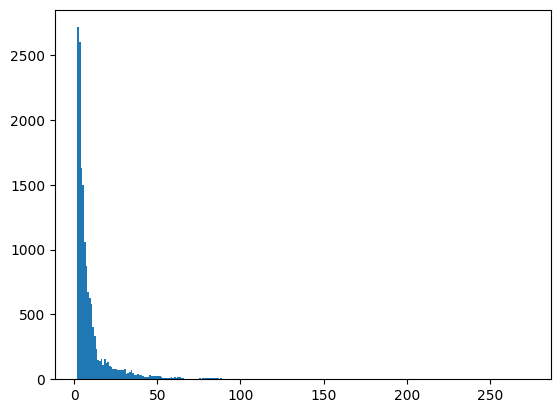

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *

data = np.asarray(freq_anno)
plt.hist(data, bins=np.arange(data.min(), data.max()+1))

In [17]:
coco3 = COCO('/gpfs/fs0/data/stanford_data/petct/DETR_MIP2/FDG-PET-CT-Lesions/annotations/detr_val.json')

loading annotations into memory...
Done (t=0.23s)
creating index...
index created!


In [18]:
coco3.getImgIds(43340)

[43340]

In [19]:
coco3.imgs[43340]

{'id': 43340,
 'file_name': '43340.npy',
 'frame_idx': 44,
 'width': 566,
 'height': 566,
 'age': '057Y',
 'sex': 'F',
 'diagnosis': 'NEGATIVE',
 'nii_file_name:': '/gpfs/fs0/data/stanford_data/petct/NIFTI_MIP/FDG-PET-CT-Lesions/PETCT_e1a5b05186/02-27-2005-NA-PET-CT Ganzkoerper  primaer mit KM-36173/SUV_MIP.nii.gz',
 'nii_stats': {'liver': 12.701639175415039,
  'brain': 37.47007751464844,
  'suv_max': 37.47007751464844,
  'pixdim': [-1.0,
   2.0364201068878174,
   2.0364201068878174,
   3.0,
   1.0,
   1.0,
   1.0,
   1.0]}}

In [20]:
coco3.loadImgs(coco3.getImgIds(43340))

[{'id': 43340,
  'file_name': '43340.npy',
  'frame_idx': 44,
  'width': 566,
  'height': 566,
  'age': '057Y',
  'sex': 'F',
  'diagnosis': 'NEGATIVE',
  'nii_file_name:': '/gpfs/fs0/data/stanford_data/petct/NIFTI_MIP/FDG-PET-CT-Lesions/PETCT_e1a5b05186/02-27-2005-NA-PET-CT Ganzkoerper  primaer mit KM-36173/SUV_MIP.nii.gz',
  'nii_stats': {'liver': 12.701639175415039,
   'brain': 37.47007751464844,
   'suv_max': 37.47007751464844,
   'pixdim': [-1.0,
    2.0364201068878174,
    2.0364201068878174,
    3.0,
    1.0,
    1.0,
    1.0,
    1.0]}}]

In [21]:
# coco3.imgs[0]
coco3.loadImgs(coco3.getImgIds(43340))[0]

{'id': 43340,
 'file_name': '43340.npy',
 'frame_idx': 44,
 'width': 566,
 'height': 566,
 'age': '057Y',
 'sex': 'F',
 'diagnosis': 'NEGATIVE',
 'nii_file_name:': '/gpfs/fs0/data/stanford_data/petct/NIFTI_MIP/FDG-PET-CT-Lesions/PETCT_e1a5b05186/02-27-2005-NA-PET-CT Ganzkoerper  primaer mit KM-36173/SUV_MIP.nii.gz',
 'nii_stats': {'liver': 12.701639175415039,
  'brain': 37.47007751464844,
  'suv_max': 37.47007751464844,
  'pixdim': [-1.0,
   2.0364201068878174,
   2.0364201068878174,
   3.0,
   1.0,
   1.0,
   1.0,
   1.0]}}

In [32]:
coco3.anns[186211]

{'image_id': 38976,
 'id': 186211,
 'segmentation': {'counts': [156880,
   1,
   1,
   1,
   563,
   4,
   561,
   5,
   561,
   5,
   561,
   5,
   561,
   5,
   561,
   5,
   562,
   1,
   1,
   2,
   159510],
  'size': [566, 566]},
 'area': 34,
 'iscrowd': 0,
 'bbox': [277, 97, 8, 5],
 'category_id': 1}

In [33]:
coco3.loadAnns(coco3.getAnnIds(186211))

[]

In [274]:
coco['images'][0]

{'image_id': 0,
 'file_name': '0.npy',
 'frame_idx': 0,
 'width': 566,
 'height': 566,
 'age': '063Y',
 'sex': 'F',
 'diagnosis': 'MELANOMA',
 'nii_file_name:': '/gpfs/fs0/data/stanford_data/petct/NIFTI_MIP/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/SUV_MIP.nii.gz',
 'nii_stats': {'liver': 4.024835109710693,
  'brain': 2.4035794734954834,
  'suv_max': 25.339075088500977,
  'pixdim': [-1.0,
   2.0364201068878174,
   2.0364201068878174,
   3.0,
   1.0,
   1.0,
   1.0,
   1.0]},
 'id': 0}

In [35]:
# boxes=[[1,1,2,2],[1,1,2,1],[]]
boxes=[[0,0,0,0]]
boxes = torch.as_tensor(boxes, dtype=torch.float32)
print(boxes, boxes.shape)
boxes = boxes.reshape(-1, 4)
print(boxes, boxes.shape)
boxes[:, 2:] += boxes[:, :2]
print(boxes)
boxes[:, 0::2].clamp_(min=0, max=4)
print(boxes)
boxes[:, 1::2].clamp_(min=0, max=5)
print(boxes)
keep = (boxes[:, 3] > boxes[:, 1]) & (boxes[:, 2] > boxes[:, 0])
boxes = boxes[keep]
print(boxes)

tensor([[0., 0., 0., 0.]]) torch.Size([1, 4])
tensor([[0., 0., 0., 0.]]) torch.Size([1, 4])
tensor([[0., 0., 0., 0.]])
tensor([[0., 0., 0., 0.]])
tensor([[0., 0., 0., 0.]])
tensor([], size=(0, 4))


In [342]:
print(type(coco3))

<class 'pycocotools.coco.COCO'>


In [ ]:
class CocoDetection(VisionDataset):
    """`MS Coco Detection <https://cocodataset.org/#detection-2016>`_ Dataset.

    It requires the `COCO API to be installed <https://github.com/pdollar/coco/tree/master/PythonAPI>`_.

    Args:
        root (string): Root directory where images are downloaded to.
        annFile (string): Path to json annotation file.
        transform (callable, optional): A function/transform that  takes in an PIL image
            and returns a transformed version. E.g, ``transforms.PILToTensor``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
        transforms (callable, optional): A function/transform that takes input sample and its target as entry
            and returns a transformed version.
    """

    def __init__(
        self,
        root: str,
        annFile: str,
        transform: Optional[Callable] = None,
        target_transform: Optional[Callable] = None,
        transforms: Optional[Callable] = None,
    ) -> None:
        super().__init__(root, transforms, transform, target_transform)
        from pycocotools.coco import COCO

        self.coco = COCO(annFile)
        self.ids = list(sorted(self.coco.imgs.keys()))

    def _load_image(self, id: int) -> Image.Image:
        path = self.coco.loadImgs(id)[0]["file_name"]
        return Image.open(os.path.join(self.root, path)).convert("RGB")

    def _load_target(self, id: int) -> List[Any]:
        return self.coco.loadAnns(self.coco.getAnnIds(id))

    def __getitem__(self, index: int) -> Tuple[Any, Any]:
        id = self.ids[index]
        image = self._load_image(id)
        target = self._load_target(id)

        if self.transforms is not None:
            image, target = self.transforms(image, target)

        return image, target


    def __len__(self) -> int:
        return len(self.ids)

# Results

Quick and easy overview of the training results

In [ ]:
from util.plot_utils import plot_logs

from pathlib import Path

log_directory = [Path(outDir)]

In [ ]:
fields_of_interest = (
    'loss',
    'mAP',
    )

plot_logs(log_directory,
          fields_of_interest)

In [ ]:
fields_of_interest = (
    'loss_ce',
    'loss_bbox',
    'loss_giou',
    )

plot_logs(log_directory,
          fields_of_interest)

In [ ]:
fields_of_interest = (
    'class_error',
    'cardinality_error_unscaled',
    )

plot_logs(log_directory,
          fields_of_interest)   